# 1、import data

In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

features_train = pd.read_csv('features_train.csv')
features_val = pd.read_csv('features_val.csv')
features_test = pd.read_csv('features_test.csv')
labels_train = pd.read_csv('labels_train.csv', header=None)
labels_val = pd.read_csv('labels_val.csv', header=None)

# 2、handle data

In [5]:
features_train = features_train.drop(['shop_id'], axis=1)
features_val = features_val.drop(['shop_id'], axis=1)
features_test = features_test.drop(['shop_id'], axis=1)

In [6]:
features = pd.concat([features_train, features_val]).reset_index(drop=True)
labels = pd.concat([labels_train, labels_val]).reset_index(drop=True)[1]

In [7]:
features = features.apply(lambda x: np.log(x+1))
columns = features.columns
from sklearn.preprocessing import MinMaxScaler
features[columns] = MinMaxScaler().fit_transform(features[columns])

In [8]:
features_test = features_test.apply(lambda x: np.log(x+1))
features_test[columns] = MinMaxScaler().fit_transform(features_test[columns])

# 3、train & predict

In [16]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

dataset_train = xgb.DMatrix(X_train,y_train)
dataset_val = xgb.DMatrix(X_test)

In [17]:
def wmae(ground_truth, predictions):
    return abs(predictions-ground_truth).sum()/float(ground_truth.sum())

In [18]:
def plot_results(results, para_name):
    paras = results.keys()
    x = range(1, len(paras)+1)
    y = []
    for key in paras:
        y.append(results[key]['wmae'])
    
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('{}'.format(para_name), fontsize=14)
    plt.ylabel('wmae)', fontsize=14)
    plt.xticks(x, paras, rotation=10, fontsize=10)
    plt.title('wmae for different {}'.format(para_name), fontsize=16)
    plt.show()

In [59]:
results_lambda = {}
for i in [0.1, 0.15, 0.2, 0.25, 0.28, 0.3, 0.32, 0.35, 0.4]:
    result = {}
    print('\n\n\n\nrunning while lambda = {}'.format(i))
    params={'booster':'gblinear',
            'objective': 'reg:linear',
            'eval_metric':'mae',
            'lambda':i,
            'seed':0,
            'silent':1,
        }

    watchlist = [(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_lambda['{}'.format(i)] = result
    
print(results_lambda)





running while lambda = 0.1
[0]	train-mae:58378.9
Will train until train-mae hasn't improved in 300 rounds.
[1]	train-mae:55140.6
[2]	train-mae:54300.8
[3]	train-mae:53876
[4]	train-mae:53414.2
[5]	train-mae:53067.3
[6]	train-mae:52780.4
[7]	train-mae:52562.5
[8]	train-mae:52371.8
[9]	train-mae:52241.6
[10]	train-mae:52104.6
[11]	train-mae:52008.4
[12]	train-mae:51906.5
[13]	train-mae:51823.3
[14]	train-mae:51752.5
[15]	train-mae:51706.9
[16]	train-mae:51647.9
[17]	train-mae:51603.9
[18]	train-mae:51566.6
[19]	train-mae:51532.1
[20]	train-mae:51505.5
[21]	train-mae:51479.2
[22]	train-mae:51455.4
[23]	train-mae:51433.3
[24]	train-mae:51413.7
[25]	train-mae:51398.3
[26]	train-mae:51384.3
[27]	train-mae:51369.5
[28]	train-mae:51351.6
[29]	train-mae:51340.4
[30]	train-mae:51329.2
[31]	train-mae:51314.2
[32]	train-mae:51305.7
[33]	train-mae:51294
[34]	train-mae:51286.9
[35]	train-mae:51276.8
[36]	train-mae:51266.8
[37]	train-mae:51257.7
[38]	train-mae:51249.9
[39]	train-mae:51241.4
[40]	

[345]	train-mae:50825.5
[346]	train-mae:50824.9
[347]	train-mae:50824.5
[348]	train-mae:50824.1
[349]	train-mae:50823.7
[350]	train-mae:50823.1
[351]	train-mae:50822.8
[352]	train-mae:50822.1
[353]	train-mae:50821.7
[354]	train-mae:50821.4
[355]	train-mae:50820.9
[356]	train-mae:50820.4
[357]	train-mae:50819.9
[358]	train-mae:50819.7
[359]	train-mae:50818.7
[360]	train-mae:50818.8
[361]	train-mae:50818.1
[362]	train-mae:50817.8
[363]	train-mae:50817.4
[364]	train-mae:50816.9
[365]	train-mae:50816.2
[366]	train-mae:50816.2
[367]	train-mae:50816
[368]	train-mae:50814.9
[369]	train-mae:50814.1
[370]	train-mae:50814.1
[371]	train-mae:50813.9
[372]	train-mae:50813.3
[373]	train-mae:50812.6
[374]	train-mae:50811.6
[375]	train-mae:50811.5
[376]	train-mae:50811.7
[377]	train-mae:50811.3
[378]	train-mae:50810.3
[379]	train-mae:50810.1
[380]	train-mae:50808.9
[381]	train-mae:50809.5
[382]	train-mae:50809.2
[383]	train-mae:50809
[384]	train-mae:50808.6
[385]	train-mae:50808.2
[386]	train-mae:5080

[689]	train-mae:50718.4
[690]	train-mae:50718.1
[691]	train-mae:50718.1
[692]	train-mae:50717.3
[693]	train-mae:50717.8
[694]	train-mae:50717.1
[695]	train-mae:50717.4
[696]	train-mae:50716.9
[697]	train-mae:50716.8
[698]	train-mae:50716.6
[699]	train-mae:50716.2
[700]	train-mae:50716.4
[701]	train-mae:50716.1
[702]	train-mae:50715.6
[703]	train-mae:50715.8
[704]	train-mae:50715.1
[705]	train-mae:50714.9
[706]	train-mae:50714.8
[707]	train-mae:50714.8
[708]	train-mae:50713.8
[709]	train-mae:50713.7
[710]	train-mae:50713.9
[711]	train-mae:50714
[712]	train-mae:50713.5
[713]	train-mae:50713.7
[714]	train-mae:50712.7
[715]	train-mae:50713.1
[716]	train-mae:50712.2
[717]	train-mae:50712.9
[718]	train-mae:50712.5
[719]	train-mae:50712.3
[720]	train-mae:50711.3
[721]	train-mae:50711.4
[722]	train-mae:50711.6
[723]	train-mae:50711.2
[724]	train-mae:50711.2
[725]	train-mae:50711.2
[726]	train-mae:50710.6
[727]	train-mae:50710.2
[728]	train-mae:50710.2
[729]	train-mae:50710.1
[730]	train-mae:50

[1032]	train-mae:50661.7
[1033]	train-mae:50661.4
[1034]	train-mae:50661.2
[1035]	train-mae:50661.6
[1036]	train-mae:50661.4
[1037]	train-mae:50661.1
[1038]	train-mae:50660.9
[1039]	train-mae:50660.9
[1040]	train-mae:50660.9
[1041]	train-mae:50660.5
[1042]	train-mae:50660.5
[1043]	train-mae:50660.4
[1044]	train-mae:50660.2
[1045]	train-mae:50659.9
[1046]	train-mae:50659.6
[1047]	train-mae:50659.8
[1048]	train-mae:50659.7
[1049]	train-mae:50659.5
[1050]	train-mae:50659.4
[1051]	train-mae:50659.4
[1052]	train-mae:50659.2
[1053]	train-mae:50659
[1054]	train-mae:50658.9
[1055]	train-mae:50658.7
[1056]	train-mae:50658.2
[1057]	train-mae:50658.1
[1058]	train-mae:50658.2
[1059]	train-mae:50658.2
[1060]	train-mae:50658.2
[1061]	train-mae:50657.7
[1062]	train-mae:50657.8
[1063]	train-mae:50657.7
[1064]	train-mae:50657.5
[1065]	train-mae:50657.6
[1066]	train-mae:50657.4
[1067]	train-mae:50657.3
[1068]	train-mae:50657
[1069]	train-mae:50656.9
[1070]	train-mae:50656.9
[1071]	train-mae:50656.7
[107

[1363]	train-mae:50620.4
[1364]	train-mae:50620.4
[1365]	train-mae:50620.1
[1366]	train-mae:50620
[1367]	train-mae:50619.6
[1368]	train-mae:50619.9
[1369]	train-mae:50619.6
[1370]	train-mae:50619.6
[1371]	train-mae:50619.5
[1372]	train-mae:50619.3
[1373]	train-mae:50619.2
[1374]	train-mae:50619.1
[1375]	train-mae:50618.9
[1376]	train-mae:50618.8
[1377]	train-mae:50619
[1378]	train-mae:50618.7
[1379]	train-mae:50618.5
[1380]	train-mae:50618.5
[1381]	train-mae:50617.9
[1382]	train-mae:50618.2
[1383]	train-mae:50617.8
[1384]	train-mae:50617.9
[1385]	train-mae:50617.6
[1386]	train-mae:50617.8
[1387]	train-mae:50617.6
[1388]	train-mae:50617.5
[1389]	train-mae:50617.3
[1390]	train-mae:50617.2
[1391]	train-mae:50617.2
[1392]	train-mae:50617
[1393]	train-mae:50616.8
[1394]	train-mae:50616.8
[1395]	train-mae:50616.8
[1396]	train-mae:50616.7
[1397]	train-mae:50616.3
[1398]	train-mae:50616.5
[1399]	train-mae:50616.3
[1400]	train-mae:50616.2
[1401]	train-mae:50616
[1402]	train-mae:50615.9
[1403]	t

[1693]	train-mae:50585.8
[1694]	train-mae:50585.7
[1695]	train-mae:50585.6
[1696]	train-mae:50585.5
[1697]	train-mae:50585.5
[1698]	train-mae:50585.3
[1699]	train-mae:50585.2
[1700]	train-mae:50585.2
[1701]	train-mae:50585
[1702]	train-mae:50585.1
[1703]	train-mae:50584.8
[1704]	train-mae:50584.8
[1705]	train-mae:50584.7
[1706]	train-mae:50584.5
[1707]	train-mae:50584.5
[1708]	train-mae:50584.4
[1709]	train-mae:50584.3
[1710]	train-mae:50584.3
[1711]	train-mae:50584
[1712]	train-mae:50583.8
[1713]	train-mae:50583.9
[1714]	train-mae:50583.9
[1715]	train-mae:50583.7
[1716]	train-mae:50583.7
[1717]	train-mae:50583.4
[1718]	train-mae:50583.4
[1719]	train-mae:50583.1
[1720]	train-mae:50583.3
[1721]	train-mae:50583.1
[1722]	train-mae:50583.1
[1723]	train-mae:50582.9
[1724]	train-mae:50582.8
[1725]	train-mae:50582.8
[1726]	train-mae:50582.6
[1727]	train-mae:50582.5
[1728]	train-mae:50582.4
[1729]	train-mae:50582.3
[1730]	train-mae:50582.1
[1731]	train-mae:50582.2
[1732]	train-mae:50582.1
[173

[2023]	train-mae:50556.2
[2024]	train-mae:50556.2
[2025]	train-mae:50556.1
[2026]	train-mae:50556.1
[2027]	train-mae:50556
[2028]	train-mae:50555.7
[2029]	train-mae:50555.7
[2030]	train-mae:50555.6
[2031]	train-mae:50555.6
[2032]	train-mae:50555.2
[2033]	train-mae:50555.2
[2034]	train-mae:50555.2
[2035]	train-mae:50555.3
[2036]	train-mae:50555.1
[2037]	train-mae:50555
[2038]	train-mae:50554.9
[2039]	train-mae:50554.9
[2040]	train-mae:50554.8
[2041]	train-mae:50554.3
[2042]	train-mae:50554.6
[2043]	train-mae:50554.5
[2044]	train-mae:50554.5
[2045]	train-mae:50554.5
[2046]	train-mae:50554.4
[2047]	train-mae:50554.2
[2048]	train-mae:50554.2
[2049]	train-mae:50554.1
[2050]	train-mae:50553.9
[2051]	train-mae:50554
[2052]	train-mae:50553.9
[2053]	train-mae:50553.8
[2054]	train-mae:50553.7
[2055]	train-mae:50553.6
[2056]	train-mae:50553.6
[2057]	train-mae:50553.5
[2058]	train-mae:50553.4
[2059]	train-mae:50553.3
[2060]	train-mae:50553.2
[2061]	train-mae:50553.2
[2062]	train-mae:50553
[2063]	t

[2353]	train-mae:50530.1
[2354]	train-mae:50530.2
[2355]	train-mae:50530
[2356]	train-mae:50529.8
[2357]	train-mae:50530
[2358]	train-mae:50529.9
[2359]	train-mae:50529.7
[2360]	train-mae:50529.8
[2361]	train-mae:50529.6
[2362]	train-mae:50529.6
[2363]	train-mae:50529.5
[2364]	train-mae:50529.5
[2365]	train-mae:50529.2
[2366]	train-mae:50529.3
[2367]	train-mae:50529.2
[2368]	train-mae:50529.1
[2369]	train-mae:50529
[2370]	train-mae:50529
[2371]	train-mae:50528.9
[2372]	train-mae:50528.8
[2373]	train-mae:50528.8
[2374]	train-mae:50528.6
[2375]	train-mae:50528.6
[2376]	train-mae:50528.6
[2377]	train-mae:50528.4
[2378]	train-mae:50528.4
[2379]	train-mae:50528.2
[2380]	train-mae:50528.1
[2381]	train-mae:50528.1
[2382]	train-mae:50528
[2383]	train-mae:50528
[2384]	train-mae:50527.9
[2385]	train-mae:50527.5
[2386]	train-mae:50527.7
[2387]	train-mae:50527.4
[2388]	train-mae:50527.4
[2389]	train-mae:50527.4
[2390]	train-mae:50527.4
[2391]	train-mae:50527.3
[2392]	train-mae:50527.2
[2393]	train

[2684]	train-mae:50505.6
[2685]	train-mae:50505.6
[2686]	train-mae:50505.6
[2687]	train-mae:50505.5
[2688]	train-mae:50505.4
[2689]	train-mae:50505.3
[2690]	train-mae:50505.2
[2691]	train-mae:50505.2
[2692]	train-mae:50505.2
[2693]	train-mae:50505.1
[2694]	train-mae:50505
[2695]	train-mae:50504.8
[2696]	train-mae:50504.9
[2697]	train-mae:50504.7
[2698]	train-mae:50504.8
[2699]	train-mae:50504.6
[2700]	train-mae:50504.6
[2701]	train-mae:50504.5
[2702]	train-mae:50504.2
[2703]	train-mae:50504.3
[2704]	train-mae:50504.3
[2705]	train-mae:50504.2
[2706]	train-mae:50504.2
[2707]	train-mae:50504.1
[2708]	train-mae:50504.1
[2709]	train-mae:50504
[2710]	train-mae:50503.8
[2711]	train-mae:50503.8
[2712]	train-mae:50503.6
[2713]	train-mae:50503.7
[2714]	train-mae:50503.7
[2715]	train-mae:50503.5
[2716]	train-mae:50503.5
[2717]	train-mae:50503.5
[2718]	train-mae:50503.3
[2719]	train-mae:50503.4
[2720]	train-mae:50503.3
[2721]	train-mae:50503
[2722]	train-mae:50503
[2723]	train-mae:50502.7
[2724]	t

[12]	train-mae:52037.7
[13]	train-mae:51910.9
[14]	train-mae:51807.4
[15]	train-mae:51723.7
[16]	train-mae:51653.5
[17]	train-mae:51597.8
[18]	train-mae:51548.3
[19]	train-mae:51508.6
[20]	train-mae:51476.8
[21]	train-mae:51445.9
[22]	train-mae:51422.2
[23]	train-mae:51408.2
[24]	train-mae:51394.3
[25]	train-mae:51374.5
[26]	train-mae:51362
[27]	train-mae:51347.4
[28]	train-mae:51335.1
[29]	train-mae:51320.4
[30]	train-mae:51313.9
[31]	train-mae:51303.3
[32]	train-mae:51295.2
[33]	train-mae:51287.6
[34]	train-mae:51277.1
[35]	train-mae:51270
[36]	train-mae:51262.1
[37]	train-mae:51254.2
[38]	train-mae:51247.4
[39]	train-mae:51240.6
[40]	train-mae:51231
[41]	train-mae:51226
[42]	train-mae:51220.5
[43]	train-mae:51214.1
[44]	train-mae:51207.4
[45]	train-mae:51202
[46]	train-mae:51196.8
[47]	train-mae:51191.3
[48]	train-mae:51185.7
[49]	train-mae:51179.3
[50]	train-mae:51174.5
[51]	train-mae:51170.5
[52]	train-mae:51165.1
[53]	train-mae:51160.1
[54]	train-mae:51156.2
[55]	train-mae:51152.

[361]	train-mae:50822
[362]	train-mae:50821.5
[363]	train-mae:50821
[364]	train-mae:50819.4
[365]	train-mae:50820.3
[366]	train-mae:50820.1
[367]	train-mae:50819.2
[368]	train-mae:50819.1
[369]	train-mae:50818.5
[370]	train-mae:50818.5
[371]	train-mae:50817.7
[372]	train-mae:50817.1
[373]	train-mae:50817
[374]	train-mae:50815.9
[375]	train-mae:50816.2
[376]	train-mae:50815.5
[377]	train-mae:50815.3
[378]	train-mae:50814.3
[379]	train-mae:50814.6
[380]	train-mae:50814.2
[381]	train-mae:50813.1
[382]	train-mae:50813.4
[383]	train-mae:50812.8
[384]	train-mae:50812
[385]	train-mae:50812.1
[386]	train-mae:50811.8
[387]	train-mae:50811.4
[388]	train-mae:50810.6
[389]	train-mae:50810.6
[390]	train-mae:50810
[391]	train-mae:50809.7
[392]	train-mae:50808.8
[393]	train-mae:50809.2
[394]	train-mae:50808.7
[395]	train-mae:50807.5
[396]	train-mae:50808
[397]	train-mae:50807.6
[398]	train-mae:50806.6
[399]	train-mae:50806.9
[400]	train-mae:50806.1
[401]	train-mae:50806
[402]	train-mae:50805.5
[403]	

[706]	train-mae:50719.2
[707]	train-mae:50718.8
[708]	train-mae:50718.6
[709]	train-mae:50718.6
[710]	train-mae:50718.3
[711]	train-mae:50718.2
[712]	train-mae:50717.9
[713]	train-mae:50717.6
[714]	train-mae:50717.3
[715]	train-mae:50717.3
[716]	train-mae:50716.9
[717]	train-mae:50716.9
[718]	train-mae:50716.8
[719]	train-mae:50716.6
[720]	train-mae:50716.4
[721]	train-mae:50716.1
[722]	train-mae:50715.8
[723]	train-mae:50715.4
[724]	train-mae:50715.6
[725]	train-mae:50715.2
[726]	train-mae:50715
[727]	train-mae:50714.9
[728]	train-mae:50714.7
[729]	train-mae:50714.3
[730]	train-mae:50714.2
[731]	train-mae:50714.1
[732]	train-mae:50714
[733]	train-mae:50713.6
[734]	train-mae:50713.1
[735]	train-mae:50713.1
[736]	train-mae:50713.1
[737]	train-mae:50712.8
[738]	train-mae:50712.4
[739]	train-mae:50712.6
[740]	train-mae:50712.3
[741]	train-mae:50712.2
[742]	train-mae:50711.9
[743]	train-mae:50711.4
[744]	train-mae:50711.6
[745]	train-mae:50711.5
[746]	train-mae:50711.2
[747]	train-mae:5071

[1048]	train-mae:50663
[1049]	train-mae:50662.7
[1050]	train-mae:50662.8
[1051]	train-mae:50662.6
[1052]	train-mae:50662.4
[1053]	train-mae:50662.2
[1054]	train-mae:50662.4
[1055]	train-mae:50662.1
[1056]	train-mae:50662
[1057]	train-mae:50661.8
[1058]	train-mae:50661.8
[1059]	train-mae:50661.6
[1060]	train-mae:50661.5
[1061]	train-mae:50661.4
[1062]	train-mae:50661.3
[1063]	train-mae:50660.7
[1064]	train-mae:50660.8
[1065]	train-mae:50660.8
[1066]	train-mae:50660.6
[1067]	train-mae:50660.4
[1068]	train-mae:50660.2
[1069]	train-mae:50660.2
[1070]	train-mae:50660
[1071]	train-mae:50659.9
[1072]	train-mae:50659.8
[1073]	train-mae:50659.7
[1074]	train-mae:50659.5
[1075]	train-mae:50659.4
[1076]	train-mae:50658.8
[1077]	train-mae:50659.2
[1078]	train-mae:50658.8
[1079]	train-mae:50658.7
[1080]	train-mae:50658.7
[1081]	train-mae:50658.5
[1082]	train-mae:50658.5
[1083]	train-mae:50658.3
[1084]	train-mae:50658
[1085]	train-mae:50657.9
[1086]	train-mae:50658
[1087]	train-mae:50657.8
[1088]	tra

[1379]	train-mae:50621.5
[1380]	train-mae:50621.5
[1381]	train-mae:50621.3
[1382]	train-mae:50621.2
[1383]	train-mae:50621
[1384]	train-mae:50621
[1385]	train-mae:50620.9
[1386]	train-mae:50620.9
[1387]	train-mae:50620.7
[1388]	train-mae:50620.3
[1389]	train-mae:50620.4
[1390]	train-mae:50620.3
[1391]	train-mae:50620.1
[1392]	train-mae:50620.1
[1393]	train-mae:50619.8
[1394]	train-mae:50619.9
[1395]	train-mae:50619.8
[1396]	train-mae:50619.7
[1397]	train-mae:50619.6
[1398]	train-mae:50619.4
[1399]	train-mae:50619.2
[1400]	train-mae:50619.3
[1401]	train-mae:50619.1
[1402]	train-mae:50619
[1403]	train-mae:50618.9
[1404]	train-mae:50618.9
[1405]	train-mae:50618.7
[1406]	train-mae:50618.3
[1407]	train-mae:50617.9
[1408]	train-mae:50618.2
[1409]	train-mae:50618
[1410]	train-mae:50618.1
[1411]	train-mae:50617.8
[1412]	train-mae:50617.7
[1413]	train-mae:50617.7
[1414]	train-mae:50617.3
[1415]	train-mae:50617.4
[1416]	train-mae:50617.3
[1417]	train-mae:50617.2
[1418]	train-mae:50617.1
[1419]	t

[1710]	train-mae:50586.9
[1711]	train-mae:50586.8
[1712]	train-mae:50586.7
[1713]	train-mae:50586.8
[1714]	train-mae:50586.5
[1715]	train-mae:50586.4
[1716]	train-mae:50586.4
[1717]	train-mae:50586.4
[1718]	train-mae:50586.2
[1719]	train-mae:50586.1
[1720]	train-mae:50586
[1721]	train-mae:50586
[1722]	train-mae:50585.8
[1723]	train-mae:50585.7
[1724]	train-mae:50585.6
[1725]	train-mae:50585.6
[1726]	train-mae:50585.4
[1727]	train-mae:50585.5
[1728]	train-mae:50585.4
[1729]	train-mae:50585.3
[1730]	train-mae:50584.9
[1731]	train-mae:50585.1
[1732]	train-mae:50584.9
[1733]	train-mae:50584.5
[1734]	train-mae:50584.7
[1735]	train-mae:50584.5
[1736]	train-mae:50584.4
[1737]	train-mae:50584.2
[1738]	train-mae:50584.3
[1739]	train-mae:50584.2
[1740]	train-mae:50584
[1741]	train-mae:50584
[1742]	train-mae:50584
[1743]	train-mae:50583.8
[1744]	train-mae:50583.7
[1745]	train-mae:50583.5
[1746]	train-mae:50583.4
[1747]	train-mae:50583.4
[1748]	train-mae:50583.4
[1749]	train-mae:50583.1
[1750]	tra

[2042]	train-mae:50557.5
[2043]	train-mae:50557.3
[2044]	train-mae:50557.2
[2045]	train-mae:50557.1
[2046]	train-mae:50557.2
[2047]	train-mae:50556.8
[2048]	train-mae:50556.9
[2049]	train-mae:50556.8
[2050]	train-mae:50556.7
[2051]	train-mae:50556.4
[2052]	train-mae:50556.4
[2053]	train-mae:50556.2
[2054]	train-mae:50556.2
[2055]	train-mae:50556.2
[2056]	train-mae:50556
[2057]	train-mae:50555.9
[2058]	train-mae:50555.8
[2059]	train-mae:50555.7
[2060]	train-mae:50555.7
[2061]	train-mae:50555.7
[2062]	train-mae:50555.7
[2063]	train-mae:50555.4
[2064]	train-mae:50555.5
[2065]	train-mae:50555.4
[2066]	train-mae:50555.4
[2067]	train-mae:50555.3
[2068]	train-mae:50554.9
[2069]	train-mae:50555.2
[2070]	train-mae:50555.1
[2071]	train-mae:50555.1
[2072]	train-mae:50554.9
[2073]	train-mae:50554.9
[2074]	train-mae:50554.7
[2075]	train-mae:50554.5
[2076]	train-mae:50554.6
[2077]	train-mae:50554.3
[2078]	train-mae:50554.4
[2079]	train-mae:50554.3
[2080]	train-mae:50554.1
[2081]	train-mae:50554.1
[2

[2373]	train-mae:50531.3
[2374]	train-mae:50531
[2375]	train-mae:50531.2
[2376]	train-mae:50531
[2377]	train-mae:50531
[2378]	train-mae:50531
[2379]	train-mae:50530.8
[2380]	train-mae:50530.7
[2381]	train-mae:50530.6
[2382]	train-mae:50530.3
[2383]	train-mae:50530.4
[2384]	train-mae:50530.4
[2385]	train-mae:50530.4
[2386]	train-mae:50530.2
[2387]	train-mae:50530.2
[2388]	train-mae:50530.2
[2389]	train-mae:50530
[2390]	train-mae:50530
[2391]	train-mae:50530
[2392]	train-mae:50529.8
[2393]	train-mae:50529.7
[2394]	train-mae:50529.6
[2395]	train-mae:50529.5
[2396]	train-mae:50529.3
[2397]	train-mae:50529.3
[2398]	train-mae:50529.2
[2399]	train-mae:50529.1
[2400]	train-mae:50529.1
[2401]	train-mae:50529
[2402]	train-mae:50529
[2403]	train-mae:50529
[2404]	train-mae:50528.8
[2405]	train-mae:50528.5
[2406]	train-mae:50528.6
[2407]	train-mae:50528.4
[2408]	train-mae:50528.5
[2409]	train-mae:50528.5
[2410]	train-mae:50528.2
[2411]	train-mae:50528.1
[2412]	train-mae:50528.2
[2413]	train-mae:505

[2704]	train-mae:50507
[2705]	train-mae:50506.9
[2706]	train-mae:50506.8
[2707]	train-mae:50506.8
[2708]	train-mae:50506.7
[2709]	train-mae:50506.6
[2710]	train-mae:50506.5
[2711]	train-mae:50506.4
[2712]	train-mae:50506.4
[2713]	train-mae:50506.3
[2714]	train-mae:50506.3
[2715]	train-mae:50506.1
[2716]	train-mae:50506.2
[2717]	train-mae:50505.9
[2718]	train-mae:50505.9
[2719]	train-mae:50505.9
[2720]	train-mae:50505.8
[2721]	train-mae:50505.8
[2722]	train-mae:50505.6
[2723]	train-mae:50505.6
[2724]	train-mae:50505.4
[2725]	train-mae:50505.5
[2726]	train-mae:50505.4
[2727]	train-mae:50505.3
[2728]	train-mae:50505.3
[2729]	train-mae:50505.3
[2730]	train-mae:50505.2
[2731]	train-mae:50505.1
[2732]	train-mae:50505
[2733]	train-mae:50504.9
[2734]	train-mae:50505
[2735]	train-mae:50504.9
[2736]	train-mae:50504.7
[2737]	train-mae:50504.8
[2738]	train-mae:50504.6
[2739]	train-mae:50504.5
[2740]	train-mae:50504.6
[2741]	train-mae:50504.4
[2742]	train-mae:50503.8
[2743]	train-mae:50504
[2744]	t

[34]	train-mae:51286.6
[35]	train-mae:51277.1
[36]	train-mae:51270
[37]	train-mae:51261.1
[38]	train-mae:51252.8
[39]	train-mae:51245.1
[40]	train-mae:51239.4
[41]	train-mae:51231.4
[42]	train-mae:51225.1
[43]	train-mae:51217.8
[44]	train-mae:51211.5
[45]	train-mae:51204.9
[46]	train-mae:51196.3
[47]	train-mae:51192.4
[48]	train-mae:51187.1
[49]	train-mae:51180.9
[50]	train-mae:51175
[51]	train-mae:51170
[52]	train-mae:51164.3
[53]	train-mae:51160.9
[54]	train-mae:51156.4
[55]	train-mae:51151.3
[56]	train-mae:51148.9
[57]	train-mae:51141.8
[58]	train-mae:51138.9
[59]	train-mae:51134.5
[60]	train-mae:51128.9
[61]	train-mae:51128.4
[62]	train-mae:51124.6
[63]	train-mae:51119.1
[64]	train-mae:51117.1
[65]	train-mae:51114
[66]	train-mae:51110.6
[67]	train-mae:51105.6
[68]	train-mae:51102.6
[69]	train-mae:51100.2
[70]	train-mae:51097.4
[71]	train-mae:51094.2
[72]	train-mae:51090.7
[73]	train-mae:51087.8
[74]	train-mae:51084
[75]	train-mae:51081.2
[76]	train-mae:51078.7
[77]	train-mae:51075.

[382]	train-mae:50813.1
[383]	train-mae:50812.8
[384]	train-mae:50812.4
[385]	train-mae:50811.8
[386]	train-mae:50811.4
[387]	train-mae:50810.9
[388]	train-mae:50810.4
[389]	train-mae:50810.3
[390]	train-mae:50809.7
[391]	train-mae:50809.7
[392]	train-mae:50809.4
[393]	train-mae:50808
[394]	train-mae:50808.5
[395]	train-mae:50808.1
[396]	train-mae:50807.8
[397]	train-mae:50807.5
[398]	train-mae:50806.5
[399]	train-mae:50806.6
[400]	train-mae:50805.8
[401]	train-mae:50805.9
[402]	train-mae:50805.5
[403]	train-mae:50805.3
[404]	train-mae:50804.7
[405]	train-mae:50804.5
[406]	train-mae:50803.8
[407]	train-mae:50803.7
[408]	train-mae:50803.3
[409]	train-mae:50802.8
[410]	train-mae:50802.5
[411]	train-mae:50802.1
[412]	train-mae:50801.7
[413]	train-mae:50801.4
[414]	train-mae:50801
[415]	train-mae:50800.5
[416]	train-mae:50799.9
[417]	train-mae:50799.9
[418]	train-mae:50799.5
[419]	train-mae:50798.9
[420]	train-mae:50798.7
[421]	train-mae:50798.4
[422]	train-mae:50797.7
[423]	train-mae:5079

[727]	train-mae:50714.9
[728]	train-mae:50714.9
[729]	train-mae:50714.6
[730]	train-mae:50714.1
[731]	train-mae:50714.1
[732]	train-mae:50713.9
[733]	train-mae:50713.8
[734]	train-mae:50713.6
[735]	train-mae:50713.3
[736]	train-mae:50712.7
[737]	train-mae:50713
[738]	train-mae:50712.8
[739]	train-mae:50712.7
[740]	train-mae:50712.4
[741]	train-mae:50712.4
[742]	train-mae:50712.2
[743]	train-mae:50711.9
[744]	train-mae:50711.4
[745]	train-mae:50711.6
[746]	train-mae:50711.4
[747]	train-mae:50711.3
[748]	train-mae:50711
[749]	train-mae:50710.9
[750]	train-mae:50710.7
[751]	train-mae:50710.3
[752]	train-mae:50710.2
[753]	train-mae:50710.2
[754]	train-mae:50709.9
[755]	train-mae:50709.7
[756]	train-mae:50709.6
[757]	train-mae:50709.1
[758]	train-mae:50708.9
[759]	train-mae:50709.2
[760]	train-mae:50708.9
[761]	train-mae:50708.5
[762]	train-mae:50708.4
[763]	train-mae:50708.4
[764]	train-mae:50708
[765]	train-mae:50708
[766]	train-mae:50707.8
[767]	train-mae:50707.2
[768]	train-mae:50707.5


[1070]	train-mae:50660.2
[1071]	train-mae:50660.1
[1072]	train-mae:50660
[1073]	train-mae:50659.8
[1074]	train-mae:50659.8
[1075]	train-mae:50659.6
[1076]	train-mae:50659.1
[1077]	train-mae:50659.3
[1078]	train-mae:50659.2
[1079]	train-mae:50659.1
[1080]	train-mae:50659.1
[1081]	train-mae:50658.8
[1082]	train-mae:50658.6
[1083]	train-mae:50658.4
[1084]	train-mae:50658.5
[1085]	train-mae:50658.3
[1086]	train-mae:50658.2
[1087]	train-mae:50658
[1088]	train-mae:50657.9
[1089]	train-mae:50657.6
[1090]	train-mae:50657.5
[1091]	train-mae:50657.5
[1092]	train-mae:50657
[1093]	train-mae:50657.1
[1094]	train-mae:50657
[1095]	train-mae:50656.9
[1096]	train-mae:50656.7
[1097]	train-mae:50656.4
[1098]	train-mae:50656.5
[1099]	train-mae:50656.2
[1100]	train-mae:50656.2
[1101]	train-mae:50656.1
[1102]	train-mae:50655.8
[1103]	train-mae:50655.9
[1104]	train-mae:50655.7
[1105]	train-mae:50655.4
[1106]	train-mae:50655.2
[1107]	train-mae:50655.3
[1108]	train-mae:50655.2
[1109]	train-mae:50655.2
[1110]	t

[1400]	train-mae:50619.7
[1401]	train-mae:50619.3
[1402]	train-mae:50619.5
[1403]	train-mae:50619.3
[1404]	train-mae:50619.3
[1405]	train-mae:50619.2
[1406]	train-mae:50619.2
[1407]	train-mae:50618.8
[1408]	train-mae:50618.3
[1409]	train-mae:50618.8
[1410]	train-mae:50618.6
[1411]	train-mae:50618.4
[1412]	train-mae:50618.4
[1413]	train-mae:50618.3
[1414]	train-mae:50618.1
[1415]	train-mae:50618.1
[1416]	train-mae:50618
[1417]	train-mae:50617.9
[1418]	train-mae:50617.8
[1419]	train-mae:50617.6
[1420]	train-mae:50617.4
[1421]	train-mae:50617.4
[1422]	train-mae:50617.4
[1423]	train-mae:50617.3
[1424]	train-mae:50617.1
[1425]	train-mae:50617.1
[1426]	train-mae:50616.8
[1427]	train-mae:50616.8
[1428]	train-mae:50616.4
[1429]	train-mae:50616.6
[1430]	train-mae:50616.4
[1431]	train-mae:50616.1
[1432]	train-mae:50615.9
[1433]	train-mae:50616.2
[1434]	train-mae:50616.1
[1435]	train-mae:50615.8
[1436]	train-mae:50615.8
[1437]	train-mae:50615.8
[1438]	train-mae:50615.5
[1439]	train-mae:50615.6
[1

[1731]	train-mae:50585.4
[1732]	train-mae:50585.5
[1733]	train-mae:50585.3
[1734]	train-mae:50585.3
[1735]	train-mae:50585.2
[1736]	train-mae:50585
[1737]	train-mae:50585
[1738]	train-mae:50585
[1739]	train-mae:50584.6
[1740]	train-mae:50584.5
[1741]	train-mae:50584.6
[1742]	train-mae:50584.3
[1743]	train-mae:50584.5
[1744]	train-mae:50584.4
[1745]	train-mae:50584.3
[1746]	train-mae:50584.2
[1747]	train-mae:50584.1
[1748]	train-mae:50583.9
[1749]	train-mae:50583.9
[1750]	train-mae:50583.8
[1751]	train-mae:50583.7
[1752]	train-mae:50583.8
[1753]	train-mae:50583.3
[1754]	train-mae:50583.4
[1755]	train-mae:50583.4
[1756]	train-mae:50583.3
[1757]	train-mae:50583.1
[1758]	train-mae:50583.1
[1759]	train-mae:50582.9
[1760]	train-mae:50582.9
[1761]	train-mae:50582.7
[1762]	train-mae:50582.7
[1763]	train-mae:50582.4
[1764]	train-mae:50582.4
[1765]	train-mae:50582.3
[1766]	train-mae:50582.4
[1767]	train-mae:50582.1
[1768]	train-mae:50582.1
[1769]	train-mae:50582.1
[1770]	train-mae:50582
[1771]	t

[2062]	train-mae:50557
[2063]	train-mae:50556.2
[2064]	train-mae:50556.3
[2065]	train-mae:50556.5
[2066]	train-mae:50556.4
[2067]	train-mae:50556.2
[2068]	train-mae:50556.3
[2069]	train-mae:50556.3
[2070]	train-mae:50556.1
[2071]	train-mae:50556.1
[2072]	train-mae:50556.2
[2073]	train-mae:50556
[2074]	train-mae:50556.1
[2075]	train-mae:50555.8
[2076]	train-mae:50555.8
[2077]	train-mae:50555.6
[2078]	train-mae:50555.6
[2079]	train-mae:50555.6
[2080]	train-mae:50555.3
[2081]	train-mae:50555.5
[2082]	train-mae:50555.4
[2083]	train-mae:50555.2
[2084]	train-mae:50555.3
[2085]	train-mae:50555.1
[2086]	train-mae:50555.1
[2087]	train-mae:50555
[2088]	train-mae:50554.8
[2089]	train-mae:50554.9
[2090]	train-mae:50554.8
[2091]	train-mae:50554.7
[2092]	train-mae:50554.7
[2093]	train-mae:50554.5
[2094]	train-mae:50554.5
[2095]	train-mae:50554.4
[2096]	train-mae:50554.2
[2097]	train-mae:50554.3
[2098]	train-mae:50553.9
[2099]	train-mae:50553.6
[2100]	train-mae:50553.9
[2101]	train-mae:50553.8
[2102]

[2393]	train-mae:50530.9
[2394]	train-mae:50530.8
[2395]	train-mae:50530.7
[2396]	train-mae:50530.6
[2397]	train-mae:50530.6
[2398]	train-mae:50530.6
[2399]	train-mae:50530.4
[2400]	train-mae:50530.2
[2401]	train-mae:50530.3
[2402]	train-mae:50530.3
[2403]	train-mae:50530
[2404]	train-mae:50530
[2405]	train-mae:50529.9
[2406]	train-mae:50529.9
[2407]	train-mae:50529.7
[2408]	train-mae:50529.7
[2409]	train-mae:50529.6
[2410]	train-mae:50529.5
[2411]	train-mae:50529.4
[2412]	train-mae:50529.4
[2413]	train-mae:50529.3
[2414]	train-mae:50529.2
[2415]	train-mae:50529.1
[2416]	train-mae:50529
[2417]	train-mae:50529.1
[2418]	train-mae:50528.9
[2419]	train-mae:50528.8
[2420]	train-mae:50528.8
[2421]	train-mae:50528.8
[2422]	train-mae:50528.7
[2423]	train-mae:50528.7
[2424]	train-mae:50528.5
[2425]	train-mae:50528.4
[2426]	train-mae:50528.4
[2427]	train-mae:50528.2
[2428]	train-mae:50528.2
[2429]	train-mae:50528.2
[2430]	train-mae:50528
[2431]	train-mae:50527.9
[2432]	train-mae:50527.9
[2433]	t

[2724]	train-mae:50506.6
[2725]	train-mae:50506.5
[2726]	train-mae:50506.5
[2727]	train-mae:50506.3
[2728]	train-mae:50506.4
[2729]	train-mae:50506.3
[2730]	train-mae:50506.2
[2731]	train-mae:50506.2
[2732]	train-mae:50506.1
[2733]	train-mae:50506
[2734]	train-mae:50506
[2735]	train-mae:50505.9
[2736]	train-mae:50505.8
[2737]	train-mae:50505.7
[2738]	train-mae:50505.6
[2739]	train-mae:50505.6
[2740]	train-mae:50505.4
[2741]	train-mae:50505.5
[2742]	train-mae:50505.4
[2743]	train-mae:50505.4
[2744]	train-mae:50505.2
[2745]	train-mae:50505.1
[2746]	train-mae:50504.9
[2747]	train-mae:50504.7
[2748]	train-mae:50505
[2749]	train-mae:50504.8
[2750]	train-mae:50504.7
[2751]	train-mae:50504.6
[2752]	train-mae:50504.5
[2753]	train-mae:50504.5
[2754]	train-mae:50504.5
[2755]	train-mae:50504.4
[2756]	train-mae:50504.2
[2757]	train-mae:50504.2
[2758]	train-mae:50503.9
[2759]	train-mae:50504.1
[2760]	train-mae:50504
[2761]	train-mae:50503.6
[2762]	train-mae:50503.8
[2763]	train-mae:50503.7
[2764]	t

[55]	train-mae:51162.8
[56]	train-mae:51159.4
[57]	train-mae:51154.3
[58]	train-mae:51150.9
[59]	train-mae:51146
[60]	train-mae:51142.5
[61]	train-mae:51137.6
[62]	train-mae:51133.7
[63]	train-mae:51130.1
[64]	train-mae:51125.9
[65]	train-mae:51123.9
[66]	train-mae:51120.1
[67]	train-mae:51114.3
[68]	train-mae:51112.1
[69]	train-mae:51109.7
[70]	train-mae:51106.4
[71]	train-mae:51101.1
[72]	train-mae:51099.8
[73]	train-mae:51097.3
[74]	train-mae:51093
[75]	train-mae:51090.3
[76]	train-mae:51085.6
[77]	train-mae:51083
[78]	train-mae:51081.7
[79]	train-mae:51078.8
[80]	train-mae:51074.4
[81]	train-mae:51070.2
[82]	train-mae:51070
[83]	train-mae:51067.9
[84]	train-mae:51064.3
[85]	train-mae:51062.6
[86]	train-mae:51060.2
[87]	train-mae:51057.7
[88]	train-mae:51055.9
[89]	train-mae:51053.9
[90]	train-mae:51051.5
[91]	train-mae:51049.2
[92]	train-mae:51046.2
[93]	train-mae:51045.6
[94]	train-mae:51043.7
[95]	train-mae:51041.3
[96]	train-mae:51039.1
[97]	train-mae:51036.8
[98]	train-mae:5103

[402]	train-mae:50807.5
[403]	train-mae:50807.2
[404]	train-mae:50806.5
[405]	train-mae:50806.5
[406]	train-mae:50805.5
[407]	train-mae:50805.7
[408]	train-mae:50804.7
[409]	train-mae:50805.1
[410]	train-mae:50804.7
[411]	train-mae:50804
[412]	train-mae:50804
[413]	train-mae:50803.3
[414]	train-mae:50803.2
[415]	train-mae:50802.7
[416]	train-mae:50802.3
[417]	train-mae:50801.2
[418]	train-mae:50801.8
[419]	train-mae:50801.3
[420]	train-mae:50800.8
[421]	train-mae:50800.4
[422]	train-mae:50799.8
[423]	train-mae:50799.6
[424]	train-mae:50798.7
[425]	train-mae:50798.8
[426]	train-mae:50798.5
[427]	train-mae:50798.1
[428]	train-mae:50797.7
[429]	train-mae:50797.5
[430]	train-mae:50796.2
[431]	train-mae:50796.7
[432]	train-mae:50796.5
[433]	train-mae:50795.9
[434]	train-mae:50795.6
[435]	train-mae:50795.3
[436]	train-mae:50795
[437]	train-mae:50794.5
[438]	train-mae:50794.2
[439]	train-mae:50793.9
[440]	train-mae:50792.7
[441]	train-mae:50793.3
[442]	train-mae:50792.9
[443]	train-mae:50792.

[746]	train-mae:50713.7
[747]	train-mae:50713.4
[748]	train-mae:50713.3
[749]	train-mae:50713.1
[750]	train-mae:50713
[751]	train-mae:50712.8
[752]	train-mae:50712.4
[753]	train-mae:50712
[754]	train-mae:50712.2
[755]	train-mae:50712
[756]	train-mae:50711.8
[757]	train-mae:50711.7
[758]	train-mae:50711.2
[759]	train-mae:50711.2
[760]	train-mae:50711
[761]	train-mae:50710.9
[762]	train-mae:50710.8
[763]	train-mae:50710.6
[764]	train-mae:50710.3
[765]	train-mae:50710.3
[766]	train-mae:50709.9
[767]	train-mae:50709.9
[768]	train-mae:50709.1
[769]	train-mae:50709.4
[770]	train-mae:50709.5
[771]	train-mae:50709.2
[772]	train-mae:50709
[773]	train-mae:50708.6
[774]	train-mae:50708.5
[775]	train-mae:50708.5
[776]	train-mae:50708.3
[777]	train-mae:50708.1
[778]	train-mae:50708
[779]	train-mae:50707.9
[780]	train-mae:50707.7
[781]	train-mae:50707.4
[782]	train-mae:50707.2
[783]	train-mae:50706.6
[784]	train-mae:50706.9
[785]	train-mae:50706.9
[786]	train-mae:50706.6
[787]	train-mae:50706.4
[788

[1087]	train-mae:50660.2
[1088]	train-mae:50660.2
[1089]	train-mae:50659.7
[1090]	train-mae:50659.9
[1091]	train-mae:50659.6
[1092]	train-mae:50659.8
[1093]	train-mae:50659.6
[1094]	train-mae:50659.4
[1095]	train-mae:50659.3
[1096]	train-mae:50659.2
[1097]	train-mae:50659
[1098]	train-mae:50658.9
[1099]	train-mae:50658.8
[1100]	train-mae:50658.7
[1101]	train-mae:50658.3
[1102]	train-mae:50658.3
[1103]	train-mae:50658.2
[1104]	train-mae:50658.2
[1105]	train-mae:50658.1
[1106]	train-mae:50657.9
[1107]	train-mae:50657.6
[1108]	train-mae:50657.8
[1109]	train-mae:50657.5
[1110]	train-mae:50657.3
[1111]	train-mae:50657.3
[1112]	train-mae:50656.9
[1113]	train-mae:50656.8
[1114]	train-mae:50656.6
[1115]	train-mae:50656.6
[1116]	train-mae:50656.3
[1117]	train-mae:50656.5
[1118]	train-mae:50656.2
[1119]	train-mae:50656.2
[1120]	train-mae:50655.8
[1121]	train-mae:50656
[1122]	train-mae:50655.7
[1123]	train-mae:50655.8
[1124]	train-mae:50655.6
[1125]	train-mae:50655.4
[1126]	train-mae:50655.3
[112

[1418]	train-mae:50620.1
[1419]	train-mae:50620
[1420]	train-mae:50619.9
[1421]	train-mae:50619.8
[1422]	train-mae:50619.8
[1423]	train-mae:50619.6
[1424]	train-mae:50619.4
[1425]	train-mae:50619.1
[1426]	train-mae:50619.3
[1427]	train-mae:50619.2
[1428]	train-mae:50619.1
[1429]	train-mae:50618.9
[1430]	train-mae:50618.9
[1431]	train-mae:50618.8
[1432]	train-mae:50618.7
[1433]	train-mae:50618.5
[1434]	train-mae:50618.5
[1435]	train-mae:50618
[1436]	train-mae:50618.2
[1437]	train-mae:50618.1
[1438]	train-mae:50617.4
[1439]	train-mae:50617.4
[1440]	train-mae:50617.4
[1441]	train-mae:50617.5
[1442]	train-mae:50617.4
[1443]	train-mae:50617.4
[1444]	train-mae:50617.2
[1445]	train-mae:50617.2
[1446]	train-mae:50617.1
[1447]	train-mae:50616.8
[1448]	train-mae:50616.8
[1449]	train-mae:50616.6
[1450]	train-mae:50616.6
[1451]	train-mae:50616.4
[1452]	train-mae:50616.3
[1453]	train-mae:50616.4
[1454]	train-mae:50616.2
[1455]	train-mae:50616.1
[1456]	train-mae:50616
[1457]	train-mae:50615.8
[1458]

[1748]	train-mae:50586.5
[1749]	train-mae:50585.9
[1750]	train-mae:50586.2
[1751]	train-mae:50586.2
[1752]	train-mae:50586.1
[1753]	train-mae:50585.9
[1754]	train-mae:50585.7
[1755]	train-mae:50585.7
[1756]	train-mae:50585.3
[1757]	train-mae:50585.3
[1758]	train-mae:50585.3
[1759]	train-mae:50585.3
[1760]	train-mae:50585.3
[1761]	train-mae:50585.1
[1762]	train-mae:50584.9
[1763]	train-mae:50585
[1764]	train-mae:50584.9
[1765]	train-mae:50584.7
[1766]	train-mae:50584.7
[1767]	train-mae:50584.6
[1768]	train-mae:50584.5
[1769]	train-mae:50584.3
[1770]	train-mae:50584.3
[1771]	train-mae:50584.2
[1772]	train-mae:50584.2
[1773]	train-mae:50584
[1774]	train-mae:50584
[1775]	train-mae:50583.8
[1776]	train-mae:50583.8
[1777]	train-mae:50583.6
[1778]	train-mae:50583.6
[1779]	train-mae:50583.4
[1780]	train-mae:50583.2
[1781]	train-mae:50583.3
[1782]	train-mae:50583.1
[1783]	train-mae:50583.1
[1784]	train-mae:50582.8
[1785]	train-mae:50582.4
[1786]	train-mae:50582.7
[1787]	train-mae:50582.6
[1788]

[2079]	train-mae:50557.1
[2080]	train-mae:50557.2
[2081]	train-mae:50557.2
[2082]	train-mae:50557
[2083]	train-mae:50556.9
[2084]	train-mae:50556.9
[2085]	train-mae:50556.7
[2086]	train-mae:50556.6
[2087]	train-mae:50556.7
[2088]	train-mae:50556.5
[2089]	train-mae:50556.5
[2090]	train-mae:50556.4
[2091]	train-mae:50556.3
[2092]	train-mae:50556.3
[2093]	train-mae:50556.2
[2094]	train-mae:50556.2
[2095]	train-mae:50556.1
[2096]	train-mae:50555.8
[2097]	train-mae:50555.8
[2098]	train-mae:50555.9
[2099]	train-mae:50555.8
[2100]	train-mae:50555.5
[2101]	train-mae:50555.6
[2102]	train-mae:50555.6
[2103]	train-mae:50555.4
[2104]	train-mae:50555.3
[2105]	train-mae:50555.3
[2106]	train-mae:50555.2
[2107]	train-mae:50555
[2108]	train-mae:50555
[2109]	train-mae:50555
[2110]	train-mae:50554.9
[2111]	train-mae:50554.8
[2112]	train-mae:50554.7
[2113]	train-mae:50554.7
[2114]	train-mae:50554.5
[2115]	train-mae:50554.6
[2116]	train-mae:50554.5
[2117]	train-mae:50554.5
[2118]	train-mae:50554.3
[2119]	t

[2410]	train-mae:50531.2
[2411]	train-mae:50531.1
[2412]	train-mae:50531
[2413]	train-mae:50531
[2414]	train-mae:50531
[2415]	train-mae:50530.9
[2416]	train-mae:50530.6
[2417]	train-mae:50530.7
[2418]	train-mae:50530.7
[2419]	train-mae:50530.5
[2420]	train-mae:50530.4
[2421]	train-mae:50530.5
[2422]	train-mae:50530.2
[2423]	train-mae:50530.3
[2424]	train-mae:50530.2
[2425]	train-mae:50530.1
[2426]	train-mae:50530.1
[2427]	train-mae:50529.9
[2428]	train-mae:50530
[2429]	train-mae:50529.8
[2430]	train-mae:50529.8
[2431]	train-mae:50529.7
[2432]	train-mae:50529.4
[2433]	train-mae:50529.4
[2434]	train-mae:50529.4
[2435]	train-mae:50529.3
[2436]	train-mae:50529
[2437]	train-mae:50529
[2438]	train-mae:50529.1
[2439]	train-mae:50528.9
[2440]	train-mae:50528.8
[2441]	train-mae:50528.7
[2442]	train-mae:50528.6
[2443]	train-mae:50528.6
[2444]	train-mae:50528.6
[2445]	train-mae:50528.5
[2446]	train-mae:50528.4
[2447]	train-mae:50528.4
[2448]	train-mae:50528.3
[2449]	train-mae:50528.2
[2450]	train

[2741]	train-mae:50507.2
[2742]	train-mae:50507.2
[2743]	train-mae:50507
[2744]	train-mae:50507.1
[2745]	train-mae:50507.1
[2746]	train-mae:50506.9
[2747]	train-mae:50506.9
[2748]	train-mae:50506.9
[2749]	train-mae:50506.7
[2750]	train-mae:50506.6
[2751]	train-mae:50506.6
[2752]	train-mae:50506.6
[2753]	train-mae:50506.4
[2754]	train-mae:50506.4
[2755]	train-mae:50506.3
[2756]	train-mae:50506.2
[2757]	train-mae:50506.1
[2758]	train-mae:50505.9
[2759]	train-mae:50506
[2760]	train-mae:50506
[2761]	train-mae:50505.8
[2762]	train-mae:50505.8
[2763]	train-mae:50505.8
[2764]	train-mae:50505.8
[2765]	train-mae:50505.7
[2766]	train-mae:50505.3
[2767]	train-mae:50505.6
[2768]	train-mae:50505.5
[2769]	train-mae:50505.4
[2770]	train-mae:50505.4
[2771]	train-mae:50505.2
[2772]	train-mae:50505.2
[2773]	train-mae:50505.2
[2774]	train-mae:50505.1
[2775]	train-mae:50505
[2776]	train-mae:50505
[2777]	train-mae:50504.7
[2778]	train-mae:50504.8
[2779]	train-mae:50504.8
[2780]	train-mae:50504.6
[2781]	tra

[74]	train-mae:51090.7
[75]	train-mae:51087.3
[76]	train-mae:51085.1
[77]	train-mae:51082.1
[78]	train-mae:51078.9
[79]	train-mae:51076.3
[80]	train-mae:51073.5
[81]	train-mae:51070.4
[82]	train-mae:51064.9
[83]	train-mae:51066
[84]	train-mae:51063.2
[85]	train-mae:51059.9
[86]	train-mae:51058.9
[87]	train-mae:51056.2
[88]	train-mae:51053.1
[89]	train-mae:51050.1
[90]	train-mae:51049
[91]	train-mae:51045.5
[92]	train-mae:51043.6
[93]	train-mae:51042.6
[94]	train-mae:51040.5
[95]	train-mae:51038.4
[96]	train-mae:51036.6
[97]	train-mae:51034.5
[98]	train-mae:51032.7
[99]	train-mae:51031.1
[100]	train-mae:51029.4
[101]	train-mae:51027.4
[102]	train-mae:51025.6
[103]	train-mae:51024.2
[104]	train-mae:51022.4
[105]	train-mae:51020.5
[106]	train-mae:51019.1
[107]	train-mae:51017.4
[108]	train-mae:51015.7
[109]	train-mae:51013.3
[110]	train-mae:51010.8
[111]	train-mae:51011
[112]	train-mae:51010.7
[113]	train-mae:51008.6
[114]	train-mae:51006.5
[115]	train-mae:51005.1
[116]	train-mae:51004
[1

[420]	train-mae:50802.2
[421]	train-mae:50801.2
[422]	train-mae:50801.7
[423]	train-mae:50801.1
[424]	train-mae:50800.8
[425]	train-mae:50800.5
[426]	train-mae:50800.1
[427]	train-mae:50799.8
[428]	train-mae:50799.4
[429]	train-mae:50798.9
[430]	train-mae:50798.6
[431]	train-mae:50798.4
[432]	train-mae:50797.5
[433]	train-mae:50796.5
[434]	train-mae:50796.7
[435]	train-mae:50796.9
[436]	train-mae:50795.9
[437]	train-mae:50796
[438]	train-mae:50795.7
[439]	train-mae:50795.3
[440]	train-mae:50795.2
[441]	train-mae:50794.3
[442]	train-mae:50794.4
[443]	train-mae:50793.9
[444]	train-mae:50793.8
[445]	train-mae:50793.2
[446]	train-mae:50793
[447]	train-mae:50792.6
[448]	train-mae:50792.3
[449]	train-mae:50791.8
[450]	train-mae:50791.2
[451]	train-mae:50791.2
[452]	train-mae:50790.7
[453]	train-mae:50790.4
[454]	train-mae:50790.1
[455]	train-mae:50789.7
[456]	train-mae:50789.4
[457]	train-mae:50789.1
[458]	train-mae:50788.7
[459]	train-mae:50788.3
[460]	train-mae:50787.4
[461]	train-mae:5078

[765]	train-mae:50712.2
[766]	train-mae:50711.8
[767]	train-mae:50711.8
[768]	train-mae:50711.6
[769]	train-mae:50711.3
[770]	train-mae:50711.2
[771]	train-mae:50711.1
[772]	train-mae:50711.1
[773]	train-mae:50710.9
[774]	train-mae:50710.6
[775]	train-mae:50710.3
[776]	train-mae:50710.1
[777]	train-mae:50710.1
[778]	train-mae:50709.9
[779]	train-mae:50709.7
[780]	train-mae:50709.6
[781]	train-mae:50709.4
[782]	train-mae:50709.4
[783]	train-mae:50709
[784]	train-mae:50709
[785]	train-mae:50708.7
[786]	train-mae:50708.6
[787]	train-mae:50708.4
[788]	train-mae:50708.2
[789]	train-mae:50708.1
[790]	train-mae:50707.9
[791]	train-mae:50707.8
[792]	train-mae:50707.4
[793]	train-mae:50707.4
[794]	train-mae:50707.2
[795]	train-mae:50707.1
[796]	train-mae:50706.5
[797]	train-mae:50706.8
[798]	train-mae:50706.3
[799]	train-mae:50706.4
[800]	train-mae:50706.1
[801]	train-mae:50705.7
[802]	train-mae:50705.8
[803]	train-mae:50705.6
[804]	train-mae:50705.4
[805]	train-mae:50705.4
[806]	train-mae:5070

[1105]	train-mae:50659.6
[1106]	train-mae:50659.6
[1107]	train-mae:50659.4
[1108]	train-mae:50659.4
[1109]	train-mae:50659.2
[1110]	train-mae:50659.1
[1111]	train-mae:50658.9
[1112]	train-mae:50658.8
[1113]	train-mae:50658.7
[1114]	train-mae:50658.6
[1115]	train-mae:50658.3
[1116]	train-mae:50658.3
[1117]	train-mae:50658
[1118]	train-mae:50658.1
[1119]	train-mae:50657.9
[1120]	train-mae:50657.6
[1121]	train-mae:50657.5
[1122]	train-mae:50657.4
[1123]	train-mae:50657.4
[1124]	train-mae:50657.2
[1125]	train-mae:50657.1
[1126]	train-mae:50657
[1127]	train-mae:50656.8
[1128]	train-mae:50656.7
[1129]	train-mae:50656.4
[1130]	train-mae:50656.4
[1131]	train-mae:50656
[1132]	train-mae:50656.1
[1133]	train-mae:50656
[1134]	train-mae:50656
[1135]	train-mae:50655.7
[1136]	train-mae:50655.4
[1137]	train-mae:50655.5
[1138]	train-mae:50655.3
[1139]	train-mae:50655.3
[1140]	train-mae:50655.1
[1141]	train-mae:50655
[1142]	train-mae:50654.6
[1143]	train-mae:50654.7
[1144]	train-mae:50654.7
[1145]	train

[1437]	train-mae:50619.4
[1438]	train-mae:50619.3
[1439]	train-mae:50619.4
[1440]	train-mae:50619.2
[1441]	train-mae:50619.2
[1442]	train-mae:50619
[1443]	train-mae:50619
[1444]	train-mae:50618.9
[1445]	train-mae:50618.6
[1446]	train-mae:50618.6
[1447]	train-mae:50618.5
[1448]	train-mae:50618.4
[1449]	train-mae:50618.2
[1450]	train-mae:50617.7
[1451]	train-mae:50618.1
[1452]	train-mae:50617.9
[1453]	train-mae:50618
[1454]	train-mae:50617.9
[1455]	train-mae:50617.5
[1456]	train-mae:50617.1
[1457]	train-mae:50617.3
[1458]	train-mae:50617.3
[1459]	train-mae:50617.1
[1460]	train-mae:50616.9
[1461]	train-mae:50616.9
[1462]	train-mae:50616.9
[1463]	train-mae:50616.6
[1464]	train-mae:50616.6
[1465]	train-mae:50616.5
[1466]	train-mae:50616.4
[1467]	train-mae:50616.1
[1468]	train-mae:50616.2
[1469]	train-mae:50616.2
[1470]	train-mae:50616
[1471]	train-mae:50615.8
[1472]	train-mae:50615.8
[1473]	train-mae:50615.7
[1474]	train-mae:50615.5
[1475]	train-mae:50615.2
[1476]	train-mae:50615.1
[1477]	t

[1768]	train-mae:50586
[1769]	train-mae:50585.9
[1770]	train-mae:50585.9
[1771]	train-mae:50585.3
[1772]	train-mae:50585.7
[1773]	train-mae:50585.5
[1774]	train-mae:50585.4
[1775]	train-mae:50585.4
[1776]	train-mae:50585.3
[1777]	train-mae:50585.1
[1778]	train-mae:50585
[1779]	train-mae:50585
[1780]	train-mae:50584.9
[1781]	train-mae:50584.8
[1782]	train-mae:50584.8
[1783]	train-mae:50584.7
[1784]	train-mae:50584.5
[1785]	train-mae:50584.3
[1786]	train-mae:50584.4
[1787]	train-mae:50584.3
[1788]	train-mae:50584.2
[1789]	train-mae:50584.1
[1790]	train-mae:50584
[1791]	train-mae:50584
[1792]	train-mae:50583.7
[1793]	train-mae:50583.7
[1794]	train-mae:50583.6
[1795]	train-mae:50583.6
[1796]	train-mae:50583.4
[1797]	train-mae:50583.3
[1798]	train-mae:50583.1
[1799]	train-mae:50583.2
[1800]	train-mae:50583
[1801]	train-mae:50582.9
[1802]	train-mae:50582.9
[1803]	train-mae:50582.8
[1804]	train-mae:50582.7
[1805]	train-mae:50582.6
[1806]	train-mae:50582.5
[1807]	train-mae:50582.3
[1808]	train

[2099]	train-mae:50557.1
[2100]	train-mae:50557.1
[2101]	train-mae:50557
[2102]	train-mae:50556.8
[2103]	train-mae:50556.9
[2104]	train-mae:50556.8
[2105]	train-mae:50556.7
[2106]	train-mae:50556.5
[2107]	train-mae:50556.6
[2108]	train-mae:50556.4
[2109]	train-mae:50556.4
[2110]	train-mae:50556.4
[2111]	train-mae:50556.2
[2112]	train-mae:50556.1
[2113]	train-mae:50556
[2114]	train-mae:50555.9
[2115]	train-mae:50555.8
[2116]	train-mae:50555.8
[2117]	train-mae:50555.6
[2118]	train-mae:50555.6
[2119]	train-mae:50555.5
[2120]	train-mae:50555.4
[2121]	train-mae:50555.1
[2122]	train-mae:50555.2
[2123]	train-mae:50555.2
[2124]	train-mae:50555.2
[2125]	train-mae:50555
[2126]	train-mae:50555
[2127]	train-mae:50554.9
[2128]	train-mae:50554.9
[2129]	train-mae:50554.6
[2130]	train-mae:50554.7
[2131]	train-mae:50554.5
[2132]	train-mae:50554.5
[2133]	train-mae:50554.4
[2134]	train-mae:50554.4
[2135]	train-mae:50554.2
[2136]	train-mae:50554.1
[2137]	train-mae:50554.1
[2138]	train-mae:50553.9
[2139]	t

[2430]	train-mae:50530.8
[2431]	train-mae:50530.5
[2432]	train-mae:50530.7
[2433]	train-mae:50530.7
[2434]	train-mae:50530.6
[2435]	train-mae:50530.5
[2436]	train-mae:50530.5
[2437]	train-mae:50530.5
[2438]	train-mae:50530.3
[2439]	train-mae:50530.4
[2440]	train-mae:50530.2
[2441]	train-mae:50530
[2442]	train-mae:50530.1
[2443]	train-mae:50530.1
[2444]	train-mae:50529.9
[2445]	train-mae:50529.9
[2446]	train-mae:50529.7
[2447]	train-mae:50529.8
[2448]	train-mae:50529.7
[2449]	train-mae:50529.6
[2450]	train-mae:50529.4
[2451]	train-mae:50529.5
[2452]	train-mae:50529.4
[2453]	train-mae:50529.2
[2454]	train-mae:50529.3
[2455]	train-mae:50529.1
[2456]	train-mae:50528.9
[2457]	train-mae:50529
[2458]	train-mae:50528.9
[2459]	train-mae:50528.9
[2460]	train-mae:50528.8
[2461]	train-mae:50528.8
[2462]	train-mae:50528.5
[2463]	train-mae:50528.3
[2464]	train-mae:50528.4
[2465]	train-mae:50528.1
[2466]	train-mae:50528.2
[2467]	train-mae:50528.2
[2468]	train-mae:50528.1
[2469]	train-mae:50527.9
[247

[2760]	train-mae:50507.2
[2761]	train-mae:50506.9
[2762]	train-mae:50507
[2763]	train-mae:50506.8
[2764]	train-mae:50506.7
[2765]	train-mae:50506.5
[2766]	train-mae:50506.7
[2767]	train-mae:50506.6
[2768]	train-mae:50506.6
[2769]	train-mae:50506.4
[2770]	train-mae:50506.2
[2771]	train-mae:50506.3
[2772]	train-mae:50506.2
[2773]	train-mae:50505.9
[2774]	train-mae:50505.7
[2775]	train-mae:50505.6
[2776]	train-mae:50505.9
[2777]	train-mae:50505.8
[2778]	train-mae:50505.8
[2779]	train-mae:50505.5
[2780]	train-mae:50505.7
[2781]	train-mae:50505.4
[2782]	train-mae:50505.4
[2783]	train-mae:50505.5
[2784]	train-mae:50505.3
[2785]	train-mae:50505.3
[2786]	train-mae:50505.1
[2787]	train-mae:50505.2
[2788]	train-mae:50505
[2789]	train-mae:50504.8
[2790]	train-mae:50504.8
[2791]	train-mae:50504.9
[2792]	train-mae:50504.9
[2793]	train-mae:50504.8
[2794]	train-mae:50504.6
[2795]	train-mae:50504.5
[2796]	train-mae:50504.5
[2797]	train-mae:50504.6
[2798]	train-mae:50504.6
[2799]	train-mae:50504.2
[280

[95]	train-mae:51039.1
[96]	train-mae:51037.6
[97]	train-mae:51034.3
[98]	train-mae:51033.6
[99]	train-mae:51031.8
[100]	train-mae:51030
[101]	train-mae:51027.8
[102]	train-mae:51026.3
[103]	train-mae:51025
[104]	train-mae:51023.2
[105]	train-mae:51021.3
[106]	train-mae:51019.4
[107]	train-mae:51018.1
[108]	train-mae:51016.5
[109]	train-mae:51014.9
[110]	train-mae:51013.2
[111]	train-mae:51011.5
[112]	train-mae:51008.4
[113]	train-mae:51008.6
[114]	train-mae:51006.5
[115]	train-mae:51005.5
[116]	train-mae:51003.8
[117]	train-mae:51002
[118]	train-mae:51001
[119]	train-mae:50999.4
[120]	train-mae:50998.1
[121]	train-mae:50996.4
[122]	train-mae:50995.4
[123]	train-mae:50993.8
[124]	train-mae:50992.2
[125]	train-mae:50991.6
[126]	train-mae:50990
[127]	train-mae:50988.6
[128]	train-mae:50987.3
[129]	train-mae:50985.9
[130]	train-mae:50984.9
[131]	train-mae:50983.6
[132]	train-mae:50982
[133]	train-mae:50980.9
[134]	train-mae:50979.6
[135]	train-mae:50978.3
[136]	train-mae:50977
[137]	train

[440]	train-mae:50795.9
[441]	train-mae:50795.5
[442]	train-mae:50795.2
[443]	train-mae:50794.9
[444]	train-mae:50794.5
[445]	train-mae:50794
[446]	train-mae:50793.7
[447]	train-mae:50793.4
[448]	train-mae:50792.8
[449]	train-mae:50792.3
[450]	train-mae:50792.4
[451]	train-mae:50792.1
[452]	train-mae:50791.6
[453]	train-mae:50791.3
[454]	train-mae:50791
[455]	train-mae:50790.4
[456]	train-mae:50790.1
[457]	train-mae:50789.4
[458]	train-mae:50789.4
[459]	train-mae:50789.2
[460]	train-mae:50788.8
[461]	train-mae:50788.4
[462]	train-mae:50787.6
[463]	train-mae:50787.9
[464]	train-mae:50787.6
[465]	train-mae:50787.1
[466]	train-mae:50786.8
[467]	train-mae:50786.5
[468]	train-mae:50785.6
[469]	train-mae:50785.8
[470]	train-mae:50784.9
[471]	train-mae:50785.1
[472]	train-mae:50784.9
[473]	train-mae:50784.7
[474]	train-mae:50784.2
[475]	train-mae:50783.3
[476]	train-mae:50783.4
[477]	train-mae:50782.8
[478]	train-mae:50782.8
[479]	train-mae:50782.3
[480]	train-mae:50782.1
[481]	train-mae:5078

[785]	train-mae:50709.6
[786]	train-mae:50709.2
[787]	train-mae:50709.2
[788]	train-mae:50708.9
[789]	train-mae:50708.5
[790]	train-mae:50708.6
[791]	train-mae:50708.4
[792]	train-mae:50708.1
[793]	train-mae:50708
[794]	train-mae:50707.9
[795]	train-mae:50707.7
[796]	train-mae:50707.5
[797]	train-mae:50707.2
[798]	train-mae:50707.2
[799]	train-mae:50707
[800]	train-mae:50706.9
[801]	train-mae:50706.7
[802]	train-mae:50706.4
[803]	train-mae:50706
[804]	train-mae:50706.1
[805]	train-mae:50706
[806]	train-mae:50705.8
[807]	train-mae:50705.4
[808]	train-mae:50705.6
[809]	train-mae:50705.1
[810]	train-mae:50704.7
[811]	train-mae:50705
[812]	train-mae:50704.6
[813]	train-mae:50704.5
[814]	train-mae:50704.1
[815]	train-mae:50704.3
[816]	train-mae:50703.9
[817]	train-mae:50703.7
[818]	train-mae:50703.6
[819]	train-mae:50703.5
[820]	train-mae:50703.2
[821]	train-mae:50703.2
[822]	train-mae:50703
[823]	train-mae:50702.7
[824]	train-mae:50702.7
[825]	train-mae:50702.5
[826]	train-mae:50702.4
[827

[1124]	train-mae:50657.6
[1125]	train-mae:50657.7
[1126]	train-mae:50657.7
[1127]	train-mae:50657.2
[1128]	train-mae:50657.1
[1129]	train-mae:50656.8
[1130]	train-mae:50657.1
[1131]	train-mae:50656.9
[1132]	train-mae:50656.9
[1133]	train-mae:50656.5
[1134]	train-mae:50656.4
[1135]	train-mae:50656.2
[1136]	train-mae:50656.3
[1137]	train-mae:50655.7
[1138]	train-mae:50655.4
[1139]	train-mae:50655.7
[1140]	train-mae:50655.4
[1141]	train-mae:50655.6
[1142]	train-mae:50655.4
[1143]	train-mae:50655.3
[1144]	train-mae:50655.2
[1145]	train-mae:50655
[1146]	train-mae:50654.8
[1147]	train-mae:50654.7
[1148]	train-mae:50654.6
[1149]	train-mae:50654.2
[1150]	train-mae:50654.4
[1151]	train-mae:50654
[1152]	train-mae:50654.1
[1153]	train-mae:50654
[1154]	train-mae:50653.8
[1155]	train-mae:50653.6
[1156]	train-mae:50653.2
[1157]	train-mae:50653.1
[1158]	train-mae:50653.2
[1159]	train-mae:50653.1
[1160]	train-mae:50652.6
[1161]	train-mae:50652.7
[1162]	train-mae:50652.2
[1163]	train-mae:50652.6
[1164]

[1455]	train-mae:50618.5
[1456]	train-mae:50618.3
[1457]	train-mae:50618.3
[1458]	train-mae:50618.1
[1459]	train-mae:50618
[1460]	train-mae:50618
[1461]	train-mae:50617.8
[1462]	train-mae:50617.7
[1463]	train-mae:50617.7
[1464]	train-mae:50617.5
[1465]	train-mae:50617.4
[1466]	train-mae:50617.3
[1467]	train-mae:50617.3
[1468]	train-mae:50617.1
[1469]	train-mae:50617
[1470]	train-mae:50616.9
[1471]	train-mae:50616.8
[1472]	train-mae:50616.7
[1473]	train-mae:50616.5
[1474]	train-mae:50616.4
[1475]	train-mae:50616.4
[1476]	train-mae:50616.3
[1477]	train-mae:50616.1
[1478]	train-mae:50615.9
[1479]	train-mae:50615.7
[1480]	train-mae:50615.8
[1481]	train-mae:50615.7
[1482]	train-mae:50615.5
[1483]	train-mae:50615.4
[1484]	train-mae:50615.3
[1485]	train-mae:50615.3
[1486]	train-mae:50615.1
[1487]	train-mae:50615
[1488]	train-mae:50614.9
[1489]	train-mae:50614.8
[1490]	train-mae:50614.7
[1491]	train-mae:50614.7
[1492]	train-mae:50614.4
[1493]	train-mae:50614.4
[1494]	train-mae:50614.4
[1495]	t

[1787]	train-mae:50584.4
[1788]	train-mae:50584.7
[1789]	train-mae:50584.6
[1790]	train-mae:50584.5
[1791]	train-mae:50584.5
[1792]	train-mae:50584.4
[1793]	train-mae:50584.4
[1794]	train-mae:50584.3
[1795]	train-mae:50584.2
[1796]	train-mae:50584.2
[1797]	train-mae:50584.1
[1798]	train-mae:50583.8
[1799]	train-mae:50583.7
[1800]	train-mae:50583.7
[1801]	train-mae:50583.4
[1802]	train-mae:50583.6
[1803]	train-mae:50583.3
[1804]	train-mae:50583.4
[1805]	train-mae:50583.2
[1806]	train-mae:50583
[1807]	train-mae:50583
[1808]	train-mae:50583.1
[1809]	train-mae:50582.9
[1810]	train-mae:50582.7
[1811]	train-mae:50582.8
[1812]	train-mae:50582.7
[1813]	train-mae:50582.6
[1814]	train-mae:50582.4
[1815]	train-mae:50582.3
[1816]	train-mae:50582.3
[1817]	train-mae:50582.2
[1818]	train-mae:50582.1
[1819]	train-mae:50582.1
[1820]	train-mae:50581.9
[1821]	train-mae:50582
[1822]	train-mae:50581.8
[1823]	train-mae:50581.7
[1824]	train-mae:50581.6
[1825]	train-mae:50581.6
[1826]	train-mae:50581.5
[1827]

[2118]	train-mae:50556.5
[2119]	train-mae:50556.4
[2120]	train-mae:50556.4
[2121]	train-mae:50556.3
[2122]	train-mae:50556.2
[2123]	train-mae:50556.2
[2124]	train-mae:50556.1
[2125]	train-mae:50556
[2126]	train-mae:50556
[2127]	train-mae:50555.8
[2128]	train-mae:50555.8
[2129]	train-mae:50555.6
[2130]	train-mae:50555.7
[2131]	train-mae:50555.5
[2132]	train-mae:50555.5
[2133]	train-mae:50555.3
[2134]	train-mae:50555.1
[2135]	train-mae:50555.2
[2136]	train-mae:50555
[2137]	train-mae:50555
[2138]	train-mae:50554.9
[2139]	train-mae:50554.9
[2140]	train-mae:50554.8
[2141]	train-mae:50554.7
[2142]	train-mae:50554.7
[2143]	train-mae:50554.5
[2144]	train-mae:50554.4
[2145]	train-mae:50554.4
[2146]	train-mae:50554.4
[2147]	train-mae:50554
[2148]	train-mae:50554.2
[2149]	train-mae:50554
[2150]	train-mae:50554
[2151]	train-mae:50553.9
[2152]	train-mae:50553.5
[2153]	train-mae:50553.5
[2154]	train-mae:50553.5
[2155]	train-mae:50553.1
[2156]	train-mae:50553.2
[2157]	train-mae:50553.2
[2158]	train-m

[2449]	train-mae:50530.4
[2450]	train-mae:50530
[2451]	train-mae:50530.2
[2452]	train-mae:50529.5
[2453]	train-mae:50529.9
[2454]	train-mae:50529.9
[2455]	train-mae:50529.5
[2456]	train-mae:50529.8
[2457]	train-mae:50529.4
[2458]	train-mae:50529.3
[2459]	train-mae:50529.6
[2460]	train-mae:50529.4
[2461]	train-mae:50529.1
[2462]	train-mae:50529.3
[2463]	train-mae:50529.2
[2464]	train-mae:50529.2
[2465]	train-mae:50529.1
[2466]	train-mae:50529
[2467]	train-mae:50529
[2468]	train-mae:50528.9
[2469]	train-mae:50528.7
[2470]	train-mae:50528.8
[2471]	train-mae:50528.8
[2472]	train-mae:50528.2
[2473]	train-mae:50528.5
[2474]	train-mae:50528.4
[2475]	train-mae:50528.3
[2476]	train-mae:50528.5
[2477]	train-mae:50528.3
[2478]	train-mae:50528.1
[2479]	train-mae:50528
[2480]	train-mae:50527.8
[2481]	train-mae:50528.1
[2482]	train-mae:50527.8
[2483]	train-mae:50527.8
[2484]	train-mae:50527.6
[2485]	train-mae:50527.5
[2486]	train-mae:50527.5
[2487]	train-mae:50527.5
[2488]	train-mae:50527.4
[2489]	t

[2779]	train-mae:50507
[2780]	train-mae:50507
[2781]	train-mae:50506.9
[2782]	train-mae:50506.8
[2783]	train-mae:50506.8
[2784]	train-mae:50506.7
[2785]	train-mae:50506.6
[2786]	train-mae:50506.5
[2787]	train-mae:50506.5
[2788]	train-mae:50506.3
[2789]	train-mae:50506.2
[2790]	train-mae:50506.3
[2791]	train-mae:50506.1
[2792]	train-mae:50506.1
[2793]	train-mae:50506.1
[2794]	train-mae:50506
[2795]	train-mae:50505.8
[2796]	train-mae:50505.9
[2797]	train-mae:50505.7
[2798]	train-mae:50505.7
[2799]	train-mae:50505.7
[2800]	train-mae:50505.6
[2801]	train-mae:50505.6
[2802]	train-mae:50505.5
[2803]	train-mae:50505.5
[2804]	train-mae:50505.3
[2805]	train-mae:50505.3
[2806]	train-mae:50505.3
[2807]	train-mae:50505.2
[2808]	train-mae:50505.2
[2809]	train-mae:50505.2
[2810]	train-mae:50505
[2811]	train-mae:50504.9
[2812]	train-mae:50504.9
[2813]	train-mae:50504.7
[2814]	train-mae:50504.7
[2815]	train-mae:50504.6
[2816]	train-mae:50504.6
[2817]	train-mae:50504.5
[2818]	train-mae:50504.5
[2819]	t

[114]	train-mae:51010.4
[115]	train-mae:51008.6
[116]	train-mae:51005.3
[117]	train-mae:51004.9
[118]	train-mae:51003.6
[119]	train-mae:51001.4
[120]	train-mae:51001.3
[121]	train-mae:51000.6
[122]	train-mae:50999.2
[123]	train-mae:50997.4
[124]	train-mae:50996
[125]	train-mae:50993.8
[126]	train-mae:50992.8
[127]	train-mae:50992.1
[128]	train-mae:50990.3
[129]	train-mae:50989.1
[130]	train-mae:50987.9
[131]	train-mae:50986.1
[132]	train-mae:50985.3
[133]	train-mae:50983.8
[134]	train-mae:50981.9
[135]	train-mae:50980
[136]	train-mae:50980.5
[137]	train-mae:50978.9
[138]	train-mae:50977.8
[139]	train-mae:50976.5
[140]	train-mae:50974.5
[141]	train-mae:50973.7
[142]	train-mae:50973
[143]	train-mae:50971.9
[144]	train-mae:50970.8
[145]	train-mae:50969.1
[146]	train-mae:50968.2
[147]	train-mae:50967.1
[148]	train-mae:50966.3
[149]	train-mae:50964.8
[150]	train-mae:50963.8
[151]	train-mae:50962.7
[152]	train-mae:50960.7
[153]	train-mae:50960.5
[154]	train-mae:50959.2
[155]	train-mae:50958.

[458]	train-mae:50791.8
[459]	train-mae:50791.3
[460]	train-mae:50791.1
[461]	train-mae:50790.7
[462]	train-mae:50789.9
[463]	train-mae:50789.6
[464]	train-mae:50789.4
[465]	train-mae:50789
[466]	train-mae:50788.9
[467]	train-mae:50788.4
[468]	train-mae:50788.3
[469]	train-mae:50787.8
[470]	train-mae:50787.3
[471]	train-mae:50787.2
[472]	train-mae:50786.9
[473]	train-mae:50786.5
[474]	train-mae:50786.1
[475]	train-mae:50785.6
[476]	train-mae:50785.6
[477]	train-mae:50785.3
[478]	train-mae:50784.9
[479]	train-mae:50784.2
[480]	train-mae:50784.3
[481]	train-mae:50783.8
[482]	train-mae:50783.5
[483]	train-mae:50783
[484]	train-mae:50782.7
[485]	train-mae:50782.7
[486]	train-mae:50781.9
[487]	train-mae:50782
[488]	train-mae:50781.2
[489]	train-mae:50780.6
[490]	train-mae:50781
[491]	train-mae:50780.4
[492]	train-mae:50780.4
[493]	train-mae:50779.9
[494]	train-mae:50779.6
[495]	train-mae:50779.5
[496]	train-mae:50779.1
[497]	train-mae:50778.6
[498]	train-mae:50778.4
[499]	train-mae:50778
[5

[802]	train-mae:50708.3
[803]	train-mae:50708
[804]	train-mae:50707.9
[805]	train-mae:50707.7
[806]	train-mae:50707.6
[807]	train-mae:50707.4
[808]	train-mae:50707.1
[809]	train-mae:50707
[810]	train-mae:50706.9
[811]	train-mae:50706.8
[812]	train-mae:50706.5
[813]	train-mae:50706.2
[814]	train-mae:50706.1
[815]	train-mae:50705.4
[816]	train-mae:50705.6
[817]	train-mae:50705.6
[818]	train-mae:50705.4
[819]	train-mae:50705.2
[820]	train-mae:50705.2
[821]	train-mae:50705
[822]	train-mae:50704.8
[823]	train-mae:50704.6
[824]	train-mae:50704.3
[825]	train-mae:50704.4
[826]	train-mae:50704.2
[827]	train-mae:50703.9
[828]	train-mae:50703.4
[829]	train-mae:50703.7
[830]	train-mae:50703.5
[831]	train-mae:50703.3
[832]	train-mae:50703.1
[833]	train-mae:50703.1
[834]	train-mae:50702.9
[835]	train-mae:50702.5
[836]	train-mae:50702.4
[837]	train-mae:50702
[838]	train-mae:50701.8
[839]	train-mae:50701.9
[840]	train-mae:50701.7
[841]	train-mae:50701.7
[842]	train-mae:50701.2
[843]	train-mae:50701.3


[1141]	train-mae:50657.3
[1142]	train-mae:50657.3
[1143]	train-mae:50657.1
[1144]	train-mae:50657
[1145]	train-mae:50656.7
[1146]	train-mae:50656.4
[1147]	train-mae:50656.6
[1148]	train-mae:50656.5
[1149]	train-mae:50656.3
[1150]	train-mae:50656.1
[1151]	train-mae:50656.1
[1152]	train-mae:50655.9
[1153]	train-mae:50655.7
[1154]	train-mae:50655.1
[1155]	train-mae:50655.1
[1156]	train-mae:50655.2
[1157]	train-mae:50655.2
[1158]	train-mae:50655.1
[1159]	train-mae:50654.8
[1160]	train-mae:50654.8
[1161]	train-mae:50654.8
[1162]	train-mae:50654.7
[1163]	train-mae:50654.5
[1164]	train-mae:50654.4
[1165]	train-mae:50654.2
[1166]	train-mae:50654.2
[1167]	train-mae:50654.1
[1168]	train-mae:50653.6
[1169]	train-mae:50653.6
[1170]	train-mae:50653.6
[1171]	train-mae:50653.5
[1172]	train-mae:50653.3
[1173]	train-mae:50653.2
[1174]	train-mae:50653
[1175]	train-mae:50653
[1176]	train-mae:50652.8
[1177]	train-mae:50652.6
[1178]	train-mae:50652.6
[1179]	train-mae:50652.1
[1180]	train-mae:50652.2
[1181]

[1472]	train-mae:50617.9
[1473]	train-mae:50617.8
[1474]	train-mae:50617.7
[1475]	train-mae:50617.7
[1476]	train-mae:50617.5
[1477]	train-mae:50617.4
[1478]	train-mae:50617.3
[1479]	train-mae:50617
[1480]	train-mae:50616.6
[1481]	train-mae:50616.5
[1482]	train-mae:50616.8
[1483]	train-mae:50616.7
[1484]	train-mae:50616.6
[1485]	train-mae:50616.6
[1486]	train-mae:50616.4
[1487]	train-mae:50616.4
[1488]	train-mae:50615.9
[1489]	train-mae:50615.9
[1490]	train-mae:50615.9
[1491]	train-mae:50615.6
[1492]	train-mae:50615.6
[1493]	train-mae:50615.5
[1494]	train-mae:50615.3
[1495]	train-mae:50615.5
[1496]	train-mae:50615.3
[1497]	train-mae:50615.2
[1498]	train-mae:50615.1
[1499]	train-mae:50614.7
[1500]	train-mae:50614.9
[1501]	train-mae:50614.8
[1502]	train-mae:50614.6
[1503]	train-mae:50614.5
[1504]	train-mae:50614.5
[1505]	train-mae:50614.4
[1506]	train-mae:50614.3
[1507]	train-mae:50614.2
[1508]	train-mae:50614.2
[1509]	train-mae:50613.7
[1510]	train-mae:50613.7
[1511]	train-mae:50613.5
[1

[1802]	train-mae:50585
[1803]	train-mae:50584.8
[1804]	train-mae:50584.8
[1805]	train-mae:50584.7
[1806]	train-mae:50584.7
[1807]	train-mae:50584.6
[1808]	train-mae:50584.6
[1809]	train-mae:50584.1
[1810]	train-mae:50584.2
[1811]	train-mae:50584.2
[1812]	train-mae:50584.1
[1813]	train-mae:50583.9
[1814]	train-mae:50584
[1815]	train-mae:50583.7
[1816]	train-mae:50583.8
[1817]	train-mae:50583.7
[1818]	train-mae:50583.5
[1819]	train-mae:50583.5
[1820]	train-mae:50583.5
[1821]	train-mae:50583.4
[1822]	train-mae:50583.2
[1823]	train-mae:50583.2
[1824]	train-mae:50582.9
[1825]	train-mae:50582.9
[1826]	train-mae:50582.9
[1827]	train-mae:50582.7
[1828]	train-mae:50582.5
[1829]	train-mae:50582.6
[1830]	train-mae:50582.3
[1831]	train-mae:50582.4
[1832]	train-mae:50582.3
[1833]	train-mae:50582.2
[1834]	train-mae:50582.2
[1835]	train-mae:50581.8
[1836]	train-mae:50581.4
[1837]	train-mae:50581.9
[1838]	train-mae:50581.8
[1839]	train-mae:50581.8
[1840]	train-mae:50581.6
[1841]	train-mae:50581.6
[184

[2132]	train-mae:50556.7
[2133]	train-mae:50556.4
[2134]	train-mae:50556
[2135]	train-mae:50556.3
[2136]	train-mae:50556.3
[2137]	train-mae:50556.1
[2138]	train-mae:50556.1
[2139]	train-mae:50556
[2140]	train-mae:50555.8
[2141]	train-mae:50555.6
[2142]	train-mae:50555.9
[2143]	train-mae:50555.9
[2144]	train-mae:50555.3
[2145]	train-mae:50555.6
[2146]	train-mae:50555.1
[2147]	train-mae:50555.4
[2148]	train-mae:50555.2
[2149]	train-mae:50555.2
[2150]	train-mae:50555.2
[2151]	train-mae:50554.8
[2152]	train-mae:50555.1
[2153]	train-mae:50555
[2154]	train-mae:50554.7
[2155]	train-mae:50554.8
[2156]	train-mae:50554.3
[2157]	train-mae:50554.5
[2158]	train-mae:50554.4
[2159]	train-mae:50554.4
[2160]	train-mae:50554
[2161]	train-mae:50554.2
[2162]	train-mae:50554.2
[2163]	train-mae:50553.9
[2164]	train-mae:50554.1
[2165]	train-mae:50553.9
[2166]	train-mae:50553.9
[2167]	train-mae:50553.5
[2168]	train-mae:50553.4
[2169]	train-mae:50553.6
[2170]	train-mae:50553.4
[2171]	train-mae:50553.1
[2172]	t

[2463]	train-mae:50530.9
[2464]	train-mae:50530.8
[2465]	train-mae:50530.7
[2466]	train-mae:50530.6
[2467]	train-mae:50530.5
[2468]	train-mae:50530.5
[2469]	train-mae:50530.2
[2470]	train-mae:50530.5
[2471]	train-mae:50530.2
[2472]	train-mae:50530.3
[2473]	train-mae:50530.2
[2474]	train-mae:50530.1
[2475]	train-mae:50530.1
[2476]	train-mae:50529.9
[2477]	train-mae:50529.9
[2478]	train-mae:50529.9
[2479]	train-mae:50529.9
[2480]	train-mae:50529.6
[2481]	train-mae:50529.8
[2482]	train-mae:50529.5
[2483]	train-mae:50529.5
[2484]	train-mae:50529.3
[2485]	train-mae:50529.2
[2486]	train-mae:50529
[2487]	train-mae:50528.9
[2488]	train-mae:50529
[2489]	train-mae:50529
[2490]	train-mae:50529
[2491]	train-mae:50528.9
[2492]	train-mae:50528.8
[2493]	train-mae:50528.4
[2494]	train-mae:50528.6
[2495]	train-mae:50528.6
[2496]	train-mae:50528.4
[2497]	train-mae:50528.5
[2498]	train-mae:50528.3
[2499]	train-mae:50528.3
[2500]	train-mae:50528.2
[2501]	train-mae:50528.2
[2502]	train-mae:50528.1
[2503]	t

[2794]	train-mae:50507.6
[2795]	train-mae:50507.3
[2796]	train-mae:50507.4
[2797]	train-mae:50507.4
[2798]	train-mae:50507.3
[2799]	train-mae:50507.2
[2800]	train-mae:50507.2
[2801]	train-mae:50507.1
[2802]	train-mae:50507.1
[2803]	train-mae:50507
[2804]	train-mae:50507
[2805]	train-mae:50506.8
[2806]	train-mae:50506.7
[2807]	train-mae:50506.6
[2808]	train-mae:50506.6
[2809]	train-mae:50506.6
[2810]	train-mae:50506.5
[2811]	train-mae:50506.5
[2812]	train-mae:50506.4
[2813]	train-mae:50506.2
[2814]	train-mae:50506.2
[2815]	train-mae:50506
[2816]	train-mae:50506
[2817]	train-mae:50505.9
[2818]	train-mae:50505.8
[2819]	train-mae:50505.8
[2820]	train-mae:50505.8
[2821]	train-mae:50505.8
[2822]	train-mae:50505.7
[2823]	train-mae:50505.6
[2824]	train-mae:50505.5
[2825]	train-mae:50505.5
[2826]	train-mae:50505.4
[2827]	train-mae:50505.4
[2828]	train-mae:50505.3
[2829]	train-mae:50505.2
[2830]	train-mae:50505.2
[2831]	train-mae:50505.1
[2832]	train-mae:50505.1
[2833]	train-mae:50505
[2834]	tra

[131]	train-mae:50985.7
[132]	train-mae:50984.1
[133]	train-mae:50983.1
[134]	train-mae:50982.1
[135]	train-mae:50980.5
[136]	train-mae:50979.3
[137]	train-mae:50978.3
[138]	train-mae:50977.2
[139]	train-mae:50975.7
[140]	train-mae:50973
[141]	train-mae:50973.3
[142]	train-mae:50972.3
[143]	train-mae:50971.3
[144]	train-mae:50969.6
[145]	train-mae:50969.1
[146]	train-mae:50967.7
[147]	train-mae:50966.7
[148]	train-mae:50965.5
[149]	train-mae:50964.3
[150]	train-mae:50962.7
[151]	train-mae:50962.1
[152]	train-mae:50959.9
[153]	train-mae:50959.9
[154]	train-mae:50958.9
[155]	train-mae:50957.8
[156]	train-mae:50956.7
[157]	train-mae:50954.1
[158]	train-mae:50954.6
[159]	train-mae:50953.6
[160]	train-mae:50952.6
[161]	train-mae:50951.5
[162]	train-mae:50950.2
[163]	train-mae:50949.4
[164]	train-mae:50948.3
[165]	train-mae:50947.4
[166]	train-mae:50946.5
[167]	train-mae:50945.1
[168]	train-mae:50944.8
[169]	train-mae:50943.1
[170]	train-mae:50943
[171]	train-mae:50942
[172]	train-mae:50940.

[475]	train-mae:50786.2
[476]	train-mae:50785.8
[477]	train-mae:50785.6
[478]	train-mae:50785.1
[479]	train-mae:50784.9
[480]	train-mae:50784.8
[481]	train-mae:50784.4
[482]	train-mae:50784
[483]	train-mae:50783.6
[484]	train-mae:50783.3
[485]	train-mae:50783.1
[486]	train-mae:50782.7
[487]	train-mae:50782.4
[488]	train-mae:50781.9
[489]	train-mae:50781.8
[490]	train-mae:50781.4
[491]	train-mae:50781
[492]	train-mae:50780.5
[493]	train-mae:50780.2
[494]	train-mae:50780
[495]	train-mae:50779.9
[496]	train-mae:50779.6
[497]	train-mae:50779.2
[498]	train-mae:50778.7
[499]	train-mae:50778.3
[500]	train-mae:50778
[501]	train-mae:50777.8
[502]	train-mae:50776.9
[503]	train-mae:50777.3
[504]	train-mae:50776.8
[505]	train-mae:50776.6
[506]	train-mae:50775.9
[507]	train-mae:50776
[508]	train-mae:50775.1
[509]	train-mae:50775.2
[510]	train-mae:50774.9
[511]	train-mae:50774.7
[512]	train-mae:50774.4
[513]	train-mae:50774
[514]	train-mae:50773.4
[515]	train-mae:50773.4
[516]	train-mae:50773.1
[517

[820]	train-mae:50705.7
[821]	train-mae:50704.9
[822]	train-mae:50705.1
[823]	train-mae:50705.2
[824]	train-mae:50705
[825]	train-mae:50704.8
[826]	train-mae:50704.8
[827]	train-mae:50704.4
[828]	train-mae:50704.5
[829]	train-mae:50704.2
[830]	train-mae:50704.1
[831]	train-mae:50704
[832]	train-mae:50703.6
[833]	train-mae:50703.7
[834]	train-mae:50703.1
[835]	train-mae:50702.6
[836]	train-mae:50702.4
[837]	train-mae:50702.5
[838]	train-mae:50702.4
[839]	train-mae:50702.5
[840]	train-mae:50702.1
[841]	train-mae:50701.7
[842]	train-mae:50701.6
[843]	train-mae:50701.9
[844]	train-mae:50701.6
[845]	train-mae:50701.5
[846]	train-mae:50701.4
[847]	train-mae:50700.9
[848]	train-mae:50700.9
[849]	train-mae:50701
[850]	train-mae:50700.7
[851]	train-mae:50700.6
[852]	train-mae:50700.5
[853]	train-mae:50699.8
[854]	train-mae:50700.1
[855]	train-mae:50699.8
[856]	train-mae:50699.9
[857]	train-mae:50699.3
[858]	train-mae:50699.4
[859]	train-mae:50699.4
[860]	train-mae:50699.3
[861]	train-mae:50699


[1158]	train-mae:50655.7
[1159]	train-mae:50656
[1160]	train-mae:50655.8
[1161]	train-mae:50655.8
[1162]	train-mae:50655.7
[1163]	train-mae:50655.7
[1164]	train-mae:50655.4
[1165]	train-mae:50655.3
[1166]	train-mae:50654.7
[1167]	train-mae:50654.4
[1168]	train-mae:50654.7
[1169]	train-mae:50654.6
[1170]	train-mae:50654.4
[1171]	train-mae:50654.2
[1172]	train-mae:50653.6
[1173]	train-mae:50654.1
[1174]	train-mae:50653.6
[1175]	train-mae:50653.8
[1176]	train-mae:50653.8
[1177]	train-mae:50653.7
[1178]	train-mae:50653.6
[1179]	train-mae:50653.6
[1180]	train-mae:50653.4
[1181]	train-mae:50653.3
[1182]	train-mae:50653.2
[1183]	train-mae:50653
[1184]	train-mae:50652.9
[1185]	train-mae:50652.8
[1186]	train-mae:50652.7
[1187]	train-mae:50652.5
[1188]	train-mae:50652.4
[1189]	train-mae:50652.2
[1190]	train-mae:50652.1
[1191]	train-mae:50652
[1192]	train-mae:50651.5
[1193]	train-mae:50651.7
[1194]	train-mae:50651.7
[1195]	train-mae:50651.4
[1196]	train-mae:50651.5
[1197]	train-mae:50651.2
[1198]

[1489]	train-mae:50617.4
[1490]	train-mae:50617.3
[1491]	train-mae:50617.1
[1492]	train-mae:50616.9
[1493]	train-mae:50616.9
[1494]	train-mae:50616.9
[1495]	train-mae:50616.8
[1496]	train-mae:50616.5
[1497]	train-mae:50616.4
[1498]	train-mae:50616.5
[1499]	train-mae:50616.2
[1500]	train-mae:50616.3
[1501]	train-mae:50616.1
[1502]	train-mae:50616
[1503]	train-mae:50615.9
[1504]	train-mae:50615.8
[1505]	train-mae:50615.6
[1506]	train-mae:50615.4
[1507]	train-mae:50615.4
[1508]	train-mae:50615.4
[1509]	train-mae:50615.4
[1510]	train-mae:50615.1
[1511]	train-mae:50615.1
[1512]	train-mae:50615
[1513]	train-mae:50614.9
[1514]	train-mae:50614.8
[1515]	train-mae:50614.6
[1516]	train-mae:50614.5
[1517]	train-mae:50614.5
[1518]	train-mae:50614.4
[1519]	train-mae:50614.1
[1520]	train-mae:50614.2
[1521]	train-mae:50614
[1522]	train-mae:50613.8
[1523]	train-mae:50613.8
[1524]	train-mae:50613.7
[1525]	train-mae:50613.5
[1526]	train-mae:50613.4
[1527]	train-mae:50613.5
[1528]	train-mae:50613.3
[1529]

[1820]	train-mae:50584.6
[1821]	train-mae:50584.6
[1822]	train-mae:50584.6
[1823]	train-mae:50584.5
[1824]	train-mae:50584.3
[1825]	train-mae:50584.2
[1826]	train-mae:50584.1
[1827]	train-mae:50584.1
[1828]	train-mae:50584
[1829]	train-mae:50584.1
[1830]	train-mae:50583.9
[1831]	train-mae:50583.8
[1832]	train-mae:50583.6
[1833]	train-mae:50583.6
[1834]	train-mae:50583.5
[1835]	train-mae:50583.5
[1836]	train-mae:50583.2
[1837]	train-mae:50583.2
[1838]	train-mae:50583.1
[1839]	train-mae:50583
[1840]	train-mae:50583
[1841]	train-mae:50582.9
[1842]	train-mae:50582.8
[1843]	train-mae:50582.6
[1844]	train-mae:50582.5
[1845]	train-mae:50582.5
[1846]	train-mae:50582.4
[1847]	train-mae:50582.2
[1848]	train-mae:50582.2
[1849]	train-mae:50582.1
[1850]	train-mae:50581.9
[1851]	train-mae:50581.6
[1852]	train-mae:50581.6
[1853]	train-mae:50581.2
[1854]	train-mae:50581.5
[1855]	train-mae:50581.3
[1856]	train-mae:50581.3
[1857]	train-mae:50581.2
[1858]	train-mae:50581.2
[1859]	train-mae:50581
[1860]	t

[2151]	train-mae:50556.4
[2152]	train-mae:50556.2
[2153]	train-mae:50556.3
[2154]	train-mae:50555.9
[2155]	train-mae:50556.2
[2156]	train-mae:50556.1
[2157]	train-mae:50556
[2158]	train-mae:50556.1
[2159]	train-mae:50555.8
[2160]	train-mae:50555.7
[2161]	train-mae:50555.8
[2162]	train-mae:50555.5
[2163]	train-mae:50555.6
[2164]	train-mae:50555.4
[2165]	train-mae:50555.4
[2166]	train-mae:50554.9
[2167]	train-mae:50555.1
[2168]	train-mae:50554.5
[2169]	train-mae:50555
[2170]	train-mae:50555
[2171]	train-mae:50554.7
[2172]	train-mae:50554.5
[2173]	train-mae:50554.5
[2174]	train-mae:50554.5
[2175]	train-mae:50554.3
[2176]	train-mae:50554.5
[2177]	train-mae:50554.2
[2178]	train-mae:50554.3
[2179]	train-mae:50554.2
[2180]	train-mae:50554.1
[2181]	train-mae:50554
[2182]	train-mae:50553.8
[2183]	train-mae:50553.6
[2184]	train-mae:50553.7
[2185]	train-mae:50553.6
[2186]	train-mae:50553.6
[2187]	train-mae:50553.6
[2188]	train-mae:50553.3
[2189]	train-mae:50553.3
[2190]	train-mae:50553.3
[2191]	t

[2481]	train-mae:50531.1
[2482]	train-mae:50531
[2483]	train-mae:50531
[2484]	train-mae:50530.9
[2485]	train-mae:50530.9
[2486]	train-mae:50530.8
[2487]	train-mae:50530.7
[2488]	train-mae:50530.7
[2489]	train-mae:50530.4
[2490]	train-mae:50530.4
[2491]	train-mae:50530.3
[2492]	train-mae:50530.3
[2493]	train-mae:50530.2
[2494]	train-mae:50530.1
[2495]	train-mae:50530.1
[2496]	train-mae:50530.2
[2497]	train-mae:50530
[2498]	train-mae:50529.9
[2499]	train-mae:50529.7
[2500]	train-mae:50529.7
[2501]	train-mae:50529.7
[2502]	train-mae:50529.7
[2503]	train-mae:50529.6
[2504]	train-mae:50529.5
[2505]	train-mae:50529.3
[2506]	train-mae:50529.3
[2507]	train-mae:50529.2
[2508]	train-mae:50529.2
[2509]	train-mae:50529.1
[2510]	train-mae:50529.1
[2511]	train-mae:50528.9
[2512]	train-mae:50528.9
[2513]	train-mae:50528.8
[2514]	train-mae:50528.7
[2515]	train-mae:50528.6
[2516]	train-mae:50528.6
[2517]	train-mae:50528.4
[2518]	train-mae:50528.5
[2519]	train-mae:50528.3
[2520]	train-mae:50528.3
[2521]

[2812]	train-mae:50507.6
[2813]	train-mae:50507.5
[2814]	train-mae:50507.5
[2815]	train-mae:50507.2
[2816]	train-mae:50507.3
[2817]	train-mae:50507.2
[2818]	train-mae:50507.1
[2819]	train-mae:50507.1
[2820]	train-mae:50507.1
[2821]	train-mae:50506.9
[2822]	train-mae:50506.8
[2823]	train-mae:50506.7
[2824]	train-mae:50506.6
[2825]	train-mae:50506.6
[2826]	train-mae:50506.6
[2827]	train-mae:50506.1
[2828]	train-mae:50506.2
[2829]	train-mae:50506.1
[2830]	train-mae:50506.2
[2831]	train-mae:50506.1
[2832]	train-mae:50506
[2833]	train-mae:50506.1
[2834]	train-mae:50506.1
[2835]	train-mae:50505.8
[2836]	train-mae:50505.8
[2837]	train-mae:50505.9
[2838]	train-mae:50505.8
[2839]	train-mae:50505.8
[2840]	train-mae:50505.6
[2841]	train-mae:50505.6
[2842]	train-mae:50505.5
[2843]	train-mae:50505.5
[2844]	train-mae:50505.4
[2845]	train-mae:50505.3
[2846]	train-mae:50505
[2847]	train-mae:50504.9
[2848]	train-mae:50505
[2849]	train-mae:50505
[2850]	train-mae:50504.9
[2851]	train-mae:50504.8
[2852]	t

[150]	train-mae:50968
[151]	train-mae:50967.2
[152]	train-mae:50965.8
[153]	train-mae:50964.5
[154]	train-mae:50963.6
[155]	train-mae:50962.5
[156]	train-mae:50961.5
[157]	train-mae:50960.7
[158]	train-mae:50959.3
[159]	train-mae:50958.5
[160]	train-mae:50957.4
[161]	train-mae:50956.5
[162]	train-mae:50954.7
[163]	train-mae:50954.5
[164]	train-mae:50953.5
[165]	train-mae:50952.4
[166]	train-mae:50951.4
[167]	train-mae:50950.1
[168]	train-mae:50949.7
[169]	train-mae:50948.5
[170]	train-mae:50947.2
[171]	train-mae:50946.4
[172]	train-mae:50945.3
[173]	train-mae:50944.3
[174]	train-mae:50943.8
[175]	train-mae:50942.7
[176]	train-mae:50941.8
[177]	train-mae:50940.8
[178]	train-mae:50939.8
[179]	train-mae:50938.7
[180]	train-mae:50937.3
[181]	train-mae:50935.9
[182]	train-mae:50935.4
[183]	train-mae:50934.9
[184]	train-mae:50934.8
[185]	train-mae:50933.8
[186]	train-mae:50932.8
[187]	train-mae:50932.1
[188]	train-mae:50930.9
[189]	train-mae:50929.9
[190]	train-mae:50929.2
[191]	train-mae:50

[494]	train-mae:50783
[495]	train-mae:50782.8
[496]	train-mae:50782.1
[497]	train-mae:50782.1
[498]	train-mae:50781.7
[499]	train-mae:50781.5
[500]	train-mae:50781.1
[501]	train-mae:50780.9
[502]	train-mae:50780.5
[503]	train-mae:50780.2
[504]	train-mae:50780
[505]	train-mae:50779.2
[506]	train-mae:50778.7
[507]	train-mae:50778.9
[508]	train-mae:50778.6
[509]	train-mae:50777.8
[510]	train-mae:50777.8
[511]	train-mae:50777
[512]	train-mae:50777.2
[513]	train-mae:50776.4
[514]	train-mae:50776.8
[515]	train-mae:50776.5
[516]	train-mae:50776.2
[517]	train-mae:50775.9
[518]	train-mae:50775.4
[519]	train-mae:50775.3
[520]	train-mae:50774.9
[521]	train-mae:50774.6
[522]	train-mae:50774.1
[523]	train-mae:50774
[524]	train-mae:50773.7
[525]	train-mae:50773.5
[526]	train-mae:50772.9
[527]	train-mae:50772.8
[528]	train-mae:50772.4
[529]	train-mae:50772.1
[530]	train-mae:50771.9
[531]	train-mae:50771.7
[532]	train-mae:50771.4
[533]	train-mae:50771
[534]	train-mae:50770.6
[535]	train-mae:50770.6
[5

[839]	train-mae:50705.5
[840]	train-mae:50705.4
[841]	train-mae:50705.3
[842]	train-mae:50704.9
[843]	train-mae:50704.7
[844]	train-mae:50704.5
[845]	train-mae:50704.7
[846]	train-mae:50704
[847]	train-mae:50704.2
[848]	train-mae:50703.9
[849]	train-mae:50703.6
[850]	train-mae:50703.7
[851]	train-mae:50703.4
[852]	train-mae:50703.2
[853]	train-mae:50703.2
[854]	train-mae:50703
[855]	train-mae:50702.9
[856]	train-mae:50702.8
[857]	train-mae:50702.5
[858]	train-mae:50702.5
[859]	train-mae:50702
[860]	train-mae:50701.8
[861]	train-mae:50701.7
[862]	train-mae:50701.6
[863]	train-mae:50701.6
[864]	train-mae:50701.3
[865]	train-mae:50701.3
[866]	train-mae:50701
[867]	train-mae:50700.6
[868]	train-mae:50700.7
[869]	train-mae:50700.6
[870]	train-mae:50700.5
[871]	train-mae:50700.3
[872]	train-mae:50700
[873]	train-mae:50699.9
[874]	train-mae:50699.9
[875]	train-mae:50699.4
[876]	train-mae:50699.4
[877]	train-mae:50698.9
[878]	train-mae:50698.7
[879]	train-mae:50698.8
[880]	train-mae:50698.9
[8

[1177]	train-mae:50656
[1178]	train-mae:50655.7
[1179]	train-mae:50655.8
[1180]	train-mae:50655.7
[1181]	train-mae:50655.5
[1182]	train-mae:50655.4
[1183]	train-mae:50655.3
[1184]	train-mae:50655.2
[1185]	train-mae:50655.1
[1186]	train-mae:50654.9
[1187]	train-mae:50655
[1188]	train-mae:50654.7
[1189]	train-mae:50654.7
[1190]	train-mae:50654.5
[1191]	train-mae:50654.4
[1192]	train-mae:50653.7
[1193]	train-mae:50653.3
[1194]	train-mae:50653.7
[1195]	train-mae:50653.8
[1196]	train-mae:50653.6
[1197]	train-mae:50653.5
[1198]	train-mae:50653.5
[1199]	train-mae:50652.8
[1200]	train-mae:50653.1
[1201]	train-mae:50653.1
[1202]	train-mae:50652.9
[1203]	train-mae:50652.8
[1204]	train-mae:50652.6
[1205]	train-mae:50652.6
[1206]	train-mae:50652.5
[1207]	train-mae:50652.1
[1208]	train-mae:50652.1
[1209]	train-mae:50652
[1210]	train-mae:50651.8
[1211]	train-mae:50651.7
[1212]	train-mae:50651.6
[1213]	train-mae:50651.5
[1214]	train-mae:50651.2
[1215]	train-mae:50651.3
[1216]	train-mae:50651.2
[1217]

[1508]	train-mae:50617.3
[1509]	train-mae:50617.3
[1510]	train-mae:50617.3
[1511]	train-mae:50617.1
[1512]	train-mae:50617
[1513]	train-mae:50616.9
[1514]	train-mae:50616.7
[1515]	train-mae:50616.6
[1516]	train-mae:50616.7
[1517]	train-mae:50616.5
[1518]	train-mae:50616.3
[1519]	train-mae:50616.4
[1520]	train-mae:50616.2
[1521]	train-mae:50616.1
[1522]	train-mae:50616.1
[1523]	train-mae:50615.9
[1524]	train-mae:50616
[1525]	train-mae:50615.6
[1526]	train-mae:50615.6
[1527]	train-mae:50615.3
[1528]	train-mae:50615.2
[1529]	train-mae:50615.2
[1530]	train-mae:50615
[1531]	train-mae:50615.1
[1532]	train-mae:50614.9
[1533]	train-mae:50614.7
[1534]	train-mae:50614.8
[1535]	train-mae:50614.5
[1536]	train-mae:50614.4
[1537]	train-mae:50614.2
[1538]	train-mae:50614.1
[1539]	train-mae:50613.9
[1540]	train-mae:50614.2
[1541]	train-mae:50613.9
[1542]	train-mae:50613.5
[1543]	train-mae:50613.4
[1544]	train-mae:50613.5
[1545]	train-mae:50613.5
[1546]	train-mae:50613.2
[1547]	train-mae:50613.1
[1548]

[1839]	train-mae:50585.2
[1840]	train-mae:50585.2
[1841]	train-mae:50585.1
[1842]	train-mae:50585.2
[1843]	train-mae:50584.9
[1844]	train-mae:50584.9
[1845]	train-mae:50584.7
[1846]	train-mae:50584.7
[1847]	train-mae:50584.6
[1848]	train-mae:50584.5
[1849]	train-mae:50584.1
[1850]	train-mae:50583.8
[1851]	train-mae:50583.7
[1852]	train-mae:50584
[1853]	train-mae:50583.6
[1854]	train-mae:50583.9
[1855]	train-mae:50583.5
[1856]	train-mae:50583.3
[1857]	train-mae:50583.2
[1858]	train-mae:50583.3
[1859]	train-mae:50583.2
[1860]	train-mae:50582.9
[1861]	train-mae:50582.8
[1862]	train-mae:50582.8
[1863]	train-mae:50582.6
[1864]	train-mae:50582.6
[1865]	train-mae:50582.8
[1866]	train-mae:50582.3
[1867]	train-mae:50582.3
[1868]	train-mae:50582.3
[1869]	train-mae:50582
[1870]	train-mae:50581.9
[1871]	train-mae:50582.1
[1872]	train-mae:50581.8
[1873]	train-mae:50581.7
[1874]	train-mae:50581.8
[1875]	train-mae:50581.8
[1876]	train-mae:50581.6
[1877]	train-mae:50581.7
[1878]	train-mae:50581.7
[187

[2170]	train-mae:50556.9
[2171]	train-mae:50557
[2172]	train-mae:50557
[2173]	train-mae:50556.7
[2174]	train-mae:50556.6
[2175]	train-mae:50556.3
[2176]	train-mae:50556.4
[2177]	train-mae:50556.1
[2178]	train-mae:50556.1
[2179]	train-mae:50556.3
[2180]	train-mae:50556.1
[2181]	train-mae:50556.2
[2182]	train-mae:50556.1
[2183]	train-mae:50556.1
[2184]	train-mae:50556
[2185]	train-mae:50556.1
[2186]	train-mae:50556
[2187]	train-mae:50556
[2188]	train-mae:50556
[2189]	train-mae:50555.8
[2190]	train-mae:50555.5
[2191]	train-mae:50555.5
[2192]	train-mae:50555.3
[2193]	train-mae:50555.5
[2194]	train-mae:50555.5
[2195]	train-mae:50555.3
[2196]	train-mae:50555.4
[2197]	train-mae:50555
[2198]	train-mae:50554.9
[2199]	train-mae:50555
[2200]	train-mae:50555
[2201]	train-mae:50554.8
[2202]	train-mae:50554.9
[2203]	train-mae:50554.8
[2204]	train-mae:50554.7
[2205]	train-mae:50554.7
[2206]	train-mae:50554.6
[2207]	train-mae:50554.5
[2208]	train-mae:50554.4
[2209]	train-mae:50554.4
[2210]	train-mae:5

[2502]	train-mae:50531.7
[2503]	train-mae:50531.8
[2504]	train-mae:50531.6
[2505]	train-mae:50531.6
[2506]	train-mae:50531.6
[2507]	train-mae:50531.5
[2508]	train-mae:50531.4
[2509]	train-mae:50531.3
[2510]	train-mae:50531.3
[2511]	train-mae:50531
[2512]	train-mae:50531
[2513]	train-mae:50531
[2514]	train-mae:50530.8
[2515]	train-mae:50530.8
[2516]	train-mae:50530.8
[2517]	train-mae:50530.7
[2518]	train-mae:50530.7
[2519]	train-mae:50530.4
[2520]	train-mae:50530.5
[2521]	train-mae:50530.5
[2522]	train-mae:50530.4
[2523]	train-mae:50530.2
[2524]	train-mae:50530.2
[2525]	train-mae:50530.1
[2526]	train-mae:50530.1
[2527]	train-mae:50530
[2528]	train-mae:50529.9
[2529]	train-mae:50529.9
[2530]	train-mae:50529.8
[2531]	train-mae:50529.7
[2532]	train-mae:50529.6
[2533]	train-mae:50529.5
[2534]	train-mae:50529.4
[2535]	train-mae:50529.4
[2536]	train-mae:50529.4
[2537]	train-mae:50529.4
[2538]	train-mae:50529.2
[2539]	train-mae:50529
[2540]	train-mae:50529.1
[2541]	train-mae:50528.6
[2542]	tra

[2833]	train-mae:50508.1
[2834]	train-mae:50508.1
[2835]	train-mae:50508
[2836]	train-mae:50507.9
[2837]	train-mae:50507.9
[2838]	train-mae:50507.5
[2839]	train-mae:50507.4
[2840]	train-mae:50507.6
[2841]	train-mae:50507.6
[2842]	train-mae:50507.3
[2843]	train-mae:50507.4
[2844]	train-mae:50507.3
[2845]	train-mae:50507.3
[2846]	train-mae:50507.3
[2847]	train-mae:50507.2
[2848]	train-mae:50507.1
[2849]	train-mae:50507.1
[2850]	train-mae:50507
[2851]	train-mae:50506.9
[2852]	train-mae:50506.8
[2853]	train-mae:50506.7
[2854]	train-mae:50506.5
[2855]	train-mae:50506.6
[2856]	train-mae:50506.5
[2857]	train-mae:50506.4
[2858]	train-mae:50506.5
[2859]	train-mae:50506.3
[2860]	train-mae:50506.3
[2861]	train-mae:50506.2
[2862]	train-mae:50506.2
[2863]	train-mae:50506.1
[2864]	train-mae:50506.1
[2865]	train-mae:50506
[2866]	train-mae:50505.9
[2867]	train-mae:50506
[2868]	train-mae:50505.6
[2869]	train-mae:50505.8
[2870]	train-mae:50505.7
[2871]	train-mae:50505.6
[2872]	train-mae:50505.5
[2873]	t

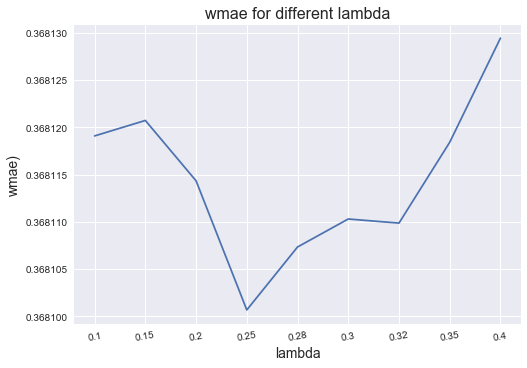

In [77]:
plot_results(results_lambda, 'lambda')

In [60]:
results_alpha = {}
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    result = {}
    print('\n\n\n\nrunning while lambda = {}'.format(i))
    params={'booster':'gblinear',
            'objective': 'reg:linear',
            'eval_metric':'mae',
            'alpha':i,
            'seed':0,
            'silent':1,
        }

    watchlist = [(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_alpha['{}'.format(i)] = result
    
print(results_alpha)





running while lambda = 0
[0]	train-mae:60160.1
Will train until train-mae hasn't improved in 300 rounds.
[1]	train-mae:56408.5
[2]	train-mae:55373.4
[3]	train-mae:54535.1
[4]	train-mae:53981.3
[5]	train-mae:53525.7
[6]	train-mae:53126.4
[7]	train-mae:52797
[8]	train-mae:52560.8
[9]	train-mae:52350.7
[10]	train-mae:52218.2
[11]	train-mae:52078.6
[12]	train-mae:51947.9
[13]	train-mae:51857.6
[14]	train-mae:51794.6
[15]	train-mae:51719.1
[16]	train-mae:51658.9
[17]	train-mae:51603.4
[18]	train-mae:51563.8
[19]	train-mae:51527.2
[20]	train-mae:51494.3
[21]	train-mae:51464.3
[22]	train-mae:51436.5
[23]	train-mae:51417.1
[24]	train-mae:51399.3
[25]	train-mae:51382.2
[26]	train-mae:51365.2
[27]	train-mae:51351.6
[28]	train-mae:51340.7
[29]	train-mae:51327.1
[30]	train-mae:51317.2
[31]	train-mae:51307
[32]	train-mae:51292.6
[33]	train-mae:51289.2
[34]	train-mae:51280.5
[35]	train-mae:51272
[36]	train-mae:51263.3
[37]	train-mae:51255
[38]	train-mae:51247.8
[39]	train-mae:51240
[40]	train-ma

[345]	train-mae:50823.7
[346]	train-mae:50823.5
[347]	train-mae:50823
[348]	train-mae:50822.5
[349]	train-mae:50822.4
[350]	train-mae:50821.8
[351]	train-mae:50821.3
[352]	train-mae:50820.9
[353]	train-mae:50820.3
[354]	train-mae:50820
[355]	train-mae:50819.4
[356]	train-mae:50818.9
[357]	train-mae:50818.5
[358]	train-mae:50818.2
[359]	train-mae:50817.7
[360]	train-mae:50816.6
[361]	train-mae:50815.8
[362]	train-mae:50815.7
[363]	train-mae:50815.9
[364]	train-mae:50815.4
[365]	train-mae:50815
[366]	train-mae:50814.6
[367]	train-mae:50814.3
[368]	train-mae:50813.8
[369]	train-mae:50813.5
[370]	train-mae:50812.9
[371]	train-mae:50812.6
[372]	train-mae:50812.2
[373]	train-mae:50811.8
[374]	train-mae:50811.4
[375]	train-mae:50810.7
[376]	train-mae:50810.7
[377]	train-mae:50810.1
[378]	train-mae:50809.8
[379]	train-mae:50809.2
[380]	train-mae:50809
[381]	train-mae:50808.5
[382]	train-mae:50807.9
[383]	train-mae:50807.7
[384]	train-mae:50807.3
[385]	train-mae:50806.9
[386]	train-mae:50806.1


[689]	train-mae:50716.4
[690]	train-mae:50716.2
[691]	train-mae:50716.3
[692]	train-mae:50716
[693]	train-mae:50715.7
[694]	train-mae:50715.5
[695]	train-mae:50715.3
[696]	train-mae:50715
[697]	train-mae:50715
[698]	train-mae:50714.6
[699]	train-mae:50714.4
[700]	train-mae:50714.2
[701]	train-mae:50713.6
[702]	train-mae:50713.5
[703]	train-mae:50713.6
[704]	train-mae:50713.4
[705]	train-mae:50713.1
[706]	train-mae:50713
[707]	train-mae:50712.9
[708]	train-mae:50712.6
[709]	train-mae:50712.3
[710]	train-mae:50712.2
[711]	train-mae:50712.1
[712]	train-mae:50711.9
[713]	train-mae:50711.6
[714]	train-mae:50711.5
[715]	train-mae:50711.2
[716]	train-mae:50711.1
[717]	train-mae:50710.9
[718]	train-mae:50710.6
[719]	train-mae:50710.3
[720]	train-mae:50710.2
[721]	train-mae:50710
[722]	train-mae:50709.7
[723]	train-mae:50709.6
[724]	train-mae:50709.2
[725]	train-mae:50708.8
[726]	train-mae:50708.9
[727]	train-mae:50708.7
[728]	train-mae:50708.7
[729]	train-mae:50708
[730]	train-mae:50708.2
[731

[1033]	train-mae:50659.1
[1034]	train-mae:50658.4
[1035]	train-mae:50658.7
[1036]	train-mae:50658.7
[1037]	train-mae:50658.4
[1038]	train-mae:50658.4
[1039]	train-mae:50657.9
[1040]	train-mae:50658.1
[1041]	train-mae:50658
[1042]	train-mae:50658
[1043]	train-mae:50657.9
[1044]	train-mae:50657.7
[1045]	train-mae:50657.5
[1046]	train-mae:50657.3
[1047]	train-mae:50657.1
[1048]	train-mae:50657.1
[1049]	train-mae:50656.9
[1050]	train-mae:50656.8
[1051]	train-mae:50656.4
[1052]	train-mae:50656.6
[1053]	train-mae:50656.5
[1054]	train-mae:50656.3
[1055]	train-mae:50656.1
[1056]	train-mae:50656
[1057]	train-mae:50655.4
[1058]	train-mae:50655.7
[1059]	train-mae:50655.6
[1060]	train-mae:50655.4
[1061]	train-mae:50655.3
[1062]	train-mae:50655.1
[1063]	train-mae:50654.8
[1064]	train-mae:50654.8
[1065]	train-mae:50654.8
[1066]	train-mae:50654.5
[1067]	train-mae:50654.4
[1068]	train-mae:50654.2
[1069]	train-mae:50654.2
[1070]	train-mae:50654
[1071]	train-mae:50653.9
[1072]	train-mae:50653.9
[1073]	t

[1364]	train-mae:50617.1
[1365]	train-mae:50616.9
[1366]	train-mae:50616.9
[1367]	train-mae:50616.3
[1368]	train-mae:50616.7
[1369]	train-mae:50616.4
[1370]	train-mae:50616.5
[1371]	train-mae:50616.3
[1372]	train-mae:50616.1
[1373]	train-mae:50616
[1374]	train-mae:50616
[1375]	train-mae:50615.8
[1376]	train-mae:50615.8
[1377]	train-mae:50615.4
[1378]	train-mae:50615.3
[1379]	train-mae:50615.3
[1380]	train-mae:50615.3
[1381]	train-mae:50615.2
[1382]	train-mae:50615
[1383]	train-mae:50614.9
[1384]	train-mae:50614.7
[1385]	train-mae:50614.5
[1386]	train-mae:50614.4
[1387]	train-mae:50614.2
[1388]	train-mae:50614.2
[1389]	train-mae:50614.2
[1390]	train-mae:50614.1
[1391]	train-mae:50613.9
[1392]	train-mae:50613.6
[1393]	train-mae:50613.8
[1394]	train-mae:50613.7
[1395]	train-mae:50613.6
[1396]	train-mae:50613.2
[1397]	train-mae:50613.3
[1398]	train-mae:50613.1
[1399]	train-mae:50613.2
[1400]	train-mae:50613
[1401]	train-mae:50612.9
[1402]	train-mae:50612.8
[1403]	train-mae:50612.6
[1404]	t

[1695]	train-mae:50582.2
[1696]	train-mae:50582.1
[1697]	train-mae:50581.6
[1698]	train-mae:50581.6
[1699]	train-mae:50581.9
[1700]	train-mae:50581.5
[1701]	train-mae:50581.6
[1702]	train-mae:50581.6
[1703]	train-mae:50581.6
[1704]	train-mae:50581.3
[1705]	train-mae:50581.2
[1706]	train-mae:50581.1
[1707]	train-mae:50581.1
[1708]	train-mae:50581
[1709]	train-mae:50580.9
[1710]	train-mae:50580.4
[1711]	train-mae:50580.6
[1712]	train-mae:50580.5
[1713]	train-mae:50580.4
[1714]	train-mae:50580.3
[1715]	train-mae:50580.4
[1716]	train-mae:50580
[1717]	train-mae:50579.8
[1718]	train-mae:50579.9
[1719]	train-mae:50580
[1720]	train-mae:50579.9
[1721]	train-mae:50579.8
[1722]	train-mae:50579.6
[1723]	train-mae:50579.5
[1724]	train-mae:50579.1
[1725]	train-mae:50579.5
[1726]	train-mae:50579.2
[1727]	train-mae:50579
[1728]	train-mae:50578.9
[1729]	train-mae:50578.8
[1730]	train-mae:50578.7
[1731]	train-mae:50578.7
[1732]	train-mae:50578.7
[1733]	train-mae:50578.4
[1734]	train-mae:50578.2
[1735]	t

[2026]	train-mae:50553.3
[2027]	train-mae:50553.1
[2028]	train-mae:50553.2
[2029]	train-mae:50553.1
[2030]	train-mae:50553
[2031]	train-mae:50553
[2032]	train-mae:50552.8
[2033]	train-mae:50552.7
[2034]	train-mae:50552.7
[2035]	train-mae:50552.5
[2036]	train-mae:50552.5
[2037]	train-mae:50552.5
[2038]	train-mae:50552.3
[2039]	train-mae:50552.3
[2040]	train-mae:50552.2
[2041]	train-mae:50552.1
[2042]	train-mae:50552
[2043]	train-mae:50551.5
[2044]	train-mae:50551.8
[2045]	train-mae:50551.8
[2046]	train-mae:50551.7
[2047]	train-mae:50551.5
[2048]	train-mae:50551.4
[2049]	train-mae:50551.2
[2050]	train-mae:50551.4
[2051]	train-mae:50551.2
[2052]	train-mae:50551.1
[2053]	train-mae:50550.9
[2054]	train-mae:50550.8
[2055]	train-mae:50550.8
[2056]	train-mae:50550.7
[2057]	train-mae:50550.7
[2058]	train-mae:50550.6
[2059]	train-mae:50550.5
[2060]	train-mae:50550.2
[2061]	train-mae:50550.4
[2062]	train-mae:50550.4
[2063]	train-mae:50550.2
[2064]	train-mae:50550.2
[2065]	train-mae:50550
[2066]	t

[2357]	train-mae:50526.6
[2358]	train-mae:50526.6
[2359]	train-mae:50526.5
[2360]	train-mae:50526.4
[2361]	train-mae:50526.3
[2362]	train-mae:50526.2
[2363]	train-mae:50526.1
[2364]	train-mae:50526.1
[2365]	train-mae:50525.9
[2366]	train-mae:50525.9
[2367]	train-mae:50525.9
[2368]	train-mae:50525.8
[2369]	train-mae:50525.7
[2370]	train-mae:50525.6
[2371]	train-mae:50525.5
[2372]	train-mae:50525.2
[2373]	train-mae:50524.8
[2374]	train-mae:50525
[2375]	train-mae:50524.9
[2376]	train-mae:50524.8
[2377]	train-mae:50524.7
[2378]	train-mae:50524.7
[2379]	train-mae:50524.7
[2380]	train-mae:50524.6
[2381]	train-mae:50524.2
[2382]	train-mae:50524.4
[2383]	train-mae:50524.3
[2384]	train-mae:50524.3
[2385]	train-mae:50524
[2386]	train-mae:50523.8
[2387]	train-mae:50523.9
[2388]	train-mae:50523.9
[2389]	train-mae:50523.7
[2390]	train-mae:50523.8
[2391]	train-mae:50523.7
[2392]	train-mae:50523.7
[2393]	train-mae:50523.6
[2394]	train-mae:50523.5
[2395]	train-mae:50523.4
[2396]	train-mae:50523.3
[239

[2687]	train-mae:50501.9
[2688]	train-mae:50501.8
[2689]	train-mae:50501.8
[2690]	train-mae:50501.6
[2691]	train-mae:50501.3
[2692]	train-mae:50501.1
[2693]	train-mae:50501.4
[2694]	train-mae:50501.4
[2695]	train-mae:50501.3
[2696]	train-mae:50501.3
[2697]	train-mae:50501.1
[2698]	train-mae:50501
[2699]	train-mae:50501
[2700]	train-mae:50501
[2701]	train-mae:50501
[2702]	train-mae:50500.6
[2703]	train-mae:50500.8
[2704]	train-mae:50500.7
[2705]	train-mae:50500.6
[2706]	train-mae:50500.6
[2707]	train-mae:50500.6
[2708]	train-mae:50500.4
[2709]	train-mae:50500.4
[2710]	train-mae:50500.3
[2711]	train-mae:50500.3
[2712]	train-mae:50500.2
[2713]	train-mae:50500.1
[2714]	train-mae:50500
[2715]	train-mae:50500
[2716]	train-mae:50499.9
[2717]	train-mae:50499.9
[2718]	train-mae:50499.7
[2719]	train-mae:50499.6
[2720]	train-mae:50499.7
[2721]	train-mae:50499.6
[2722]	train-mae:50499.6
[2723]	train-mae:50499.4
[2724]	train-mae:50499.4
[2725]	train-mae:50499.4
[2726]	train-mae:50499.2
[2727]	train

[17]	train-mae:51596.2
[18]	train-mae:51547.8
[19]	train-mae:51507.6
[20]	train-mae:51477
[21]	train-mae:51448.9
[22]	train-mae:51422.6
[23]	train-mae:51401.6
[24]	train-mae:51383
[25]	train-mae:51368.2
[26]	train-mae:51353.6
[27]	train-mae:51341.3
[28]	train-mae:51326.8
[29]	train-mae:51322.8
[30]	train-mae:51311.6
[31]	train-mae:51302.7
[32]	train-mae:51292.8
[33]	train-mae:51283.6
[34]	train-mae:51275.2
[35]	train-mae:51267.8
[36]	train-mae:51261.1
[37]	train-mae:51253.1
[38]	train-mae:51246.3
[39]	train-mae:51238.7
[40]	train-mae:51232.1
[41]	train-mae:51221.2
[42]	train-mae:51218.6
[43]	train-mae:51213
[44]	train-mae:51207
[45]	train-mae:51201
[46]	train-mae:51195.1
[47]	train-mae:51189.5
[48]	train-mae:51182.9
[49]	train-mae:51178.8
[50]	train-mae:51172.8
[51]	train-mae:51168.3
[52]	train-mae:51163
[53]	train-mae:51158.8
[54]	train-mae:51153.2
[55]	train-mae:51147.3
[56]	train-mae:51144.2
[57]	train-mae:51138.6
[58]	train-mae:51136.6
[59]	train-mae:51132.8
[60]	train-mae:51128.9


[365]	train-mae:50814.8
[366]	train-mae:50813.5
[367]	train-mae:50814
[368]	train-mae:50813.3
[369]	train-mae:50812.8
[370]	train-mae:50812.9
[371]	train-mae:50812.3
[372]	train-mae:50812
[373]	train-mae:50811.5
[374]	train-mae:50811.1
[375]	train-mae:50811
[376]	train-mae:50810.3
[377]	train-mae:50810
[378]	train-mae:50809.7
[379]	train-mae:50808.4
[380]	train-mae:50808.6
[381]	train-mae:50808.4
[382]	train-mae:50808
[383]	train-mae:50806.5
[384]	train-mae:50807.3
[385]	train-mae:50806.7
[386]	train-mae:50806.6
[387]	train-mae:50806.2
[388]	train-mae:50805.7
[389]	train-mae:50805.2
[390]	train-mae:50805
[391]	train-mae:50804.5
[392]	train-mae:50803.3
[393]	train-mae:50803.8
[394]	train-mae:50803.5
[395]	train-mae:50803
[396]	train-mae:50802.4
[397]	train-mae:50802.3
[398]	train-mae:50802
[399]	train-mae:50801.5
[400]	train-mae:50801.2
[401]	train-mae:50800.8
[402]	train-mae:50800.2
[403]	train-mae:50800
[404]	train-mae:50798.3
[405]	train-mae:50799.1
[406]	train-mae:50798.6
[407]	trai

[710]	train-mae:50712.4
[711]	train-mae:50712.3
[712]	train-mae:50712.3
[713]	train-mae:50712
[714]	train-mae:50712
[715]	train-mae:50711.7
[716]	train-mae:50711.5
[717]	train-mae:50711.3
[718]	train-mae:50711.2
[719]	train-mae:50710.9
[720]	train-mae:50710.8
[721]	train-mae:50710.5
[722]	train-mae:50710.2
[723]	train-mae:50710.1
[724]	train-mae:50709.7
[725]	train-mae:50709.7
[726]	train-mae:50709.6
[727]	train-mae:50709.4
[728]	train-mae:50709
[729]	train-mae:50709
[730]	train-mae:50708.4
[731]	train-mae:50708.6
[732]	train-mae:50708.5
[733]	train-mae:50708
[734]	train-mae:50707.9
[735]	train-mae:50707.7
[736]	train-mae:50707.8
[737]	train-mae:50707.4
[738]	train-mae:50707.3
[739]	train-mae:50707.1
[740]	train-mae:50706.6
[741]	train-mae:50706.8
[742]	train-mae:50706.5
[743]	train-mae:50706.4
[744]	train-mae:50705.6
[745]	train-mae:50705.8
[746]	train-mae:50705.4
[747]	train-mae:50705.2
[748]	train-mae:50705.3
[749]	train-mae:50705.3
[750]	train-mae:50704.9
[751]	train-mae:50704.8
[7

[1052]	train-mae:50657.3
[1053]	train-mae:50657.1
[1054]	train-mae:50656.8
[1055]	train-mae:50656.7
[1056]	train-mae:50656.5
[1057]	train-mae:50656.5
[1058]	train-mae:50656.2
[1059]	train-mae:50656.1
[1060]	train-mae:50656.1
[1061]	train-mae:50656
[1062]	train-mae:50655.8
[1063]	train-mae:50655.5
[1064]	train-mae:50655.3
[1065]	train-mae:50655.4
[1066]	train-mae:50655.1
[1067]	train-mae:50655.1
[1068]	train-mae:50654.9
[1069]	train-mae:50654.8
[1070]	train-mae:50654.7
[1071]	train-mae:50654.5
[1072]	train-mae:50654.4
[1073]	train-mae:50654.2
[1074]	train-mae:50654.3
[1075]	train-mae:50654
[1076]	train-mae:50653.9
[1077]	train-mae:50653.8
[1078]	train-mae:50653.2
[1079]	train-mae:50652.9
[1080]	train-mae:50653.2
[1081]	train-mae:50653.2
[1082]	train-mae:50653.1
[1083]	train-mae:50652.9
[1084]	train-mae:50652.6
[1085]	train-mae:50652.6
[1086]	train-mae:50652.6
[1087]	train-mae:50652.1
[1088]	train-mae:50652.2
[1089]	train-mae:50652.1
[1090]	train-mae:50651.9
[1091]	train-mae:50651.4
[109

[1383]	train-mae:50615
[1384]	train-mae:50614.8
[1385]	train-mae:50614.8
[1386]	train-mae:50614.7
[1387]	train-mae:50614.5
[1388]	train-mae:50614.5
[1389]	train-mae:50614.1
[1390]	train-mae:50614.3
[1391]	train-mae:50614.1
[1392]	train-mae:50614
[1393]	train-mae:50613.8
[1394]	train-mae:50614
[1395]	train-mae:50613.8
[1396]	train-mae:50613.8
[1397]	train-mae:50613.6
[1398]	train-mae:50613.1
[1399]	train-mae:50613.3
[1400]	train-mae:50613.2
[1401]	train-mae:50612.5
[1402]	train-mae:50613
[1403]	train-mae:50612.8
[1404]	train-mae:50612.8
[1405]	train-mae:50612.7
[1406]	train-mae:50612.1
[1407]	train-mae:50612.4
[1408]	train-mae:50612.1
[1409]	train-mae:50612.4
[1410]	train-mae:50612.2
[1411]	train-mae:50612.1
[1412]	train-mae:50612.1
[1413]	train-mae:50611.9
[1414]	train-mae:50611.8
[1415]	train-mae:50611.4
[1416]	train-mae:50611.6
[1417]	train-mae:50611.4
[1418]	train-mae:50611.4
[1419]	train-mae:50611.1
[1420]	train-mae:50611.1
[1421]	train-mae:50611.2
[1422]	train-mae:50610.9
[1423]	t

[1714]	train-mae:50581
[1715]	train-mae:50581.1
[1716]	train-mae:50581
[1717]	train-mae:50581
[1718]	train-mae:50580.5
[1719]	train-mae:50580.7
[1720]	train-mae:50580.9
[1721]	train-mae:50580.6
[1722]	train-mae:50580.6
[1723]	train-mae:50580.3
[1724]	train-mae:50580
[1725]	train-mae:50580.1
[1726]	train-mae:50580
[1727]	train-mae:50579.9
[1728]	train-mae:50579.8
[1729]	train-mae:50579.8
[1730]	train-mae:50579.6
[1731]	train-mae:50579.5
[1732]	train-mae:50579.5
[1733]	train-mae:50579.4
[1734]	train-mae:50579.3
[1735]	train-mae:50579.1
[1736]	train-mae:50579.1
[1737]	train-mae:50579
[1738]	train-mae:50578.8
[1739]	train-mae:50578.7
[1740]	train-mae:50578.7
[1741]	train-mae:50578.6
[1742]	train-mae:50578.5
[1743]	train-mae:50578.5
[1744]	train-mae:50578.4
[1745]	train-mae:50578.1
[1746]	train-mae:50578.2
[1747]	train-mae:50578.2
[1748]	train-mae:50578
[1749]	train-mae:50578
[1750]	train-mae:50577.8
[1751]	train-mae:50577.4
[1752]	train-mae:50577.5
[1753]	train-mae:50577.2
[1754]	train-mae

[2045]	train-mae:50552
[2046]	train-mae:50552
[2047]	train-mae:50551.8
[2048]	train-mae:50551.7
[2049]	train-mae:50551.6
[2050]	train-mae:50551.3
[2051]	train-mae:50551.4
[2052]	train-mae:50551.1
[2053]	train-mae:50551.1
[2054]	train-mae:50551.2
[2055]	train-mae:50551.1
[2056]	train-mae:50551
[2057]	train-mae:50551
[2058]	train-mae:50550.8
[2059]	train-mae:50550.8
[2060]	train-mae:50550.5
[2061]	train-mae:50550.7
[2062]	train-mae:50550.4
[2063]	train-mae:50550.4
[2064]	train-mae:50550.4
[2065]	train-mae:50550.3
[2066]	train-mae:50550
[2067]	train-mae:50550.1
[2068]	train-mae:50550.1
[2069]	train-mae:50550
[2070]	train-mae:50549.9
[2071]	train-mae:50549.8
[2072]	train-mae:50549.7
[2073]	train-mae:50549.7
[2074]	train-mae:50549.6
[2075]	train-mae:50549.5
[2076]	train-mae:50549.5
[2077]	train-mae:50549
[2078]	train-mae:50549.1
[2079]	train-mae:50549.1
[2080]	train-mae:50549.2
[2081]	train-mae:50549.1
[2082]	train-mae:50549
[2083]	train-mae:50549
[2084]	train-mae:50548.7
[2085]	train-mae:5

[2377]	train-mae:50525.4
[2378]	train-mae:50525.3
[2379]	train-mae:50525.3
[2380]	train-mae:50525.3
[2381]	train-mae:50525.1
[2382]	train-mae:50525
[2383]	train-mae:50524.9
[2384]	train-mae:50524.8
[2385]	train-mae:50524.8
[2386]	train-mae:50524.7
[2387]	train-mae:50524.6
[2388]	train-mae:50524.6
[2389]	train-mae:50524.4
[2390]	train-mae:50524.4
[2391]	train-mae:50524.3
[2392]	train-mae:50524.3
[2393]	train-mae:50524.2
[2394]	train-mae:50524.1
[2395]	train-mae:50524.1
[2396]	train-mae:50524
[2397]	train-mae:50523.9
[2398]	train-mae:50523.8
[2399]	train-mae:50523.7
[2400]	train-mae:50523.7
[2401]	train-mae:50523.6
[2402]	train-mae:50523.5
[2403]	train-mae:50523.5
[2404]	train-mae:50523.5
[2405]	train-mae:50523.2
[2406]	train-mae:50523.1
[2407]	train-mae:50523.1
[2408]	train-mae:50523.1
[2409]	train-mae:50523
[2410]	train-mae:50523
[2411]	train-mae:50522.8
[2412]	train-mae:50522.8
[2413]	train-mae:50522.6
[2414]	train-mae:50522.6
[2415]	train-mae:50522.5
[2416]	train-mae:50522.5
[2417]	t

[2708]	train-mae:50500.9
[2709]	train-mae:50500.8
[2710]	train-mae:50500.7
[2711]	train-mae:50500.7
[2712]	train-mae:50500.6
[2713]	train-mae:50500.3
[2714]	train-mae:50500.5
[2715]	train-mae:50500.3
[2716]	train-mae:50500.4
[2717]	train-mae:50500.2
[2718]	train-mae:50499.8
[2719]	train-mae:50500.1
[2720]	train-mae:50500
[2721]	train-mae:50499.8
[2722]	train-mae:50499.8
[2723]	train-mae:50499.8
[2724]	train-mae:50499.7
[2725]	train-mae:50499.1
[2726]	train-mae:50499.3
[2727]	train-mae:50499.5
[2728]	train-mae:50499.4
[2729]	train-mae:50499.2
[2730]	train-mae:50499.2
[2731]	train-mae:50499.1
[2732]	train-mae:50499.1
[2733]	train-mae:50499
[2734]	train-mae:50499
[2735]	train-mae:50498.9
[2736]	train-mae:50498.8
[2737]	train-mae:50498.7
[2738]	train-mae:50498.7
[2739]	train-mae:50498.6
[2740]	train-mae:50498.2
[2741]	train-mae:50498.4
[2742]	train-mae:50498.2
[2743]	train-mae:50498.3
[2744]	train-mae:50498
[2745]	train-mae:50498
[2746]	train-mae:50497.9
[2747]	train-mae:50497.9
[2748]	tra

[39]	train-mae:51238.3
[40]	train-mae:51228.6
[41]	train-mae:51224.6
[42]	train-mae:51217.8
[43]	train-mae:51212.2
[44]	train-mae:51203.7
[45]	train-mae:51199.5
[46]	train-mae:51193.7
[47]	train-mae:51187.2
[48]	train-mae:51183.7
[49]	train-mae:51178.5
[50]	train-mae:51172.1
[51]	train-mae:51165.3
[52]	train-mae:51163.2
[53]	train-mae:51158.5
[54]	train-mae:51153.6
[55]	train-mae:51148.4
[56]	train-mae:51144.4
[57]	train-mae:51140.3
[58]	train-mae:51135.1
[59]	train-mae:51132.5
[60]	train-mae:51128.1
[61]	train-mae:51123.9
[62]	train-mae:51120.2
[63]	train-mae:51115.8
[64]	train-mae:51112.4
[65]	train-mae:51109.1
[66]	train-mae:51105.9
[67]	train-mae:51102.3
[68]	train-mae:51098.8
[69]	train-mae:51096
[70]	train-mae:51092.4
[71]	train-mae:51089.9
[72]	train-mae:51086.2
[73]	train-mae:51083.3
[74]	train-mae:51079.3
[75]	train-mae:51073.4
[76]	train-mae:51074.9
[77]	train-mae:51071.9
[78]	train-mae:51068.8
[79]	train-mae:51062.4
[80]	train-mae:51062.9
[81]	train-mae:51060.1
[82]	train-ma

[386]	train-mae:50805.8
[387]	train-mae:50805.6
[388]	train-mae:50804.9
[389]	train-mae:50804.6
[390]	train-mae:50804.2
[391]	train-mae:50803.3
[392]	train-mae:50803.3
[393]	train-mae:50803.2
[394]	train-mae:50802.7
[395]	train-mae:50802.3
[396]	train-mae:50801.7
[397]	train-mae:50801.7
[398]	train-mae:50801.1
[399]	train-mae:50800.7
[400]	train-mae:50800.4
[401]	train-mae:50799.9
[402]	train-mae:50799.2
[403]	train-mae:50799.1
[404]	train-mae:50798.8
[405]	train-mae:50798.3
[406]	train-mae:50797.7
[407]	train-mae:50797.6
[408]	train-mae:50797.2
[409]	train-mae:50796.9
[410]	train-mae:50796.5
[411]	train-mae:50796
[412]	train-mae:50795
[413]	train-mae:50795.4
[414]	train-mae:50794.8
[415]	train-mae:50794.7
[416]	train-mae:50794.4
[417]	train-mae:50793.8
[418]	train-mae:50793.5
[419]	train-mae:50793.1
[420]	train-mae:50792.4
[421]	train-mae:50792.5
[422]	train-mae:50791.8
[423]	train-mae:50791.5
[424]	train-mae:50791.1
[425]	train-mae:50790.9
[426]	train-mae:50790.4
[427]	train-mae:5078

[731]	train-mae:50707.5
[732]	train-mae:50707.4
[733]	train-mae:50706.7
[734]	train-mae:50706.9
[735]	train-mae:50706.8
[736]	train-mae:50706.5
[737]	train-mae:50706.4
[738]	train-mae:50706.1
[739]	train-mae:50706.2
[740]	train-mae:50705.8
[741]	train-mae:50705.8
[742]	train-mae:50705.5
[743]	train-mae:50705.4
[744]	train-mae:50704.6
[745]	train-mae:50704.7
[746]	train-mae:50704.9
[747]	train-mae:50704.1
[748]	train-mae:50704.5
[749]	train-mae:50704.3
[750]	train-mae:50704.1
[751]	train-mae:50703.7
[752]	train-mae:50703.6
[753]	train-mae:50703.6
[754]	train-mae:50703.4
[755]	train-mae:50703
[756]	train-mae:50702.9
[757]	train-mae:50702.9
[758]	train-mae:50702.7
[759]	train-mae:50702.5
[760]	train-mae:50702.4
[761]	train-mae:50702.1
[762]	train-mae:50702.1
[763]	train-mae:50701.5
[764]	train-mae:50701.5
[765]	train-mae:50701.3
[766]	train-mae:50701.3
[767]	train-mae:50701.1
[768]	train-mae:50701
[769]	train-mae:50700.8
[770]	train-mae:50700.7
[771]	train-mae:50700.5
[772]	train-mae:5069

[1073]	train-mae:50653.5
[1074]	train-mae:50653.3
[1075]	train-mae:50653.2
[1076]	train-mae:50653
[1077]	train-mae:50652.9
[1078]	train-mae:50652.9
[1079]	train-mae:50652.6
[1080]	train-mae:50652.6
[1081]	train-mae:50652.4
[1082]	train-mae:50652.2
[1083]	train-mae:50652.1
[1084]	train-mae:50651.9
[1085]	train-mae:50651.8
[1086]	train-mae:50651.5
[1087]	train-mae:50651.3
[1088]	train-mae:50651.5
[1089]	train-mae:50651.3
[1090]	train-mae:50651.3
[1091]	train-mae:50650.8
[1092]	train-mae:50651
[1093]	train-mae:50650.6
[1094]	train-mae:50650.5
[1095]	train-mae:50650.6
[1096]	train-mae:50650.3
[1097]	train-mae:50650.3
[1098]	train-mae:50650.1
[1099]	train-mae:50649.7
[1100]	train-mae:50649.9
[1101]	train-mae:50649.8
[1102]	train-mae:50649.3
[1103]	train-mae:50649.5
[1104]	train-mae:50649.2
[1105]	train-mae:50649
[1106]	train-mae:50649
[1107]	train-mae:50648.7
[1108]	train-mae:50648.5
[1109]	train-mae:50648.5
[1110]	train-mae:50648.2
[1111]	train-mae:50648.3
[1112]	train-mae:50648
[1113]	tra

[1404]	train-mae:50612.5
[1405]	train-mae:50612.2
[1406]	train-mae:50612.1
[1407]	train-mae:50612
[1408]	train-mae:50612
[1409]	train-mae:50612.1
[1410]	train-mae:50611.7
[1411]	train-mae:50611.8
[1412]	train-mae:50611.7
[1413]	train-mae:50611.6
[1414]	train-mae:50611.5
[1415]	train-mae:50611.4
[1416]	train-mae:50611.2
[1417]	train-mae:50611.2
[1418]	train-mae:50610.7
[1419]	train-mae:50610.5
[1420]	train-mae:50610.7
[1421]	train-mae:50610.6
[1422]	train-mae:50610.4
[1423]	train-mae:50610.5
[1424]	train-mae:50610.2
[1425]	train-mae:50610
[1426]	train-mae:50610.1
[1427]	train-mae:50610
[1428]	train-mae:50609.9
[1429]	train-mae:50609.9
[1430]	train-mae:50609.6
[1431]	train-mae:50609.5
[1432]	train-mae:50609.5
[1433]	train-mae:50609
[1434]	train-mae:50609.2
[1435]	train-mae:50609.2
[1436]	train-mae:50609
[1437]	train-mae:50608.9
[1438]	train-mae:50608.8
[1439]	train-mae:50608.8
[1440]	train-mae:50608.5
[1441]	train-mae:50608.2
[1442]	train-mae:50608.3
[1443]	train-mae:50608.1
[1444]	train

[1734]	train-mae:50578.5
[1735]	train-mae:50578.5
[1736]	train-mae:50578.4
[1737]	train-mae:50578.3
[1738]	train-mae:50578.2
[1739]	train-mae:50578.1
[1740]	train-mae:50578
[1741]	train-mae:50577.9
[1742]	train-mae:50577.8
[1743]	train-mae:50577.7
[1744]	train-mae:50577.6
[1745]	train-mae:50577.6
[1746]	train-mae:50577.1
[1747]	train-mae:50577.3
[1748]	train-mae:50577
[1749]	train-mae:50577.1
[1750]	train-mae:50577
[1751]	train-mae:50576.9
[1752]	train-mae:50576.7
[1753]	train-mae:50576.6
[1754]	train-mae:50576.6
[1755]	train-mae:50576.3
[1756]	train-mae:50576.3
[1757]	train-mae:50576.3
[1758]	train-mae:50576.3
[1759]	train-mae:50575.9
[1760]	train-mae:50576
[1761]	train-mae:50575.8
[1762]	train-mae:50575.8
[1763]	train-mae:50575.7
[1764]	train-mae:50575.6
[1765]	train-mae:50575.5
[1766]	train-mae:50575.5
[1767]	train-mae:50575.3
[1768]	train-mae:50575.2
[1769]	train-mae:50575.1
[1770]	train-mae:50575.1
[1771]	train-mae:50575
[1772]	train-mae:50574.8
[1773]	train-mae:50574.8
[1774]	tra

[2064]	train-mae:50549.4
[2065]	train-mae:50549.4
[2066]	train-mae:50549.2
[2067]	train-mae:50549.2
[2068]	train-mae:50549.1
[2069]	train-mae:50549
[2070]	train-mae:50549
[2071]	train-mae:50549
[2072]	train-mae:50548.8
[2073]	train-mae:50548.6
[2074]	train-mae:50548.7
[2075]	train-mae:50548.6
[2076]	train-mae:50548.5
[2077]	train-mae:50548.4
[2078]	train-mae:50548.2
[2079]	train-mae:50548.1
[2080]	train-mae:50548.1
[2081]	train-mae:50548.1
[2082]	train-mae:50547.9
[2083]	train-mae:50547.9
[2084]	train-mae:50547.7
[2085]	train-mae:50547.8
[2086]	train-mae:50547.7
[2087]	train-mae:50547.6
[2088]	train-mae:50547.5
[2089]	train-mae:50547.4
[2090]	train-mae:50547.3
[2091]	train-mae:50547
[2092]	train-mae:50547.1
[2093]	train-mae:50547.1
[2094]	train-mae:50547
[2095]	train-mae:50546.9
[2096]	train-mae:50546.9
[2097]	train-mae:50546.6
[2098]	train-mae:50546.6
[2099]	train-mae:50546.6
[2100]	train-mae:50546.4
[2101]	train-mae:50546.4
[2102]	train-mae:50546.5
[2103]	train-mae:50546.2
[2104]	tra

[2395]	train-mae:50523.2
[2396]	train-mae:50523.1
[2397]	train-mae:50523
[2398]	train-mae:50522.9
[2399]	train-mae:50522.8
[2400]	train-mae:50522.7
[2401]	train-mae:50522.7
[2402]	train-mae:50522.7
[2403]	train-mae:50522.4
[2404]	train-mae:50522.4
[2405]	train-mae:50522.4
[2406]	train-mae:50522.2
[2407]	train-mae:50522.1
[2408]	train-mae:50522
[2409]	train-mae:50522
[2410]	train-mae:50522
[2411]	train-mae:50521.9
[2412]	train-mae:50521.8
[2413]	train-mae:50521.7
[2414]	train-mae:50521.8
[2415]	train-mae:50521.6
[2416]	train-mae:50521.2
[2417]	train-mae:50521.3
[2418]	train-mae:50521.3
[2419]	train-mae:50521.1
[2420]	train-mae:50521
[2421]	train-mae:50521.1
[2422]	train-mae:50520.9
[2423]	train-mae:50520.9
[2424]	train-mae:50520.6
[2425]	train-mae:50520.5
[2426]	train-mae:50520.2
[2427]	train-mae:50520.5
[2428]	train-mae:50520.5
[2429]	train-mae:50520.4
[2430]	train-mae:50520.3
[2431]	train-mae:50520.1
[2432]	train-mae:50520.1
[2433]	train-mae:50520
[2434]	train-mae:50519.9
[2435]	train

[2726]	train-mae:50498.9
[2727]	train-mae:50498.7
[2728]	train-mae:50498.6
[2729]	train-mae:50498.6
[2730]	train-mae:50498.5
[2731]	train-mae:50498.5
[2732]	train-mae:50498.5
[2733]	train-mae:50498.3
[2734]	train-mae:50498.2
[2735]	train-mae:50498.1
[2736]	train-mae:50498.1
[2737]	train-mae:50498.1
[2738]	train-mae:50498.1
[2739]	train-mae:50497.9
[2740]	train-mae:50497.9
[2741]	train-mae:50497.7
[2742]	train-mae:50497.7
[2743]	train-mae:50497.6
[2744]	train-mae:50497.5
[2745]	train-mae:50497.4
[2746]	train-mae:50497.3
[2747]	train-mae:50497.3
[2748]	train-mae:50497.3
[2749]	train-mae:50497.2
[2750]	train-mae:50497.2
[2751]	train-mae:50497
[2752]	train-mae:50496.9
[2753]	train-mae:50496.9
[2754]	train-mae:50496.8
[2755]	train-mae:50496.8
[2756]	train-mae:50496.7
[2757]	train-mae:50496.6
[2758]	train-mae:50496.5
[2759]	train-mae:50496.5
[2760]	train-mae:50496.4
[2761]	train-mae:50496.4
[2762]	train-mae:50496.3
[2763]	train-mae:50496.2
[2764]	train-mae:50496.1
[2765]	train-mae:50496.1
[2

[58]	train-mae:51133.6
[59]	train-mae:51131.9
[60]	train-mae:51127.7
[61]	train-mae:51124
[62]	train-mae:51120.1
[63]	train-mae:51116.4
[64]	train-mae:51112.9
[65]	train-mae:51109.3
[66]	train-mae:51104.7
[67]	train-mae:51102.4
[68]	train-mae:51098.5
[69]	train-mae:51096
[70]	train-mae:51092.9
[71]	train-mae:51089.8
[72]	train-mae:51086.8
[73]	train-mae:51083.3
[74]	train-mae:51080
[75]	train-mae:51077.6
[76]	train-mae:51074.6
[77]	train-mae:51071.5
[78]	train-mae:51068.6
[79]	train-mae:51065.4
[80]	train-mae:51062.8
[81]	train-mae:51060.5
[82]	train-mae:51057.4
[83]	train-mae:51055.4
[84]	train-mae:51052.9
[85]	train-mae:51048
[86]	train-mae:51047.5
[87]	train-mae:51045.7
[88]	train-mae:51043.5
[89]	train-mae:51041.2
[90]	train-mae:51039.2
[91]	train-mae:51036.9
[92]	train-mae:51034.7
[93]	train-mae:51032.7
[94]	train-mae:51030.5
[95]	train-mae:51026.6
[96]	train-mae:51026.8
[97]	train-mae:51023.8
[98]	train-mae:51023.2
[99]	train-mae:51020.6
[100]	train-mae:51019.6
[101]	train-mae:51

[404]	train-mae:50798.8
[405]	train-mae:50798
[406]	train-mae:50797.8
[407]	train-mae:50797.5
[408]	train-mae:50797.1
[409]	train-mae:50795.7
[410]	train-mae:50796.5
[411]	train-mae:50796.1
[412]	train-mae:50795.3
[413]	train-mae:50795
[414]	train-mae:50794.9
[415]	train-mae:50794.5
[416]	train-mae:50794.2
[417]	train-mae:50793.8
[418]	train-mae:50793.1
[419]	train-mae:50793.2
[420]	train-mae:50792.8
[421]	train-mae:50792.2
[422]	train-mae:50791.8
[423]	train-mae:50791.3
[424]	train-mae:50791.2
[425]	train-mae:50790.8
[426]	train-mae:50789.8
[427]	train-mae:50789.8
[428]	train-mae:50789.9
[429]	train-mae:50789.5
[430]	train-mae:50788.9
[431]	train-mae:50788.7
[432]	train-mae:50788.2
[433]	train-mae:50787.6
[434]	train-mae:50787.5
[435]	train-mae:50786.9
[436]	train-mae:50786.8
[437]	train-mae:50786.3
[438]	train-mae:50786
[439]	train-mae:50785.5
[440]	train-mae:50785.4
[441]	train-mae:50785
[442]	train-mae:50784.6
[443]	train-mae:50784.1
[444]	train-mae:50783.8
[445]	train-mae:50783.5


[749]	train-mae:50704.2
[750]	train-mae:50704.2
[751]	train-mae:50703.9
[752]	train-mae:50703.6
[753]	train-mae:50703.7
[754]	train-mae:50703.6
[755]	train-mae:50703.3
[756]	train-mae:50703.1
[757]	train-mae:50702.7
[758]	train-mae:50702.8
[759]	train-mae:50702.6
[760]	train-mae:50702.4
[761]	train-mae:50702.3
[762]	train-mae:50702
[763]	train-mae:50701.9
[764]	train-mae:50701.2
[765]	train-mae:50701.1
[766]	train-mae:50701.2
[767]	train-mae:50701.1
[768]	train-mae:50700.6
[769]	train-mae:50700.7
[770]	train-mae:50700.6
[771]	train-mae:50700.2
[772]	train-mae:50700.2
[773]	train-mae:50699.8
[774]	train-mae:50699.8
[775]	train-mae:50699.7
[776]	train-mae:50699.3
[777]	train-mae:50699.3
[778]	train-mae:50699.3
[779]	train-mae:50699.1
[780]	train-mae:50698.9
[781]	train-mae:50697.9
[782]	train-mae:50698.5
[783]	train-mae:50698.4
[784]	train-mae:50698.2
[785]	train-mae:50698
[786]	train-mae:50697.8
[787]	train-mae:50697.6
[788]	train-mae:50697.3
[789]	train-mae:50696.8
[790]	train-mae:5069

[1090]	train-mae:50651.1
[1091]	train-mae:50651.1
[1092]	train-mae:50650.9
[1093]	train-mae:50650.7
[1094]	train-mae:50650.7
[1095]	train-mae:50650.3
[1096]	train-mae:50650.5
[1097]	train-mae:50650.2
[1098]	train-mae:50650.2
[1099]	train-mae:50649.8
[1100]	train-mae:50649.9
[1101]	train-mae:50649.8
[1102]	train-mae:50649.6
[1103]	train-mae:50649.5
[1104]	train-mae:50649.2
[1105]	train-mae:50649.1
[1106]	train-mae:50649.3
[1107]	train-mae:50649
[1108]	train-mae:50648.8
[1109]	train-mae:50648.8
[1110]	train-mae:50648.2
[1111]	train-mae:50648.5
[1112]	train-mae:50648.4
[1113]	train-mae:50647.8
[1114]	train-mae:50648
[1115]	train-mae:50648
[1116]	train-mae:50647.9
[1117]	train-mae:50647.7
[1118]	train-mae:50647.4
[1119]	train-mae:50647
[1120]	train-mae:50647.3
[1121]	train-mae:50647.1
[1122]	train-mae:50646.8
[1123]	train-mae:50646.4
[1124]	train-mae:50646.6
[1125]	train-mae:50646.5
[1126]	train-mae:50646.2
[1127]	train-mae:50646.1
[1128]	train-mae:50645.9
[1129]	train-mae:50646
[1130]	tra

[1421]	train-mae:50610.7
[1422]	train-mae:50610.6
[1423]	train-mae:50610.4
[1424]	train-mae:50610.5
[1425]	train-mae:50610.1
[1426]	train-mae:50610.1
[1427]	train-mae:50610
[1428]	train-mae:50609.6
[1429]	train-mae:50609.7
[1430]	train-mae:50609.6
[1431]	train-mae:50609.4
[1432]	train-mae:50609.4
[1433]	train-mae:50609.3
[1434]	train-mae:50609.2
[1435]	train-mae:50609.1
[1436]	train-mae:50609
[1437]	train-mae:50608.9
[1438]	train-mae:50608.8
[1439]	train-mae:50608.7
[1440]	train-mae:50608.4
[1441]	train-mae:50608.4
[1442]	train-mae:50608.2
[1443]	train-mae:50608.3
[1444]	train-mae:50608.1
[1445]	train-mae:50608
[1446]	train-mae:50607.9
[1447]	train-mae:50607.8
[1448]	train-mae:50607.7
[1449]	train-mae:50607.5
[1450]	train-mae:50607.6
[1451]	train-mae:50607.3
[1452]	train-mae:50607.1
[1453]	train-mae:50607.1
[1454]	train-mae:50607
[1455]	train-mae:50607
[1456]	train-mae:50606.8
[1457]	train-mae:50606.7
[1458]	train-mae:50606.2
[1459]	train-mae:50606
[1460]	train-mae:50606.3
[1461]	train

[1751]	train-mae:50576.8
[1752]	train-mae:50576.7
[1753]	train-mae:50576.6
[1754]	train-mae:50576.5
[1755]	train-mae:50576.3
[1756]	train-mae:50576.3
[1757]	train-mae:50576.2
[1758]	train-mae:50576.2
[1759]	train-mae:50575.6
[1760]	train-mae:50575.8
[1761]	train-mae:50575.8
[1762]	train-mae:50575.7
[1763]	train-mae:50575.6
[1764]	train-mae:50575.5
[1765]	train-mae:50575.4
[1766]	train-mae:50575.2
[1767]	train-mae:50575.3
[1768]	train-mae:50575.2
[1769]	train-mae:50574.9
[1770]	train-mae:50575
[1771]	train-mae:50574.9
[1772]	train-mae:50574.9
[1773]	train-mae:50574.7
[1774]	train-mae:50574.6
[1775]	train-mae:50574.5
[1776]	train-mae:50574.5
[1777]	train-mae:50574.1
[1778]	train-mae:50574.1
[1779]	train-mae:50574.1
[1780]	train-mae:50574
[1781]	train-mae:50573.7
[1782]	train-mae:50574
[1783]	train-mae:50573.8
[1784]	train-mae:50573.6
[1785]	train-mae:50573.5
[1786]	train-mae:50573.5
[1787]	train-mae:50573.5
[1788]	train-mae:50573.2
[1789]	train-mae:50573.3
[1790]	train-mae:50573.2
[1791]

[2081]	train-mae:50547.9
[2082]	train-mae:50547.9
[2083]	train-mae:50547.9
[2084]	train-mae:50547.7
[2085]	train-mae:50547.6
[2086]	train-mae:50547.5
[2087]	train-mae:50547.5
[2088]	train-mae:50547.3
[2089]	train-mae:50547.3
[2090]	train-mae:50547
[2091]	train-mae:50546.9
[2092]	train-mae:50547.1
[2093]	train-mae:50546.9
[2094]	train-mae:50546.8
[2095]	train-mae:50546.9
[2096]	train-mae:50546.7
[2097]	train-mae:50546.7
[2098]	train-mae:50546.5
[2099]	train-mae:50546.5
[2100]	train-mae:50546.3
[2101]	train-mae:50546.4
[2102]	train-mae:50546.3
[2103]	train-mae:50546.1
[2104]	train-mae:50546.1
[2105]	train-mae:50546
[2106]	train-mae:50545.9
[2107]	train-mae:50545.8
[2108]	train-mae:50545.7
[2109]	train-mae:50545.8
[2110]	train-mae:50545.6
[2111]	train-mae:50545.5
[2112]	train-mae:50545.4
[2113]	train-mae:50545.5
[2114]	train-mae:50545.3
[2115]	train-mae:50544.9
[2116]	train-mae:50545.2
[2117]	train-mae:50545.1
[2118]	train-mae:50545
[2119]	train-mae:50545
[2120]	train-mae:50544.6
[2121]	t

[2412]	train-mae:50522
[2413]	train-mae:50521.9
[2414]	train-mae:50521.7
[2415]	train-mae:50521.7
[2416]	train-mae:50521.7
[2417]	train-mae:50521.6
[2418]	train-mae:50521.5
[2419]	train-mae:50521.4
[2420]	train-mae:50521.3
[2421]	train-mae:50521.1
[2422]	train-mae:50521.1
[2423]	train-mae:50521.1
[2424]	train-mae:50520.9
[2425]	train-mae:50520.9
[2426]	train-mae:50520.8
[2427]	train-mae:50520.8
[2428]	train-mae:50520.7
[2429]	train-mae:50520.6
[2430]	train-mae:50520.6
[2431]	train-mae:50520.5
[2432]	train-mae:50520.4
[2433]	train-mae:50520.4
[2434]	train-mae:50520.3
[2435]	train-mae:50520.1
[2436]	train-mae:50520.2
[2437]	train-mae:50520
[2438]	train-mae:50520.1
[2439]	train-mae:50519.9
[2440]	train-mae:50519.8
[2441]	train-mae:50519.7
[2442]	train-mae:50519.7
[2443]	train-mae:50519.6
[2444]	train-mae:50519.6
[2445]	train-mae:50519.4
[2446]	train-mae:50519.4
[2447]	train-mae:50519.3
[2448]	train-mae:50519.3
[2449]	train-mae:50519.1
[2450]	train-mae:50518.9
[2451]	train-mae:50518.9
[245

[2742]	train-mae:50497.8
[2743]	train-mae:50497.6
[2744]	train-mae:50497.5
[2745]	train-mae:50497.6
[2746]	train-mae:50497.4
[2747]	train-mae:50497.3
[2748]	train-mae:50497.3
[2749]	train-mae:50497.2
[2750]	train-mae:50497.2
[2751]	train-mae:50497.1
[2752]	train-mae:50497
[2753]	train-mae:50497
[2754]	train-mae:50496.8
[2755]	train-mae:50496.7
[2756]	train-mae:50496.7
[2757]	train-mae:50496.7
[2758]	train-mae:50496.5
[2759]	train-mae:50496.4
[2760]	train-mae:50496.4
[2761]	train-mae:50496.4
[2762]	train-mae:50496.2
[2763]	train-mae:50496.2
[2764]	train-mae:50496.1
[2765]	train-mae:50496
[2766]	train-mae:50495.9
[2767]	train-mae:50496
[2768]	train-mae:50495.9
[2769]	train-mae:50495.8
[2770]	train-mae:50495.7
[2771]	train-mae:50495.6
[2772]	train-mae:50495.6
[2773]	train-mae:50495.6
[2774]	train-mae:50495.5
[2775]	train-mae:50495.4
[2776]	train-mae:50495.3
[2777]	train-mae:50495.3
[2778]	train-mae:50495.2
[2779]	train-mae:50495.2
[2780]	train-mae:50495.1
[2781]	train-mae:50495
[2782]	tra

[76]	train-mae:51075.7
[77]	train-mae:51072.9
[78]	train-mae:51069.9
[79]	train-mae:51067
[80]	train-mae:51063.9
[81]	train-mae:51061.5
[82]	train-mae:51058.4
[83]	train-mae:51056.6
[84]	train-mae:51054
[85]	train-mae:51051.5
[86]	train-mae:51049
[87]	train-mae:51047
[88]	train-mae:51043.8
[89]	train-mae:51042.2
[90]	train-mae:51040.5
[91]	train-mae:51037.6
[92]	train-mae:51035.8
[93]	train-mae:51033.6
[94]	train-mae:51031.8
[95]	train-mae:51029.3
[96]	train-mae:51027.8
[97]	train-mae:51026.7
[98]	train-mae:51024.3
[99]	train-mae:51022.6
[100]	train-mae:51020.1
[101]	train-mae:51018.4
[102]	train-mae:51017.5
[103]	train-mae:51015.4
[104]	train-mae:51013.9
[105]	train-mae:51012.2
[106]	train-mae:51009.8
[107]	train-mae:51009.1
[108]	train-mae:51006.8
[109]	train-mae:51005.5
[110]	train-mae:51004
[111]	train-mae:51002.2
[112]	train-mae:51000.7
[113]	train-mae:50999.2
[114]	train-mae:50996.2
[115]	train-mae:50995.4
[116]	train-mae:50994.9
[117]	train-mae:50992.8
[118]	train-mae:50991.4
[1

[423]	train-mae:50791.6
[424]	train-mae:50790.7
[425]	train-mae:50790.8
[426]	train-mae:50790.5
[427]	train-mae:50790
[428]	train-mae:50789.9
[429]	train-mae:50789.4
[430]	train-mae:50789
[431]	train-mae:50788.8
[432]	train-mae:50787.6
[433]	train-mae:50788
[434]	train-mae:50787.6
[435]	train-mae:50787.2
[436]	train-mae:50786.8
[437]	train-mae:50785.9
[438]	train-mae:50786.1
[439]	train-mae:50785.4
[440]	train-mae:50785.5
[441]	train-mae:50785.3
[442]	train-mae:50784.8
[443]	train-mae:50784.3
[444]	train-mae:50783.9
[445]	train-mae:50783.8
[446]	train-mae:50783.5
[447]	train-mae:50783.1
[448]	train-mae:50782.4
[449]	train-mae:50782.1
[450]	train-mae:50781.9
[451]	train-mae:50781.4
[452]	train-mae:50781.1
[453]	train-mae:50780.7
[454]	train-mae:50780.4
[455]	train-mae:50779.2
[456]	train-mae:50779.7
[457]	train-mae:50779.3
[458]	train-mae:50779
[459]	train-mae:50777.8
[460]	train-mae:50777.4
[461]	train-mae:50778
[462]	train-mae:50777.8
[463]	train-mae:50777.3
[464]	train-mae:50777
[465

[768]	train-mae:50701.4
[769]	train-mae:50701
[770]	train-mae:50701.1
[771]	train-mae:50701
[772]	train-mae:50700.5
[773]	train-mae:50700.6
[774]	train-mae:50700.2
[775]	train-mae:50700.2
[776]	train-mae:50700.2
[777]	train-mae:50699.5
[778]	train-mae:50699.4
[779]	train-mae:50699.4
[780]	train-mae:50699
[781]	train-mae:50699.1
[782]	train-mae:50698.7
[783]	train-mae:50698.8
[784]	train-mae:50698.6
[785]	train-mae:50698.6
[786]	train-mae:50698.2
[787]	train-mae:50697.9
[788]	train-mae:50697.8
[789]	train-mae:50697.7
[790]	train-mae:50697.5
[791]	train-mae:50697.5
[792]	train-mae:50697
[793]	train-mae:50697
[794]	train-mae:50696.9
[795]	train-mae:50696.6
[796]	train-mae:50696.3
[797]	train-mae:50696.1
[798]	train-mae:50696.1
[799]	train-mae:50695.6
[800]	train-mae:50695.9
[801]	train-mae:50695.5
[802]	train-mae:50695.5
[803]	train-mae:50695.1
[804]	train-mae:50695.3
[805]	train-mae:50695
[806]	train-mae:50694.9
[807]	train-mae:50694.6
[808]	train-mae:50694.6
[809]	train-mae:50694.4
[810

[1108]	train-mae:50649.4
[1109]	train-mae:50649.3
[1110]	train-mae:50649.1
[1111]	train-mae:50648.9
[1112]	train-mae:50648.9
[1113]	train-mae:50648.5
[1114]	train-mae:50648.6
[1115]	train-mae:50648.5
[1116]	train-mae:50648.4
[1117]	train-mae:50648.3
[1118]	train-mae:50647.9
[1119]	train-mae:50648
[1120]	train-mae:50647.9
[1121]	train-mae:50647.7
[1122]	train-mae:50647.7
[1123]	train-mae:50647.4
[1124]	train-mae:50647.4
[1125]	train-mae:50647
[1126]	train-mae:50647.2
[1127]	train-mae:50647.1
[1128]	train-mae:50646.8
[1129]	train-mae:50646.7
[1130]	train-mae:50646.6
[1131]	train-mae:50646.5
[1132]	train-mae:50646.3
[1133]	train-mae:50646.2
[1134]	train-mae:50646.1
[1135]	train-mae:50646
[1136]	train-mae:50645.8
[1137]	train-mae:50645.6
[1138]	train-mae:50645.5
[1139]	train-mae:50645.4
[1140]	train-mae:50645.2
[1141]	train-mae:50645.2
[1142]	train-mae:50645
[1143]	train-mae:50644.9
[1144]	train-mae:50644.7
[1145]	train-mae:50644.7
[1146]	train-mae:50644.5
[1147]	train-mae:50644
[1148]	tra

[1439]	train-mae:50609.4
[1440]	train-mae:50609.1
[1441]	train-mae:50609
[1442]	train-mae:50609
[1443]	train-mae:50608.8
[1444]	train-mae:50608.7
[1445]	train-mae:50608.4
[1446]	train-mae:50608.4
[1447]	train-mae:50608.4
[1448]	train-mae:50608.2
[1449]	train-mae:50608.1
[1450]	train-mae:50608
[1451]	train-mae:50608
[1452]	train-mae:50607.9
[1453]	train-mae:50607.7
[1454]	train-mae:50607.7
[1455]	train-mae:50607.6
[1456]	train-mae:50607.3
[1457]	train-mae:50607.3
[1458]	train-mae:50607.2
[1459]	train-mae:50607
[1460]	train-mae:50607.1
[1461]	train-mae:50606.9
[1462]	train-mae:50606.8
[1463]	train-mae:50606.7
[1464]	train-mae:50606.5
[1465]	train-mae:50606.4
[1466]	train-mae:50606.4
[1467]	train-mae:50606.2
[1468]	train-mae:50605.9
[1469]	train-mae:50606.1
[1470]	train-mae:50605.8
[1471]	train-mae:50605.9
[1472]	train-mae:50605.8
[1473]	train-mae:50605.3
[1474]	train-mae:50605.4
[1475]	train-mae:50605.1
[1476]	train-mae:50605.3
[1477]	train-mae:50605.1
[1478]	train-mae:50605
[1479]	train

[1770]	train-mae:50575.6
[1771]	train-mae:50575.6
[1772]	train-mae:50575.6
[1773]	train-mae:50575.3
[1774]	train-mae:50575.4
[1775]	train-mae:50575.4
[1776]	train-mae:50575.2
[1777]	train-mae:50574.9
[1778]	train-mae:50574.9
[1779]	train-mae:50574.8
[1780]	train-mae:50574.8
[1781]	train-mae:50574.2
[1782]	train-mae:50574.1
[1783]	train-mae:50574.2
[1784]	train-mae:50574
[1785]	train-mae:50574.1
[1786]	train-mae:50574.1
[1787]	train-mae:50573.8
[1788]	train-mae:50573.8
[1789]	train-mae:50573.4
[1790]	train-mae:50573.6
[1791]	train-mae:50573.5
[1792]	train-mae:50573.5
[1793]	train-mae:50572.9
[1794]	train-mae:50573.3
[1795]	train-mae:50573.1
[1796]	train-mae:50573
[1797]	train-mae:50573
[1798]	train-mae:50573
[1799]	train-mae:50572.6
[1800]	train-mae:50572.8
[1801]	train-mae:50572.7
[1802]	train-mae:50572.6
[1803]	train-mae:50572.5
[1804]	train-mae:50572.3
[1805]	train-mae:50572.3
[1806]	train-mae:50572.2
[1807]	train-mae:50572.3
[1808]	train-mae:50572.1
[1809]	train-mae:50572
[1810]	tra

[2101]	train-mae:50547.1
[2102]	train-mae:50547
[2103]	train-mae:50547
[2104]	train-mae:50546.8
[2105]	train-mae:50546.7
[2106]	train-mae:50546.5
[2107]	train-mae:50546.3
[2108]	train-mae:50546.5
[2109]	train-mae:50546.3
[2110]	train-mae:50546.3
[2111]	train-mae:50546.2
[2112]	train-mae:50546.1
[2113]	train-mae:50545.7
[2114]	train-mae:50545.8
[2115]	train-mae:50545.8
[2116]	train-mae:50545.8
[2117]	train-mae:50545.6
[2118]	train-mae:50545.5
[2119]	train-mae:50545.5
[2120]	train-mae:50545.2
[2121]	train-mae:50545.4
[2122]	train-mae:50545.3
[2123]	train-mae:50545.1
[2124]	train-mae:50545.1
[2125]	train-mae:50544.6
[2126]	train-mae:50544.9
[2127]	train-mae:50544.7
[2128]	train-mae:50544.7
[2129]	train-mae:50544.6
[2130]	train-mae:50544.6
[2131]	train-mae:50544.2
[2132]	train-mae:50544.1
[2133]	train-mae:50544.3
[2134]	train-mae:50544.2
[2135]	train-mae:50544.2
[2136]	train-mae:50544.1
[2137]	train-mae:50543.8
[2138]	train-mae:50544
[2139]	train-mae:50543.7
[2140]	train-mae:50543.8
[2141]

[2432]	train-mae:50521
[2433]	train-mae:50520.9
[2434]	train-mae:50521
[2435]	train-mae:50520.8
[2436]	train-mae:50520.8
[2437]	train-mae:50520.7
[2438]	train-mae:50520.6
[2439]	train-mae:50520.5
[2440]	train-mae:50520.5
[2441]	train-mae:50520.4
[2442]	train-mae:50520.1
[2443]	train-mae:50520.2
[2444]	train-mae:50520.1
[2445]	train-mae:50520.1
[2446]	train-mae:50520
[2447]	train-mae:50519.9
[2448]	train-mae:50519.8
[2449]	train-mae:50519.8
[2450]	train-mae:50519.7
[2451]	train-mae:50519.7
[2452]	train-mae:50519.5
[2453]	train-mae:50519.5
[2454]	train-mae:50519.4
[2455]	train-mae:50519.3
[2456]	train-mae:50519.3
[2457]	train-mae:50519.2
[2458]	train-mae:50519
[2459]	train-mae:50519
[2460]	train-mae:50518.9
[2461]	train-mae:50518.9
[2462]	train-mae:50518.8
[2463]	train-mae:50518.8
[2464]	train-mae:50518.7
[2465]	train-mae:50518.5
[2466]	train-mae:50518.4
[2467]	train-mae:50518.5
[2468]	train-mae:50518.4
[2469]	train-mae:50518.4
[2470]	train-mae:50518.1
[2471]	train-mae:50518.1
[2472]	tra

[2763]	train-mae:50496.7
[2764]	train-mae:50496.7
[2765]	train-mae:50496.7
[2766]	train-mae:50496.6
[2767]	train-mae:50496.4
[2768]	train-mae:50496.5
[2769]	train-mae:50496.3
[2770]	train-mae:50496.1
[2771]	train-mae:50495.8
[2772]	train-mae:50496
[2773]	train-mae:50496
[2774]	train-mae:50495.9
[2775]	train-mae:50496
[2776]	train-mae:50495.8
[2777]	train-mae:50495.6
[2778]	train-mae:50495.6
[2779]	train-mae:50495.5
[2780]	train-mae:50495.6
[2781]	train-mae:50495.4
[2782]	train-mae:50495.4
[2783]	train-mae:50495.3
[2784]	train-mae:50495.3
[2785]	train-mae:50495.1
[2786]	train-mae:50495.2
[2787]	train-mae:50495
[2788]	train-mae:50495.1
[2789]	train-mae:50494.8
[2790]	train-mae:50494.9
[2791]	train-mae:50494.8
[2792]	train-mae:50494.7
[2793]	train-mae:50494.6
[2794]	train-mae:50494.6
[2795]	train-mae:50494.6
[2796]	train-mae:50494.4
[2797]	train-mae:50494.5
[2798]	train-mae:50494.4
[2799]	train-mae:50494.2
[2800]	train-mae:50493.9
[2801]	train-mae:50494.1
[2802]	train-mae:50494.1
[2803]	t

[98]	train-mae:51023.9
[99]	train-mae:51022.5
[100]	train-mae:51021
[101]	train-mae:51018.9
[102]	train-mae:51017
[103]	train-mae:51015.8
[104]	train-mae:51013.3
[105]	train-mae:51013
[106]	train-mae:51011
[107]	train-mae:51009.4
[108]	train-mae:51007
[109]	train-mae:51006
[110]	train-mae:51004.7
[111]	train-mae:51002.3
[112]	train-mae:51001.1
[113]	train-mae:50998.9
[114]	train-mae:50999
[115]	train-mae:50997.2
[116]	train-mae:50995.5
[117]	train-mae:50994.2
[118]	train-mae:50992.1
[119]	train-mae:50991.2
[120]	train-mae:50989.6
[121]	train-mae:50988.1
[122]	train-mae:50984.9
[123]	train-mae:50985.2
[124]	train-mae:50983.5
[125]	train-mae:50982.5
[126]	train-mae:50981.4
[127]	train-mae:50979.9
[128]	train-mae:50978.5
[129]	train-mae:50977.3
[130]	train-mae:50975.7
[131]	train-mae:50973.9
[132]	train-mae:50972.9
[133]	train-mae:50972
[134]	train-mae:50970.6
[135]	train-mae:50969.3
[136]	train-mae:50967.5
[137]	train-mae:50966.2
[138]	train-mae:50966.1
[139]	train-mae:50964.3
[140]	trai

[443]	train-mae:50784.8
[444]	train-mae:50784.5
[445]	train-mae:50784.2
[446]	train-mae:50782.7
[447]	train-mae:50783.3
[448]	train-mae:50783
[449]	train-mae:50782.8
[450]	train-mae:50781.9
[451]	train-mae:50782.3
[452]	train-mae:50781.3
[453]	train-mae:50781.3
[454]	train-mae:50780.7
[455]	train-mae:50780.7
[456]	train-mae:50779.7
[457]	train-mae:50779.8
[458]	train-mae:50779.3
[459]	train-mae:50779.3
[460]	train-mae:50778.9
[461]	train-mae:50777.7
[462]	train-mae:50777.9
[463]	train-mae:50777.9
[464]	train-mae:50777.5
[465]	train-mae:50777
[466]	train-mae:50776.7
[467]	train-mae:50776.4
[468]	train-mae:50775.6
[469]	train-mae:50775.9
[470]	train-mae:50775.5
[471]	train-mae:50774.6
[472]	train-mae:50774.4
[473]	train-mae:50774.2
[474]	train-mae:50773.9
[475]	train-mae:50773.8
[476]	train-mae:50772.5
[477]	train-mae:50772.9
[478]	train-mae:50772.6
[479]	train-mae:50772.4
[480]	train-mae:50772
[481]	train-mae:50771.6
[482]	train-mae:50771.4
[483]	train-mae:50770.8
[484]	train-mae:50770.

[788]	train-mae:50698.4
[789]	train-mae:50698
[790]	train-mae:50698
[791]	train-mae:50697.4
[792]	train-mae:50697.2
[793]	train-mae:50697.1
[794]	train-mae:50697.2
[795]	train-mae:50697.1
[796]	train-mae:50696.8
[797]	train-mae:50696.8
[798]	train-mae:50696.4
[799]	train-mae:50696.2
[800]	train-mae:50696.2
[801]	train-mae:50695.8
[802]	train-mae:50695.6
[803]	train-mae:50695.2
[804]	train-mae:50695
[805]	train-mae:50695.1
[806]	train-mae:50695
[807]	train-mae:50694.9
[808]	train-mae:50694.8
[809]	train-mae:50694.6
[810]	train-mae:50694.1
[811]	train-mae:50693.8
[812]	train-mae:50693.9
[813]	train-mae:50693.9
[814]	train-mae:50693.7
[815]	train-mae:50693.5
[816]	train-mae:50693.5
[817]	train-mae:50692.6
[818]	train-mae:50693
[819]	train-mae:50692.4
[820]	train-mae:50692.7
[821]	train-mae:50692.4
[822]	train-mae:50692.1
[823]	train-mae:50692
[824]	train-mae:50692.1
[825]	train-mae:50691.9
[826]	train-mae:50691.3
[827]	train-mae:50691.1
[828]	train-mae:50691.3
[829]	train-mae:50691
[830]	

[1128]	train-mae:50646.9
[1129]	train-mae:50646.8
[1130]	train-mae:50646.2
[1131]	train-mae:50646.5
[1132]	train-mae:50646.2
[1133]	train-mae:50646.2
[1134]	train-mae:50645.9
[1135]	train-mae:50645.7
[1136]	train-mae:50645.5
[1137]	train-mae:50645.6
[1138]	train-mae:50645.6
[1139]	train-mae:50645.6
[1140]	train-mae:50645.3
[1141]	train-mae:50645.2
[1142]	train-mae:50645.2
[1143]	train-mae:50644.7
[1144]	train-mae:50644.9
[1145]	train-mae:50644.7
[1146]	train-mae:50644.6
[1147]	train-mae:50644.6
[1148]	train-mae:50644.2
[1149]	train-mae:50644.1
[1150]	train-mae:50644
[1151]	train-mae:50643.9
[1152]	train-mae:50643.8
[1153]	train-mae:50643.5
[1154]	train-mae:50643.5
[1155]	train-mae:50643.3
[1156]	train-mae:50643.4
[1157]	train-mae:50643.3
[1158]	train-mae:50643.1
[1159]	train-mae:50643
[1160]	train-mae:50642.8
[1161]	train-mae:50642.8
[1162]	train-mae:50642.7
[1163]	train-mae:50642.7
[1164]	train-mae:50642.2
[1165]	train-mae:50641.8
[1166]	train-mae:50642
[1167]	train-mae:50642.1
[1168]

[1459]	train-mae:50607.2
[1460]	train-mae:50607.1
[1461]	train-mae:50607
[1462]	train-mae:50606.9
[1463]	train-mae:50606.9
[1464]	train-mae:50606.6
[1465]	train-mae:50606.7
[1466]	train-mae:50606.5
[1467]	train-mae:50606.6
[1468]	train-mae:50606.2
[1469]	train-mae:50606.2
[1470]	train-mae:50606.1
[1471]	train-mae:50606
[1472]	train-mae:50606.1
[1473]	train-mae:50605.9
[1474]	train-mae:50605.8
[1475]	train-mae:50605.6
[1476]	train-mae:50605.3
[1477]	train-mae:50605.4
[1478]	train-mae:50605.1
[1479]	train-mae:50605.1
[1480]	train-mae:50605
[1481]	train-mae:50604.7
[1482]	train-mae:50604.9
[1483]	train-mae:50604.5
[1484]	train-mae:50604.5
[1485]	train-mae:50604.4
[1486]	train-mae:50604.3
[1487]	train-mae:50604.2
[1488]	train-mae:50604
[1489]	train-mae:50604
[1490]	train-mae:50604
[1491]	train-mae:50603.9
[1492]	train-mae:50603.6
[1493]	train-mae:50603.6
[1494]	train-mae:50603.2
[1495]	train-mae:50603
[1496]	train-mae:50603.3
[1497]	train-mae:50603.1
[1498]	train-mae:50603
[1499]	train-mae

[1790]	train-mae:50573.9
[1791]	train-mae:50573.8
[1792]	train-mae:50573.7
[1793]	train-mae:50573.7
[1794]	train-mae:50573.4
[1795]	train-mae:50573.5
[1796]	train-mae:50573.4
[1797]	train-mae:50573.3
[1798]	train-mae:50573.1
[1799]	train-mae:50573.2
[1800]	train-mae:50573.2
[1801]	train-mae:50573
[1802]	train-mae:50572.9
[1803]	train-mae:50572.6
[1804]	train-mae:50572.6
[1805]	train-mae:50572.7
[1806]	train-mae:50572.5
[1807]	train-mae:50572.5
[1808]	train-mae:50572.3
[1809]	train-mae:50572.3
[1810]	train-mae:50572.3
[1811]	train-mae:50572
[1812]	train-mae:50572.1
[1813]	train-mae:50572
[1814]	train-mae:50571.8
[1815]	train-mae:50571.8
[1816]	train-mae:50571.8
[1817]	train-mae:50571.6
[1818]	train-mae:50571.6
[1819]	train-mae:50571.5
[1820]	train-mae:50571.4
[1821]	train-mae:50571.4
[1822]	train-mae:50571.2
[1823]	train-mae:50571.2
[1824]	train-mae:50571.1
[1825]	train-mae:50570.9
[1826]	train-mae:50570.8
[1827]	train-mae:50570.6
[1828]	train-mae:50570.7
[1829]	train-mae:50570.6
[1830]

[2121]	train-mae:50545.7
[2122]	train-mae:50545.5
[2123]	train-mae:50545.5
[2124]	train-mae:50545.4
[2125]	train-mae:50545.3
[2126]	train-mae:50545.2
[2127]	train-mae:50545.1
[2128]	train-mae:50545
[2129]	train-mae:50544.9
[2130]	train-mae:50544.8
[2131]	train-mae:50544.9
[2132]	train-mae:50544.8
[2133]	train-mae:50544.8
[2134]	train-mae:50544.7
[2135]	train-mae:50544.5
[2136]	train-mae:50544.2
[2137]	train-mae:50544.3
[2138]	train-mae:50543.9
[2139]	train-mae:50543.8
[2140]	train-mae:50543.7
[2141]	train-mae:50544
[2142]	train-mae:50543.8
[2143]	train-mae:50543.8
[2144]	train-mae:50543.8
[2145]	train-mae:50543.4
[2146]	train-mae:50543.6
[2147]	train-mae:50543.5
[2148]	train-mae:50543.4
[2149]	train-mae:50543.3
[2150]	train-mae:50543.3
[2151]	train-mae:50543.2
[2152]	train-mae:50543.2
[2153]	train-mae:50543
[2154]	train-mae:50543
[2155]	train-mae:50542.9
[2156]	train-mae:50542.7
[2157]	train-mae:50542.7
[2158]	train-mae:50542.7
[2159]	train-mae:50542.4
[2160]	train-mae:50542.3
[2161]	t

[2451]	train-mae:50519.5
[2452]	train-mae:50519.5
[2453]	train-mae:50519.3
[2454]	train-mae:50519.3
[2455]	train-mae:50519.2
[2456]	train-mae:50519.1
[2457]	train-mae:50519
[2458]	train-mae:50518.9
[2459]	train-mae:50518.9
[2460]	train-mae:50518.8
[2461]	train-mae:50518.7
[2462]	train-mae:50518.8
[2463]	train-mae:50518.6
[2464]	train-mae:50518.6
[2465]	train-mae:50518.5
[2466]	train-mae:50518.3
[2467]	train-mae:50518.2
[2468]	train-mae:50518.3
[2469]	train-mae:50518.2
[2470]	train-mae:50518.1
[2471]	train-mae:50518
[2472]	train-mae:50517.7
[2473]	train-mae:50517.9
[2474]	train-mae:50517.9
[2475]	train-mae:50517.5
[2476]	train-mae:50517.7
[2477]	train-mae:50517.7
[2478]	train-mae:50517.5
[2479]	train-mae:50517.2
[2480]	train-mae:50517.5
[2481]	train-mae:50517.4
[2482]	train-mae:50517.3
[2483]	train-mae:50517.2
[2484]	train-mae:50517.2
[2485]	train-mae:50517.1
[2486]	train-mae:50517.1
[2487]	train-mae:50517
[2488]	train-mae:50516.9
[2489]	train-mae:50516.8
[2490]	train-mae:50516.7
[2491]

[2782]	train-mae:50495.5
[2783]	train-mae:50495.3
[2784]	train-mae:50495.3
[2785]	train-mae:50495.2
[2786]	train-mae:50495.1
[2787]	train-mae:50495.1
[2788]	train-mae:50495.1
[2789]	train-mae:50495
[2790]	train-mae:50495
[2791]	train-mae:50494.8
[2792]	train-mae:50494.8
[2793]	train-mae:50494.8
[2794]	train-mae:50494.8
[2795]	train-mae:50494.7
[2796]	train-mae:50494.6
[2797]	train-mae:50494.4
[2798]	train-mae:50494.5
[2799]	train-mae:50494.4
[2800]	train-mae:50494.3
[2801]	train-mae:50494.3
[2802]	train-mae:50494.2
[2803]	train-mae:50494.2
[2804]	train-mae:50494
[2805]	train-mae:50494
[2806]	train-mae:50493.9
[2807]	train-mae:50493.8
[2808]	train-mae:50493.8
[2809]	train-mae:50493.6
[2810]	train-mae:50493.3
[2811]	train-mae:50493.6
[2812]	train-mae:50493.5
[2813]	train-mae:50493.5
[2814]	train-mae:50493.3
[2815]	train-mae:50493.3
[2816]	train-mae:50493.2
[2817]	train-mae:50493.1
[2818]	train-mae:50493
[2819]	train-mae:50492.9
[2820]	train-mae:50493
[2821]	train-mae:50492.8
[2822]	train

[119]	train-mae:50990.4
[120]	train-mae:50988.9
[121]	train-mae:50987.4
[122]	train-mae:50986
[123]	train-mae:50984.7
[124]	train-mae:50983.3
[125]	train-mae:50981.4
[126]	train-mae:50978.6
[127]	train-mae:50979.4
[128]	train-mae:50978
[129]	train-mae:50976.8
[130]	train-mae:50975
[131]	train-mae:50973.6
[132]	train-mae:50972.7
[133]	train-mae:50971.5
[134]	train-mae:50970.4
[135]	train-mae:50968.8
[136]	train-mae:50967.2
[137]	train-mae:50966.3
[138]	train-mae:50965.1
[139]	train-mae:50963.8
[140]	train-mae:50962.6
[141]	train-mae:50961.4
[142]	train-mae:50959.7
[143]	train-mae:50959.2
[144]	train-mae:50957.1
[145]	train-mae:50956.6
[146]	train-mae:50955.5
[147]	train-mae:50954
[148]	train-mae:50953.3
[149]	train-mae:50952
[150]	train-mae:50950.6
[151]	train-mae:50949.2
[152]	train-mae:50948.9
[153]	train-mae:50947.5
[154]	train-mae:50946.8
[155]	train-mae:50945.8
[156]	train-mae:50944.7
[157]	train-mae:50943.4
[158]	train-mae:50942.5
[159]	train-mae:50941.3
[160]	train-mae:50940.5
[1

[465]	train-mae:50777.1
[466]	train-mae:50776.7
[467]	train-mae:50776.3
[468]	train-mae:50776.2
[469]	train-mae:50775.6
[470]	train-mae:50775.2
[471]	train-mae:50774.4
[472]	train-mae:50774.7
[473]	train-mae:50774.4
[474]	train-mae:50774.1
[475]	train-mae:50773.8
[476]	train-mae:50773.4
[477]	train-mae:50773.1
[478]	train-mae:50772.6
[479]	train-mae:50772.4
[480]	train-mae:50772.1
[481]	train-mae:50771.5
[482]	train-mae:50771
[483]	train-mae:50771
[484]	train-mae:50770.6
[485]	train-mae:50769.9
[486]	train-mae:50769.4
[487]	train-mae:50769.7
[488]	train-mae:50769.4
[489]	train-mae:50768.9
[490]	train-mae:50768.3
[491]	train-mae:50768.3
[492]	train-mae:50767.8
[493]	train-mae:50767.8
[494]	train-mae:50767.3
[495]	train-mae:50766.9
[496]	train-mae:50766.8
[497]	train-mae:50766.2
[498]	train-mae:50766
[499]	train-mae:50765.8
[500]	train-mae:50764.9
[501]	train-mae:50765
[502]	train-mae:50764.7
[503]	train-mae:50764.3
[504]	train-mae:50764.1
[505]	train-mae:50763.7
[506]	train-mae:50763.3


[810]	train-mae:50694.2
[811]	train-mae:50694.1
[812]	train-mae:50694
[813]	train-mae:50693.8
[814]	train-mae:50693.8
[815]	train-mae:50693.4
[816]	train-mae:50693.4
[817]	train-mae:50693.2
[818]	train-mae:50693.1
[819]	train-mae:50692.9
[820]	train-mae:50692.7
[821]	train-mae:50692.5
[822]	train-mae:50692.3
[823]	train-mae:50692.4
[824]	train-mae:50692.1
[825]	train-mae:50691.5
[826]	train-mae:50691.3
[827]	train-mae:50690.7
[828]	train-mae:50691.2
[829]	train-mae:50690.4
[830]	train-mae:50690.2
[831]	train-mae:50690.5
[832]	train-mae:50690.2
[833]	train-mae:50690.1
[834]	train-mae:50689.3
[835]	train-mae:50689.8
[836]	train-mae:50689.6
[837]	train-mae:50689.3
[838]	train-mae:50689.1
[839]	train-mae:50689.4
[840]	train-mae:50689.2
[841]	train-mae:50688.9
[842]	train-mae:50688.8
[843]	train-mae:50688.5
[844]	train-mae:50688.4
[845]	train-mae:50688.3
[846]	train-mae:50688.1
[847]	train-mae:50687.9
[848]	train-mae:50687.9
[849]	train-mae:50687.9
[850]	train-mae:50687.5
[851]	train-mae:50

[1148]	train-mae:50643.9
[1149]	train-mae:50643.8
[1150]	train-mae:50643.8
[1151]	train-mae:50643.7
[1152]	train-mae:50643.3
[1153]	train-mae:50643.2
[1154]	train-mae:50643
[1155]	train-mae:50643.1
[1156]	train-mae:50643
[1157]	train-mae:50642.8
[1158]	train-mae:50642.8
[1159]	train-mae:50642.6
[1160]	train-mae:50642.5
[1161]	train-mae:50642.3
[1162]	train-mae:50642.2
[1163]	train-mae:50641.8
[1164]	train-mae:50641.8
[1165]	train-mae:50641.8
[1166]	train-mae:50641.7
[1167]	train-mae:50641.4
[1168]	train-mae:50641.4
[1169]	train-mae:50641.4
[1170]	train-mae:50641.1
[1171]	train-mae:50641
[1172]	train-mae:50640.8
[1173]	train-mae:50640.6
[1174]	train-mae:50640.7
[1175]	train-mae:50640.5
[1176]	train-mae:50640
[1177]	train-mae:50639.8
[1178]	train-mae:50639.8
[1179]	train-mae:50639.5
[1180]	train-mae:50639.7
[1181]	train-mae:50639.6
[1182]	train-mae:50639.3
[1183]	train-mae:50639.3
[1184]	train-mae:50638.9
[1185]	train-mae:50638.9
[1186]	train-mae:50639.1
[1187]	train-mae:50638.7
[1188]	t

[1479]	train-mae:50604.8
[1480]	train-mae:50604.5
[1481]	train-mae:50604.5
[1482]	train-mae:50604.2
[1483]	train-mae:50604.3
[1484]	train-mae:50604.2
[1485]	train-mae:50603.7
[1486]	train-mae:50604
[1487]	train-mae:50603.7
[1488]	train-mae:50603.7
[1489]	train-mae:50603.6
[1490]	train-mae:50603.4
[1491]	train-mae:50603.4
[1492]	train-mae:50603.2
[1493]	train-mae:50603.2
[1494]	train-mae:50603.1
[1495]	train-mae:50602.8
[1496]	train-mae:50602.9
[1497]	train-mae:50602.6
[1498]	train-mae:50602.8
[1499]	train-mae:50602.3
[1500]	train-mae:50602.4
[1501]	train-mae:50602.3
[1502]	train-mae:50602.2
[1503]	train-mae:50602
[1504]	train-mae:50602.1
[1505]	train-mae:50602.1
[1506]	train-mae:50601.7
[1507]	train-mae:50601.8
[1508]	train-mae:50601.6
[1509]	train-mae:50601.5
[1510]	train-mae:50601.4
[1511]	train-mae:50601.3
[1512]	train-mae:50601.3
[1513]	train-mae:50601.1
[1514]	train-mae:50601
[1515]	train-mae:50600.9
[1516]	train-mae:50600.6
[1517]	train-mae:50600.6
[1518]	train-mae:50600.5
[1519]

[1810]	train-mae:50571.7
[1811]	train-mae:50571.8
[1812]	train-mae:50571.7
[1813]	train-mae:50571.6
[1814]	train-mae:50571.5
[1815]	train-mae:50571.5
[1816]	train-mae:50571.2
[1817]	train-mae:50571.3
[1818]	train-mae:50571.1
[1819]	train-mae:50571
[1820]	train-mae:50571
[1821]	train-mae:50570.9
[1822]	train-mae:50570.8
[1823]	train-mae:50570.8
[1824]	train-mae:50570.5
[1825]	train-mae:50570.7
[1826]	train-mae:50570.4
[1827]	train-mae:50570.4
[1828]	train-mae:50570.2
[1829]	train-mae:50570.2
[1830]	train-mae:50570
[1831]	train-mae:50570
[1832]	train-mae:50569.9
[1833]	train-mae:50569.9
[1834]	train-mae:50569.7
[1835]	train-mae:50569.7
[1836]	train-mae:50569.6
[1837]	train-mae:50569.6
[1838]	train-mae:50569.3
[1839]	train-mae:50569.2
[1840]	train-mae:50569.1
[1841]	train-mae:50569.1
[1842]	train-mae:50569
[1843]	train-mae:50568.6
[1844]	train-mae:50568.7
[1845]	train-mae:50568.6
[1846]	train-mae:50568.4
[1847]	train-mae:50568.4
[1848]	train-mae:50568.5
[1849]	train-mae:50568.1
[1850]	tra

[2141]	train-mae:50543.6
[2142]	train-mae:50543.5
[2143]	train-mae:50543.2
[2144]	train-mae:50543.4
[2145]	train-mae:50543.2
[2146]	train-mae:50543.4
[2147]	train-mae:50543.3
[2148]	train-mae:50543.2
[2149]	train-mae:50543.1
[2150]	train-mae:50542.9
[2151]	train-mae:50543
[2152]	train-mae:50543
[2153]	train-mae:50542.8
[2154]	train-mae:50542.8
[2155]	train-mae:50542.7
[2156]	train-mae:50542.6
[2157]	train-mae:50542.5
[2158]	train-mae:50542.5
[2159]	train-mae:50542.4
[2160]	train-mae:50542.4
[2161]	train-mae:50542.1
[2162]	train-mae:50542.2
[2163]	train-mae:50542
[2164]	train-mae:50542
[2165]	train-mae:50541.9
[2166]	train-mae:50541.9
[2167]	train-mae:50541.8
[2168]	train-mae:50541.6
[2169]	train-mae:50541.4
[2170]	train-mae:50541.6
[2171]	train-mae:50541.3
[2172]	train-mae:50541.2
[2173]	train-mae:50541.2
[2174]	train-mae:50541.2
[2175]	train-mae:50541.1
[2176]	train-mae:50540.9
[2177]	train-mae:50540.7
[2178]	train-mae:50540.5
[2179]	train-mae:50540.6
[2180]	train-mae:50540.5
[2181]	t

[2472]	train-mae:50518
[2473]	train-mae:50517.8
[2474]	train-mae:50517.8
[2475]	train-mae:50517.8
[2476]	train-mae:50517.7
[2477]	train-mae:50517.6
[2478]	train-mae:50517.5
[2479]	train-mae:50517.4
[2480]	train-mae:50517.4
[2481]	train-mae:50517.2
[2482]	train-mae:50517.2
[2483]	train-mae:50517.1
[2484]	train-mae:50517
[2485]	train-mae:50516.9
[2486]	train-mae:50517
[2487]	train-mae:50516.7
[2488]	train-mae:50516.7
[2489]	train-mae:50516.1
[2490]	train-mae:50516.5
[2491]	train-mae:50516.4
[2492]	train-mae:50516.1
[2493]	train-mae:50516.3
[2494]	train-mae:50516
[2495]	train-mae:50516
[2496]	train-mae:50515.9
[2497]	train-mae:50515.9
[2498]	train-mae:50515.7
[2499]	train-mae:50515.8
[2500]	train-mae:50515.6
[2501]	train-mae:50515.6
[2502]	train-mae:50515.6
[2503]	train-mae:50515.3
[2504]	train-mae:50515.2
[2505]	train-mae:50515.3
[2506]	train-mae:50515.1
[2507]	train-mae:50515.2
[2508]	train-mae:50514.8
[2509]	train-mae:50514.9
[2510]	train-mae:50514.9
[2511]	train-mae:50514.8
[2512]	tra

[2803]	train-mae:50493.8
[2804]	train-mae:50493.8
[2805]	train-mae:50493.7
[2806]	train-mae:50493.5
[2807]	train-mae:50493.6
[2808]	train-mae:50493.2
[2809]	train-mae:50493.2
[2810]	train-mae:50493.1
[2811]	train-mae:50493.1
[2812]	train-mae:50493.1
[2813]	train-mae:50493.1
[2814]	train-mae:50493
[2815]	train-mae:50493
[2816]	train-mae:50492.9
[2817]	train-mae:50492.9
[2818]	train-mae:50492.8
[2819]	train-mae:50492.7
[2820]	train-mae:50492.6
[2821]	train-mae:50492.5
[2822]	train-mae:50492.6
[2823]	train-mae:50492.6
[2824]	train-mae:50492.4
[2825]	train-mae:50492.3
[2826]	train-mae:50492.3
[2827]	train-mae:50492.3
[2828]	train-mae:50492.1
[2829]	train-mae:50492.2
[2830]	train-mae:50492
[2831]	train-mae:50492
[2832]	train-mae:50491.9
[2833]	train-mae:50491.8
[2834]	train-mae:50491.8
[2835]	train-mae:50491.8
[2836]	train-mae:50491.7
[2837]	train-mae:50491.5
[2838]	train-mae:50491.5
[2839]	train-mae:50491.5
[2840]	train-mae:50491.3
[2841]	train-mae:50491.2
[2842]	train-mae:50490.8
[2843]	t

[140]	train-mae:50963.3
[141]	train-mae:50962.1
[142]	train-mae:50960.8
[143]	train-mae:50959.3
[144]	train-mae:50957.9
[145]	train-mae:50957.1
[146]	train-mae:50955.9
[147]	train-mae:50954.8
[148]	train-mae:50952.7
[149]	train-mae:50952.9
[150]	train-mae:50951.6
[151]	train-mae:50950.4
[152]	train-mae:50949.3
[153]	train-mae:50948.3
[154]	train-mae:50947.1
[155]	train-mae:50945.5
[156]	train-mae:50943.6
[157]	train-mae:50943.6
[158]	train-mae:50942.9
[159]	train-mae:50941.7
[160]	train-mae:50941.1
[161]	train-mae:50939.8
[162]	train-mae:50938.7
[163]	train-mae:50937.6
[164]	train-mae:50936.4
[165]	train-mae:50935.9
[166]	train-mae:50934.8
[167]	train-mae:50933.8
[168]	train-mae:50932.8
[169]	train-mae:50930.4
[170]	train-mae:50930.6
[171]	train-mae:50930.3
[172]	train-mae:50929.5
[173]	train-mae:50928.3
[174]	train-mae:50927.3
[175]	train-mae:50925.3
[176]	train-mae:50925.6
[177]	train-mae:50924.9
[178]	train-mae:50923.3
[179]	train-mae:50922.3
[180]	train-mae:50922.2
[181]	train-mae:

[484]	train-mae:50771.2
[485]	train-mae:50771.2
[486]	train-mae:50770.1
[487]	train-mae:50770.3
[488]	train-mae:50769.6
[489]	train-mae:50769.5
[490]	train-mae:50769.3
[491]	train-mae:50768.6
[492]	train-mae:50768.6
[493]	train-mae:50768.3
[494]	train-mae:50767.8
[495]	train-mae:50767.6
[496]	train-mae:50766.8
[497]	train-mae:50767
[498]	train-mae:50766.2
[499]	train-mae:50766.4
[500]	train-mae:50766
[501]	train-mae:50765.6
[502]	train-mae:50764.8
[503]	train-mae:50765.2
[504]	train-mae:50764.7
[505]	train-mae:50764.2
[506]	train-mae:50763.9
[507]	train-mae:50763.5
[508]	train-mae:50763.2
[509]	train-mae:50763
[510]	train-mae:50762.8
[511]	train-mae:50762.4
[512]	train-mae:50761.9
[513]	train-mae:50761.6
[514]	train-mae:50760.9
[515]	train-mae:50761.2
[516]	train-mae:50760.7
[517]	train-mae:50760.7
[518]	train-mae:50760.1
[519]	train-mae:50759.5
[520]	train-mae:50759.6
[521]	train-mae:50759.1
[522]	train-mae:50758.8
[523]	train-mae:50758.7
[524]	train-mae:50758.1
[525]	train-mae:50758.

[828]	train-mae:50691.7
[829]	train-mae:50691.4
[830]	train-mae:50691.3
[831]	train-mae:50691
[832]	train-mae:50691
[833]	train-mae:50690.8
[834]	train-mae:50690.4
[835]	train-mae:50690.2
[836]	train-mae:50690.1
[837]	train-mae:50690
[838]	train-mae:50690
[839]	train-mae:50689.7
[840]	train-mae:50689.7
[841]	train-mae:50689.4
[842]	train-mae:50689.3
[843]	train-mae:50689.2
[844]	train-mae:50688.6
[845]	train-mae:50688.8
[846]	train-mae:50688.7
[847]	train-mae:50688.5
[848]	train-mae:50688.4
[849]	train-mae:50688.1
[850]	train-mae:50687.9
[851]	train-mae:50687.9
[852]	train-mae:50687.7
[853]	train-mae:50687.2
[854]	train-mae:50687
[855]	train-mae:50687.3
[856]	train-mae:50686.6
[857]	train-mae:50687
[858]	train-mae:50686.7
[859]	train-mae:50686.4
[860]	train-mae:50686.4
[861]	train-mae:50686.2
[862]	train-mae:50686.2
[863]	train-mae:50685.4
[864]	train-mae:50685.5
[865]	train-mae:50685.5
[866]	train-mae:50684.8
[867]	train-mae:50684.6
[868]	train-mae:50685
[869]	train-mae:50684.7
[870]	

[1166]	train-mae:50641.9
[1167]	train-mae:50641.2
[1168]	train-mae:50641.5
[1169]	train-mae:50641.4
[1170]	train-mae:50641.1
[1171]	train-mae:50640.6
[1172]	train-mae:50641
[1173]	train-mae:50641
[1174]	train-mae:50640.8
[1175]	train-mae:50640.5
[1176]	train-mae:50640.6
[1177]	train-mae:50640.3
[1178]	train-mae:50640.3
[1179]	train-mae:50640.2
[1180]	train-mae:50640
[1181]	train-mae:50640
[1182]	train-mae:50639.7
[1183]	train-mae:50639.7
[1184]	train-mae:50639.5
[1185]	train-mae:50639.4
[1186]	train-mae:50639.2
[1187]	train-mae:50639.1
[1188]	train-mae:50638.8
[1189]	train-mae:50638.7
[1190]	train-mae:50638.7
[1191]	train-mae:50638.6
[1192]	train-mae:50638.6
[1193]	train-mae:50638.4
[1194]	train-mae:50638.4
[1195]	train-mae:50638.2
[1196]	train-mae:50638
[1197]	train-mae:50638
[1198]	train-mae:50637.8
[1199]	train-mae:50637.5
[1200]	train-mae:50637.6
[1201]	train-mae:50637.5
[1202]	train-mae:50637.3
[1203]	train-mae:50636.9
[1204]	train-mae:50637.1
[1205]	train-mae:50636.9
[1206]	train

[1497]	train-mae:50603
[1498]	train-mae:50602.7
[1499]	train-mae:50602.6
[1500]	train-mae:50602.5
[1501]	train-mae:50602.4
[1502]	train-mae:50602.4
[1503]	train-mae:50602.2
[1504]	train-mae:50602
[1505]	train-mae:50602.1
[1506]	train-mae:50601.9
[1507]	train-mae:50601.7
[1508]	train-mae:50601.2
[1509]	train-mae:50601.6
[1510]	train-mae:50601.4
[1511]	train-mae:50601.2
[1512]	train-mae:50601.2
[1513]	train-mae:50601.1
[1514]	train-mae:50601
[1515]	train-mae:50601
[1516]	train-mae:50600.8
[1517]	train-mae:50600.7
[1518]	train-mae:50600.5
[1519]	train-mae:50600.4
[1520]	train-mae:50600
[1521]	train-mae:50600.3
[1522]	train-mae:50600.1
[1523]	train-mae:50600.1
[1524]	train-mae:50600.1
[1525]	train-mae:50599.7
[1526]	train-mae:50599.6
[1527]	train-mae:50599.4
[1528]	train-mae:50599.3
[1529]	train-mae:50599.1
[1530]	train-mae:50599.3
[1531]	train-mae:50599.1
[1532]	train-mae:50598.9
[1533]	train-mae:50598.9
[1534]	train-mae:50598.6
[1535]	train-mae:50598.7
[1536]	train-mae:50598.4
[1537]	tra

[1828]	train-mae:50570.2
[1829]	train-mae:50570.1
[1830]	train-mae:50570.1
[1831]	train-mae:50570.1
[1832]	train-mae:50569.6
[1833]	train-mae:50569.7
[1834]	train-mae:50569.6
[1835]	train-mae:50569.6
[1836]	train-mae:50569.6
[1837]	train-mae:50569.4
[1838]	train-mae:50569.4
[1839]	train-mae:50569.3
[1840]	train-mae:50569.1
[1841]	train-mae:50569.1
[1842]	train-mae:50569.1
[1843]	train-mae:50569
[1844]	train-mae:50568.8
[1845]	train-mae:50568.9
[1846]	train-mae:50568.6
[1847]	train-mae:50568.4
[1848]	train-mae:50568.4
[1849]	train-mae:50568.3
[1850]	train-mae:50568.3
[1851]	train-mae:50568.2
[1852]	train-mae:50568.2
[1853]	train-mae:50568.1
[1854]	train-mae:50568
[1855]	train-mae:50567.8
[1856]	train-mae:50567.8
[1857]	train-mae:50567.8
[1858]	train-mae:50567.6
[1859]	train-mae:50567.6
[1860]	train-mae:50567.4
[1861]	train-mae:50567.2
[1862]	train-mae:50567.3
[1863]	train-mae:50567.1
[1864]	train-mae:50567
[1865]	train-mae:50566.9
[1866]	train-mae:50566.7
[1867]	train-mae:50566.5
[1868]

[2158]	train-mae:50542.4
[2159]	train-mae:50542.4
[2160]	train-mae:50542.3
[2161]	train-mae:50541.8
[2162]	train-mae:50542.1
[2163]	train-mae:50541.8
[2164]	train-mae:50542
[2165]	train-mae:50541.9
[2166]	train-mae:50541.6
[2167]	train-mae:50541.2
[2168]	train-mae:50541.6
[2169]	train-mae:50541.4
[2170]	train-mae:50541.5
[2171]	train-mae:50541.3
[2172]	train-mae:50541.3
[2173]	train-mae:50541.1
[2174]	train-mae:50541
[2175]	train-mae:50541
[2176]	train-mae:50541
[2177]	train-mae:50541
[2178]	train-mae:50540.8
[2179]	train-mae:50540.7
[2180]	train-mae:50540.7
[2181]	train-mae:50540.6
[2182]	train-mae:50540.6
[2183]	train-mae:50540.4
[2184]	train-mae:50540.4
[2185]	train-mae:50540.3
[2186]	train-mae:50540.2
[2187]	train-mae:50540.1
[2188]	train-mae:50540.1
[2189]	train-mae:50539.8
[2190]	train-mae:50539.8
[2191]	train-mae:50539.7
[2192]	train-mae:50539.8
[2193]	train-mae:50539.6
[2194]	train-mae:50539.6
[2195]	train-mae:50539.5
[2196]	train-mae:50539.4
[2197]	train-mae:50539.3
[2198]	tra

[2489]	train-mae:50516.7
[2490]	train-mae:50516.6
[2491]	train-mae:50516.2
[2492]	train-mae:50516.4
[2493]	train-mae:50516.4
[2494]	train-mae:50516.3
[2495]	train-mae:50516.3
[2496]	train-mae:50516.2
[2497]	train-mae:50516.2
[2498]	train-mae:50516
[2499]	train-mae:50515.9
[2500]	train-mae:50515.8
[2501]	train-mae:50515.7
[2502]	train-mae:50515.6
[2503]	train-mae:50515.5
[2504]	train-mae:50515.6
[2505]	train-mae:50515.3
[2506]	train-mae:50515.3
[2507]	train-mae:50515.3
[2508]	train-mae:50515.2
[2509]	train-mae:50515.1
[2510]	train-mae:50515.1
[2511]	train-mae:50515
[2512]	train-mae:50514.9
[2513]	train-mae:50514.8
[2514]	train-mae:50514.6
[2515]	train-mae:50514.6
[2516]	train-mae:50514.5
[2517]	train-mae:50514.5
[2518]	train-mae:50514.4
[2519]	train-mae:50514.3
[2520]	train-mae:50514.4
[2521]	train-mae:50514.2
[2522]	train-mae:50514.1
[2523]	train-mae:50514.1
[2524]	train-mae:50513.9
[2525]	train-mae:50514
[2526]	train-mae:50513.9
[2527]	train-mae:50513.8
[2528]	train-mae:50513.8
[2529]

[2820]	train-mae:50492.6
[2821]	train-mae:50492.6
[2822]	train-mae:50492.4
[2823]	train-mae:50492.5
[2824]	train-mae:50492.4
[2825]	train-mae:50492.3
[2826]	train-mae:50492.2
[2827]	train-mae:50492.1
[2828]	train-mae:50492.2
[2829]	train-mae:50492
[2830]	train-mae:50491.9
[2831]	train-mae:50492
[2832]	train-mae:50491.9
[2833]	train-mae:50491.8
[2834]	train-mae:50491.7
[2835]	train-mae:50491.6
[2836]	train-mae:50491.5
[2837]	train-mae:50491.5
[2838]	train-mae:50491.4
[2839]	train-mae:50491.5
[2840]	train-mae:50491.3
[2841]	train-mae:50491.2
[2842]	train-mae:50491.2
[2843]	train-mae:50491.1
[2844]	train-mae:50491
[2845]	train-mae:50490.9
[2846]	train-mae:50490.7
[2847]	train-mae:50490.7
[2848]	train-mae:50490.6
[2849]	train-mae:50490.6
[2850]	train-mae:50490.6
[2851]	train-mae:50490.5
[2852]	train-mae:50490.5
[2853]	train-mae:50490.4
[2854]	train-mae:50490.1
[2855]	train-mae:50490.2
[2856]	train-mae:50490.1
[2857]	train-mae:50490.1
[2858]	train-mae:50490
[2859]	train-mae:50489.9
[2860]	t

[158]	train-mae:50945.2
[159]	train-mae:50943.9
[160]	train-mae:50942.8
[161]	train-mae:50942
[162]	train-mae:50941.1
[163]	train-mae:50939.8
[164]	train-mae:50938.8
[165]	train-mae:50938.1
[166]	train-mae:50936
[167]	train-mae:50936.2
[168]	train-mae:50935
[169]	train-mae:50934.1
[170]	train-mae:50933.1
[171]	train-mae:50930.4
[172]	train-mae:50931.3
[173]	train-mae:50930.5
[174]	train-mae:50929.5
[175]	train-mae:50928.7
[176]	train-mae:50927.6
[177]	train-mae:50925.8
[178]	train-mae:50925.2
[179]	train-mae:50923.3
[180]	train-mae:50924
[181]	train-mae:50922.4
[182]	train-mae:50922.2
[183]	train-mae:50921.2
[184]	train-mae:50920.6
[185]	train-mae:50918.3
[186]	train-mae:50918.6
[187]	train-mae:50917.9
[188]	train-mae:50916
[189]	train-mae:50915.6
[190]	train-mae:50915.3
[191]	train-mae:50914.7
[192]	train-mae:50913.8
[193]	train-mae:50912.7
[194]	train-mae:50911.9
[195]	train-mae:50910.9
[196]	train-mae:50910
[197]	train-mae:50909.2
[198]	train-mae:50908.6
[199]	train-mae:50907.6
[200

[503]	train-mae:50764.8
[504]	train-mae:50764
[505]	train-mae:50763.8
[506]	train-mae:50763.1
[507]	train-mae:50763.4
[508]	train-mae:50763.1
[509]	train-mae:50762.8
[510]	train-mae:50762.4
[511]	train-mae:50761.4
[512]	train-mae:50761.7
[513]	train-mae:50761.5
[514]	train-mae:50761.1
[515]	train-mae:50760.6
[516]	train-mae:50760.6
[517]	train-mae:50760.2
[518]	train-mae:50760
[519]	train-mae:50759.4
[520]	train-mae:50759
[521]	train-mae:50758.7
[522]	train-mae:50758
[523]	train-mae:50757.6
[524]	train-mae:50758
[525]	train-mae:50757.7
[526]	train-mae:50757.3
[527]	train-mae:50756.8
[528]	train-mae:50756.6
[529]	train-mae:50756.1
[530]	train-mae:50755.8
[531]	train-mae:50755.5
[532]	train-mae:50755.3
[533]	train-mae:50755.2
[534]	train-mae:50755.1
[535]	train-mae:50754.3
[536]	train-mae:50754.5
[537]	train-mae:50754.1
[538]	train-mae:50753.5
[539]	train-mae:50753.6
[540]	train-mae:50753.1
[541]	train-mae:50752.6
[542]	train-mae:50752.4
[543]	train-mae:50752.6
[544]	train-mae:50751.9
[5

[848]	train-mae:50687.4
[849]	train-mae:50687.4
[850]	train-mae:50686.9
[851]	train-mae:50686.8
[852]	train-mae:50686.8
[853]	train-mae:50686.8
[854]	train-mae:50686.5
[855]	train-mae:50686.5
[856]	train-mae:50686
[857]	train-mae:50686.1
[858]	train-mae:50685.8
[859]	train-mae:50685.7
[860]	train-mae:50685.6
[861]	train-mae:50684.8
[862]	train-mae:50684.9
[863]	train-mae:50684.9
[864]	train-mae:50684.8
[865]	train-mae:50684.8
[866]	train-mae:50684.6
[867]	train-mae:50684.3
[868]	train-mae:50684.3
[869]	train-mae:50684.1
[870]	train-mae:50684
[871]	train-mae:50683.5
[872]	train-mae:50683.5
[873]	train-mae:50683.4
[874]	train-mae:50683.3
[875]	train-mae:50683.1
[876]	train-mae:50682.9
[877]	train-mae:50682.6
[878]	train-mae:50682.5
[879]	train-mae:50682.5
[880]	train-mae:50682.2
[881]	train-mae:50682.1
[882]	train-mae:50681.5
[883]	train-mae:50682
[884]	train-mae:50681.8
[885]	train-mae:50681.3
[886]	train-mae:50681.1
[887]	train-mae:50681.1
[888]	train-mae:50680.7
[889]	train-mae:50680.

[1185]	train-mae:50638.5
[1186]	train-mae:50638.2
[1187]	train-mae:50638.1
[1188]	train-mae:50638.1
[1189]	train-mae:50637.9
[1190]	train-mae:50638
[1191]	train-mae:50637.8
[1192]	train-mae:50637.7
[1193]	train-mae:50637.5
[1194]	train-mae:50637.1
[1195]	train-mae:50637.3
[1196]	train-mae:50637.1
[1197]	train-mae:50636.9
[1198]	train-mae:50636.9
[1199]	train-mae:50636.8
[1200]	train-mae:50636.6
[1201]	train-mae:50636.6
[1202]	train-mae:50636.4
[1203]	train-mae:50636.2
[1204]	train-mae:50636.2
[1205]	train-mae:50636
[1206]	train-mae:50635.9
[1207]	train-mae:50635.7
[1208]	train-mae:50635.7
[1209]	train-mae:50635.6
[1210]	train-mae:50635.4
[1211]	train-mae:50635.2
[1212]	train-mae:50634.8
[1213]	train-mae:50635.1
[1214]	train-mae:50635
[1215]	train-mae:50634.6
[1216]	train-mae:50634.6
[1217]	train-mae:50634.5
[1218]	train-mae:50634.5
[1219]	train-mae:50634.2
[1220]	train-mae:50634.2
[1221]	train-mae:50634.1
[1222]	train-mae:50633.9
[1223]	train-mae:50633.7
[1224]	train-mae:50633.7
[1225]

[1516]	train-mae:50599.9
[1517]	train-mae:50600
[1518]	train-mae:50599.8
[1519]	train-mae:50599.9
[1520]	train-mae:50599.7
[1521]	train-mae:50599.6
[1522]	train-mae:50599.5
[1523]	train-mae:50599.4
[1524]	train-mae:50599.3
[1525]	train-mae:50599.3
[1526]	train-mae:50599.1
[1527]	train-mae:50599
[1528]	train-mae:50598.9
[1529]	train-mae:50598.7
[1530]	train-mae:50598.8
[1531]	train-mae:50598.5
[1532]	train-mae:50598.4
[1533]	train-mae:50598.4
[1534]	train-mae:50598.2
[1535]	train-mae:50598.1
[1536]	train-mae:50598.1
[1537]	train-mae:50597.9
[1538]	train-mae:50597.8
[1539]	train-mae:50597.7
[1540]	train-mae:50597.6
[1541]	train-mae:50597.5
[1542]	train-mae:50597.4
[1543]	train-mae:50597.4
[1544]	train-mae:50597.2
[1545]	train-mae:50597.1
[1546]	train-mae:50597.1
[1547]	train-mae:50597
[1548]	train-mae:50596.7
[1549]	train-mae:50596.7
[1550]	train-mae:50596.6
[1551]	train-mae:50596.5
[1552]	train-mae:50596.4
[1553]	train-mae:50596.3
[1554]	train-mae:50596.2
[1555]	train-mae:50596
[1556]	t

[1847]	train-mae:50568.1
[1848]	train-mae:50568
[1849]	train-mae:50567.9
[1850]	train-mae:50567.8
[1851]	train-mae:50567.7
[1852]	train-mae:50567.5
[1853]	train-mae:50567.5
[1854]	train-mae:50567.4
[1855]	train-mae:50567.3
[1856]	train-mae:50567.3
[1857]	train-mae:50566.9
[1858]	train-mae:50567
[1859]	train-mae:50566.9
[1860]	train-mae:50566.9
[1861]	train-mae:50566.7
[1862]	train-mae:50566.8
[1863]	train-mae:50566.6
[1864]	train-mae:50566.6
[1865]	train-mae:50566.5
[1866]	train-mae:50566.3
[1867]	train-mae:50566.4
[1868]	train-mae:50566.3
[1869]	train-mae:50566.2
[1870]	train-mae:50566.1
[1871]	train-mae:50565.9
[1872]	train-mae:50565.9
[1873]	train-mae:50565.9
[1874]	train-mae:50565.7
[1875]	train-mae:50565.6
[1876]	train-mae:50565.2
[1877]	train-mae:50565.4
[1878]	train-mae:50565.3
[1879]	train-mae:50565.2
[1880]	train-mae:50565.1
[1881]	train-mae:50565.2
[1882]	train-mae:50565
[1883]	train-mae:50565
[1884]	train-mae:50564.7
[1885]	train-mae:50564.8
[1886]	train-mae:50564.5
[1887]	t

[2178]	train-mae:50540.1
[2179]	train-mae:50540.1
[2180]	train-mae:50540
[2181]	train-mae:50539.9
[2182]	train-mae:50539.9
[2183]	train-mae:50539.8
[2184]	train-mae:50539.8
[2185]	train-mae:50539.7
[2186]	train-mae:50539.6
[2187]	train-mae:50539.5
[2188]	train-mae:50539.4
[2189]	train-mae:50539.4
[2190]	train-mae:50539.3
[2191]	train-mae:50539.1
[2192]	train-mae:50539.2
[2193]	train-mae:50539.1
[2194]	train-mae:50539
[2195]	train-mae:50538.8
[2196]	train-mae:50538.6
[2197]	train-mae:50538.7
[2198]	train-mae:50538.7
[2199]	train-mae:50538.4
[2200]	train-mae:50538.5
[2201]	train-mae:50538.4
[2202]	train-mae:50538.3
[2203]	train-mae:50538.3
[2204]	train-mae:50538.2
[2205]	train-mae:50538.1
[2206]	train-mae:50537.9
[2207]	train-mae:50538
[2208]	train-mae:50537.8
[2209]	train-mae:50537.8
[2210]	train-mae:50537.7
[2211]	train-mae:50537.5
[2212]	train-mae:50537.6
[2213]	train-mae:50537.5
[2214]	train-mae:50537.4
[2215]	train-mae:50537.4
[2216]	train-mae:50537.3
[2217]	train-mae:50537.1
[2218]

[2509]	train-mae:50514.6
[2510]	train-mae:50514.2
[2511]	train-mae:50514.5
[2512]	train-mae:50514.5
[2513]	train-mae:50514.4
[2514]	train-mae:50514.2
[2515]	train-mae:50514.2
[2516]	train-mae:50514.2
[2517]	train-mae:50514
[2518]	train-mae:50514
[2519]	train-mae:50514
[2520]	train-mae:50513.8
[2521]	train-mae:50513.7
[2522]	train-mae:50513.7
[2523]	train-mae:50513.7
[2524]	train-mae:50513.6
[2525]	train-mae:50513
[2526]	train-mae:50513.4
[2527]	train-mae:50513.3
[2528]	train-mae:50513.2
[2529]	train-mae:50512.9
[2530]	train-mae:50513
[2531]	train-mae:50513
[2532]	train-mae:50512.9
[2533]	train-mae:50512.9
[2534]	train-mae:50512.8
[2535]	train-mae:50512.7
[2536]	train-mae:50512.5
[2537]	train-mae:50512.3
[2538]	train-mae:50512.5
[2539]	train-mae:50512.4
[2540]	train-mae:50512.3
[2541]	train-mae:50512.2
[2542]	train-mae:50512.1
[2543]	train-mae:50512.1
[2544]	train-mae:50512
[2545]	train-mae:50511.9
[2546]	train-mae:50511.7
[2547]	train-mae:50511.6
[2548]	train-mae:50511.6
[2549]	train-m

[2840]	train-mae:50490.7
[2841]	train-mae:50490.7
[2842]	train-mae:50490.5
[2843]	train-mae:50490.5
[2844]	train-mae:50490.5
[2845]	train-mae:50490.3
[2846]	train-mae:50490.4
[2847]	train-mae:50490.3
[2848]	train-mae:50489.9
[2849]	train-mae:50490
[2850]	train-mae:50490
[2851]	train-mae:50489.8
[2852]	train-mae:50489.7
[2853]	train-mae:50489.7
[2854]	train-mae:50489.6
[2855]	train-mae:50489.6
[2856]	train-mae:50489.4
[2857]	train-mae:50489.5
[2858]	train-mae:50489.5
[2859]	train-mae:50489.5
[2860]	train-mae:50489.3
[2861]	train-mae:50489.3
[2862]	train-mae:50489
[2863]	train-mae:50489
[2864]	train-mae:50489
[2865]	train-mae:50489.1
[2866]	train-mae:50488.9
[2867]	train-mae:50488.7
[2868]	train-mae:50488.5
[2869]	train-mae:50488.5
[2870]	train-mae:50488.6
[2871]	train-mae:50488.3
[2872]	train-mae:50488.4
[2873]	train-mae:50488.5
[2874]	train-mae:50488.3
[2875]	train-mae:50488.2
[2876]	train-mae:50488.1
[2877]	train-mae:50488.3
[2878]	train-mae:50487.9
[2879]	train-mae:50488
[2880]	train

[178]	train-mae:50924.1
[179]	train-mae:50924.3
[180]	train-mae:50921.8
[181]	train-mae:50922.2
[182]	train-mae:50920.8
[183]	train-mae:50920.1
[184]	train-mae:50919.4
[185]	train-mae:50918.3
[186]	train-mae:50917.4
[187]	train-mae:50916.7
[188]	train-mae:50915.8
[189]	train-mae:50915.1
[190]	train-mae:50914.2
[191]	train-mae:50913.1
[192]	train-mae:50912.6
[193]	train-mae:50911.2
[194]	train-mae:50911
[195]	train-mae:50910.1
[196]	train-mae:50909.1
[197]	train-mae:50906.6
[198]	train-mae:50907.3
[199]	train-mae:50906.6
[200]	train-mae:50905.9
[201]	train-mae:50904.9
[202]	train-mae:50904.4
[203]	train-mae:50903.3
[204]	train-mae:50902.5
[205]	train-mae:50901.9
[206]	train-mae:50901.2
[207]	train-mae:50900.3
[208]	train-mae:50900
[209]	train-mae:50898.8
[210]	train-mae:50897.7
[211]	train-mae:50897.4
[212]	train-mae:50896.7
[213]	train-mae:50897
[214]	train-mae:50895.3
[215]	train-mae:50894.8
[216]	train-mae:50894.2
[217]	train-mae:50893.4
[218]	train-mae:50892.7
[219]	train-mae:50891.

[523]	train-mae:50757.6
[524]	train-mae:50757
[525]	train-mae:50756.8
[526]	train-mae:50756.5
[527]	train-mae:50756.3
[528]	train-mae:50756.1
[529]	train-mae:50755.6
[530]	train-mae:50755.2
[531]	train-mae:50755.1
[532]	train-mae:50754.9
[533]	train-mae:50754.6
[534]	train-mae:50754.3
[535]	train-mae:50754
[536]	train-mae:50753.7
[537]	train-mae:50753.2
[538]	train-mae:50752.4
[539]	train-mae:50752.8
[540]	train-mae:50752.3
[541]	train-mae:50752.2
[542]	train-mae:50751.8
[543]	train-mae:50751.4
[544]	train-mae:50751.4
[545]	train-mae:50751.2
[546]	train-mae:50750.8
[547]	train-mae:50750.6
[548]	train-mae:50750.2
[549]	train-mae:50750
[550]	train-mae:50749.7
[551]	train-mae:50749.3
[552]	train-mae:50749.3
[553]	train-mae:50749
[554]	train-mae:50748.3
[555]	train-mae:50748.4
[556]	train-mae:50748.2
[557]	train-mae:50747.7
[558]	train-mae:50747.3
[559]	train-mae:50747.3
[560]	train-mae:50747
[561]	train-mae:50746.6
[562]	train-mae:50746.5
[563]	train-mae:50745.8
[564]	train-mae:50745.9
[5

[868]	train-mae:50683.6
[869]	train-mae:50683.3
[870]	train-mae:50682.9
[871]	train-mae:50682.6
[872]	train-mae:50682.5
[873]	train-mae:50682.9
[874]	train-mae:50682.6
[875]	train-mae:50682.6
[876]	train-mae:50682.1
[877]	train-mae:50682.1
[878]	train-mae:50681.9
[879]	train-mae:50682
[880]	train-mae:50681.8
[881]	train-mae:50681.6
[882]	train-mae:50681.4
[883]	train-mae:50681.3
[884]	train-mae:50681.3
[885]	train-mae:50681.1
[886]	train-mae:50680.9
[887]	train-mae:50680.5
[888]	train-mae:50680.5
[889]	train-mae:50680.3
[890]	train-mae:50680.2
[891]	train-mae:50680
[892]	train-mae:50679.9
[893]	train-mae:50679.8
[894]	train-mae:50679.4
[895]	train-mae:50679.4
[896]	train-mae:50679.3
[897]	train-mae:50679.2
[898]	train-mae:50678.8
[899]	train-mae:50678.8
[900]	train-mae:50678.7
[901]	train-mae:50678.3
[902]	train-mae:50677.9
[903]	train-mae:50677.8
[904]	train-mae:50678
[905]	train-mae:50677.8
[906]	train-mae:50677.7
[907]	train-mae:50677.5
[908]	train-mae:50676.9
[909]	train-mae:50677.

[1203]	train-mae:50636
[1204]	train-mae:50636
[1205]	train-mae:50635.7
[1206]	train-mae:50635.7
[1207]	train-mae:50635.4
[1208]	train-mae:50635.4
[1209]	train-mae:50635.2
[1210]	train-mae:50635
[1211]	train-mae:50634.8
[1212]	train-mae:50634.9
[1213]	train-mae:50634.8
[1214]	train-mae:50634.6
[1215]	train-mae:50634.4
[1216]	train-mae:50634.2
[1217]	train-mae:50634.2
[1218]	train-mae:50634.2
[1219]	train-mae:50634
[1220]	train-mae:50633.9
[1221]	train-mae:50633.7
[1222]	train-mae:50633.6
[1223]	train-mae:50633.2
[1224]	train-mae:50633.5
[1225]	train-mae:50633.3
[1226]	train-mae:50632.9
[1227]	train-mae:50632.9
[1228]	train-mae:50632.8
[1229]	train-mae:50632.7
[1230]	train-mae:50632.5
[1231]	train-mae:50632.5
[1232]	train-mae:50632.4
[1233]	train-mae:50632.3
[1234]	train-mae:50632.1
[1235]	train-mae:50632
[1236]	train-mae:50631.8
[1237]	train-mae:50631.8
[1238]	train-mae:50631.5
[1239]	train-mae:50631.4
[1240]	train-mae:50631
[1241]	train-mae:50631
[1242]	train-mae:50631
[1243]	train-mae

[1534]	train-mae:50597.9
[1535]	train-mae:50598.1
[1536]	train-mae:50597.7
[1537]	train-mae:50597.8
[1538]	train-mae:50597.7
[1539]	train-mae:50597.5
[1540]	train-mae:50597.5
[1541]	train-mae:50597.4
[1542]	train-mae:50597.3
[1543]	train-mae:50597.1
[1544]	train-mae:50597
[1545]	train-mae:50596.8
[1546]	train-mae:50596.8
[1547]	train-mae:50596.6
[1548]	train-mae:50596.6
[1549]	train-mae:50596.5
[1550]	train-mae:50596.4
[1551]	train-mae:50596.2
[1552]	train-mae:50596.2
[1553]	train-mae:50596
[1554]	train-mae:50596
[1555]	train-mae:50595.8
[1556]	train-mae:50595.8
[1557]	train-mae:50595.7
[1558]	train-mae:50595.3
[1559]	train-mae:50595.5
[1560]	train-mae:50595.3
[1561]	train-mae:50595.2
[1562]	train-mae:50594.9
[1563]	train-mae:50594.6
[1564]	train-mae:50594.9
[1565]	train-mae:50594.9
[1566]	train-mae:50594.7
[1567]	train-mae:50594.7
[1568]	train-mae:50594.5
[1569]	train-mae:50594.4
[1570]	train-mae:50594.2
[1571]	train-mae:50594.2
[1572]	train-mae:50594
[1573]	train-mae:50594
[1574]	tra

[1865]	train-mae:50566
[1866]	train-mae:50565.9
[1867]	train-mae:50565.9
[1868]	train-mae:50565.4
[1869]	train-mae:50565.6
[1870]	train-mae:50565.3
[1871]	train-mae:50565.6
[1872]	train-mae:50565.4
[1873]	train-mae:50565.3
[1874]	train-mae:50565.2
[1875]	train-mae:50564.6
[1876]	train-mae:50564.8
[1877]	train-mae:50565
[1878]	train-mae:50564.9
[1879]	train-mae:50564.8
[1880]	train-mae:50564.9
[1881]	train-mae:50564.7
[1882]	train-mae:50564.4
[1883]	train-mae:50564.1
[1884]	train-mae:50564.3
[1885]	train-mae:50564.1
[1886]	train-mae:50564.2
[1887]	train-mae:50564.2
[1888]	train-mae:50563.6
[1889]	train-mae:50564
[1890]	train-mae:50563.6
[1891]	train-mae:50563.8
[1892]	train-mae:50563.6
[1893]	train-mae:50563.6
[1894]	train-mae:50563.5
[1895]	train-mae:50563.4
[1896]	train-mae:50563.4
[1897]	train-mae:50563.3
[1898]	train-mae:50563.2
[1899]	train-mae:50563.1
[1900]	train-mae:50563.1
[1901]	train-mae:50563
[1902]	train-mae:50563
[1903]	train-mae:50562.8
[1904]	train-mae:50562.7
[1905]	tra

[2196]	train-mae:50538.6
[2197]	train-mae:50538.4
[2198]	train-mae:50538.4
[2199]	train-mae:50538.3
[2200]	train-mae:50538.3
[2201]	train-mae:50538.1
[2202]	train-mae:50538.1
[2203]	train-mae:50537.9
[2204]	train-mae:50537.9
[2205]	train-mae:50537.8
[2206]	train-mae:50537.8
[2207]	train-mae:50537.7
[2208]	train-mae:50537.7
[2209]	train-mae:50537.5
[2210]	train-mae:50537.5
[2211]	train-mae:50537.3
[2212]	train-mae:50537.3
[2213]	train-mae:50537.2
[2214]	train-mae:50537.2
[2215]	train-mae:50537
[2216]	train-mae:50536.8
[2217]	train-mae:50536.6
[2218]	train-mae:50536.9
[2219]	train-mae:50536.7
[2220]	train-mae:50536.6
[2221]	train-mae:50536.6
[2222]	train-mae:50536.5
[2223]	train-mae:50536.5
[2224]	train-mae:50536.4
[2225]	train-mae:50536.3
[2226]	train-mae:50536.2
[2227]	train-mae:50536
[2228]	train-mae:50536.1
[2229]	train-mae:50536
[2230]	train-mae:50535.9
[2231]	train-mae:50535.8
[2232]	train-mae:50535.7
[2233]	train-mae:50535.4
[2234]	train-mae:50535.6
[2235]	train-mae:50535.4
[2236]

[2526]	train-mae:50513
[2527]	train-mae:50512.9
[2528]	train-mae:50512.8
[2529]	train-mae:50512.8
[2530]	train-mae:50512.7
[2531]	train-mae:50512.7
[2532]	train-mae:50512.6
[2533]	train-mae:50512.6
[2534]	train-mae:50512.5
[2535]	train-mae:50512.4
[2536]	train-mae:50512.3
[2537]	train-mae:50512.2
[2538]	train-mae:50512.2
[2539]	train-mae:50512.1
[2540]	train-mae:50512
[2541]	train-mae:50511.9
[2542]	train-mae:50511.8
[2543]	train-mae:50511.7
[2544]	train-mae:50511.5
[2545]	train-mae:50511.6
[2546]	train-mae:50511.4
[2547]	train-mae:50511.3
[2548]	train-mae:50511.3
[2549]	train-mae:50511.2
[2550]	train-mae:50511.2
[2551]	train-mae:50511
[2552]	train-mae:50511.1
[2553]	train-mae:50511
[2554]	train-mae:50510.9
[2555]	train-mae:50510.8
[2556]	train-mae:50510.7
[2557]	train-mae:50510.6
[2558]	train-mae:50510.5
[2559]	train-mae:50510.4
[2560]	train-mae:50510.4
[2561]	train-mae:50510.4
[2562]	train-mae:50510.2
[2563]	train-mae:50510.2
[2564]	train-mae:50510
[2565]	train-mae:50509.8
[2566]	tra

[2857]	train-mae:50489.6
[2858]	train-mae:50489.6
[2859]	train-mae:50489.5
[2860]	train-mae:50489.5
[2861]	train-mae:50489.2
[2862]	train-mae:50489.3
[2863]	train-mae:50489.2
[2864]	train-mae:50489.3
[2865]	train-mae:50489.2
[2866]	train-mae:50489
[2867]	train-mae:50489
[2868]	train-mae:50489
[2869]	train-mae:50488.9
[2870]	train-mae:50488.8
[2871]	train-mae:50488.7
[2872]	train-mae:50488.7
[2873]	train-mae:50488.6
[2874]	train-mae:50488.4
[2875]	train-mae:50488.3
[2876]	train-mae:50488.3
[2877]	train-mae:50488.2
[2878]	train-mae:50488.2
[2879]	train-mae:50488.1
[2880]	train-mae:50488.1
[2881]	train-mae:50488
[2882]	train-mae:50487.8
[2883]	train-mae:50487.9
[2884]	train-mae:50487.8
[2885]	train-mae:50487.6
[2886]	train-mae:50487.5
[2887]	train-mae:50487.6
[2888]	train-mae:50487.4
[2889]	train-mae:50487.2
[2890]	train-mae:50487.2
[2891]	train-mae:50487.3
[2892]	train-mae:50487.2
[2893]	train-mae:50487.2
[2894]	train-mae:50487
[2895]	train-mae:50487
[2896]	train-mae:50486.8
[2897]	train

[196]	train-mae:50909.6
[197]	train-mae:50907.9
[198]	train-mae:50908.6
[199]	train-mae:50907
[200]	train-mae:50904.9
[201]	train-mae:50906.1
[202]	train-mae:50905.1
[203]	train-mae:50904.2
[204]	train-mae:50903.5
[205]	train-mae:50902.8
[206]	train-mae:50902.1
[207]	train-mae:50901.2
[208]	train-mae:50900.5
[209]	train-mae:50899.7
[210]	train-mae:50899.1
[211]	train-mae:50897.5
[212]	train-mae:50897.5
[213]	train-mae:50896.7
[214]	train-mae:50896.1
[215]	train-mae:50895
[216]	train-mae:50894.7
[217]	train-mae:50894
[218]	train-mae:50893
[219]	train-mae:50892.5
[220]	train-mae:50891.8
[221]	train-mae:50890.9
[222]	train-mae:50890.4
[223]	train-mae:50888.2
[224]	train-mae:50888.4
[225]	train-mae:50887.9
[226]	train-mae:50887.5
[227]	train-mae:50886.7
[228]	train-mae:50886.3
[229]	train-mae:50885.4
[230]	train-mae:50884.8
[231]	train-mae:50883.1
[232]	train-mae:50883.6
[233]	train-mae:50882.8
[234]	train-mae:50882.6
[235]	train-mae:50882
[236]	train-mae:50881.3
[237]	train-mae:50879.3
[2

[541]	train-mae:50752.6
[542]	train-mae:50751.9
[543]	train-mae:50752.3
[544]	train-mae:50751.7
[545]	train-mae:50751.7
[546]	train-mae:50751.2
[547]	train-mae:50750.9
[548]	train-mae:50750.7
[549]	train-mae:50750.4
[550]	train-mae:50750.2
[551]	train-mae:50749.8
[552]	train-mae:50749.6
[553]	train-mae:50749.2
[554]	train-mae:50748.6
[555]	train-mae:50748.7
[556]	train-mae:50748.5
[557]	train-mae:50748.3
[558]	train-mae:50747.9
[559]	train-mae:50747.8
[560]	train-mae:50747.5
[561]	train-mae:50746.7
[562]	train-mae:50746.8
[563]	train-mae:50746.8
[564]	train-mae:50746.3
[565]	train-mae:50746.3
[566]	train-mae:50745.8
[567]	train-mae:50745.7
[568]	train-mae:50745.5
[569]	train-mae:50745.2
[570]	train-mae:50744.9
[571]	train-mae:50744.6
[572]	train-mae:50744.4
[573]	train-mae:50743.7
[574]	train-mae:50743
[575]	train-mae:50743.5
[576]	train-mae:50742.9
[577]	train-mae:50743.1
[578]	train-mae:50742.7
[579]	train-mae:50742.6
[580]	train-mae:50742.2
[581]	train-mae:50741.7
[582]	train-mae:50

[885]	train-mae:50681.3
[886]	train-mae:50680.7
[887]	train-mae:50681
[888]	train-mae:50680.2
[889]	train-mae:50680.5
[890]	train-mae:50680.2
[891]	train-mae:50680.3
[892]	train-mae:50680.2
[893]	train-mae:50679.6
[894]	train-mae:50679.8
[895]	train-mae:50679.7
[896]	train-mae:50679.5
[897]	train-mae:50679.4
[898]	train-mae:50679.3
[899]	train-mae:50679.1
[900]	train-mae:50678.9
[901]	train-mae:50678.8
[902]	train-mae:50678.5
[903]	train-mae:50678.5
[904]	train-mae:50678
[905]	train-mae:50678.1
[906]	train-mae:50677.9
[907]	train-mae:50677.8
[908]	train-mae:50677.2
[909]	train-mae:50677.2
[910]	train-mae:50677.2
[911]	train-mae:50676.9
[912]	train-mae:50676.8
[913]	train-mae:50676.8
[914]	train-mae:50676.7
[915]	train-mae:50676
[916]	train-mae:50675.9
[917]	train-mae:50676
[918]	train-mae:50675.8
[919]	train-mae:50675.4
[920]	train-mae:50675.3
[921]	train-mae:50675.3
[922]	train-mae:50675.4
[923]	train-mae:50674.9
[924]	train-mae:50675.1
[925]	train-mae:50674.8
[926]	train-mae:50674.8


[1221]	train-mae:50633.8
[1222]	train-mae:50633.7
[1223]	train-mae:50633.7
[1224]	train-mae:50633.5
[1225]	train-mae:50633.3
[1226]	train-mae:50633.3
[1227]	train-mae:50633.2
[1228]	train-mae:50633.1
[1229]	train-mae:50633
[1230]	train-mae:50632.8
[1231]	train-mae:50632.7
[1232]	train-mae:50632.3
[1233]	train-mae:50632.3
[1234]	train-mae:50632.3
[1235]	train-mae:50632.3
[1236]	train-mae:50632
[1237]	train-mae:50631.8
[1238]	train-mae:50631.8
[1239]	train-mae:50631.6
[1240]	train-mae:50631.1
[1241]	train-mae:50631.5
[1242]	train-mae:50631.2
[1243]	train-mae:50631.1
[1244]	train-mae:50631.2
[1245]	train-mae:50630.9
[1246]	train-mae:50630.7
[1247]	train-mae:50630.7
[1248]	train-mae:50630.5
[1249]	train-mae:50630.4
[1250]	train-mae:50630.3
[1251]	train-mae:50630
[1252]	train-mae:50630.1
[1253]	train-mae:50630
[1254]	train-mae:50629.8
[1255]	train-mae:50629.7
[1256]	train-mae:50629.5
[1257]	train-mae:50629.4
[1258]	train-mae:50629.3
[1259]	train-mae:50629.2
[1260]	train-mae:50629.1
[1261]	t

[1552]	train-mae:50596.3
[1553]	train-mae:50596.1
[1554]	train-mae:50596
[1555]	train-mae:50596
[1556]	train-mae:50595.9
[1557]	train-mae:50595.8
[1558]	train-mae:50595.6
[1559]	train-mae:50595.4
[1560]	train-mae:50595.4
[1561]	train-mae:50595.3
[1562]	train-mae:50595.2
[1563]	train-mae:50595
[1564]	train-mae:50594.8
[1565]	train-mae:50594.9
[1566]	train-mae:50594.8
[1567]	train-mae:50594.7
[1568]	train-mae:50594.5
[1569]	train-mae:50594.5
[1570]	train-mae:50594.4
[1571]	train-mae:50594.4
[1572]	train-mae:50594.3
[1573]	train-mae:50594.2
[1574]	train-mae:50594.1
[1575]	train-mae:50593.9
[1576]	train-mae:50593.8
[1577]	train-mae:50593.7
[1578]	train-mae:50593.6
[1579]	train-mae:50593.6
[1580]	train-mae:50593.4
[1581]	train-mae:50593.3
[1582]	train-mae:50593.2
[1583]	train-mae:50593
[1584]	train-mae:50593.1
[1585]	train-mae:50592.9
[1586]	train-mae:50592.7
[1587]	train-mae:50592.6
[1588]	train-mae:50592.6
[1589]	train-mae:50592.2
[1590]	train-mae:50592.4
[1591]	train-mae:50592.2
[1592]	t

[1883]	train-mae:50564.8
[1884]	train-mae:50564.8
[1885]	train-mae:50564.7
[1886]	train-mae:50564.2
[1887]	train-mae:50564.4
[1888]	train-mae:50564.1
[1889]	train-mae:50563.9
[1890]	train-mae:50564
[1891]	train-mae:50563.9
[1892]	train-mae:50563.9
[1893]	train-mae:50563.9
[1894]	train-mae:50563.7
[1895]	train-mae:50563.7
[1896]	train-mae:50563.5
[1897]	train-mae:50563.4
[1898]	train-mae:50563.4
[1899]	train-mae:50563.2
[1900]	train-mae:50563.1
[1901]	train-mae:50563.1
[1902]	train-mae:50563.1
[1903]	train-mae:50562.9
[1904]	train-mae:50562.9
[1905]	train-mae:50562.7
[1906]	train-mae:50562.6
[1907]	train-mae:50562.5
[1908]	train-mae:50562.3
[1909]	train-mae:50562.4
[1910]	train-mae:50562.3
[1911]	train-mae:50562.2
[1912]	train-mae:50562.1
[1913]	train-mae:50562.1
[1914]	train-mae:50562.1
[1915]	train-mae:50562
[1916]	train-mae:50561.8
[1917]	train-mae:50561.8
[1918]	train-mae:50561.7
[1919]	train-mae:50561.6
[1920]	train-mae:50561.6
[1921]	train-mae:50561.4
[1922]	train-mae:50561.3
[192

[2214]	train-mae:50537.2
[2215]	train-mae:50537.1
[2216]	train-mae:50537.2
[2217]	train-mae:50536.9
[2218]	train-mae:50536.9
[2219]	train-mae:50536.6
[2220]	train-mae:50536.8
[2221]	train-mae:50536.7
[2222]	train-mae:50536.6
[2223]	train-mae:50536.5
[2224]	train-mae:50536.2
[2225]	train-mae:50536.3
[2226]	train-mae:50536.4
[2227]	train-mae:50536.2
[2228]	train-mae:50536.2
[2229]	train-mae:50536
[2230]	train-mae:50535.9
[2231]	train-mae:50535.9
[2232]	train-mae:50535.9
[2233]	train-mae:50535.7
[2234]	train-mae:50535.7
[2235]	train-mae:50535.6
[2236]	train-mae:50535.5
[2237]	train-mae:50535.4
[2238]	train-mae:50535.2
[2239]	train-mae:50535.2
[2240]	train-mae:50535.1
[2241]	train-mae:50534.9
[2242]	train-mae:50535
[2243]	train-mae:50534.9
[2244]	train-mae:50534.6
[2245]	train-mae:50534.7
[2246]	train-mae:50534.7
[2247]	train-mae:50534.5
[2248]	train-mae:50534.5
[2249]	train-mae:50534.3
[2250]	train-mae:50534.4
[2251]	train-mae:50534.3
[2252]	train-mae:50534.3
[2253]	train-mae:50534.1
[225

[2545]	train-mae:50511.6
[2546]	train-mae:50511.6
[2547]	train-mae:50511.2
[2548]	train-mae:50511.3
[2549]	train-mae:50510.8
[2550]	train-mae:50511.3
[2551]	train-mae:50511.1
[2552]	train-mae:50511
[2553]	train-mae:50510.8
[2554]	train-mae:50510.9
[2555]	train-mae:50510.8
[2556]	train-mae:50510.6
[2557]	train-mae:50510.5
[2558]	train-mae:50510.7
[2559]	train-mae:50510.5
[2560]	train-mae:50510.3
[2561]	train-mae:50510.4
[2562]	train-mae:50510.2
[2563]	train-mae:50510.1
[2564]	train-mae:50510.1
[2565]	train-mae:50509.7
[2566]	train-mae:50510
[2567]	train-mae:50509.9
[2568]	train-mae:50509.6
[2569]	train-mae:50509.7
[2570]	train-mae:50509.6
[2571]	train-mae:50509.5
[2572]	train-mae:50509.4
[2573]	train-mae:50509.1
[2574]	train-mae:50509
[2575]	train-mae:50509.3
[2576]	train-mae:50509.1
[2577]	train-mae:50509
[2578]	train-mae:50509
[2579]	train-mae:50508.9
[2580]	train-mae:50508.7
[2581]	train-mae:50508.8
[2582]	train-mae:50508.7
[2583]	train-mae:50508.7
[2584]	train-mae:50508.6
[2585]	tra

[2876]	train-mae:50488.2
[2877]	train-mae:50488.2
[2878]	train-mae:50488.1
[2879]	train-mae:50487.8
[2880]	train-mae:50487.6
[2881]	train-mae:50487.8
[2882]	train-mae:50487.8
[2883]	train-mae:50487.5
[2884]	train-mae:50487.6
[2885]	train-mae:50487.5
[2886]	train-mae:50487.4
[2887]	train-mae:50487.3
[2888]	train-mae:50487.2
[2889]	train-mae:50487
[2890]	train-mae:50487.2
[2891]	train-mae:50487.1
[2892]	train-mae:50486.9
[2893]	train-mae:50486.6
[2894]	train-mae:50486.9
[2895]	train-mae:50486.6
[2896]	train-mae:50486.8
[2897]	train-mae:50486.7
[2898]	train-mae:50486.4
[2899]	train-mae:50486.3
[2900]	train-mae:50486.3
[2901]	train-mae:50486.1
[2902]	train-mae:50486
[2903]	train-mae:50486.2
[2904]	train-mae:50485.9
[2905]	train-mae:50485.9
[2906]	train-mae:50485.9
[2907]	train-mae:50485.9
[2908]	train-mae:50485.3
[2909]	train-mae:50485.6
[2910]	train-mae:50485.4
[2911]	train-mae:50485.5
[2912]	train-mae:50485.6
[2913]	train-mae:50485.1
[2914]	train-mae:50485.2
[2915]	train-mae:50485.5
[291

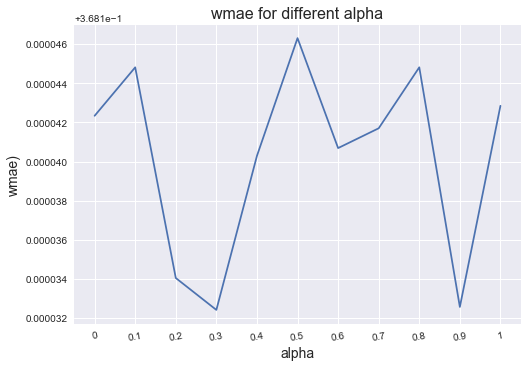

In [79]:
plot_results(results_alpha, 'alpha')

In [61]:
results_lambda_bias = {}
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    result = {}
    print('\n\n\n\nrunning while lambda = {}'.format(i))
    params={'booster':'gblinear',
            'objective': 'reg:linear',
            'eval_metric':'mae',
            'lambda_bias':i,
            'seed':0,
            'silent':1,
        }

    watchlist = [(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_lambda_bias['{}'.format(i)] = result
    
print(results_lambda_bias)





running while lambda = 0
[0]	train-mae:59910.7
Will train until train-mae hasn't improved in 300 rounds.
[1]	train-mae:56692.9
[2]	train-mae:55658.7
[3]	train-mae:54846.5
[4]	train-mae:54217.2
[5]	train-mae:53653
[6]	train-mae:53259.5
[7]	train-mae:52925.1
[8]	train-mae:52703.3
[9]	train-mae:52465
[10]	train-mae:52326
[11]	train-mae:52178.4
[12]	train-mae:52047.1
[13]	train-mae:51939.3
[14]	train-mae:51873.6
[15]	train-mae:51790.5
[16]	train-mae:51727.7
[17]	train-mae:51665
[18]	train-mae:51620.9
[19]	train-mae:51584.3
[20]	train-mae:51543.5
[21]	train-mae:51515.4
[22]	train-mae:51492.5
[23]	train-mae:51464.8
[24]	train-mae:51440.4
[25]	train-mae:51422.1
[26]	train-mae:51408.6
[27]	train-mae:51393.5
[28]	train-mae:51379.9
[29]	train-mae:51365.2
[30]	train-mae:51348.2
[31]	train-mae:51334.2
[32]	train-mae:51326.8
[33]	train-mae:51314.4
[34]	train-mae:51302.1
[35]	train-mae:51293.6
[36]	train-mae:51283.2
[37]	train-mae:51276
[38]	train-mae:51264.1
[39]	train-mae:51258.1
[40]	train-ma

[346]	train-mae:50825.1
[347]	train-mae:50824.6
[348]	train-mae:50824
[349]	train-mae:50823.7
[350]	train-mae:50823.4
[351]	train-mae:50822.7
[352]	train-mae:50822
[353]	train-mae:50821.6
[354]	train-mae:50821.4
[355]	train-mae:50820.6
[356]	train-mae:50820.6
[357]	train-mae:50819.9
[358]	train-mae:50819.4
[359]	train-mae:50819
[360]	train-mae:50817.8
[361]	train-mae:50817.6
[362]	train-mae:50817.5
[363]	train-mae:50817.2
[364]	train-mae:50816.9
[365]	train-mae:50816.4
[366]	train-mae:50815.9
[367]	train-mae:50815.5
[368]	train-mae:50815
[369]	train-mae:50814.4
[370]	train-mae:50814
[371]	train-mae:50813.5
[372]	train-mae:50812.2
[373]	train-mae:50811.8
[374]	train-mae:50812
[375]	train-mae:50811.9
[376]	train-mae:50811.5
[377]	train-mae:50811
[378]	train-mae:50810.8
[379]	train-mae:50810.4
[380]	train-mae:50810
[381]	train-mae:50809.5
[382]	train-mae:50809
[383]	train-mae:50808.6
[384]	train-mae:50808.2
[385]	train-mae:50807.9
[386]	train-mae:50807.4
[387]	train-mae:50807
[388]	train-

[691]	train-mae:50716.3
[692]	train-mae:50715.4
[693]	train-mae:50715.8
[694]	train-mae:50715.6
[695]	train-mae:50715.4
[696]	train-mae:50715.1
[697]	train-mae:50715
[698]	train-mae:50714.8
[699]	train-mae:50714.5
[700]	train-mae:50714.2
[701]	train-mae:50714.1
[702]	train-mae:50713.6
[703]	train-mae:50713.3
[704]	train-mae:50713.4
[705]	train-mae:50712.9
[706]	train-mae:50712.9
[707]	train-mae:50712.8
[708]	train-mae:50712.4
[709]	train-mae:50712.2
[710]	train-mae:50711.5
[711]	train-mae:50711.8
[712]	train-mae:50711.7
[713]	train-mae:50711.4
[714]	train-mae:50710.9
[715]	train-mae:50710.8
[716]	train-mae:50711
[717]	train-mae:50710.8
[718]	train-mae:50710.6
[719]	train-mae:50710.3
[720]	train-mae:50709.4
[721]	train-mae:50709.6
[722]	train-mae:50709.8
[723]	train-mae:50709.5
[724]	train-mae:50708.9
[725]	train-mae:50709.2
[726]	train-mae:50708.4
[727]	train-mae:50708.7
[728]	train-mae:50708.6
[729]	train-mae:50708.4
[730]	train-mae:50708.1
[731]	train-mae:50707.8
[732]	train-mae:5070

[1034]	train-mae:50658.7
[1035]	train-mae:50658.8
[1036]	train-mae:50658.4
[1037]	train-mae:50658.4
[1038]	train-mae:50658.3
[1039]	train-mae:50658.1
[1040]	train-mae:50657.9
[1041]	train-mae:50658
[1042]	train-mae:50657.9
[1043]	train-mae:50657.7
[1044]	train-mae:50657.3
[1045]	train-mae:50657.1
[1046]	train-mae:50657.4
[1047]	train-mae:50657.1
[1048]	train-mae:50657.1
[1049]	train-mae:50656.8
[1050]	train-mae:50656.6
[1051]	train-mae:50656.6
[1052]	train-mae:50656.3
[1053]	train-mae:50656.2
[1054]	train-mae:50656.2
[1055]	train-mae:50655.9
[1056]	train-mae:50655.9
[1057]	train-mae:50655.2
[1058]	train-mae:50655
[1059]	train-mae:50655.1
[1060]	train-mae:50655.1
[1061]	train-mae:50655
[1062]	train-mae:50654.8
[1063]	train-mae:50654.8
[1064]	train-mae:50654.6
[1065]	train-mae:50654.5
[1066]	train-mae:50654.3
[1067]	train-mae:50654.2
[1068]	train-mae:50654.2
[1069]	train-mae:50653.9
[1070]	train-mae:50653.9
[1071]	train-mae:50653.8
[1072]	train-mae:50653.7
[1073]	train-mae:50653.4
[1074]

[1365]	train-mae:50616.5
[1366]	train-mae:50616.4
[1367]	train-mae:50616.3
[1368]	train-mae:50616.2
[1369]	train-mae:50616.1
[1370]	train-mae:50616
[1371]	train-mae:50616
[1372]	train-mae:50615.9
[1373]	train-mae:50615.6
[1374]	train-mae:50615.8
[1375]	train-mae:50615.5
[1376]	train-mae:50615.5
[1377]	train-mae:50615.4
[1378]	train-mae:50615.3
[1379]	train-mae:50615.2
[1380]	train-mae:50615
[1381]	train-mae:50614.9
[1382]	train-mae:50614.8
[1383]	train-mae:50614.7
[1384]	train-mae:50614.6
[1385]	train-mae:50614.4
[1386]	train-mae:50613.9
[1387]	train-mae:50613.6
[1388]	train-mae:50613.8
[1389]	train-mae:50613.9
[1390]	train-mae:50613.8
[1391]	train-mae:50613.8
[1392]	train-mae:50613.6
[1393]	train-mae:50613.4
[1394]	train-mae:50613.4
[1395]	train-mae:50613.3
[1396]	train-mae:50613.2
[1397]	train-mae:50613
[1398]	train-mae:50613
[1399]	train-mae:50612.9
[1400]	train-mae:50612.7
[1401]	train-mae:50612.6
[1402]	train-mae:50612.6
[1403]	train-mae:50612.4
[1404]	train-mae:50612.4
[1405]	tra

[1696]	train-mae:50581.9
[1697]	train-mae:50581.7
[1698]	train-mae:50581.8
[1699]	train-mae:50581.6
[1700]	train-mae:50581.6
[1701]	train-mae:50581.5
[1702]	train-mae:50581.6
[1703]	train-mae:50581.4
[1704]	train-mae:50581
[1705]	train-mae:50581.1
[1706]	train-mae:50580.9
[1707]	train-mae:50580.9
[1708]	train-mae:50580.8
[1709]	train-mae:50580.8
[1710]	train-mae:50580.5
[1711]	train-mae:50580.2
[1712]	train-mae:50580
[1713]	train-mae:50580.2
[1714]	train-mae:50580.1
[1715]	train-mae:50580
[1716]	train-mae:50580
[1717]	train-mae:50579.8
[1718]	train-mae:50579.9
[1719]	train-mae:50579.7
[1720]	train-mae:50579.7
[1721]	train-mae:50579.6
[1722]	train-mae:50579.5
[1723]	train-mae:50579.4
[1724]	train-mae:50579.1
[1725]	train-mae:50579
[1726]	train-mae:50579
[1727]	train-mae:50578.8
[1728]	train-mae:50578.8
[1729]	train-mae:50578.8
[1730]	train-mae:50578.6
[1731]	train-mae:50578.6
[1732]	train-mae:50578.5
[1733]	train-mae:50578.4
[1734]	train-mae:50578.3
[1735]	train-mae:50578.2
[1736]	train

[2027]	train-mae:50552.4
[2028]	train-mae:50552.3
[2029]	train-mae:50552.2
[2030]	train-mae:50551.8
[2031]	train-mae:50552
[2032]	train-mae:50551.9
[2033]	train-mae:50551.9
[2034]	train-mae:50551.8
[2035]	train-mae:50551.7
[2036]	train-mae:50551.6
[2037]	train-mae:50551.6
[2038]	train-mae:50551.5
[2039]	train-mae:50551.4
[2040]	train-mae:50551.1
[2041]	train-mae:50551.1
[2042]	train-mae:50551.2
[2043]	train-mae:50551
[2044]	train-mae:50550.7
[2045]	train-mae:50550.7
[2046]	train-mae:50550.5
[2047]	train-mae:50550.6
[2048]	train-mae:50550.2
[2049]	train-mae:50550.2
[2050]	train-mae:50550.3
[2051]	train-mae:50550.2
[2052]	train-mae:50550.2
[2053]	train-mae:50550.1
[2054]	train-mae:50550
[2055]	train-mae:50550
[2056]	train-mae:50549.9
[2057]	train-mae:50549.8
[2058]	train-mae:50549.4
[2059]	train-mae:50549.2
[2060]	train-mae:50549.7
[2061]	train-mae:50549.4
[2062]	train-mae:50549.5
[2063]	train-mae:50549.4
[2064]	train-mae:50549.3
[2065]	train-mae:50549.1
[2066]	train-mae:50549.1
[2067]	t

[2358]	train-mae:50525.6
[2359]	train-mae:50525.5
[2360]	train-mae:50525.2
[2361]	train-mae:50525.5
[2362]	train-mae:50525.3
[2363]	train-mae:50525.2
[2364]	train-mae:50525.1
[2365]	train-mae:50525.2
[2366]	train-mae:50525
[2367]	train-mae:50525
[2368]	train-mae:50524.9
[2369]	train-mae:50524.8
[2370]	train-mae:50524.8
[2371]	train-mae:50524.5
[2372]	train-mae:50524.2
[2373]	train-mae:50524.6
[2374]	train-mae:50524.3
[2375]	train-mae:50524.3
[2376]	train-mae:50524.2
[2377]	train-mae:50524.3
[2378]	train-mae:50524.1
[2379]	train-mae:50524
[2380]	train-mae:50523.9
[2381]	train-mae:50523.9
[2382]	train-mae:50523.8
[2383]	train-mae:50523.6
[2384]	train-mae:50523.6
[2385]	train-mae:50523.4
[2386]	train-mae:50523.6
[2387]	train-mae:50523.2
[2388]	train-mae:50523.2
[2389]	train-mae:50523.3
[2390]	train-mae:50523.3
[2391]	train-mae:50523.1
[2392]	train-mae:50523
[2393]	train-mae:50523.1
[2394]	train-mae:50522.9
[2395]	train-mae:50523
[2396]	train-mae:50522.8
[2397]	train-mae:50522.7
[2398]	tra

[2689]	train-mae:50500.9
[2690]	train-mae:50501.1
[2691]	train-mae:50501
[2692]	train-mae:50500.9
[2693]	train-mae:50501
[2694]	train-mae:50500.7
[2695]	train-mae:50500.8
[2696]	train-mae:50500.7
[2697]	train-mae:50500.6
[2698]	train-mae:50500.3
[2699]	train-mae:50500.1
[2700]	train-mae:50500.2
[2701]	train-mae:50500.3
[2702]	train-mae:50500.1
[2703]	train-mae:50500.2
[2704]	train-mae:50500.2
[2705]	train-mae:50499.9
[2706]	train-mae:50500.1
[2707]	train-mae:50499.8
[2708]	train-mae:50499.9
[2709]	train-mae:50499.6
[2710]	train-mae:50499.4
[2711]	train-mae:50499.4
[2712]	train-mae:50499.6
[2713]	train-mae:50499.6
[2714]	train-mae:50499.5
[2715]	train-mae:50499.5
[2716]	train-mae:50499
[2717]	train-mae:50499.1
[2718]	train-mae:50499
[2719]	train-mae:50498.8
[2720]	train-mae:50498.8
[2721]	train-mae:50499
[2722]	train-mae:50498.8
[2723]	train-mae:50498.8
[2724]	train-mae:50498.7
[2725]	train-mae:50498.5
[2726]	train-mae:50498.6
[2727]	train-mae:50498.4
[2728]	train-mae:50498.4
[2729]	tra

[18]	train-mae:51542.2
[19]	train-mae:51500.3
[20]	train-mae:51486.9
[21]	train-mae:51457.9
[22]	train-mae:51434.7
[23]	train-mae:51410.1
[24]	train-mae:51388.4
[25]	train-mae:51373.3
[26]	train-mae:51358.1
[27]	train-mae:51343.5
[28]	train-mae:51331.8
[29]	train-mae:51320.5
[30]	train-mae:51308.1
[31]	train-mae:51299.9
[32]	train-mae:51291.4
[33]	train-mae:51280.9
[34]	train-mae:51271.5
[35]	train-mae:51262.6
[36]	train-mae:51260.8
[37]	train-mae:51253.4
[38]	train-mae:51245.7
[39]	train-mae:51240.1
[40]	train-mae:51232.5
[41]	train-mae:51223.8
[42]	train-mae:51218.3
[43]	train-mae:51212.1
[44]	train-mae:51206
[45]	train-mae:51200.6
[46]	train-mae:51194.3
[47]	train-mae:51188.4
[48]	train-mae:51183.1
[49]	train-mae:51177.4
[50]	train-mae:51172.2
[51]	train-mae:51167.1
[52]	train-mae:51162.7
[53]	train-mae:51158.6
[54]	train-mae:51153.7
[55]	train-mae:51149.6
[56]	train-mae:51145.1
[57]	train-mae:51141.8
[58]	train-mae:51137.1
[59]	train-mae:51133.1
[60]	train-mae:51129.3
[61]	train-ma

[366]	train-mae:50814
[367]	train-mae:50813.6
[368]	train-mae:50812.3
[369]	train-mae:50812.8
[370]	train-mae:50812.4
[371]	train-mae:50812
[372]	train-mae:50811.6
[373]	train-mae:50810.6
[374]	train-mae:50811.1
[375]	train-mae:50810.3
[376]	train-mae:50808.9
[377]	train-mae:50808.2
[378]	train-mae:50808.9
[379]	train-mae:50808.4
[380]	train-mae:50808
[381]	train-mae:50807
[382]	train-mae:50807.3
[383]	train-mae:50806.8
[384]	train-mae:50806.5
[385]	train-mae:50806
[386]	train-mae:50805.8
[387]	train-mae:50805.4
[388]	train-mae:50804.5
[389]	train-mae:50804.6
[390]	train-mae:50804.2
[391]	train-mae:50803.9
[392]	train-mae:50803.6
[393]	train-mae:50803.2
[394]	train-mae:50802.9
[395]	train-mae:50801.7
[396]	train-mae:50801.9
[397]	train-mae:50801.4
[398]	train-mae:50800.3
[399]	train-mae:50801.1
[400]	train-mae:50800.1
[401]	train-mae:50800.1
[402]	train-mae:50799.9
[403]	train-mae:50799.1
[404]	train-mae:50798.9
[405]	train-mae:50798.9
[406]	train-mae:50798.1
[407]	train-mae:50797.9
[4

[710]	train-mae:50712
[711]	train-mae:50711.9
[712]	train-mae:50711.5
[713]	train-mae:50711.4
[714]	train-mae:50711.1
[715]	train-mae:50710.9
[716]	train-mae:50710.9
[717]	train-mae:50710.6
[718]	train-mae:50710.4
[719]	train-mae:50710.2
[720]	train-mae:50709.9
[721]	train-mae:50709.8
[722]	train-mae:50709.4
[723]	train-mae:50709.3
[724]	train-mae:50709.3
[725]	train-mae:50709
[726]	train-mae:50708.8
[727]	train-mae:50708.6
[728]	train-mae:50708.6
[729]	train-mae:50708
[730]	train-mae:50708.1
[731]	train-mae:50708
[732]	train-mae:50707.7
[733]	train-mae:50707.6
[734]	train-mae:50707.2
[735]	train-mae:50706.9
[736]	train-mae:50706.8
[737]	train-mae:50706.7
[738]	train-mae:50706.7
[739]	train-mae:50706
[740]	train-mae:50706.3
[741]	train-mae:50706
[742]	train-mae:50706
[743]	train-mae:50705.7
[744]	train-mae:50705.3
[745]	train-mae:50705.3
[746]	train-mae:50704.9
[747]	train-mae:50704.9
[748]	train-mae:50704.8
[749]	train-mae:50704.5
[750]	train-mae:50704.4
[751]	train-mae:50704.3
[752]	

[1052]	train-mae:50656.4
[1053]	train-mae:50656.3
[1054]	train-mae:50656.2
[1055]	train-mae:50655.9
[1056]	train-mae:50655.9
[1057]	train-mae:50655.5
[1058]	train-mae:50655.7
[1059]	train-mae:50655.5
[1060]	train-mae:50655.1
[1061]	train-mae:50655.3
[1062]	train-mae:50655.1
[1063]	train-mae:50654.8
[1064]	train-mae:50654.8
[1065]	train-mae:50654.7
[1066]	train-mae:50654.6
[1067]	train-mae:50654.5
[1068]	train-mae:50654.3
[1069]	train-mae:50654.1
[1070]	train-mae:50654
[1071]	train-mae:50653.7
[1072]	train-mae:50653.7
[1073]	train-mae:50653.7
[1074]	train-mae:50653.5
[1075]	train-mae:50653.3
[1076]	train-mae:50653.2
[1077]	train-mae:50653.1
[1078]	train-mae:50652.9
[1079]	train-mae:50652.5
[1080]	train-mae:50652.7
[1081]	train-mae:50652.5
[1082]	train-mae:50652.3
[1083]	train-mae:50652.3
[1084]	train-mae:50652.2
[1085]	train-mae:50652
[1086]	train-mae:50651.8
[1087]	train-mae:50651.7
[1088]	train-mae:50651.4
[1089]	train-mae:50651.4
[1090]	train-mae:50651.2
[1091]	train-mae:50651.1
[109

[1382]	train-mae:50614.8
[1383]	train-mae:50614.3
[1384]	train-mae:50614.5
[1385]	train-mae:50614.3
[1386]	train-mae:50614.1
[1387]	train-mae:50614.1
[1388]	train-mae:50614
[1389]	train-mae:50614
[1390]	train-mae:50613.8
[1391]	train-mae:50613.7
[1392]	train-mae:50613.3
[1393]	train-mae:50613.1
[1394]	train-mae:50613.3
[1395]	train-mae:50613.1
[1396]	train-mae:50613.1
[1397]	train-mae:50613
[1398]	train-mae:50612.9
[1399]	train-mae:50612.7
[1400]	train-mae:50612.6
[1401]	train-mae:50612.6
[1402]	train-mae:50612.3
[1403]	train-mae:50612
[1404]	train-mae:50612.1
[1405]	train-mae:50612
[1406]	train-mae:50611.9
[1407]	train-mae:50611.9
[1408]	train-mae:50611.8
[1409]	train-mae:50611.6
[1410]	train-mae:50611.2
[1411]	train-mae:50611.3
[1412]	train-mae:50611
[1413]	train-mae:50611.1
[1414]	train-mae:50611
[1415]	train-mae:50610.9
[1416]	train-mae:50610.8
[1417]	train-mae:50610.5
[1418]	train-mae:50610.7
[1419]	train-mae:50610.4
[1420]	train-mae:50610.4
[1421]	train-mae:50610.3
[1422]	train-m

[1713]	train-mae:50580.3
[1714]	train-mae:50580.2
[1715]	train-mae:50580.1
[1716]	train-mae:50580.1
[1717]	train-mae:50579.8
[1718]	train-mae:50579.7
[1719]	train-mae:50579.6
[1720]	train-mae:50579.4
[1721]	train-mae:50579.4
[1722]	train-mae:50579.2
[1723]	train-mae:50579.2
[1724]	train-mae:50579.2
[1725]	train-mae:50579
[1726]	train-mae:50579
[1727]	train-mae:50578.9
[1728]	train-mae:50578.7
[1729]	train-mae:50578.8
[1730]	train-mae:50578.5
[1731]	train-mae:50578.4
[1732]	train-mae:50578.3
[1733]	train-mae:50578.3
[1734]	train-mae:50578.2
[1735]	train-mae:50578.1
[1736]	train-mae:50578
[1737]	train-mae:50578
[1738]	train-mae:50577.9
[1739]	train-mae:50577.7
[1740]	train-mae:50577.7
[1741]	train-mae:50577.6
[1742]	train-mae:50577.4
[1743]	train-mae:50577.5
[1744]	train-mae:50576.8
[1745]	train-mae:50577.3
[1746]	train-mae:50577.2
[1747]	train-mae:50577
[1748]	train-mae:50577
[1749]	train-mae:50576.9
[1750]	train-mae:50576.7
[1751]	train-mae:50576.6
[1752]	train-mae:50576.5
[1753]	train

[2044]	train-mae:50550.7
[2045]	train-mae:50550.7
[2046]	train-mae:50550.5
[2047]	train-mae:50550.4
[2048]	train-mae:50550.5
[2049]	train-mae:50550.4
[2050]	train-mae:50550.4
[2051]	train-mae:50550.2
[2052]	train-mae:50550.1
[2053]	train-mae:50550.2
[2054]	train-mae:50550.1
[2055]	train-mae:50550
[2056]	train-mae:50549.9
[2057]	train-mae:50549.9
[2058]	train-mae:50549.6
[2059]	train-mae:50549.7
[2060]	train-mae:50549.6
[2061]	train-mae:50549.6
[2062]	train-mae:50549.5
[2063]	train-mae:50549.4
[2064]	train-mae:50549
[2065]	train-mae:50549.2
[2066]	train-mae:50549.1
[2067]	train-mae:50549.1
[2068]	train-mae:50549
[2069]	train-mae:50548.8
[2070]	train-mae:50548.8
[2071]	train-mae:50548.6
[2072]	train-mae:50548.7
[2073]	train-mae:50548.4
[2074]	train-mae:50548.5
[2075]	train-mae:50548.4
[2076]	train-mae:50547.9
[2077]	train-mae:50547.8
[2078]	train-mae:50548
[2079]	train-mae:50548
[2080]	train-mae:50548
[2081]	train-mae:50548
[2082]	train-mae:50547.8
[2083]	train-mae:50547.6
[2084]	train-m

[2375]	train-mae:50524.8
[2376]	train-mae:50524.7
[2377]	train-mae:50524.7
[2378]	train-mae:50524.5
[2379]	train-mae:50524.5
[2380]	train-mae:50524.4
[2381]	train-mae:50524.4
[2382]	train-mae:50524.3
[2383]	train-mae:50524.3
[2384]	train-mae:50524.2
[2385]	train-mae:50524
[2386]	train-mae:50523.9
[2387]	train-mae:50523.9
[2388]	train-mae:50523.9
[2389]	train-mae:50523.8
[2390]	train-mae:50523.5
[2391]	train-mae:50523.7
[2392]	train-mae:50523.5
[2393]	train-mae:50523.4
[2394]	train-mae:50523.2
[2395]	train-mae:50523.1
[2396]	train-mae:50523.1
[2397]	train-mae:50523.1
[2398]	train-mae:50523
[2399]	train-mae:50522.8
[2400]	train-mae:50522.8
[2401]	train-mae:50522.5
[2402]	train-mae:50522.5
[2403]	train-mae:50522.6
[2404]	train-mae:50522.4
[2405]	train-mae:50522.3
[2406]	train-mae:50522.2
[2407]	train-mae:50522
[2408]	train-mae:50522
[2409]	train-mae:50522.1
[2410]	train-mae:50522
[2411]	train-mae:50521.6
[2412]	train-mae:50521.5
[2413]	train-mae:50521.4
[2414]	train-mae:50521.4
[2415]	tra

[2706]	train-mae:50500.4
[2707]	train-mae:50500.3
[2708]	train-mae:50500.2
[2709]	train-mae:50500.1
[2710]	train-mae:50500.1
[2711]	train-mae:50500
[2712]	train-mae:50499.9
[2713]	train-mae:50499.9
[2714]	train-mae:50499.7
[2715]	train-mae:50499.7
[2716]	train-mae:50499.6
[2717]	train-mae:50499.6
[2718]	train-mae:50499.5
[2719]	train-mae:50499.5
[2720]	train-mae:50499.4
[2721]	train-mae:50499.3
[2722]	train-mae:50499.1
[2723]	train-mae:50499.1
[2724]	train-mae:50499
[2725]	train-mae:50499
[2726]	train-mae:50499
[2727]	train-mae:50498.9
[2728]	train-mae:50498.8
[2729]	train-mae:50498.8
[2730]	train-mae:50498.8
[2731]	train-mae:50498.7
[2732]	train-mae:50498.6
[2733]	train-mae:50498.5
[2734]	train-mae:50498.4
[2735]	train-mae:50498.5
[2736]	train-mae:50498.4
[2737]	train-mae:50498.3
[2738]	train-mae:50498.3
[2739]	train-mae:50498
[2740]	train-mae:50498
[2741]	train-mae:50498
[2742]	train-mae:50498
[2743]	train-mae:50498
[2744]	train-mae:50497.9
[2745]	train-mae:50497.6
[2746]	train-mae:5

[37]	train-mae:51253.5
[38]	train-mae:51246.2
[39]	train-mae:51239
[40]	train-mae:51231.8
[41]	train-mae:51225.9
[42]	train-mae:51219.1
[43]	train-mae:51212.5
[44]	train-mae:51207
[45]	train-mae:51199.5
[46]	train-mae:51190.2
[47]	train-mae:51189
[48]	train-mae:51183.4
[49]	train-mae:51178.3
[50]	train-mae:51173.5
[51]	train-mae:51166.1
[52]	train-mae:51162.2
[53]	train-mae:51158.5
[54]	train-mae:51154.1
[55]	train-mae:51149.8
[56]	train-mae:51145.2
[57]	train-mae:51139.9
[58]	train-mae:51137.6
[59]	train-mae:51133.4
[60]	train-mae:51124.6
[61]	train-mae:51124.9
[62]	train-mae:51122.5
[63]	train-mae:51119.3
[64]	train-mae:51114.9
[65]	train-mae:51111.4
[66]	train-mae:51108.1
[67]	train-mae:51104.4
[68]	train-mae:51101.3
[69]	train-mae:51098.1
[70]	train-mae:51094.6
[71]	train-mae:51091.7
[72]	train-mae:51085.9
[73]	train-mae:51085.3
[74]	train-mae:51081.9
[75]	train-mae:51079.2
[76]	train-mae:51076.1
[77]	train-mae:51073.3
[78]	train-mae:51070.7
[79]	train-mae:51067.7
[80]	train-mae:51

[384]	train-mae:50806.4
[385]	train-mae:50805.7
[386]	train-mae:50805.5
[387]	train-mae:50805.3
[388]	train-mae:50804.6
[389]	train-mae:50804.5
[390]	train-mae:50804
[391]	train-mae:50803.5
[392]	train-mae:50803.1
[393]	train-mae:50801.8
[394]	train-mae:50801.5
[395]	train-mae:50801.5
[396]	train-mae:50801.3
[397]	train-mae:50801.1
[398]	train-mae:50800.5
[399]	train-mae:50800.4
[400]	train-mae:50799.2
[401]	train-mae:50799.9
[402]	train-mae:50799
[403]	train-mae:50799.1
[404]	train-mae:50798.5
[405]	train-mae:50798.3
[406]	train-mae:50798
[407]	train-mae:50797.6
[408]	train-mae:50796.3
[409]	train-mae:50796.5
[410]	train-mae:50796.2
[411]	train-mae:50796
[412]	train-mae:50795.5
[413]	train-mae:50795.3
[414]	train-mae:50795
[415]	train-mae:50793.9
[416]	train-mae:50794.2
[417]	train-mae:50793.9
[418]	train-mae:50793.5
[419]	train-mae:50792.7
[420]	train-mae:50792.8
[421]	train-mae:50792.3
[422]	train-mae:50792
[423]	train-mae:50791.6
[424]	train-mae:50790.7
[425]	train-mae:50790.8
[426

[729]	train-mae:50708
[730]	train-mae:50707.9
[731]	train-mae:50707.8
[732]	train-mae:50707.5
[733]	train-mae:50707.3
[734]	train-mae:50707.3
[735]	train-mae:50706.7
[736]	train-mae:50706.8
[737]	train-mae:50706.7
[738]	train-mae:50706.4
[739]	train-mae:50706.3
[740]	train-mae:50706.1
[741]	train-mae:50705.9
[742]	train-mae:50705.7
[743]	train-mae:50705.6
[744]	train-mae:50705.4
[745]	train-mae:50705.2
[746]	train-mae:50705.1
[747]	train-mae:50704.9
[748]	train-mae:50704.4
[749]	train-mae:50704.4
[750]	train-mae:50704.3
[751]	train-mae:50704
[752]	train-mae:50704
[753]	train-mae:50703.4
[754]	train-mae:50703.5
[755]	train-mae:50703.3
[756]	train-mae:50703.2
[757]	train-mae:50702.9
[758]	train-mae:50702.4
[759]	train-mae:50702.6
[760]	train-mae:50702.4
[761]	train-mae:50702.3
[762]	train-mae:50702.1
[763]	train-mae:50701.4
[764]	train-mae:50701.5
[765]	train-mae:50701.6
[766]	train-mae:50701.4
[767]	train-mae:50701.1
[768]	train-mae:50701
[769]	train-mae:50700.9
[770]	train-mae:50700.7


[1071]	train-mae:50653.5
[1072]	train-mae:50653.3
[1073]	train-mae:50653.2
[1074]	train-mae:50653.3
[1075]	train-mae:50653.1
[1076]	train-mae:50652.8
[1077]	train-mae:50652.7
[1078]	train-mae:50652.7
[1079]	train-mae:50652.6
[1080]	train-mae:50652
[1081]	train-mae:50652.2
[1082]	train-mae:50652.2
[1083]	train-mae:50651.9
[1084]	train-mae:50651.7
[1085]	train-mae:50651.7
[1086]	train-mae:50651.4
[1087]	train-mae:50651.4
[1088]	train-mae:50651.2
[1089]	train-mae:50651
[1090]	train-mae:50650.9
[1091]	train-mae:50650.9
[1092]	train-mae:50650.7
[1093]	train-mae:50650.5
[1094]	train-mae:50650.1
[1095]	train-mae:50649.9
[1096]	train-mae:50650
[1097]	train-mae:50649.8
[1098]	train-mae:50649.7
[1099]	train-mae:50649.5
[1100]	train-mae:50649.5
[1101]	train-mae:50649.4
[1102]	train-mae:50649.2
[1103]	train-mae:50648.9
[1104]	train-mae:50648.9
[1105]	train-mae:50648.8
[1106]	train-mae:50648.3
[1107]	train-mae:50648.4
[1108]	train-mae:50648.4
[1109]	train-mae:50648.2
[1110]	train-mae:50647.9
[1111]

[1402]	train-mae:50612.2
[1403]	train-mae:50612
[1404]	train-mae:50612
[1405]	train-mae:50611.9
[1406]	train-mae:50611.8
[1407]	train-mae:50611.6
[1408]	train-mae:50611.6
[1409]	train-mae:50611.4
[1410]	train-mae:50611.4
[1411]	train-mae:50611.2
[1412]	train-mae:50611.1
[1413]	train-mae:50611.1
[1414]	train-mae:50610.9
[1415]	train-mae:50610.7
[1416]	train-mae:50610.6
[1417]	train-mae:50610.5
[1418]	train-mae:50610.5
[1419]	train-mae:50610.3
[1420]	train-mae:50610.2
[1421]	train-mae:50610.1
[1422]	train-mae:50610
[1423]	train-mae:50610
[1424]	train-mae:50609.8
[1425]	train-mae:50609.9
[1426]	train-mae:50609.5
[1427]	train-mae:50609.6
[1428]	train-mae:50609.2
[1429]	train-mae:50609.2
[1430]	train-mae:50609.1
[1431]	train-mae:50608.9
[1432]	train-mae:50609
[1433]	train-mae:50608.8
[1434]	train-mae:50608.6
[1435]	train-mae:50608.5
[1436]	train-mae:50608.4
[1437]	train-mae:50608.2
[1438]	train-mae:50608
[1439]	train-mae:50608.1
[1440]	train-mae:50608
[1441]	train-mae:50607.9
[1442]	train-m

[1733]	train-mae:50578.2
[1734]	train-mae:50578.2
[1735]	train-mae:50578.1
[1736]	train-mae:50578.1
[1737]	train-mae:50577.9
[1738]	train-mae:50577.9
[1739]	train-mae:50577.7
[1740]	train-mae:50577.7
[1741]	train-mae:50577.5
[1742]	train-mae:50577.6
[1743]	train-mae:50577.4
[1744]	train-mae:50577.2
[1745]	train-mae:50577.2
[1746]	train-mae:50577
[1747]	train-mae:50576.9
[1748]	train-mae:50576.8
[1749]	train-mae:50576.8
[1750]	train-mae:50576.8
[1751]	train-mae:50576.5
[1752]	train-mae:50576.5
[1753]	train-mae:50576.4
[1754]	train-mae:50576.3
[1755]	train-mae:50576.2
[1756]	train-mae:50576.1
[1757]	train-mae:50576.1
[1758]	train-mae:50576
[1759]	train-mae:50575.8
[1760]	train-mae:50575.8
[1761]	train-mae:50575.7
[1762]	train-mae:50575.6
[1763]	train-mae:50575.3
[1764]	train-mae:50575.4
[1765]	train-mae:50575.4
[1766]	train-mae:50575.3
[1767]	train-mae:50575.1
[1768]	train-mae:50574.9
[1769]	train-mae:50575
[1770]	train-mae:50574.7
[1771]	train-mae:50574.8
[1772]	train-mae:50574.7
[1773]

[2064]	train-mae:50548.8
[2065]	train-mae:50548.9
[2066]	train-mae:50549
[2067]	train-mae:50548.9
[2068]	train-mae:50548.9
[2069]	train-mae:50548.7
[2070]	train-mae:50548.7
[2071]	train-mae:50548.6
[2072]	train-mae:50548.5
[2073]	train-mae:50548.4
[2074]	train-mae:50548.3
[2075]	train-mae:50548.4
[2076]	train-mae:50548.1
[2077]	train-mae:50548.2
[2078]	train-mae:50547.9
[2079]	train-mae:50547.7
[2080]	train-mae:50547.8
[2081]	train-mae:50547.7
[2082]	train-mae:50547.5
[2083]	train-mae:50547.6
[2084]	train-mae:50547.5
[2085]	train-mae:50547.5
[2086]	train-mae:50547.2
[2087]	train-mae:50547.3
[2088]	train-mae:50547.2
[2089]	train-mae:50547
[2090]	train-mae:50546.9
[2091]	train-mae:50547
[2092]	train-mae:50546.9
[2093]	train-mae:50546.6
[2094]	train-mae:50546.5
[2095]	train-mae:50546.3
[2096]	train-mae:50546.6
[2097]	train-mae:50546.4
[2098]	train-mae:50546.4
[2099]	train-mae:50546.3
[2100]	train-mae:50546.1
[2101]	train-mae:50546.1
[2102]	train-mae:50545.8
[2103]	train-mae:50546
[2104]	t

[2395]	train-mae:50522.9
[2396]	train-mae:50523
[2397]	train-mae:50523
[2398]	train-mae:50522.9
[2399]	train-mae:50522.7
[2400]	train-mae:50522.8
[2401]	train-mae:50522.6
[2402]	train-mae:50522.6
[2403]	train-mae:50522.5
[2404]	train-mae:50522.5
[2405]	train-mae:50522.4
[2406]	train-mae:50522
[2407]	train-mae:50522.1
[2408]	train-mae:50522.1
[2409]	train-mae:50522.1
[2410]	train-mae:50521.9
[2411]	train-mae:50521.9
[2412]	train-mae:50521.8
[2413]	train-mae:50521.8
[2414]	train-mae:50521.7
[2415]	train-mae:50521.7
[2416]	train-mae:50521.7
[2417]	train-mae:50521.5
[2418]	train-mae:50521.4
[2419]	train-mae:50521.3
[2420]	train-mae:50521.3
[2421]	train-mae:50521.2
[2422]	train-mae:50521.2
[2423]	train-mae:50521
[2424]	train-mae:50521
[2425]	train-mae:50520.9
[2426]	train-mae:50520.8
[2427]	train-mae:50520.8
[2428]	train-mae:50520.4
[2429]	train-mae:50520.3
[2430]	train-mae:50520.4
[2431]	train-mae:50520.4
[2432]	train-mae:50520.4
[2433]	train-mae:50520.3
[2434]	train-mae:50519.7
[2435]	tra

[2726]	train-mae:50498.7
[2727]	train-mae:50498.6
[2728]	train-mae:50498.6
[2729]	train-mae:50498.5
[2730]	train-mae:50498.5
[2731]	train-mae:50498.5
[2732]	train-mae:50498.4
[2733]	train-mae:50498.2
[2734]	train-mae:50498.3
[2735]	train-mae:50498.2
[2736]	train-mae:50498.1
[2737]	train-mae:50498
[2738]	train-mae:50497.8
[2739]	train-mae:50497.9
[2740]	train-mae:50497.7
[2741]	train-mae:50497.7
[2742]	train-mae:50497.7
[2743]	train-mae:50497.7
[2744]	train-mae:50497.3
[2745]	train-mae:50497.5
[2746]	train-mae:50497.3
[2747]	train-mae:50497.3
[2748]	train-mae:50497.2
[2749]	train-mae:50497.1
[2750]	train-mae:50497.2
[2751]	train-mae:50497
[2752]	train-mae:50497.1
[2753]	train-mae:50497
[2754]	train-mae:50496.8
[2755]	train-mae:50496.8
[2756]	train-mae:50496.8
[2757]	train-mae:50496.6
[2758]	train-mae:50496.5
[2759]	train-mae:50496.6
[2760]	train-mae:50496.4
[2761]	train-mae:50496.3
[2762]	train-mae:50496.2
[2763]	train-mae:50495.8
[2764]	train-mae:50496.1
[2765]	train-mae:50496
[2766]	t

[58]	train-mae:51134.2
[59]	train-mae:51131.4
[60]	train-mae:51127.9
[61]	train-mae:51123.4
[62]	train-mae:51120.8
[63]	train-mae:51117
[64]	train-mae:51112.5
[65]	train-mae:51109.7
[66]	train-mae:51106.7
[67]	train-mae:51103
[68]	train-mae:51099.6
[69]	train-mae:51096.6
[70]	train-mae:51093.4
[71]	train-mae:51090
[72]	train-mae:51086.6
[73]	train-mae:51084.4
[74]	train-mae:51081
[75]	train-mae:51077.2
[76]	train-mae:51075.2
[77]	train-mae:51072.5
[78]	train-mae:51069
[79]	train-mae:51066.2
[80]	train-mae:51063.2
[81]	train-mae:51060.6
[82]	train-mae:51058.1
[83]	train-mae:51055.9
[84]	train-mae:51053.2
[85]	train-mae:51050.6
[86]	train-mae:51048.3
[87]	train-mae:51045.6
[88]	train-mae:51043.2
[89]	train-mae:51040.6
[90]	train-mae:51039.5
[91]	train-mae:51037.3
[92]	train-mae:51033.6
[93]	train-mae:51033.2
[94]	train-mae:51031.1
[95]	train-mae:51029.3
[96]	train-mae:51027.7
[97]	train-mae:51025.4
[98]	train-mae:51023.1
[99]	train-mae:51020.7
[100]	train-mae:51020.6
[101]	train-mae:5101

[405]	train-mae:50797.9
[406]	train-mae:50797.7
[407]	train-mae:50796.9
[408]	train-mae:50797.1
[409]	train-mae:50796.7
[410]	train-mae:50796.4
[411]	train-mae:50795.9
[412]	train-mae:50795.4
[413]	train-mae:50795
[414]	train-mae:50794.8
[415]	train-mae:50793.5
[416]	train-mae:50794.2
[417]	train-mae:50793.5
[418]	train-mae:50793.3
[419]	train-mae:50792.6
[420]	train-mae:50791.7
[421]	train-mae:50791.5
[422]	train-mae:50791.8
[423]	train-mae:50791.5
[424]	train-mae:50791.1
[425]	train-mae:50790.8
[426]	train-mae:50790.2
[427]	train-mae:50789.8
[428]	train-mae:50789.3
[429]	train-mae:50788.4
[430]	train-mae:50788.8
[431]	train-mae:50788.6
[432]	train-mae:50788.1
[433]	train-mae:50787.8
[434]	train-mae:50787.2
[435]	train-mae:50786.9
[436]	train-mae:50786.6
[437]	train-mae:50786.2
[438]	train-mae:50785.9
[439]	train-mae:50785.2
[440]	train-mae:50784.9
[441]	train-mae:50784.8
[442]	train-mae:50784.4
[443]	train-mae:50784
[444]	train-mae:50783.5
[445]	train-mae:50782.8
[446]	train-mae:5078

[750]	train-mae:50704.1
[751]	train-mae:50703.6
[752]	train-mae:50703.6
[753]	train-mae:50703.2
[754]	train-mae:50703.1
[755]	train-mae:50702.8
[756]	train-mae:50702.9
[757]	train-mae:50702.8
[758]	train-mae:50702.4
[759]	train-mae:50702.4
[760]	train-mae:50702
[761]	train-mae:50701.9
[762]	train-mae:50701.9
[763]	train-mae:50701.7
[764]	train-mae:50701.1
[765]	train-mae:50701.3
[766]	train-mae:50701.1
[767]	train-mae:50700.7
[768]	train-mae:50700.8
[769]	train-mae:50700.3
[770]	train-mae:50700.2
[771]	train-mae:50700.1
[772]	train-mae:50699.9
[773]	train-mae:50699.9
[774]	train-mae:50699.4
[775]	train-mae:50699.1
[776]	train-mae:50699.2
[777]	train-mae:50699.2
[778]	train-mae:50698.8
[779]	train-mae:50698.9
[780]	train-mae:50698.9
[781]	train-mae:50698.4
[782]	train-mae:50698.4
[783]	train-mae:50698.1
[784]	train-mae:50697.7
[785]	train-mae:50697.7
[786]	train-mae:50697.6
[787]	train-mae:50697.4
[788]	train-mae:50697.2
[789]	train-mae:50697.2
[790]	train-mae:50696.8
[791]	train-mae:50

[1092]	train-mae:50650.1
[1093]	train-mae:50650.1
[1094]	train-mae:50650.2
[1095]	train-mae:50650.2
[1096]	train-mae:50649.8
[1097]	train-mae:50649.8
[1098]	train-mae:50649.6
[1099]	train-mae:50649.5
[1100]	train-mae:50649.2
[1101]	train-mae:50649.2
[1102]	train-mae:50649.2
[1103]	train-mae:50649
[1104]	train-mae:50648.8
[1105]	train-mae:50648.8
[1106]	train-mae:50648.5
[1107]	train-mae:50648.4
[1108]	train-mae:50648.3
[1109]	train-mae:50648.1
[1110]	train-mae:50648.1
[1111]	train-mae:50647.8
[1112]	train-mae:50647.7
[1113]	train-mae:50647.6
[1114]	train-mae:50647.5
[1115]	train-mae:50647.4
[1116]	train-mae:50647.2
[1117]	train-mae:50647.2
[1118]	train-mae:50646.8
[1119]	train-mae:50647
[1120]	train-mae:50646.7
[1121]	train-mae:50646.6
[1122]	train-mae:50646.5
[1123]	train-mae:50646.4
[1124]	train-mae:50646.3
[1125]	train-mae:50646.1
[1126]	train-mae:50645.9
[1127]	train-mae:50645.6
[1128]	train-mae:50645.7
[1129]	train-mae:50645.4
[1130]	train-mae:50645.4
[1131]	train-mae:50645.3
[113

[1422]	train-mae:50609.9
[1423]	train-mae:50609.6
[1424]	train-mae:50609.3
[1425]	train-mae:50609.5
[1426]	train-mae:50609.1
[1427]	train-mae:50609.3
[1428]	train-mae:50609.2
[1429]	train-mae:50608.9
[1430]	train-mae:50608.9
[1431]	train-mae:50608.7
[1432]	train-mae:50608.6
[1433]	train-mae:50608.5
[1434]	train-mae:50608.5
[1435]	train-mae:50608.3
[1436]	train-mae:50608.1
[1437]	train-mae:50608
[1438]	train-mae:50607.8
[1439]	train-mae:50607.8
[1440]	train-mae:50607.7
[1441]	train-mae:50607.6
[1442]	train-mae:50607
[1443]	train-mae:50607.3
[1444]	train-mae:50607.3
[1445]	train-mae:50607.1
[1446]	train-mae:50607.1
[1447]	train-mae:50607
[1448]	train-mae:50607
[1449]	train-mae:50606.9
[1450]	train-mae:50606.6
[1451]	train-mae:50606.6
[1452]	train-mae:50606.5
[1453]	train-mae:50606.4
[1454]	train-mae:50606.3
[1455]	train-mae:50606.2
[1456]	train-mae:50606.1
[1457]	train-mae:50605.9
[1458]	train-mae:50605.8
[1459]	train-mae:50605.8
[1460]	train-mae:50605.5
[1461]	train-mae:50605.4
[1462]	t

[1753]	train-mae:50575.8
[1754]	train-mae:50575.8
[1755]	train-mae:50575.6
[1756]	train-mae:50575.3
[1757]	train-mae:50575.3
[1758]	train-mae:50575.3
[1759]	train-mae:50575.3
[1760]	train-mae:50575.1
[1761]	train-mae:50574.6
[1762]	train-mae:50574.9
[1763]	train-mae:50574.6
[1764]	train-mae:50574.3
[1765]	train-mae:50574.6
[1766]	train-mae:50574.6
[1767]	train-mae:50574.4
[1768]	train-mae:50574.5
[1769]	train-mae:50574.2
[1770]	train-mae:50574.2
[1771]	train-mae:50574.1
[1772]	train-mae:50574
[1773]	train-mae:50573.9
[1774]	train-mae:50573.9
[1775]	train-mae:50573.8
[1776]	train-mae:50573.8
[1777]	train-mae:50573.6
[1778]	train-mae:50573.4
[1779]	train-mae:50573.3
[1780]	train-mae:50573.4
[1781]	train-mae:50573.3
[1782]	train-mae:50573.3
[1783]	train-mae:50573.3
[1784]	train-mae:50573.1
[1785]	train-mae:50572.5
[1786]	train-mae:50572.8
[1787]	train-mae:50572.6
[1788]	train-mae:50572.6
[1789]	train-mae:50572.7
[1790]	train-mae:50572.6
[1791]	train-mae:50572.5
[1792]	train-mae:50572.2
[1

[2084]	train-mae:50547.3
[2085]	train-mae:50547.1
[2086]	train-mae:50547
[2087]	train-mae:50547.1
[2088]	train-mae:50546.6
[2089]	train-mae:50546.9
[2090]	train-mae:50546.7
[2091]	train-mae:50546.6
[2092]	train-mae:50546.6
[2093]	train-mae:50546.6
[2094]	train-mae:50546.5
[2095]	train-mae:50546.1
[2096]	train-mae:50546
[2097]	train-mae:50546.2
[2098]	train-mae:50546.1
[2099]	train-mae:50546
[2100]	train-mae:50546
[2101]	train-mae:50545.8
[2102]	train-mae:50545.7
[2103]	train-mae:50545.3
[2104]	train-mae:50545.1
[2105]	train-mae:50545.4
[2106]	train-mae:50545.4
[2107]	train-mae:50545.4
[2108]	train-mae:50545.3
[2109]	train-mae:50545.2
[2110]	train-mae:50545.2
[2111]	train-mae:50545
[2112]	train-mae:50545
[2113]	train-mae:50545
[2114]	train-mae:50544.6
[2115]	train-mae:50544.5
[2116]	train-mae:50544.4
[2117]	train-mae:50544.7
[2118]	train-mae:50544.3
[2119]	train-mae:50544.5
[2120]	train-mae:50544.5
[2121]	train-mae:50544.4
[2122]	train-mae:50544
[2123]	train-mae:50543.9
[2124]	train-mae

[2415]	train-mae:50521.6
[2416]	train-mae:50521.1
[2417]	train-mae:50521.3
[2418]	train-mae:50521.2
[2419]	train-mae:50521.1
[2420]	train-mae:50521.2
[2421]	train-mae:50521
[2422]	train-mae:50520.9
[2423]	train-mae:50521
[2424]	train-mae:50520.8
[2425]	train-mae:50520.8
[2426]	train-mae:50520.7
[2427]	train-mae:50520.7
[2428]	train-mae:50520.6
[2429]	train-mae:50520.5
[2430]	train-mae:50520.4
[2431]	train-mae:50520.3
[2432]	train-mae:50520.2
[2433]	train-mae:50520.1
[2434]	train-mae:50520.1
[2435]	train-mae:50520
[2436]	train-mae:50519.9
[2437]	train-mae:50519.8
[2438]	train-mae:50519.7
[2439]	train-mae:50519.7
[2440]	train-mae:50519.6
[2441]	train-mae:50519.6
[2442]	train-mae:50519.4
[2443]	train-mae:50519.4
[2444]	train-mae:50519.2
[2445]	train-mae:50519.2
[2446]	train-mae:50519.2
[2447]	train-mae:50519
[2448]	train-mae:50518.8
[2449]	train-mae:50518.9
[2450]	train-mae:50518.8
[2451]	train-mae:50518.8
[2452]	train-mae:50518.4
[2453]	train-mae:50518.6
[2454]	train-mae:50518.6
[2455]	t

[2746]	train-mae:50497.1
[2747]	train-mae:50496.9
[2748]	train-mae:50496.9
[2749]	train-mae:50496.9
[2750]	train-mae:50496.8
[2751]	train-mae:50496.7
[2752]	train-mae:50496.7
[2753]	train-mae:50496.7
[2754]	train-mae:50496.5
[2755]	train-mae:50496.2
[2756]	train-mae:50496.4
[2757]	train-mae:50496.4
[2758]	train-mae:50496.2
[2759]	train-mae:50496.2
[2760]	train-mae:50496.1
[2761]	train-mae:50496.1
[2762]	train-mae:50496
[2763]	train-mae:50495.9
[2764]	train-mae:50495.9
[2765]	train-mae:50495.9
[2766]	train-mae:50495.8
[2767]	train-mae:50495.7
[2768]	train-mae:50495.7
[2769]	train-mae:50495.6
[2770]	train-mae:50495.4
[2771]	train-mae:50495.4
[2772]	train-mae:50495.3
[2773]	train-mae:50495.3
[2774]	train-mae:50494.9
[2775]	train-mae:50495.1
[2776]	train-mae:50495
[2777]	train-mae:50495
[2778]	train-mae:50494.9
[2779]	train-mae:50494.8
[2780]	train-mae:50494.8
[2781]	train-mae:50494.7
[2782]	train-mae:50494.7
[2783]	train-mae:50494.6
[2784]	train-mae:50494.5
[2785]	train-mae:50494.5
[2786]

[80]	train-mae:51062.6
[81]	train-mae:51062
[82]	train-mae:51057.6
[83]	train-mae:51056.7
[84]	train-mae:51054.1
[85]	train-mae:51051.3
[86]	train-mae:51049.1
[87]	train-mae:51046.6
[88]	train-mae:51044.3
[89]	train-mae:51042.2
[90]	train-mae:51039.9
[91]	train-mae:51038
[92]	train-mae:51035.2
[93]	train-mae:51034.1
[94]	train-mae:51031.9
[95]	train-mae:51030
[96]	train-mae:51027.7
[97]	train-mae:51025.4
[98]	train-mae:51023.2
[99]	train-mae:51021.1
[100]	train-mae:51019.9
[101]	train-mae:51017.1
[102]	train-mae:51016.6
[103]	train-mae:51015.2
[104]	train-mae:51011.3
[105]	train-mae:51011.8
[106]	train-mae:51010.3
[107]	train-mae:51008.7
[108]	train-mae:51007.1
[109]	train-mae:51005.3
[110]	train-mae:51004.3
[111]	train-mae:51002.5
[112]	train-mae:51000.9
[113]	train-mae:50998.9
[114]	train-mae:50997.7
[115]	train-mae:50996.1
[116]	train-mae:50994.2
[117]	train-mae:50993.2
[118]	train-mae:50991.9
[119]	train-mae:50988.2
[120]	train-mae:50988.6
[121]	train-mae:50987.2
[122]	train-mae:50

[425]	train-mae:50790.1
[426]	train-mae:50789.6
[427]	train-mae:50789.2
[428]	train-mae:50788.4
[429]	train-mae:50788.7
[430]	train-mae:50788.1
[431]	train-mae:50787.7
[432]	train-mae:50787.4
[433]	train-mae:50787.1
[434]	train-mae:50786.6
[435]	train-mae:50786.3
[436]	train-mae:50785.8
[437]	train-mae:50785.6
[438]	train-mae:50785
[439]	train-mae:50784.7
[440]	train-mae:50784.5
[441]	train-mae:50783.9
[442]	train-mae:50783.6
[443]	train-mae:50783.4
[444]	train-mae:50783.1
[445]	train-mae:50782.3
[446]	train-mae:50781.7
[447]	train-mae:50781.7
[448]	train-mae:50781.3
[449]	train-mae:50781.1
[450]	train-mae:50780.8
[451]	train-mae:50780.3
[452]	train-mae:50780.1
[453]	train-mae:50779.7
[454]	train-mae:50779.2
[455]	train-mae:50778.7
[456]	train-mae:50778.6
[457]	train-mae:50778.4
[458]	train-mae:50777.8
[459]	train-mae:50777.6
[460]	train-mae:50777.2
[461]	train-mae:50776.9
[462]	train-mae:50776.6
[463]	train-mae:50776.2
[464]	train-mae:50775.9
[465]	train-mae:50775.4
[466]	train-mae:50

[769]	train-mae:50700.1
[770]	train-mae:50700
[771]	train-mae:50699.8
[772]	train-mae:50699.8
[773]	train-mae:50699.6
[774]	train-mae:50699.3
[775]	train-mae:50698.9
[776]	train-mae:50699
[777]	train-mae:50698.8
[778]	train-mae:50698.6
[779]	train-mae:50698.4
[780]	train-mae:50698.3
[781]	train-mae:50698
[782]	train-mae:50698.1
[783]	train-mae:50697.7
[784]	train-mae:50697.4
[785]	train-mae:50697.4
[786]	train-mae:50697.1
[787]	train-mae:50696.9
[788]	train-mae:50696.7
[789]	train-mae:50696.7
[790]	train-mae:50696.3
[791]	train-mae:50696.3
[792]	train-mae:50696
[793]	train-mae:50695.8
[794]	train-mae:50695.8
[795]	train-mae:50695.6
[796]	train-mae:50695.3
[797]	train-mae:50695.2
[798]	train-mae:50695.2
[799]	train-mae:50695
[800]	train-mae:50694.8
[801]	train-mae:50694.6
[802]	train-mae:50694.5
[803]	train-mae:50694.3
[804]	train-mae:50694.1
[805]	train-mae:50694
[806]	train-mae:50693.8
[807]	train-mae:50693.5
[808]	train-mae:50693.4
[809]	train-mae:50693.3
[810]	train-mae:50693.1
[811

[1109]	train-mae:50647.9
[1110]	train-mae:50647.5
[1111]	train-mae:50647.5
[1112]	train-mae:50647.4
[1113]	train-mae:50647.3
[1114]	train-mae:50646.8
[1115]	train-mae:50647
[1116]	train-mae:50646.8
[1117]	train-mae:50646.8
[1118]	train-mae:50646.6
[1119]	train-mae:50646.3
[1120]	train-mae:50646.1
[1121]	train-mae:50646.2
[1122]	train-mae:50646
[1123]	train-mae:50645.8
[1124]	train-mae:50645.8
[1125]	train-mae:50645.6
[1126]	train-mae:50645.5
[1127]	train-mae:50645.5
[1128]	train-mae:50645.2
[1129]	train-mae:50645
[1130]	train-mae:50644.8
[1131]	train-mae:50644.9
[1132]	train-mae:50644.7
[1133]	train-mae:50644.7
[1134]	train-mae:50644.4
[1135]	train-mae:50644.2
[1136]	train-mae:50643.8
[1137]	train-mae:50643.9
[1138]	train-mae:50643.9
[1139]	train-mae:50643.8
[1140]	train-mae:50643.4
[1141]	train-mae:50643.6
[1142]	train-mae:50643.4
[1143]	train-mae:50643.2
[1144]	train-mae:50643.1
[1145]	train-mae:50643
[1146]	train-mae:50642.7
[1147]	train-mae:50642.6
[1148]	train-mae:50642.6
[1149]	t

[1440]	train-mae:50607.5
[1441]	train-mae:50607.2
[1442]	train-mae:50607.5
[1443]	train-mae:50606.9
[1444]	train-mae:50607.2
[1445]	train-mae:50607.1
[1446]	train-mae:50606.8
[1447]	train-mae:50606.8
[1448]	train-mae:50606.8
[1449]	train-mae:50606.6
[1450]	train-mae:50606.6
[1451]	train-mae:50606.4
[1452]	train-mae:50606.3
[1453]	train-mae:50606.2
[1454]	train-mae:50605.7
[1455]	train-mae:50606
[1456]	train-mae:50605.7
[1457]	train-mae:50605.6
[1458]	train-mae:50605.7
[1459]	train-mae:50605.4
[1460]	train-mae:50605.4
[1461]	train-mae:50604.8
[1462]	train-mae:50605.1
[1463]	train-mae:50605
[1464]	train-mae:50605.1
[1465]	train-mae:50604.9
[1466]	train-mae:50604.5
[1467]	train-mae:50604.6
[1468]	train-mae:50604.6
[1469]	train-mae:50604.4
[1470]	train-mae:50604.3
[1471]	train-mae:50604.1
[1472]	train-mae:50603.5
[1473]	train-mae:50603.9
[1474]	train-mae:50603.8
[1475]	train-mae:50603.7
[1476]	train-mae:50603.6
[1477]	train-mae:50603.5
[1478]	train-mae:50603.4
[1479]	train-mae:50603.3
[148

[1771]	train-mae:50574
[1772]	train-mae:50573.7
[1773]	train-mae:50573.8
[1774]	train-mae:50573.7
[1775]	train-mae:50573.5
[1776]	train-mae:50573.2
[1777]	train-mae:50573.1
[1778]	train-mae:50572.8
[1779]	train-mae:50572.7
[1780]	train-mae:50573
[1781]	train-mae:50573
[1782]	train-mae:50572.7
[1783]	train-mae:50572.3
[1784]	train-mae:50572.5
[1785]	train-mae:50572.5
[1786]	train-mae:50572.3
[1787]	train-mae:50572.2
[1788]	train-mae:50572.1
[1789]	train-mae:50572.1
[1790]	train-mae:50572.1
[1791]	train-mae:50571.9
[1792]	train-mae:50571.6
[1793]	train-mae:50571.7
[1794]	train-mae:50571.8
[1795]	train-mae:50571.6
[1796]	train-mae:50571.4
[1797]	train-mae:50571.5
[1798]	train-mae:50571.2
[1799]	train-mae:50571.3
[1800]	train-mae:50571.3
[1801]	train-mae:50571
[1802]	train-mae:50571.1
[1803]	train-mae:50570.9
[1804]	train-mae:50570.6
[1805]	train-mae:50570.4
[1806]	train-mae:50570.7
[1807]	train-mae:50570.6
[1808]	train-mae:50570.5
[1809]	train-mae:50570.4
[1810]	train-mae:50570.2
[1811]	t

[2101]	train-mae:50545.4
[2102]	train-mae:50545.4
[2103]	train-mae:50545.4
[2104]	train-mae:50545.1
[2105]	train-mae:50545.2
[2106]	train-mae:50545.1
[2107]	train-mae:50544.9
[2108]	train-mae:50544.9
[2109]	train-mae:50544.8
[2110]	train-mae:50544.8
[2111]	train-mae:50544.8
[2112]	train-mae:50544.7
[2113]	train-mae:50544.6
[2114]	train-mae:50544.5
[2115]	train-mae:50544.2
[2116]	train-mae:50544.3
[2117]	train-mae:50544.1
[2118]	train-mae:50544.1
[2119]	train-mae:50544.1
[2120]	train-mae:50544
[2121]	train-mae:50543.9
[2122]	train-mae:50543.8
[2123]	train-mae:50543.6
[2124]	train-mae:50543.8
[2125]	train-mae:50543.6
[2126]	train-mae:50543.5
[2127]	train-mae:50543.5
[2128]	train-mae:50543.4
[2129]	train-mae:50543.4
[2130]	train-mae:50543.3
[2131]	train-mae:50543.2
[2132]	train-mae:50543.1
[2133]	train-mae:50543
[2134]	train-mae:50543
[2135]	train-mae:50542.8
[2136]	train-mae:50542.4
[2137]	train-mae:50542.7
[2138]	train-mae:50542.6
[2139]	train-mae:50542.6
[2140]	train-mae:50542.4
[2141]

[2432]	train-mae:50519.7
[2433]	train-mae:50519.6
[2434]	train-mae:50519.4
[2435]	train-mae:50519.5
[2436]	train-mae:50519.3
[2437]	train-mae:50519.4
[2438]	train-mae:50519.2
[2439]	train-mae:50519.2
[2440]	train-mae:50519.2
[2441]	train-mae:50519.1
[2442]	train-mae:50519
[2443]	train-mae:50519
[2444]	train-mae:50518.8
[2445]	train-mae:50518.8
[2446]	train-mae:50518.6
[2447]	train-mae:50518.6
[2448]	train-mae:50518.6
[2449]	train-mae:50518.6
[2450]	train-mae:50518.5
[2451]	train-mae:50518.4
[2452]	train-mae:50518.3
[2453]	train-mae:50518.3
[2454]	train-mae:50518.1
[2455]	train-mae:50518.1
[2456]	train-mae:50518
[2457]	train-mae:50518.1
[2458]	train-mae:50517.9
[2459]	train-mae:50517.7
[2460]	train-mae:50517.9
[2461]	train-mae:50517.7
[2462]	train-mae:50517.5
[2463]	train-mae:50517.5
[2464]	train-mae:50517.4
[2465]	train-mae:50517.3
[2466]	train-mae:50517.2
[2467]	train-mae:50517.2
[2468]	train-mae:50517.2
[2469]	train-mae:50517.1
[2470]	train-mae:50517
[2471]	train-mae:50517.1
[2472]	t

[2763]	train-mae:50495.7
[2764]	train-mae:50495.7
[2765]	train-mae:50495.6
[2766]	train-mae:50495.6
[2767]	train-mae:50495.2
[2768]	train-mae:50495.3
[2769]	train-mae:50495.2
[2770]	train-mae:50495.3
[2771]	train-mae:50495
[2772]	train-mae:50495
[2773]	train-mae:50495
[2774]	train-mae:50494.8
[2775]	train-mae:50494.8
[2776]	train-mae:50494.6
[2777]	train-mae:50494.7
[2778]	train-mae:50494.6
[2779]	train-mae:50494.6
[2780]	train-mae:50494.5
[2781]	train-mae:50494.4
[2782]	train-mae:50494.4
[2783]	train-mae:50494.4
[2784]	train-mae:50494.2
[2785]	train-mae:50494.1
[2786]	train-mae:50493.7
[2787]	train-mae:50494
[2788]	train-mae:50493.9
[2789]	train-mae:50493.9
[2790]	train-mae:50493.8
[2791]	train-mae:50493.7
[2792]	train-mae:50493.7
[2793]	train-mae:50493.7
[2794]	train-mae:50493.4
[2795]	train-mae:50493.5
[2796]	train-mae:50493.1
[2797]	train-mae:50493.1
[2798]	train-mae:50493.1
[2799]	train-mae:50493
[2800]	train-mae:50492.9
[2801]	train-mae:50493
[2802]	train-mae:50492.8
[2803]	train

[99]	train-mae:51021.3
[100]	train-mae:51019.4
[101]	train-mae:51017.7
[102]	train-mae:51015.8
[103]	train-mae:51014.2
[104]	train-mae:51012.5
[105]	train-mae:51010.6
[106]	train-mae:51008.9
[107]	train-mae:51007.5
[108]	train-mae:51005.8
[109]	train-mae:51004.1
[110]	train-mae:51002.6
[111]	train-mae:51001
[112]	train-mae:50999.2
[113]	train-mae:50996.6
[114]	train-mae:50996.8
[115]	train-mae:50993.4
[116]	train-mae:50993.6
[117]	train-mae:50992.1
[118]	train-mae:50990.3
[119]	train-mae:50989.2
[120]	train-mae:50985.9
[121]	train-mae:50986
[122]	train-mae:50984
[123]	train-mae:50982.8
[124]	train-mae:50981.8
[125]	train-mae:50981
[126]	train-mae:50979.3
[127]	train-mae:50978.2
[128]	train-mae:50975.5
[129]	train-mae:50973.9
[130]	train-mae:50974.1
[131]	train-mae:50972.9
[132]	train-mae:50971.7
[133]	train-mae:50970.4
[134]	train-mae:50968.5
[135]	train-mae:50967.6
[136]	train-mae:50966
[137]	train-mae:50964.7
[138]	train-mae:50963.1
[139]	train-mae:50961.4
[140]	train-mae:50961.4
[14

[444]	train-mae:50782.2
[445]	train-mae:50781.3
[446]	train-mae:50781.7
[447]	train-mae:50781.1
[448]	train-mae:50780.5
[449]	train-mae:50780
[450]	train-mae:50779.7
[451]	train-mae:50779.6
[452]	train-mae:50779.1
[453]	train-mae:50778.4
[454]	train-mae:50778.7
[455]	train-mae:50778.3
[456]	train-mae:50777.7
[457]	train-mae:50777.6
[458]	train-mae:50777.2
[459]	train-mae:50776.7
[460]	train-mae:50776.2
[461]	train-mae:50776.2
[462]	train-mae:50775.7
[463]	train-mae:50775.1
[464]	train-mae:50775.2
[465]	train-mae:50774.5
[466]	train-mae:50774.3
[467]	train-mae:50774.1
[468]	train-mae:50773.6
[469]	train-mae:50773.2
[470]	train-mae:50773.3
[471]	train-mae:50772.7
[472]	train-mae:50772.4
[473]	train-mae:50772.2
[474]	train-mae:50771.8
[475]	train-mae:50771.6
[476]	train-mae:50771.3
[477]	train-mae:50770.7
[478]	train-mae:50770.6
[479]	train-mae:50769.9
[480]	train-mae:50769.9
[481]	train-mae:50769.5
[482]	train-mae:50769.1
[483]	train-mae:50768.8
[484]	train-mae:50768.6
[485]	train-mae:50

[789]	train-mae:50696.2
[790]	train-mae:50695.9
[791]	train-mae:50695.9
[792]	train-mae:50695.8
[793]	train-mae:50695.4
[794]	train-mae:50695.2
[795]	train-mae:50694.9
[796]	train-mae:50694.8
[797]	train-mae:50694.8
[798]	train-mae:50694.5
[799]	train-mae:50694.4
[800]	train-mae:50694
[801]	train-mae:50693.7
[802]	train-mae:50693.8
[803]	train-mae:50693.6
[804]	train-mae:50693.4
[805]	train-mae:50693.4
[806]	train-mae:50693.2
[807]	train-mae:50693.1
[808]	train-mae:50692.9
[809]	train-mae:50692.8
[810]	train-mae:50692.5
[811]	train-mae:50691.9
[812]	train-mae:50691.7
[813]	train-mae:50691.8
[814]	train-mae:50691.8
[815]	train-mae:50691.3
[816]	train-mae:50691.3
[817]	train-mae:50690.6
[818]	train-mae:50691.1
[819]	train-mae:50690.8
[820]	train-mae:50690.7
[821]	train-mae:50690.8
[822]	train-mae:50690.5
[823]	train-mae:50690.1
[824]	train-mae:50689.9
[825]	train-mae:50689.8
[826]	train-mae:50689.9
[827]	train-mae:50689.5
[828]	train-mae:50689.5
[829]	train-mae:50689
[830]	train-mae:5068

[1128]	train-mae:50644.9
[1129]	train-mae:50644.6
[1130]	train-mae:50644.5
[1131]	train-mae:50644.3
[1132]	train-mae:50644.3
[1133]	train-mae:50644.1
[1134]	train-mae:50644
[1135]	train-mae:50643.8
[1136]	train-mae:50643.8
[1137]	train-mae:50643.7
[1138]	train-mae:50643.6
[1139]	train-mae:50643.3
[1140]	train-mae:50642.8
[1141]	train-mae:50642.9
[1142]	train-mae:50642.8
[1143]	train-mae:50642.7
[1144]	train-mae:50642.8
[1145]	train-mae:50642.6
[1146]	train-mae:50642.4
[1147]	train-mae:50642.3
[1148]	train-mae:50642.1
[1149]	train-mae:50642.1
[1150]	train-mae:50642
[1151]	train-mae:50641.7
[1152]	train-mae:50641.7
[1153]	train-mae:50641.5
[1154]	train-mae:50641.4
[1155]	train-mae:50641.2
[1156]	train-mae:50641.1
[1157]	train-mae:50641.1
[1158]	train-mae:50640.9
[1159]	train-mae:50640.8
[1160]	train-mae:50640.6
[1161]	train-mae:50640.6
[1162]	train-mae:50640.4
[1163]	train-mae:50639.8
[1164]	train-mae:50639.8
[1165]	train-mae:50640
[1166]	train-mae:50639.9
[1167]	train-mae:50639.7
[1168]

[1459]	train-mae:50604.7
[1460]	train-mae:50604.6
[1461]	train-mae:50604.8
[1462]	train-mae:50604.7
[1463]	train-mae:50604.5
[1464]	train-mae:50604.6
[1465]	train-mae:50604.1
[1466]	train-mae:50604.3
[1467]	train-mae:50604.2
[1468]	train-mae:50603.9
[1469]	train-mae:50603.9
[1470]	train-mae:50603.8
[1471]	train-mae:50603.7
[1472]	train-mae:50603.6
[1473]	train-mae:50603.6
[1474]	train-mae:50603.4
[1475]	train-mae:50603.2
[1476]	train-mae:50603.1
[1477]	train-mae:50603.1
[1478]	train-mae:50602.9
[1479]	train-mae:50602.9
[1480]	train-mae:50602.7
[1481]	train-mae:50602.7
[1482]	train-mae:50602.5
[1483]	train-mae:50602.3
[1484]	train-mae:50602.1
[1485]	train-mae:50602.1
[1486]	train-mae:50602.2
[1487]	train-mae:50602
[1488]	train-mae:50601.8
[1489]	train-mae:50601.6
[1490]	train-mae:50601.7
[1491]	train-mae:50601.7
[1492]	train-mae:50601.4
[1493]	train-mae:50601.1
[1494]	train-mae:50601.1
[1495]	train-mae:50601.1
[1496]	train-mae:50601
[1497]	train-mae:50600.7
[1498]	train-mae:50600.7
[149

[1790]	train-mae:50571.8
[1791]	train-mae:50571.8
[1792]	train-mae:50571.6
[1793]	train-mae:50571.5
[1794]	train-mae:50571.6
[1795]	train-mae:50571.3
[1796]	train-mae:50571.4
[1797]	train-mae:50571.4
[1798]	train-mae:50571.2
[1799]	train-mae:50571.1
[1800]	train-mae:50571
[1801]	train-mae:50571
[1802]	train-mae:50571
[1803]	train-mae:50570.7
[1804]	train-mae:50570.6
[1805]	train-mae:50570.6
[1806]	train-mae:50570.5
[1807]	train-mae:50570.5
[1808]	train-mae:50570.3
[1809]	train-mae:50570.3
[1810]	train-mae:50570.3
[1811]	train-mae:50570.1
[1812]	train-mae:50570.1
[1813]	train-mae:50570
[1814]	train-mae:50569.8
[1815]	train-mae:50569.8
[1816]	train-mae:50569.7
[1817]	train-mae:50569.7
[1818]	train-mae:50569.6
[1819]	train-mae:50569.6
[1820]	train-mae:50569.4
[1821]	train-mae:50569.1
[1822]	train-mae:50569.2
[1823]	train-mae:50569.1
[1824]	train-mae:50569.2
[1825]	train-mae:50569
[1826]	train-mae:50568.8
[1827]	train-mae:50568.6
[1828]	train-mae:50568.8
[1829]	train-mae:50568.6
[1830]	tra

[2121]	train-mae:50543.8
[2122]	train-mae:50543.7
[2123]	train-mae:50543.7
[2124]	train-mae:50543.6
[2125]	train-mae:50543.6
[2126]	train-mae:50543.5
[2127]	train-mae:50543.4
[2128]	train-mae:50543.5
[2129]	train-mae:50543.3
[2130]	train-mae:50543.3
[2131]	train-mae:50543.2
[2132]	train-mae:50543.1
[2133]	train-mae:50543.1
[2134]	train-mae:50542.9
[2135]	train-mae:50542.8
[2136]	train-mae:50542.9
[2137]	train-mae:50542.7
[2138]	train-mae:50542.7
[2139]	train-mae:50542.6
[2140]	train-mae:50542.5
[2141]	train-mae:50542
[2142]	train-mae:50542
[2143]	train-mae:50542.1
[2144]	train-mae:50542.3
[2145]	train-mae:50542.2
[2146]	train-mae:50542.1
[2147]	train-mae:50542
[2148]	train-mae:50541.9
[2149]	train-mae:50541.6
[2150]	train-mae:50541.7
[2151]	train-mae:50541.6
[2152]	train-mae:50541.6
[2153]	train-mae:50541
[2154]	train-mae:50541.1
[2155]	train-mae:50541.2
[2156]	train-mae:50541.1
[2157]	train-mae:50541.1
[2158]	train-mae:50541.1
[2159]	train-mae:50540.9
[2160]	train-mae:50540.9
[2161]	t

[2452]	train-mae:50518.2
[2453]	train-mae:50518
[2454]	train-mae:50518.1
[2455]	train-mae:50517.9
[2456]	train-mae:50517.9
[2457]	train-mae:50517.7
[2458]	train-mae:50517.7
[2459]	train-mae:50517.7
[2460]	train-mae:50517.5
[2461]	train-mae:50517.4
[2462]	train-mae:50517.4
[2463]	train-mae:50517.3
[2464]	train-mae:50517.4
[2465]	train-mae:50517.2
[2466]	train-mae:50517.2
[2467]	train-mae:50517
[2468]	train-mae:50517
[2469]	train-mae:50516.7
[2470]	train-mae:50516.9
[2471]	train-mae:50516.8
[2472]	train-mae:50516.7
[2473]	train-mae:50516.5
[2474]	train-mae:50516.5
[2475]	train-mae:50516.5
[2476]	train-mae:50516.3
[2477]	train-mae:50516.3
[2478]	train-mae:50516.1
[2479]	train-mae:50516.1
[2480]	train-mae:50516.1
[2481]	train-mae:50515.8
[2482]	train-mae:50515.8
[2483]	train-mae:50515.9
[2484]	train-mae:50515.7
[2485]	train-mae:50515.6
[2486]	train-mae:50515.6
[2487]	train-mae:50515.5
[2488]	train-mae:50515.5
[2489]	train-mae:50515.3
[2490]	train-mae:50515.3
[2491]	train-mae:50515.1
[2492]

[2783]	train-mae:50494.1
[2784]	train-mae:50493.9
[2785]	train-mae:50493.9
[2786]	train-mae:50493.8
[2787]	train-mae:50493.7
[2788]	train-mae:50493.7
[2789]	train-mae:50493.6
[2790]	train-mae:50493.5
[2791]	train-mae:50493.5
[2792]	train-mae:50493.3
[2793]	train-mae:50493.4
[2794]	train-mae:50493.2
[2795]	train-mae:50493.1
[2796]	train-mae:50492.8
[2797]	train-mae:50492.8
[2798]	train-mae:50492.9
[2799]	train-mae:50492.8
[2800]	train-mae:50492.7
[2801]	train-mae:50492.7
[2802]	train-mae:50492.6
[2803]	train-mae:50492.6
[2804]	train-mae:50492.5
[2805]	train-mae:50492.4
[2806]	train-mae:50492.2
[2807]	train-mae:50492.2
[2808]	train-mae:50492.3
[2809]	train-mae:50492.1
[2810]	train-mae:50492
[2811]	train-mae:50492
[2812]	train-mae:50492
[2813]	train-mae:50491.9
[2814]	train-mae:50491.8
[2815]	train-mae:50491.8
[2816]	train-mae:50491.7
[2817]	train-mae:50491.6
[2818]	train-mae:50491.6
[2819]	train-mae:50491.6
[2820]	train-mae:50491.4
[2821]	train-mae:50491.4
[2822]	train-mae:50491.3
[2823]

[120]	train-mae:50986.1
[121]	train-mae:50985.8
[122]	train-mae:50983.9
[123]	train-mae:50983.2
[124]	train-mae:50981.9
[125]	train-mae:50980.2
[126]	train-mae:50977.1
[127]	train-mae:50975.6
[128]	train-mae:50976.7
[129]	train-mae:50974.7
[130]	train-mae:50973.8
[131]	train-mae:50972.7
[132]	train-mae:50970.4
[133]	train-mae:50967.2
[134]	train-mae:50969.1
[135]	train-mae:50967.1
[136]	train-mae:50966.3
[137]	train-mae:50965
[138]	train-mae:50963.7
[139]	train-mae:50963
[140]	train-mae:50961.3
[141]	train-mae:50960.1
[142]	train-mae:50959
[143]	train-mae:50957.8
[144]	train-mae:50956.5
[145]	train-mae:50954.1
[146]	train-mae:50954.7
[147]	train-mae:50953.1
[148]	train-mae:50952.2
[149]	train-mae:50951.2
[150]	train-mae:50950.1
[151]	train-mae:50948.8
[152]	train-mae:50946.4
[153]	train-mae:50946.8
[154]	train-mae:50945.5
[155]	train-mae:50944.6
[156]	train-mae:50943.2
[157]	train-mae:50942.2
[158]	train-mae:50941.3
[159]	train-mae:50940.2
[160]	train-mae:50939.1
[161]	train-mae:50938.

[464]	train-mae:50775.9
[465]	train-mae:50775
[466]	train-mae:50774.8
[467]	train-mae:50774.7
[468]	train-mae:50774.3
[469]	train-mae:50774.3
[470]	train-mae:50773.2
[471]	train-mae:50773.4
[472]	train-mae:50773.2
[473]	train-mae:50772.7
[474]	train-mae:50772.4
[475]	train-mae:50772.1
[476]	train-mae:50771.2
[477]	train-mae:50771.5
[478]	train-mae:50771.3
[479]	train-mae:50771.1
[480]	train-mae:50770.9
[481]	train-mae:50769.9
[482]	train-mae:50770.2
[483]	train-mae:50769.1
[484]	train-mae:50769.2
[485]	train-mae:50768.6
[486]	train-mae:50768.8
[487]	train-mae:50767.9
[488]	train-mae:50768
[489]	train-mae:50767.3
[490]	train-mae:50767.5
[491]	train-mae:50766.3
[492]	train-mae:50767.1
[493]	train-mae:50766.2
[494]	train-mae:50765.3
[495]	train-mae:50765.3
[496]	train-mae:50764.9
[497]	train-mae:50764.6
[498]	train-mae:50764.4
[499]	train-mae:50763.9
[500]	train-mae:50764.3
[501]	train-mae:50763.2
[502]	train-mae:50762.5
[503]	train-mae:50762.5
[504]	train-mae:50762.6
[505]	train-mae:5076

[809]	train-mae:50693.6
[810]	train-mae:50693.5
[811]	train-mae:50693.3
[812]	train-mae:50692.9
[813]	train-mae:50692.9
[814]	train-mae:50692.6
[815]	train-mae:50692.6
[816]	train-mae:50692.4
[817]	train-mae:50691.9
[818]	train-mae:50692
[819]	train-mae:50691.9
[820]	train-mae:50691.7
[821]	train-mae:50691.5
[822]	train-mae:50691.4
[823]	train-mae:50691
[824]	train-mae:50691.1
[825]	train-mae:50690.8
[826]	train-mae:50690.6
[827]	train-mae:50690.2
[828]	train-mae:50690.4
[829]	train-mae:50690.2
[830]	train-mae:50689.7
[831]	train-mae:50689.8
[832]	train-mae:50689.6
[833]	train-mae:50689.4
[834]	train-mae:50689.4
[835]	train-mae:50688.9
[836]	train-mae:50688.9
[837]	train-mae:50688.8
[838]	train-mae:50688.5
[839]	train-mae:50688.3
[840]	train-mae:50688.3
[841]	train-mae:50688.1
[842]	train-mae:50688.1
[843]	train-mae:50687.8
[844]	train-mae:50687.4
[845]	train-mae:50687.5
[846]	train-mae:50687.3
[847]	train-mae:50687.2
[848]	train-mae:50687
[849]	train-mae:50686.7
[850]	train-mae:50686.

[1147]	train-mae:50643.1
[1148]	train-mae:50643
[1149]	train-mae:50642.7
[1150]	train-mae:50642.6
[1151]	train-mae:50642.1
[1152]	train-mae:50642.2
[1153]	train-mae:50642.2
[1154]	train-mae:50642.1
[1155]	train-mae:50642
[1156]	train-mae:50641.9
[1157]	train-mae:50641.7
[1158]	train-mae:50641.5
[1159]	train-mae:50641.5
[1160]	train-mae:50641.3
[1161]	train-mae:50641.2
[1162]	train-mae:50641
[1163]	train-mae:50640.8
[1164]	train-mae:50640.6
[1165]	train-mae:50640.2
[1166]	train-mae:50640.4
[1167]	train-mae:50640.1
[1168]	train-mae:50640.2
[1169]	train-mae:50640.1
[1170]	train-mae:50639.8
[1171]	train-mae:50639.9
[1172]	train-mae:50639.2
[1173]	train-mae:50639.5
[1174]	train-mae:50639.5
[1175]	train-mae:50639.5
[1176]	train-mae:50639.1
[1177]	train-mae:50638.8
[1178]	train-mae:50638.8
[1179]	train-mae:50638.8
[1180]	train-mae:50638.7
[1181]	train-mae:50638.7
[1182]	train-mae:50638.2
[1183]	train-mae:50638.3
[1184]	train-mae:50638.1
[1185]	train-mae:50637.9
[1186]	train-mae:50637.7
[1187]

[1477]	train-mae:50603.3
[1478]	train-mae:50603.3
[1479]	train-mae:50603.3
[1480]	train-mae:50603.2
[1481]	train-mae:50603.1
[1482]	train-mae:50602.9
[1483]	train-mae:50602.7
[1484]	train-mae:50602.7
[1485]	train-mae:50602.5
[1486]	train-mae:50602.6
[1487]	train-mae:50602.4
[1488]	train-mae:50602.4
[1489]	train-mae:50602
[1490]	train-mae:50601.8
[1491]	train-mae:50602
[1492]	train-mae:50601.7
[1493]	train-mae:50601.8
[1494]	train-mae:50601.5
[1495]	train-mae:50601.6
[1496]	train-mae:50601.6
[1497]	train-mae:50601.1
[1498]	train-mae:50601.3
[1499]	train-mae:50600.8
[1500]	train-mae:50601
[1501]	train-mae:50601
[1502]	train-mae:50600.7
[1503]	train-mae:50600.8
[1504]	train-mae:50600.3
[1505]	train-mae:50600.3
[1506]	train-mae:50600.5
[1507]	train-mae:50599.8
[1508]	train-mae:50599.8
[1509]	train-mae:50600
[1510]	train-mae:50600
[1511]	train-mae:50599.8
[1512]	train-mae:50599.6
[1513]	train-mae:50599.6
[1514]	train-mae:50599.5
[1515]	train-mae:50599.5
[1516]	train-mae:50599.2
[1517]	train

[1808]	train-mae:50570.9
[1809]	train-mae:50570.9
[1810]	train-mae:50570.6
[1811]	train-mae:50570.6
[1812]	train-mae:50570.7
[1813]	train-mae:50570.6
[1814]	train-mae:50570.4
[1815]	train-mae:50570
[1816]	train-mae:50570.4
[1817]	train-mae:50570.2
[1818]	train-mae:50570.1
[1819]	train-mae:50570
[1820]	train-mae:50569.9
[1821]	train-mae:50569.9
[1822]	train-mae:50569.8
[1823]	train-mae:50569.7
[1824]	train-mae:50569.3
[1825]	train-mae:50569.4
[1826]	train-mae:50569.5
[1827]	train-mae:50569.4
[1828]	train-mae:50569.3
[1829]	train-mae:50569.3
[1830]	train-mae:50569.3
[1831]	train-mae:50569
[1832]	train-mae:50569
[1833]	train-mae:50568.9
[1834]	train-mae:50568.8
[1835]	train-mae:50568.4
[1836]	train-mae:50568.5
[1837]	train-mae:50568.3
[1838]	train-mae:50568.3
[1839]	train-mae:50568.2
[1840]	train-mae:50568.3
[1841]	train-mae:50568.1
[1842]	train-mae:50568.1
[1843]	train-mae:50567.9
[1844]	train-mae:50567.9
[1845]	train-mae:50567.8
[1846]	train-mae:50567.7
[1847]	train-mae:50567.6
[1848]	t

[2138]	train-mae:50543.1
[2139]	train-mae:50543
[2140]	train-mae:50542.8
[2141]	train-mae:50542.8
[2142]	train-mae:50542.7
[2143]	train-mae:50542.7
[2144]	train-mae:50542.5
[2145]	train-mae:50542.4
[2146]	train-mae:50542.4
[2147]	train-mae:50542.3
[2148]	train-mae:50542.1
[2149]	train-mae:50542.1
[2150]	train-mae:50542
[2151]	train-mae:50541.9
[2152]	train-mae:50541.8
[2153]	train-mae:50541.8
[2154]	train-mae:50541.8
[2155]	train-mae:50541.6
[2156]	train-mae:50541.6
[2157]	train-mae:50541.5
[2158]	train-mae:50541.3
[2159]	train-mae:50541.2
[2160]	train-mae:50540.9
[2161]	train-mae:50541
[2162]	train-mae:50540.8
[2163]	train-mae:50541
[2164]	train-mae:50540.8
[2165]	train-mae:50540.7
[2166]	train-mae:50540.7
[2167]	train-mae:50540.6
[2168]	train-mae:50540.5
[2169]	train-mae:50540.5
[2170]	train-mae:50540.3
[2171]	train-mae:50540.2
[2172]	train-mae:50540.3
[2173]	train-mae:50540.2
[2174]	train-mae:50540
[2175]	train-mae:50540
[2176]	train-mae:50539.8
[2177]	train-mae:50539.9
[2178]	train

[2468]	train-mae:50517.1
[2469]	train-mae:50517
[2470]	train-mae:50516.8
[2471]	train-mae:50516.8
[2472]	train-mae:50516.8
[2473]	train-mae:50516.8
[2474]	train-mae:50516.6
[2475]	train-mae:50516.6
[2476]	train-mae:50516.5
[2477]	train-mae:50516.4
[2478]	train-mae:50516
[2479]	train-mae:50516.1
[2480]	train-mae:50516.2
[2481]	train-mae:50516.1
[2482]	train-mae:50516
[2483]	train-mae:50515.9
[2484]	train-mae:50515.8
[2485]	train-mae:50515.8
[2486]	train-mae:50515.7
[2487]	train-mae:50515.6
[2488]	train-mae:50515.5
[2489]	train-mae:50515.5
[2490]	train-mae:50515.4
[2491]	train-mae:50515.4
[2492]	train-mae:50515.2
[2493]	train-mae:50515.2
[2494]	train-mae:50514.8
[2495]	train-mae:50515
[2496]	train-mae:50514.8
[2497]	train-mae:50514.9
[2498]	train-mae:50514.8
[2499]	train-mae:50514.7
[2500]	train-mae:50514.6
[2501]	train-mae:50514.5
[2502]	train-mae:50514.5
[2503]	train-mae:50514.6
[2504]	train-mae:50514.3
[2505]	train-mae:50514.3
[2506]	train-mae:50514.2
[2507]	train-mae:50514.2
[2508]	t

[2799]	train-mae:50492.9
[2800]	train-mae:50492.9
[2801]	train-mae:50492.7
[2802]	train-mae:50492.7
[2803]	train-mae:50492.6
[2804]	train-mae:50492.5
[2805]	train-mae:50492.5
[2806]	train-mae:50492.4
[2807]	train-mae:50492.3
[2808]	train-mae:50492.4
[2809]	train-mae:50492.3
[2810]	train-mae:50492.3
[2811]	train-mae:50492.1
[2812]	train-mae:50492.1
[2813]	train-mae:50492
[2814]	train-mae:50492
[2815]	train-mae:50491.9
[2816]	train-mae:50491.4
[2817]	train-mae:50491.4
[2818]	train-mae:50491.6
[2819]	train-mae:50491.3
[2820]	train-mae:50491.5
[2821]	train-mae:50491.4
[2822]	train-mae:50491.3
[2823]	train-mae:50491.2
[2824]	train-mae:50491.2
[2825]	train-mae:50491.1
[2826]	train-mae:50491.1
[2827]	train-mae:50490.8
[2828]	train-mae:50490.8
[2829]	train-mae:50490.7
[2830]	train-mae:50490.7
[2831]	train-mae:50490.7
[2832]	train-mae:50490.7
[2833]	train-mae:50490.4
[2834]	train-mae:50490.5
[2835]	train-mae:50490.4
[2836]	train-mae:50490.3
[2837]	train-mae:50490.3
[2838]	train-mae:50490.2
[283

[135]	train-mae:50966.8
[136]	train-mae:50967.1
[137]	train-mae:50966
[138]	train-mae:50963.8
[139]	train-mae:50963
[140]	train-mae:50960.1
[141]	train-mae:50960.2
[142]	train-mae:50958.3
[143]	train-mae:50956.8
[144]	train-mae:50956.1
[145]	train-mae:50955
[146]	train-mae:50952.9
[147]	train-mae:50954
[148]	train-mae:50952.4
[149]	train-mae:50951
[150]	train-mae:50949.9
[151]	train-mae:50949.1
[152]	train-mae:50948.1
[153]	train-mae:50946.8
[154]	train-mae:50945.6
[155]	train-mae:50944.7
[156]	train-mae:50943.6
[157]	train-mae:50942.3
[158]	train-mae:50941.4
[159]	train-mae:50940.6
[160]	train-mae:50939.2
[161]	train-mae:50937.3
[162]	train-mae:50937.5
[163]	train-mae:50936.7
[164]	train-mae:50934.3
[165]	train-mae:50933.6
[166]	train-mae:50933.7
[167]	train-mae:50931.9
[168]	train-mae:50931.8
[169]	train-mae:50930.2
[170]	train-mae:50928.7
[171]	train-mae:50929.2
[172]	train-mae:50927.7
[173]	train-mae:50927.4
[174]	train-mae:50925.5
[175]	train-mae:50925.6
[176]	train-mae:50924.3
[1

[480]	train-mae:50770
[481]	train-mae:50769.8
[482]	train-mae:50769.3
[483]	train-mae:50769
[484]	train-mae:50768.8
[485]	train-mae:50768
[486]	train-mae:50767.5
[487]	train-mae:50767.6
[488]	train-mae:50767.3
[489]	train-mae:50766.8
[490]	train-mae:50766.6
[491]	train-mae:50766.3
[492]	train-mae:50765.6
[493]	train-mae:50765.7
[494]	train-mae:50765.3
[495]	train-mae:50765.2
[496]	train-mae:50764.8
[497]	train-mae:50764.4
[498]	train-mae:50764
[499]	train-mae:50763.5
[500]	train-mae:50763.4
[501]	train-mae:50763
[502]	train-mae:50762.7
[503]	train-mae:50762.4
[504]	train-mae:50762
[505]	train-mae:50761.7
[506]	train-mae:50761.3
[507]	train-mae:50761
[508]	train-mae:50760.7
[509]	train-mae:50759.7
[510]	train-mae:50760.2
[511]	train-mae:50759.7
[512]	train-mae:50759.5
[513]	train-mae:50759.2
[514]	train-mae:50758.7
[515]	train-mae:50758.3
[516]	train-mae:50758
[517]	train-mae:50757.7
[518]	train-mae:50757.4
[519]	train-mae:50757.4
[520]	train-mae:50756.8
[521]	train-mae:50756.6
[522]	tr

[824]	train-mae:50689.6
[825]	train-mae:50689.3
[826]	train-mae:50689.2
[827]	train-mae:50688.9
[828]	train-mae:50688.7
[829]	train-mae:50688.7
[830]	train-mae:50688.5
[831]	train-mae:50688.2
[832]	train-mae:50688.2
[833]	train-mae:50688
[834]	train-mae:50687.7
[835]	train-mae:50687.7
[836]	train-mae:50687.5
[837]	train-mae:50687.5
[838]	train-mae:50687.2
[839]	train-mae:50687
[840]	train-mae:50686.8
[841]	train-mae:50686.6
[842]	train-mae:50686.6
[843]	train-mae:50686.4
[844]	train-mae:50686.1
[845]	train-mae:50686.1
[846]	train-mae:50685.9
[847]	train-mae:50685.8
[848]	train-mae:50685.5
[849]	train-mae:50685.4
[850]	train-mae:50685.3
[851]	train-mae:50685
[852]	train-mae:50684.5
[853]	train-mae:50684.7
[854]	train-mae:50684.4
[855]	train-mae:50684.4
[856]	train-mae:50684.2
[857]	train-mae:50683.8
[858]	train-mae:50683.9
[859]	train-mae:50683.6
[860]	train-mae:50683.5
[861]	train-mae:50683.2
[862]	train-mae:50683
[863]	train-mae:50683
[864]	train-mae:50682.9
[865]	train-mae:50682.5
[8

[1162]	train-mae:50639.5
[1163]	train-mae:50639.5
[1164]	train-mae:50639.3
[1165]	train-mae:50639.4
[1166]	train-mae:50639.2
[1167]	train-mae:50638.8
[1168]	train-mae:50638.8
[1169]	train-mae:50638.6
[1170]	train-mae:50638.7
[1171]	train-mae:50638.6
[1172]	train-mae:50638.2
[1173]	train-mae:50638.3
[1174]	train-mae:50638
[1175]	train-mae:50637.9
[1176]	train-mae:50637.7
[1177]	train-mae:50637.4
[1178]	train-mae:50637.5
[1179]	train-mae:50637.4
[1180]	train-mae:50637.3
[1181]	train-mae:50637.2
[1182]	train-mae:50636.9
[1183]	train-mae:50636.9
[1184]	train-mae:50636.7
[1185]	train-mae:50636.4
[1186]	train-mae:50636.4
[1187]	train-mae:50636.3
[1188]	train-mae:50636.2
[1189]	train-mae:50636.1
[1190]	train-mae:50636
[1191]	train-mae:50635.6
[1192]	train-mae:50635.8
[1193]	train-mae:50635.7
[1194]	train-mae:50635.5
[1195]	train-mae:50635.4
[1196]	train-mae:50635.3
[1197]	train-mae:50635
[1198]	train-mae:50635
[1199]	train-mae:50634.7
[1200]	train-mae:50634.8
[1201]	train-mae:50634.7
[1202]	t

[1492]	train-mae:50601.1
[1493]	train-mae:50600.8
[1494]	train-mae:50600.7
[1495]	train-mae:50600.7
[1496]	train-mae:50600.3
[1497]	train-mae:50600.4
[1498]	train-mae:50600.4
[1499]	train-mae:50600.1
[1500]	train-mae:50600
[1501]	train-mae:50600.1
[1502]	train-mae:50600
[1503]	train-mae:50599.8
[1504]	train-mae:50599.5
[1505]	train-mae:50599.4
[1506]	train-mae:50599.3
[1507]	train-mae:50599
[1508]	train-mae:50599.1
[1509]	train-mae:50598.9
[1510]	train-mae:50599.1
[1511]	train-mae:50598.4
[1512]	train-mae:50598.5
[1513]	train-mae:50598.6
[1514]	train-mae:50598.4
[1515]	train-mae:50598.5
[1516]	train-mae:50598.6
[1517]	train-mae:50598.3
[1518]	train-mae:50598
[1519]	train-mae:50598.1
[1520]	train-mae:50598.1
[1521]	train-mae:50597.8
[1522]	train-mae:50597.7
[1523]	train-mae:50597.7
[1524]	train-mae:50597.6
[1525]	train-mae:50597.5
[1526]	train-mae:50597.3
[1527]	train-mae:50597.3
[1528]	train-mae:50597.1
[1529]	train-mae:50596.9
[1530]	train-mae:50596.6
[1531]	train-mae:50596.8
[1532]	t

[1823]	train-mae:50568.8
[1824]	train-mae:50568.6
[1825]	train-mae:50568.7
[1826]	train-mae:50568.6
[1827]	train-mae:50568.5
[1828]	train-mae:50568.4
[1829]	train-mae:50568.3
[1830]	train-mae:50568.3
[1831]	train-mae:50568.1
[1832]	train-mae:50568.1
[1833]	train-mae:50568
[1834]	train-mae:50567.9
[1835]	train-mae:50567.6
[1836]	train-mae:50567.7
[1837]	train-mae:50567.6
[1838]	train-mae:50567.4
[1839]	train-mae:50567.4
[1840]	train-mae:50567.4
[1841]	train-mae:50567.3
[1842]	train-mae:50566.7
[1843]	train-mae:50566.6
[1844]	train-mae:50566.8
[1845]	train-mae:50566.9
[1846]	train-mae:50566.7
[1847]	train-mae:50566.7
[1848]	train-mae:50566.6
[1849]	train-mae:50566.3
[1850]	train-mae:50566.2
[1851]	train-mae:50566.3
[1852]	train-mae:50565.8
[1853]	train-mae:50565.5
[1854]	train-mae:50565.9
[1855]	train-mae:50565.6
[1856]	train-mae:50565.6
[1857]	train-mae:50565.3
[1858]	train-mae:50565.4
[1859]	train-mae:50565
[1860]	train-mae:50565.2
[1861]	train-mae:50564.8
[1862]	train-mae:50564.9
[186

[2154]	train-mae:50541
[2155]	train-mae:50540.7
[2156]	train-mae:50540.8
[2157]	train-mae:50540.6
[2158]	train-mae:50540.5
[2159]	train-mae:50540.5
[2160]	train-mae:50540.3
[2161]	train-mae:50540.2
[2162]	train-mae:50540.1
[2163]	train-mae:50540.1
[2164]	train-mae:50540
[2165]	train-mae:50539.9
[2166]	train-mae:50539.7
[2167]	train-mae:50539.7
[2168]	train-mae:50539.6
[2169]	train-mae:50539.5
[2170]	train-mae:50539.5
[2171]	train-mae:50539.4
[2172]	train-mae:50539.4
[2173]	train-mae:50539.2
[2174]	train-mae:50539.2
[2175]	train-mae:50539.2
[2176]	train-mae:50539.1
[2177]	train-mae:50538.8
[2178]	train-mae:50538.9
[2179]	train-mae:50538.5
[2180]	train-mae:50538.6
[2181]	train-mae:50538.6
[2182]	train-mae:50538.6
[2183]	train-mae:50538.3
[2184]	train-mae:50538.4
[2185]	train-mae:50538.3
[2186]	train-mae:50537.9
[2187]	train-mae:50537.9
[2188]	train-mae:50538.2
[2189]	train-mae:50537.6
[2190]	train-mae:50537.5
[2191]	train-mae:50537.3
[2192]	train-mae:50537.6
[2193]	train-mae:50537.4
[219

[2485]	train-mae:50515.1
[2486]	train-mae:50515.1
[2487]	train-mae:50515
[2488]	train-mae:50514.9
[2489]	train-mae:50514.8
[2490]	train-mae:50514.9
[2491]	train-mae:50514.8
[2492]	train-mae:50514.7
[2493]	train-mae:50514.6
[2494]	train-mae:50514.6
[2495]	train-mae:50514.3
[2496]	train-mae:50514.4
[2497]	train-mae:50514.3
[2498]	train-mae:50514.1
[2499]	train-mae:50514.2
[2500]	train-mae:50514.2
[2501]	train-mae:50514.1
[2502]	train-mae:50513.9
[2503]	train-mae:50514
[2504]	train-mae:50513.8
[2505]	train-mae:50513.8
[2506]	train-mae:50513.7
[2507]	train-mae:50513.5
[2508]	train-mae:50513.5
[2509]	train-mae:50513.4
[2510]	train-mae:50513.4
[2511]	train-mae:50513.3
[2512]	train-mae:50513
[2513]	train-mae:50513
[2514]	train-mae:50513.1
[2515]	train-mae:50513
[2516]	train-mae:50512.8
[2517]	train-mae:50512.7
[2518]	train-mae:50512.6
[2519]	train-mae:50512.6
[2520]	train-mae:50512.5
[2521]	train-mae:50512.5
[2522]	train-mae:50512.4
[2523]	train-mae:50512.3
[2524]	train-mae:50512.2
[2525]	tra

[2816]	train-mae:50491.1
[2817]	train-mae:50491.1
[2818]	train-mae:50490.9
[2819]	train-mae:50490.8
[2820]	train-mae:50490.8
[2821]	train-mae:50490.9
[2822]	train-mae:50490.7
[2823]	train-mae:50490.6
[2824]	train-mae:50490.6
[2825]	train-mae:50490.3
[2826]	train-mae:50490.3
[2827]	train-mae:50490.3
[2828]	train-mae:50490.2
[2829]	train-mae:50490.1
[2830]	train-mae:50490.1
[2831]	train-mae:50490.1
[2832]	train-mae:50490
[2833]	train-mae:50489.9
[2834]	train-mae:50489.8
[2835]	train-mae:50489.8
[2836]	train-mae:50489.8
[2837]	train-mae:50489.6
[2838]	train-mae:50489.4
[2839]	train-mae:50489.4
[2840]	train-mae:50489.2
[2841]	train-mae:50489.4
[2842]	train-mae:50489.3
[2843]	train-mae:50489.2
[2844]	train-mae:50489.2
[2845]	train-mae:50489.2
[2846]	train-mae:50489
[2847]	train-mae:50489
[2848]	train-mae:50489
[2849]	train-mae:50488.8
[2850]	train-mae:50488.9
[2851]	train-mae:50488.7
[2852]	train-mae:50488.7
[2853]	train-mae:50488.3
[2854]	train-mae:50488.6
[2855]	train-mae:50488.4
[2856]	t

[154]	train-mae:50945.8
[155]	train-mae:50944.3
[156]	train-mae:50943.4
[157]	train-mae:50942.3
[158]	train-mae:50941.5
[159]	train-mae:50940.5
[160]	train-mae:50938.6
[161]	train-mae:50938.3
[162]	train-mae:50936.2
[163]	train-mae:50936.4
[164]	train-mae:50935.6
[165]	train-mae:50934.5
[166]	train-mae:50933.4
[167]	train-mae:50932.4
[168]	train-mae:50931.6
[169]	train-mae:50930.3
[170]	train-mae:50929.4
[171]	train-mae:50928.5
[172]	train-mae:50927.4
[173]	train-mae:50926.7
[174]	train-mae:50925.6
[175]	train-mae:50924.6
[176]	train-mae:50924
[177]	train-mae:50923.1
[178]	train-mae:50922.1
[179]	train-mae:50920.2
[180]	train-mae:50920.5
[181]	train-mae:50919.7
[182]	train-mae:50918.8
[183]	train-mae:50918.2
[184]	train-mae:50917.1
[185]	train-mae:50916
[186]	train-mae:50913.8
[187]	train-mae:50914.7
[188]	train-mae:50913.1
[189]	train-mae:50913.7
[190]	train-mae:50911.9
[191]	train-mae:50911.1
[192]	train-mae:50910.3
[193]	train-mae:50909
[194]	train-mae:50909
[195]	train-mae:50907.5


[499]	train-mae:50763.8
[500]	train-mae:50763.1
[501]	train-mae:50762.9
[502]	train-mae:50762.6
[503]	train-mae:50762.4
[504]	train-mae:50761.4
[505]	train-mae:50761.5
[506]	train-mae:50761.3
[507]	train-mae:50760.8
[508]	train-mae:50760.7
[509]	train-mae:50760.3
[510]	train-mae:50760
[511]	train-mae:50759.6
[512]	train-mae:50759.5
[513]	train-mae:50759
[514]	train-mae:50758.8
[515]	train-mae:50758.2
[516]	train-mae:50758
[517]	train-mae:50757.9
[518]	train-mae:50757.6
[519]	train-mae:50757.3
[520]	train-mae:50757.1
[521]	train-mae:50756.7
[522]	train-mae:50756.3
[523]	train-mae:50756.1
[524]	train-mae:50755.8
[525]	train-mae:50755.5
[526]	train-mae:50755.3
[527]	train-mae:50754.8
[528]	train-mae:50754.8
[529]	train-mae:50753.8
[530]	train-mae:50754
[531]	train-mae:50753.7
[532]	train-mae:50753.5
[533]	train-mae:50752.9
[534]	train-mae:50752.8
[535]	train-mae:50752.5
[536]	train-mae:50752.4
[537]	train-mae:50752.1
[538]	train-mae:50751.9
[539]	train-mae:50751.7
[540]	train-mae:50751.3


[844]	train-mae:50686.5
[845]	train-mae:50686.3
[846]	train-mae:50686
[847]	train-mae:50686.1
[848]	train-mae:50685.8
[849]	train-mae:50685.7
[850]	train-mae:50685.3
[851]	train-mae:50685.1
[852]	train-mae:50685.3
[853]	train-mae:50685.2
[854]	train-mae:50684.7
[855]	train-mae:50684.6
[856]	train-mae:50684.4
[857]	train-mae:50684.3
[858]	train-mae:50684.2
[859]	train-mae:50684.1
[860]	train-mae:50683.8
[861]	train-mae:50683.7
[862]	train-mae:50682.8
[863]	train-mae:50683.4
[864]	train-mae:50683.2
[865]	train-mae:50682.8
[866]	train-mae:50682.8
[867]	train-mae:50682.2
[868]	train-mae:50681.6
[869]	train-mae:50682
[870]	train-mae:50681.9
[871]	train-mae:50681.9
[872]	train-mae:50681.6
[873]	train-mae:50681.6
[874]	train-mae:50681.3
[875]	train-mae:50681.4
[876]	train-mae:50681.2
[877]	train-mae:50680.9
[878]	train-mae:50680.8
[879]	train-mae:50680.5
[880]	train-mae:50680.5
[881]	train-mae:50679.8
[882]	train-mae:50680.1
[883]	train-mae:50679.4
[884]	train-mae:50679.9
[885]	train-mae:5067

[1182]	train-mae:50637.7
[1183]	train-mae:50637.3
[1184]	train-mae:50637.4
[1185]	train-mae:50636.9
[1186]	train-mae:50636.9
[1187]	train-mae:50637
[1188]	train-mae:50636.5
[1189]	train-mae:50636.6
[1190]	train-mae:50636.4
[1191]	train-mae:50636.4
[1192]	train-mae:50635.7
[1193]	train-mae:50636.1
[1194]	train-mae:50635.7
[1195]	train-mae:50636
[1196]	train-mae:50635.5
[1197]	train-mae:50635.3
[1198]	train-mae:50635.5
[1199]	train-mae:50635.3
[1200]	train-mae:50635.1
[1201]	train-mae:50634.9
[1202]	train-mae:50635
[1203]	train-mae:50634.9
[1204]	train-mae:50634.7
[1205]	train-mae:50634.6
[1206]	train-mae:50634.5
[1207]	train-mae:50634.2
[1208]	train-mae:50634.2
[1209]	train-mae:50634.1
[1210]	train-mae:50633.7
[1211]	train-mae:50633.6
[1212]	train-mae:50633.4
[1213]	train-mae:50633.5
[1214]	train-mae:50633.4
[1215]	train-mae:50633.2
[1216]	train-mae:50632.8
[1217]	train-mae:50632.8
[1218]	train-mae:50632.8
[1219]	train-mae:50632.6
[1220]	train-mae:50632.6
[1221]	train-mae:50632
[1222]	t

[1512]	train-mae:50599.5
[1513]	train-mae:50599.3
[1514]	train-mae:50599.3
[1515]	train-mae:50599
[1516]	train-mae:50599.1
[1517]	train-mae:50598.8
[1518]	train-mae:50598.9
[1519]	train-mae:50598.8
[1520]	train-mae:50598.7
[1521]	train-mae:50598.5
[1522]	train-mae:50598.4
[1523]	train-mae:50598.4
[1524]	train-mae:50598.2
[1525]	train-mae:50598.1
[1526]	train-mae:50598.1
[1527]	train-mae:50597.9
[1528]	train-mae:50597.7
[1529]	train-mae:50597.8
[1530]	train-mae:50597.7
[1531]	train-mae:50597.5
[1532]	train-mae:50597.4
[1533]	train-mae:50597.3
[1534]	train-mae:50597.2
[1535]	train-mae:50597.1
[1536]	train-mae:50596.8
[1537]	train-mae:50596.6
[1538]	train-mae:50596.2
[1539]	train-mae:50596.5
[1540]	train-mae:50596.6
[1541]	train-mae:50596.2
[1542]	train-mae:50596.3
[1543]	train-mae:50596.2
[1544]	train-mae:50596.1
[1545]	train-mae:50595.6
[1546]	train-mae:50595.9
[1547]	train-mae:50595.8
[1548]	train-mae:50595.6
[1549]	train-mae:50595.6
[1550]	train-mae:50595.5
[1551]	train-mae:50595.4
[1

[1843]	train-mae:50567.1
[1844]	train-mae:50567.2
[1845]	train-mae:50567.1
[1846]	train-mae:50566.9
[1847]	train-mae:50566.9
[1848]	train-mae:50566.7
[1849]	train-mae:50566.8
[1850]	train-mae:50566.7
[1851]	train-mae:50566.5
[1852]	train-mae:50566.5
[1853]	train-mae:50566.3
[1854]	train-mae:50566.3
[1855]	train-mae:50566.3
[1856]	train-mae:50566.1
[1857]	train-mae:50566
[1858]	train-mae:50565.9
[1859]	train-mae:50565.9
[1860]	train-mae:50565.9
[1861]	train-mae:50565.7
[1862]	train-mae:50565.5
[1863]	train-mae:50565.4
[1864]	train-mae:50565.5
[1865]	train-mae:50565.4
[1866]	train-mae:50565.1
[1867]	train-mae:50565.1
[1868]	train-mae:50565
[1869]	train-mae:50565
[1870]	train-mae:50564.8
[1871]	train-mae:50564.9
[1872]	train-mae:50564.7
[1873]	train-mae:50564.6
[1874]	train-mae:50564.6
[1875]	train-mae:50564.5
[1876]	train-mae:50564.3
[1877]	train-mae:50564.3
[1878]	train-mae:50563.9
[1879]	train-mae:50564.2
[1880]	train-mae:50564.1
[1881]	train-mae:50564
[1882]	train-mae:50564
[1883]	tra

[2174]	train-mae:50539.2
[2175]	train-mae:50539.3
[2176]	train-mae:50539.2
[2177]	train-mae:50539.1
[2178]	train-mae:50539
[2179]	train-mae:50539.1
[2180]	train-mae:50538.9
[2181]	train-mae:50538.9
[2182]	train-mae:50538.7
[2183]	train-mae:50538.7
[2184]	train-mae:50538.6
[2185]	train-mae:50538.5
[2186]	train-mae:50538.5
[2187]	train-mae:50538.3
[2188]	train-mae:50538.3
[2189]	train-mae:50538.2
[2190]	train-mae:50538.2
[2191]	train-mae:50538.1
[2192]	train-mae:50538
[2193]	train-mae:50537.8
[2194]	train-mae:50537.9
[2195]	train-mae:50537.6
[2196]	train-mae:50537.6
[2197]	train-mae:50537.6
[2198]	train-mae:50537.4
[2199]	train-mae:50537.4
[2200]	train-mae:50537.3
[2201]	train-mae:50537.3
[2202]	train-mae:50537.1
[2203]	train-mae:50537
[2204]	train-mae:50536.9
[2205]	train-mae:50536.7
[2206]	train-mae:50536.8
[2207]	train-mae:50536.6
[2208]	train-mae:50536.7
[2209]	train-mae:50536.4
[2210]	train-mae:50536.4
[2211]	train-mae:50536.4
[2212]	train-mae:50536.3
[2213]	train-mae:50536.3
[2214]

[2505]	train-mae:50513.4
[2506]	train-mae:50513.4
[2507]	train-mae:50513.5
[2508]	train-mae:50513.3
[2509]	train-mae:50513
[2510]	train-mae:50512.7
[2511]	train-mae:50512.9
[2512]	train-mae:50512.9
[2513]	train-mae:50513
[2514]	train-mae:50512.8
[2515]	train-mae:50512.7
[2516]	train-mae:50512.7
[2517]	train-mae:50512.6
[2518]	train-mae:50512.6
[2519]	train-mae:50512.4
[2520]	train-mae:50512.4
[2521]	train-mae:50512.4
[2522]	train-mae:50512.2
[2523]	train-mae:50512.1
[2524]	train-mae:50512
[2525]	train-mae:50511.9
[2526]	train-mae:50512
[2527]	train-mae:50511.9
[2528]	train-mae:50511.8
[2529]	train-mae:50511.7
[2530]	train-mae:50511.6
[2531]	train-mae:50511.5
[2532]	train-mae:50511.4
[2533]	train-mae:50511.4
[2534]	train-mae:50511.2
[2535]	train-mae:50511.1
[2536]	train-mae:50511
[2537]	train-mae:50510.9
[2538]	train-mae:50510.8
[2539]	train-mae:50510.7
[2540]	train-mae:50510.7
[2541]	train-mae:50510.3
[2542]	train-mae:50510.2
[2543]	train-mae:50510.3
[2544]	train-mae:50510.2
[2545]	tra

[2836]	train-mae:50489.8
[2837]	train-mae:50489.7
[2838]	train-mae:50489.7
[2839]	train-mae:50489.6
[2840]	train-mae:50489.5
[2841]	train-mae:50489.5
[2842]	train-mae:50489.3
[2843]	train-mae:50489.4
[2844]	train-mae:50489.3
[2845]	train-mae:50489.1
[2846]	train-mae:50489.2
[2847]	train-mae:50489.2
[2848]	train-mae:50489
[2849]	train-mae:50488.9
[2850]	train-mae:50488.9
[2851]	train-mae:50488.8
[2852]	train-mae:50488.7
[2853]	train-mae:50488.7
[2854]	train-mae:50488.5
[2855]	train-mae:50488.5
[2856]	train-mae:50488.5
[2857]	train-mae:50488.3
[2858]	train-mae:50488.1
[2859]	train-mae:50488.1
[2860]	train-mae:50488
[2861]	train-mae:50488
[2862]	train-mae:50487.9
[2863]	train-mae:50488
[2864]	train-mae:50487.7
[2865]	train-mae:50487.8
[2866]	train-mae:50487.6
[2867]	train-mae:50487.6
[2868]	train-mae:50487.5
[2869]	train-mae:50487.5
[2870]	train-mae:50487.4
[2871]	train-mae:50487.4
[2872]	train-mae:50487.3
[2873]	train-mae:50487.3
[2874]	train-mae:50487.2
[2875]	train-mae:50487.2
[2876]	t

[174]	train-mae:50924.8
[175]	train-mae:50923.9
[176]	train-mae:50923.1
[177]	train-mae:50922.1
[178]	train-mae:50919.7
[179]	train-mae:50920.3
[180]	train-mae:50919.5
[181]	train-mae:50918.1
[182]	train-mae:50917.1
[183]	train-mae:50917.1
[184]	train-mae:50916
[185]	train-mae:50913.7
[186]	train-mae:50913.5
[187]	train-mae:50913.8
[188]	train-mae:50912.8
[189]	train-mae:50912
[190]	train-mae:50910.9
[191]	train-mae:50910.3
[192]	train-mae:50909.2
[193]	train-mae:50908.4
[194]	train-mae:50907.5
[195]	train-mae:50906.7
[196]	train-mae:50905.7
[197]	train-mae:50905.1
[198]	train-mae:50904.4
[199]	train-mae:50903
[200]	train-mae:50902.2
[201]	train-mae:50902.2
[202]	train-mae:50901.2
[203]	train-mae:50900.3
[204]	train-mae:50899.9
[205]	train-mae:50898.7
[206]	train-mae:50898.3
[207]	train-mae:50897.6
[208]	train-mae:50896.9
[209]	train-mae:50896
[210]	train-mae:50894.2
[211]	train-mae:50893.2
[212]	train-mae:50893.9
[213]	train-mae:50893.4
[214]	train-mae:50892.2
[215]	train-mae:50891.9


[518]	train-mae:50757
[519]	train-mae:50756.9
[520]	train-mae:50756.5
[521]	train-mae:50755.9
[522]	train-mae:50755.8
[523]	train-mae:50755.5
[524]	train-mae:50755.3
[525]	train-mae:50754.9
[526]	train-mae:50754.6
[527]	train-mae:50754.4
[528]	train-mae:50753.7
[529]	train-mae:50753.7
[530]	train-mae:50753.4
[531]	train-mae:50753.1
[532]	train-mae:50752.9
[533]	train-mae:50752.1
[534]	train-mae:50752.5
[535]	train-mae:50752
[536]	train-mae:50751.8
[537]	train-mae:50751.4
[538]	train-mae:50751.2
[539]	train-mae:50750.8
[540]	train-mae:50750.1
[541]	train-mae:50750.3
[542]	train-mae:50749.8
[543]	train-mae:50749.6
[544]	train-mae:50749.4
[545]	train-mae:50749
[546]	train-mae:50748.7
[547]	train-mae:50748.5
[548]	train-mae:50747.9
[549]	train-mae:50748
[550]	train-mae:50747.8
[551]	train-mae:50747.2
[552]	train-mae:50747.1
[553]	train-mae:50746.6
[554]	train-mae:50746.5
[555]	train-mae:50746.2
[556]	train-mae:50746.1
[557]	train-mae:50745.6
[558]	train-mae:50745.5
[559]	train-mae:50745
[5

[863]	train-mae:50682.9
[864]	train-mae:50682.3
[865]	train-mae:50681.8
[866]	train-mae:50682.2
[867]	train-mae:50682.1
[868]	train-mae:50681.4
[869]	train-mae:50681.7
[870]	train-mae:50681.5
[871]	train-mae:50681.4
[872]	train-mae:50681
[873]	train-mae:50680.7
[874]	train-mae:50680.9
[875]	train-mae:50680.6
[876]	train-mae:50680.5
[877]	train-mae:50680.4
[878]	train-mae:50680.3
[879]	train-mae:50680.1
[880]	train-mae:50679.7
[881]	train-mae:50679.5
[882]	train-mae:50679
[883]	train-mae:50679.5
[884]	train-mae:50679.3
[885]	train-mae:50679.1
[886]	train-mae:50678.7
[887]	train-mae:50678.8
[888]	train-mae:50678.7
[889]	train-mae:50678.4
[890]	train-mae:50678.4
[891]	train-mae:50678.1
[892]	train-mae:50678.1
[893]	train-mae:50677.7
[894]	train-mae:50677.6
[895]	train-mae:50677.5
[896]	train-mae:50677.4
[897]	train-mae:50677.4
[898]	train-mae:50677.1
[899]	train-mae:50677
[900]	train-mae:50676.8
[901]	train-mae:50676.7
[902]	train-mae:50676.6
[903]	train-mae:50676
[904]	train-mae:50676.3


[1199]	train-mae:50635
[1200]	train-mae:50634.9
[1201]	train-mae:50634.7
[1202]	train-mae:50634.5
[1203]	train-mae:50634.2
[1204]	train-mae:50634.1
[1205]	train-mae:50633.7
[1206]	train-mae:50633.4
[1207]	train-mae:50633.8
[1208]	train-mae:50633.2
[1209]	train-mae:50633.3
[1210]	train-mae:50633.2
[1211]	train-mae:50632.9
[1212]	train-mae:50633.1
[1213]	train-mae:50632.7
[1214]	train-mae:50632.7
[1215]	train-mae:50632.6
[1216]	train-mae:50632.3
[1217]	train-mae:50632.3
[1218]	train-mae:50632.2
[1219]	train-mae:50632.1
[1220]	train-mae:50631.9
[1221]	train-mae:50632
[1222]	train-mae:50631.9
[1223]	train-mae:50631.7
[1224]	train-mae:50631.5
[1225]	train-mae:50631.2
[1226]	train-mae:50631
[1227]	train-mae:50630.6
[1228]	train-mae:50631
[1229]	train-mae:50630.7
[1230]	train-mae:50630.8
[1231]	train-mae:50630.7
[1232]	train-mae:50630.5
[1233]	train-mae:50630.6
[1234]	train-mae:50630.3
[1235]	train-mae:50630.2
[1236]	train-mae:50630
[1237]	train-mae:50630
[1238]	train-mae:50630
[1239]	train-m

[1530]	train-mae:50596.8
[1531]	train-mae:50596.7
[1532]	train-mae:50596.7
[1533]	train-mae:50596.6
[1534]	train-mae:50596.2
[1535]	train-mae:50596.2
[1536]	train-mae:50596.2
[1537]	train-mae:50596.2
[1538]	train-mae:50596
[1539]	train-mae:50596
[1540]	train-mae:50595.9
[1541]	train-mae:50595.6
[1542]	train-mae:50595.4
[1543]	train-mae:50595.5
[1544]	train-mae:50595.3
[1545]	train-mae:50595.3
[1546]	train-mae:50595.2
[1547]	train-mae:50595.1
[1548]	train-mae:50595
[1549]	train-mae:50594.4
[1550]	train-mae:50594.7
[1551]	train-mae:50594.6
[1552]	train-mae:50594.6
[1553]	train-mae:50594.4
[1554]	train-mae:50594.4
[1555]	train-mae:50594.1
[1556]	train-mae:50594.1
[1557]	train-mae:50594
[1558]	train-mae:50593.9
[1559]	train-mae:50593.7
[1560]	train-mae:50593.7
[1561]	train-mae:50593.7
[1562]	train-mae:50593.6
[1563]	train-mae:50593.4
[1564]	train-mae:50593.2
[1565]	train-mae:50593.2
[1566]	train-mae:50593
[1567]	train-mae:50592.9
[1568]	train-mae:50592.7
[1569]	train-mae:50592.7
[1570]	tra

[1861]	train-mae:50565
[1862]	train-mae:50565
[1863]	train-mae:50565
[1864]	train-mae:50564.7
[1865]	train-mae:50564.5
[1866]	train-mae:50564.5
[1867]	train-mae:50564.5
[1868]	train-mae:50564.4
[1869]	train-mae:50563.9
[1870]	train-mae:50564.3
[1871]	train-mae:50564.1
[1872]	train-mae:50564
[1873]	train-mae:50564.1
[1874]	train-mae:50564
[1875]	train-mae:50563.9
[1876]	train-mae:50563.7
[1877]	train-mae:50563.8
[1878]	train-mae:50563.6
[1879]	train-mae:50563.4
[1880]	train-mae:50563.4
[1881]	train-mae:50562.9
[1882]	train-mae:50563.3
[1883]	train-mae:50563
[1884]	train-mae:50563
[1885]	train-mae:50562.9
[1886]	train-mae:50562.8
[1887]	train-mae:50562.7
[1888]	train-mae:50562.7
[1889]	train-mae:50562.7
[1890]	train-mae:50562.5
[1891]	train-mae:50562.4
[1892]	train-mae:50562.4
[1893]	train-mae:50562.3
[1894]	train-mae:50562.3
[1895]	train-mae:50562.2
[1896]	train-mae:50561.9
[1897]	train-mae:50561.8
[1898]	train-mae:50561.9
[1899]	train-mae:50561.7
[1900]	train-mae:50561.6
[1901]	train-m

[2192]	train-mae:50537.2
[2193]	train-mae:50537.2
[2194]	train-mae:50537.2
[2195]	train-mae:50537.1
[2196]	train-mae:50537
[2197]	train-mae:50536.9
[2198]	train-mae:50536.9
[2199]	train-mae:50536.8
[2200]	train-mae:50536.8
[2201]	train-mae:50536.7
[2202]	train-mae:50536.6
[2203]	train-mae:50536.6
[2204]	train-mae:50536.2
[2205]	train-mae:50536.4
[2206]	train-mae:50536.4
[2207]	train-mae:50536.2
[2208]	train-mae:50536
[2209]	train-mae:50536.1
[2210]	train-mae:50536
[2211]	train-mae:50535.8
[2212]	train-mae:50535.8
[2213]	train-mae:50535.8
[2214]	train-mae:50535.6
[2215]	train-mae:50535.5
[2216]	train-mae:50535.5
[2217]	train-mae:50535.4
[2218]	train-mae:50535.1
[2219]	train-mae:50534.9
[2220]	train-mae:50534.8
[2221]	train-mae:50534.9
[2222]	train-mae:50534.9
[2223]	train-mae:50534.8
[2224]	train-mae:50534.5
[2225]	train-mae:50534.7
[2226]	train-mae:50534.6
[2227]	train-mae:50534.7
[2228]	train-mae:50534.3
[2229]	train-mae:50534.4
[2230]	train-mae:50534.4
[2231]	train-mae:50533.9
[2232]

[2523]	train-mae:50511.4
[2524]	train-mae:50511.3
[2525]	train-mae:50511.3
[2526]	train-mae:50511.2
[2527]	train-mae:50511.2
[2528]	train-mae:50510.9
[2529]	train-mae:50510.8
[2530]	train-mae:50510.8
[2531]	train-mae:50510.9
[2532]	train-mae:50510.7
[2533]	train-mae:50510.5
[2534]	train-mae:50510.8
[2535]	train-mae:50510.7
[2536]	train-mae:50510.6
[2537]	train-mae:50510.4
[2538]	train-mae:50510.4
[2539]	train-mae:50510.4
[2540]	train-mae:50510.3
[2541]	train-mae:50510.1
[2542]	train-mae:50510.1
[2543]	train-mae:50510
[2544]	train-mae:50510
[2545]	train-mae:50509.9
[2546]	train-mae:50509.8
[2547]	train-mae:50509.8
[2548]	train-mae:50509.8
[2549]	train-mae:50509.6
[2550]	train-mae:50509.6
[2551]	train-mae:50509.6
[2552]	train-mae:50509.5
[2553]	train-mae:50509.4
[2554]	train-mae:50509.4
[2555]	train-mae:50509.3
[2556]	train-mae:50509.2
[2557]	train-mae:50508.9
[2558]	train-mae:50509.1
[2559]	train-mae:50509
[2560]	train-mae:50509
[2561]	train-mae:50509
[2562]	train-mae:50508.6
[2563]	tra

[2854]	train-mae:50488.2
[2855]	train-mae:50488.1
[2856]	train-mae:50488.2
[2857]	train-mae:50488
[2858]	train-mae:50487.8
[2859]	train-mae:50487.9
[2860]	train-mae:50487.8
[2861]	train-mae:50487.7
[2862]	train-mae:50487.6
[2863]	train-mae:50487.4
[2864]	train-mae:50487.3
[2865]	train-mae:50487.4
[2866]	train-mae:50487.4
[2867]	train-mae:50487.3
[2868]	train-mae:50487.1
[2869]	train-mae:50487.1
[2870]	train-mae:50487
[2871]	train-mae:50486.9
[2872]	train-mae:50486.9
[2873]	train-mae:50486.8
[2874]	train-mae:50486.8
[2875]	train-mae:50486.7
[2876]	train-mae:50486.5
[2877]	train-mae:50486.5
[2878]	train-mae:50486.6
[2879]	train-mae:50486.5
[2880]	train-mae:50486.4
[2881]	train-mae:50486
[2882]	train-mae:50486
[2883]	train-mae:50486
[2884]	train-mae:50486
[2885]	train-mae:50485.9
[2886]	train-mae:50485.9
[2887]	train-mae:50485.8
[2888]	train-mae:50485.7
[2889]	train-mae:50485.6
[2890]	train-mae:50485.6
[2891]	train-mae:50485.4
[2892]	train-mae:50485.4
[2893]	train-mae:50485.4
[2894]	train

[194]	train-mae:50908.5
[195]	train-mae:50907.8
[196]	train-mae:50907
[197]	train-mae:50906.2
[198]	train-mae:50905.5
[199]	train-mae:50904.8
[200]	train-mae:50903.8
[201]	train-mae:50903.2
[202]	train-mae:50902.4
[203]	train-mae:50901.5
[204]	train-mae:50900.8
[205]	train-mae:50899.8
[206]	train-mae:50899.1
[207]	train-mae:50897
[208]	train-mae:50897.7
[209]	train-mae:50895.9
[210]	train-mae:50896.6
[211]	train-mae:50895.9
[212]	train-mae:50894.9
[213]	train-mae:50894.4
[214]	train-mae:50893.6
[215]	train-mae:50893.1
[216]	train-mae:50892.1
[217]	train-mae:50891.4
[218]	train-mae:50890.7
[219]	train-mae:50890.1
[220]	train-mae:50889.4
[221]	train-mae:50888.6
[222]	train-mae:50887.9
[223]	train-mae:50887.3
[224]	train-mae:50886.6
[225]	train-mae:50886
[226]	train-mae:50885
[227]	train-mae:50884.8
[228]	train-mae:50883.4
[229]	train-mae:50883.4
[230]	train-mae:50882.6
[231]	train-mae:50882
[232]	train-mae:50881.5
[233]	train-mae:50880.4
[234]	train-mae:50880.2
[235]	train-mae:50878.8
[2

[539]	train-mae:50751.4
[540]	train-mae:50750.8
[541]	train-mae:50751
[542]	train-mae:50750.1
[543]	train-mae:50750.2
[544]	train-mae:50750.1
[545]	train-mae:50750
[546]	train-mae:50749.3
[547]	train-mae:50749.2
[548]	train-mae:50749.1
[549]	train-mae:50748.5
[550]	train-mae:50747.8
[551]	train-mae:50747.8
[552]	train-mae:50747.8
[553]	train-mae:50747.1
[554]	train-mae:50747.4
[555]	train-mae:50747
[556]	train-mae:50746.5
[557]	train-mae:50746.3
[558]	train-mae:50745.7
[559]	train-mae:50745.9
[560]	train-mae:50745.4
[561]	train-mae:50745
[562]	train-mae:50744.8
[563]	train-mae:50744.9
[564]	train-mae:50744.6
[565]	train-mae:50743.3
[566]	train-mae:50743.5
[567]	train-mae:50743.2
[568]	train-mae:50743.6
[569]	train-mae:50742.9
[570]	train-mae:50743
[571]	train-mae:50742.8
[572]	train-mae:50742.2
[573]	train-mae:50741.9
[574]	train-mae:50741.8
[575]	train-mae:50741.1
[576]	train-mae:50741.3
[577]	train-mae:50740.5
[578]	train-mae:50740.6
[579]	train-mae:50740.1
[580]	train-mae:50740
[581

[884]	train-mae:50679.5
[885]	train-mae:50679.4
[886]	train-mae:50679.2
[887]	train-mae:50678.8
[888]	train-mae:50679
[889]	train-mae:50678.6
[890]	train-mae:50678.6
[891]	train-mae:50678.4
[892]	train-mae:50678.1
[893]	train-mae:50678.1
[894]	train-mae:50677.6
[895]	train-mae:50677.8
[896]	train-mae:50677.7
[897]	train-mae:50677.3
[898]	train-mae:50677.2
[899]	train-mae:50677.1
[900]	train-mae:50677
[901]	train-mae:50676.9
[902]	train-mae:50676.6
[903]	train-mae:50676.6
[904]	train-mae:50676.5
[905]	train-mae:50676
[906]	train-mae:50676.1
[907]	train-mae:50675.7
[908]	train-mae:50675.5
[909]	train-mae:50675.7
[910]	train-mae:50675.4
[911]	train-mae:50675.4
[912]	train-mae:50674.9
[913]	train-mae:50675.1
[914]	train-mae:50674.9
[915]	train-mae:50674.8
[916]	train-mae:50674.6
[917]	train-mae:50674.5
[918]	train-mae:50674
[919]	train-mae:50674.1
[920]	train-mae:50674
[921]	train-mae:50673.8
[922]	train-mae:50673.7
[923]	train-mae:50673.4
[924]	train-mae:50673.2
[925]	train-mae:50673.2
[9

[1219]	train-mae:50632.1
[1220]	train-mae:50632.3
[1221]	train-mae:50632.2
[1222]	train-mae:50631.9
[1223]	train-mae:50631.7
[1224]	train-mae:50631.9
[1225]	train-mae:50631.6
[1226]	train-mae:50631.6
[1227]	train-mae:50631.4
[1228]	train-mae:50631.1
[1229]	train-mae:50631.1
[1230]	train-mae:50630.9
[1231]	train-mae:50630.9
[1232]	train-mae:50630.6
[1233]	train-mae:50630.7
[1234]	train-mae:50630.5
[1235]	train-mae:50630.2
[1236]	train-mae:50630.2
[1237]	train-mae:50630.1
[1238]	train-mae:50629.9
[1239]	train-mae:50629.7
[1240]	train-mae:50629.5
[1241]	train-mae:50629.4
[1242]	train-mae:50629.2
[1243]	train-mae:50629
[1244]	train-mae:50628.9
[1245]	train-mae:50628.8
[1246]	train-mae:50628.8
[1247]	train-mae:50628.2
[1248]	train-mae:50628.5
[1249]	train-mae:50628.1
[1250]	train-mae:50627.9
[1251]	train-mae:50628.3
[1252]	train-mae:50628
[1253]	train-mae:50627.8
[1254]	train-mae:50627.7
[1255]	train-mae:50627.7
[1256]	train-mae:50627.6
[1257]	train-mae:50627.5
[1258]	train-mae:50627.5
[125

[1550]	train-mae:50594.5
[1551]	train-mae:50594.4
[1552]	train-mae:50594.2
[1553]	train-mae:50594.2
[1554]	train-mae:50594.1
[1555]	train-mae:50594
[1556]	train-mae:50593.8
[1557]	train-mae:50593.6
[1558]	train-mae:50593.8
[1559]	train-mae:50593.5
[1560]	train-mae:50593.4
[1561]	train-mae:50593.4
[1562]	train-mae:50593.4
[1563]	train-mae:50593.3
[1564]	train-mae:50593.1
[1565]	train-mae:50592.9
[1566]	train-mae:50592.9
[1567]	train-mae:50592.9
[1568]	train-mae:50592.8
[1569]	train-mae:50592.5
[1570]	train-mae:50592.4
[1571]	train-mae:50592.4
[1572]	train-mae:50592.3
[1573]	train-mae:50592.2
[1574]	train-mae:50592
[1575]	train-mae:50591.9
[1576]	train-mae:50591.9
[1577]	train-mae:50591.8
[1578]	train-mae:50591.7
[1579]	train-mae:50591.5
[1580]	train-mae:50591.6
[1581]	train-mae:50591.2
[1582]	train-mae:50591.4
[1583]	train-mae:50591.3
[1584]	train-mae:50591.1
[1585]	train-mae:50591.1
[1586]	train-mae:50590.9
[1587]	train-mae:50590.9
[1588]	train-mae:50590.8
[1589]	train-mae:50590.6
[159

[1881]	train-mae:50562.9
[1882]	train-mae:50562.9
[1883]	train-mae:50562.8
[1884]	train-mae:50562.8
[1885]	train-mae:50562.8
[1886]	train-mae:50562.7
[1887]	train-mae:50562.4
[1888]	train-mae:50562.5
[1889]	train-mae:50562.4
[1890]	train-mae:50562.1
[1891]	train-mae:50562.2
[1892]	train-mae:50562.1
[1893]	train-mae:50561.9
[1894]	train-mae:50561.9
[1895]	train-mae:50561.9
[1896]	train-mae:50561.9
[1897]	train-mae:50561.7
[1898]	train-mae:50561.7
[1899]	train-mae:50561.5
[1900]	train-mae:50561.6
[1901]	train-mae:50561.4
[1902]	train-mae:50560.9
[1903]	train-mae:50560.9
[1904]	train-mae:50561.1
[1905]	train-mae:50561
[1906]	train-mae:50560.7
[1907]	train-mae:50560.7
[1908]	train-mae:50560.7
[1909]	train-mae:50560.6
[1910]	train-mae:50560.5
[1911]	train-mae:50560.5
[1912]	train-mae:50560.3
[1913]	train-mae:50560.3
[1914]	train-mae:50560.2
[1915]	train-mae:50560.1
[1916]	train-mae:50560
[1917]	train-mae:50560
[1918]	train-mae:50559.8
[1919]	train-mae:50559.9
[1920]	train-mae:50559.7
[1921]

[2212]	train-mae:50535.7
[2213]	train-mae:50535.6
[2214]	train-mae:50535.5
[2215]	train-mae:50535.4
[2216]	train-mae:50535.2
[2217]	train-mae:50535.2
[2218]	train-mae:50535.2
[2219]	train-mae:50535.1
[2220]	train-mae:50535
[2221]	train-mae:50535
[2222]	train-mae:50534.8
[2223]	train-mae:50534.7
[2224]	train-mae:50534.7
[2225]	train-mae:50534.6
[2226]	train-mae:50534.5
[2227]	train-mae:50534.5
[2228]	train-mae:50534.4
[2229]	train-mae:50534.3
[2230]	train-mae:50534.3
[2231]	train-mae:50534.2
[2232]	train-mae:50534.2
[2233]	train-mae:50534
[2234]	train-mae:50533.9
[2235]	train-mae:50533.8
[2236]	train-mae:50533.9
[2237]	train-mae:50533.8
[2238]	train-mae:50533.6
[2239]	train-mae:50533.5
[2240]	train-mae:50533.6
[2241]	train-mae:50533.4
[2242]	train-mae:50533.3
[2243]	train-mae:50533.2
[2244]	train-mae:50533.1
[2245]	train-mae:50533.1
[2246]	train-mae:50533.1
[2247]	train-mae:50532.9
[2248]	train-mae:50532.9
[2249]	train-mae:50532.8
[2250]	train-mae:50532.7
[2251]	train-mae:50532.6
[2252]

[2543]	train-mae:50509.8
[2544]	train-mae:50509.9
[2545]	train-mae:50509.8
[2546]	train-mae:50509.6
[2547]	train-mae:50509.7
[2548]	train-mae:50509.4
[2549]	train-mae:50509.2
[2550]	train-mae:50509.3
[2551]	train-mae:50509.1
[2552]	train-mae:50509.2
[2553]	train-mae:50508.8
[2554]	train-mae:50508.9
[2555]	train-mae:50508.9
[2556]	train-mae:50508.9
[2557]	train-mae:50508.9
[2558]	train-mae:50508.8
[2559]	train-mae:50508.7
[2560]	train-mae:50508.6
[2561]	train-mae:50508.5
[2562]	train-mae:50508.6
[2563]	train-mae:50508.4
[2564]	train-mae:50508.3
[2565]	train-mae:50508.2
[2566]	train-mae:50508.3
[2567]	train-mae:50508.2
[2568]	train-mae:50508
[2569]	train-mae:50507.9
[2570]	train-mae:50507.9
[2571]	train-mae:50507.9
[2572]	train-mae:50507.9
[2573]	train-mae:50507.7
[2574]	train-mae:50507.6
[2575]	train-mae:50507.5
[2576]	train-mae:50507.5
[2577]	train-mae:50507.4
[2578]	train-mae:50507.3
[2579]	train-mae:50507.2
[2580]	train-mae:50507.1
[2581]	train-mae:50507.1
[2582]	train-mae:50507.1
[2

[2873]	train-mae:50486.6
[2874]	train-mae:50486.5
[2875]	train-mae:50486.4
[2876]	train-mae:50486.3
[2877]	train-mae:50486.2
[2878]	train-mae:50486.2
[2879]	train-mae:50486.1
[2880]	train-mae:50486
[2881]	train-mae:50486
[2882]	train-mae:50485.9
[2883]	train-mae:50485.9
[2884]	train-mae:50485.8
[2885]	train-mae:50485.8
[2886]	train-mae:50485.6
[2887]	train-mae:50485.6
[2888]	train-mae:50485.6
[2889]	train-mae:50485.5
[2890]	train-mae:50485.1
[2891]	train-mae:50485
[2892]	train-mae:50485.1
[2893]	train-mae:50485.2
[2894]	train-mae:50484.8
[2895]	train-mae:50485
[2896]	train-mae:50484.8
[2897]	train-mae:50484.6
[2898]	train-mae:50484.8
[2899]	train-mae:50484.6
[2900]	train-mae:50484.5
[2901]	train-mae:50484.1
[2902]	train-mae:50484.5
[2903]	train-mae:50484.5
[2904]	train-mae:50484.2
[2905]	train-mae:50484.4
[2906]	train-mae:50484.3
[2907]	train-mae:50484.1
[2908]	train-mae:50483.9
[2909]	train-mae:50484
[2910]	train-mae:50484
[2911]	train-mae:50483.9
[2912]	train-mae:50483.5
[2913]	train

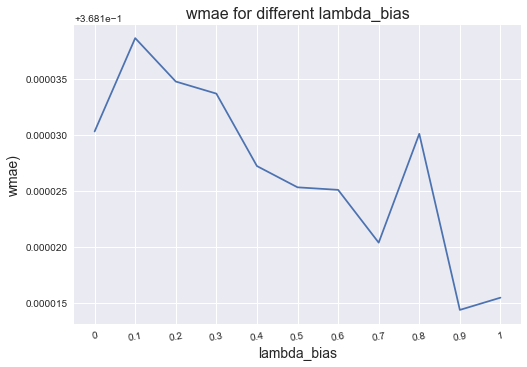

In [75]:
plot_results(results_lambda_bias, 'lambda_bias')

In [67]:
results_4 = {}
for i in [1, 1.3, 1.5, 1.8, 2, 2.3]:
    result = {}
    print('\n\n\n\nrunning while lambda = {}'.format(i))
    params={'booster':'gblinear',
            'objective': 'reg:linear',
            'eval_metric':'mae',
            'lambda':0.3,
            'tweedie_variance_power':i,
            'seed':0,
            'silent':1,
        }

    watchlist = [(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_4['{}'.format(i)] = result
    
print(results_4)





running while lambda = 1


XGBoostError: b'[09:08:16] src/objective/objective.cc:21: Unknown objective function reg:tweedie'

In [19]:
params={'booster':'gblinear',
            'objective': 'reg:linear',
            'eval_metric':'mae',
            'lambda':0.25,
            'subsample':0.7,
            'seed':0,
            'silent':1,
        }

watchlist = [(dataset_train,'train')]
model = xgb.train(params,dataset_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)
pred_xgb = model.predict(dataset_val)

print('wmae:{}'.format(wmae(y_test, pred_xgb)))

[0]	train-mae:60881.7
Will train until train-mae hasn't improved in 300 rounds.
[1]	train-mae:58038.5
[2]	train-mae:56712.4
[3]	train-mae:55546.5
[4]	train-mae:54701.6
[5]	train-mae:54212
[6]	train-mae:53692.8
[7]	train-mae:53254.8
[8]	train-mae:52885.2
[9]	train-mae:52602.5
[10]	train-mae:52376.6
[11]	train-mae:52216.6
[12]	train-mae:52111
[13]	train-mae:51972.5
[14]	train-mae:51871.7
[15]	train-mae:51790.9
[16]	train-mae:51738.4
[17]	train-mae:51669.6
[18]	train-mae:51621.4
[19]	train-mae:51577.1
[20]	train-mae:51537.7
[21]	train-mae:51510.1
[22]	train-mae:51482.6
[23]	train-mae:51463.9
[24]	train-mae:51437.4
[25]	train-mae:51419
[26]	train-mae:51404.9
[27]	train-mae:51383.2
[28]	train-mae:51371.8
[29]	train-mae:51362.7
[30]	train-mae:51347.6
[31]	train-mae:51335.9
[32]	train-mae:51320.5
[33]	train-mae:51313.8
[34]	train-mae:51302.8
[35]	train-mae:51295
[36]	train-mae:51284.6
[37]	train-mae:51275.6
[38]	train-mae:51267.5
[39]	train-mae:51256.5
[40]	train-mae:51250.7
[41]	train-mae:51

[346]	train-mae:50830.9
[347]	train-mae:50830.4
[348]	train-mae:50830.2
[349]	train-mae:50829.7
[350]	train-mae:50829.6
[351]	train-mae:50829
[352]	train-mae:50828.3
[353]	train-mae:50828.1
[354]	train-mae:50827.4
[355]	train-mae:50826.6
[356]	train-mae:50826.9
[357]	train-mae:50826.3
[358]	train-mae:50825.8
[359]	train-mae:50825.3
[360]	train-mae:50824.7
[361]	train-mae:50824.4
[362]	train-mae:50824
[363]	train-mae:50823.6
[364]	train-mae:50822.9
[365]	train-mae:50822.8
[366]	train-mae:50822.5
[367]	train-mae:50821.9
[368]	train-mae:50821.7
[369]	train-mae:50821
[370]	train-mae:50820.9
[371]	train-mae:50820
[372]	train-mae:50819.6
[373]	train-mae:50819.7
[374]	train-mae:50819.1
[375]	train-mae:50818.5
[376]	train-mae:50817.9
[377]	train-mae:50817.7
[378]	train-mae:50817.3
[379]	train-mae:50816.5
[380]	train-mae:50816.4
[381]	train-mae:50816.1
[382]	train-mae:50815.5
[383]	train-mae:50815.5
[384]	train-mae:50815.1
[385]	train-mae:50814.5
[386]	train-mae:50814.4
[387]	train-mae:50813.6


[690]	train-mae:50725.3
[691]	train-mae:50725
[692]	train-mae:50724.8
[693]	train-mae:50724.1
[694]	train-mae:50724
[695]	train-mae:50724.4
[696]	train-mae:50724.1
[697]	train-mae:50723.9
[698]	train-mae:50723.8
[699]	train-mae:50723.3
[700]	train-mae:50723.4
[701]	train-mae:50722.9
[702]	train-mae:50723.1
[703]	train-mae:50722.8
[704]	train-mae:50722.2
[705]	train-mae:50722.5
[706]	train-mae:50721.9
[707]	train-mae:50721.9
[708]	train-mae:50721.5
[709]	train-mae:50721.3
[710]	train-mae:50721
[711]	train-mae:50721
[712]	train-mae:50720.7
[713]	train-mae:50720.3
[714]	train-mae:50720.3
[715]	train-mae:50719.8
[716]	train-mae:50720.1
[717]	train-mae:50719.6
[718]	train-mae:50718.9
[719]	train-mae:50719.2
[720]	train-mae:50719
[721]	train-mae:50718.8
[722]	train-mae:50718.6
[723]	train-mae:50718.6
[724]	train-mae:50718.4
[725]	train-mae:50718.3
[726]	train-mae:50718.1
[727]	train-mae:50717.8
[728]	train-mae:50717.5
[729]	train-mae:50717.4
[730]	train-mae:50716.8
[731]	train-mae:50716.9
[7

[1033]	train-mae:50667.7
[1034]	train-mae:50667.6
[1035]	train-mae:50667.8
[1036]	train-mae:50667.2
[1037]	train-mae:50667.5
[1038]	train-mae:50667
[1039]	train-mae:50666.8
[1040]	train-mae:50667.1
[1041]	train-mae:50666.7
[1042]	train-mae:50666.6
[1043]	train-mae:50666.6
[1044]	train-mae:50666.8
[1045]	train-mae:50666.2
[1046]	train-mae:50665.9
[1047]	train-mae:50665.6
[1048]	train-mae:50665.7
[1049]	train-mae:50665.7
[1050]	train-mae:50665.4
[1051]	train-mae:50665.7
[1052]	train-mae:50665.6
[1053]	train-mae:50665.6
[1054]	train-mae:50665.4
[1055]	train-mae:50665.1
[1056]	train-mae:50664.9
[1057]	train-mae:50664.8
[1058]	train-mae:50664.8
[1059]	train-mae:50664.4
[1060]	train-mae:50664.6
[1061]	train-mae:50664.4
[1062]	train-mae:50664.2
[1063]	train-mae:50663.7
[1064]	train-mae:50663.6
[1065]	train-mae:50664
[1066]	train-mae:50663.5
[1067]	train-mae:50663.3
[1068]	train-mae:50663.4
[1069]	train-mae:50663.5
[1070]	train-mae:50663.4
[1071]	train-mae:50662.8
[1072]	train-mae:50663
[1073]

KeyboardInterrupt: 

In [256]:
b = pd.read_csv('t_sales_sum.csv')
a = b[b['dt']=='2016-08-31'].groupby('shop_id')[['sale_amt_3m']].mean()
a.to_csv('091011.csv', header=None)               

**提交四：**9、10、11预测，test为**0.751966**

# 4、submit

In [265]:
xgb_lambda = pd.read_csv('xgb_0.csv', header=None)
for i in range(3000):
    xgb_lambda.iloc[i]['sale_amt_3m'] = round(results_lambda['0.25']['predictions'][i]+0.01,2)
xgb_lambda.to_csv('xgb_1.csv', header=None)  
xgb_lambda

,sale_amt_3m
shop_id,
1,225613.60
2,73110.96
3,222046.35
4,218815.90
5,133316.60
6,105455.84
7,70269.95
8,144102.29
9,30481.67


In [9]:
submission = pd.DataFrame()
submission['shop_id'] = range(1, 3001)
submission['pred_3m'] = results_lambda['0.25']['predictions']
submission.to_csv('xgb_1.csv', header=False, index=None, encoding='utf-8', sep=',')

NameError: name 'pred_amt' is not defined

In [245]:
import csv
lines = []
with open('xgb_0.csv') as f:
    spamreader = csv.reader(f, delimiter=',')
    for row in spamreader:
        line = []
        line.append(row[0])
        line.append(row[1])
        lines.append(line)
with open('xgb_1.csv', 'w', newline='') as f:
    spamwriter = csv.writer(f, delimiter=',')
    for line in lines:
        spamwriter.writerow(line)

In [8]:
a = pd.read_csv('xgb_0.csv', header=None)
a.columns = ['shop_id', 'pre_sale']
a_ = a.groupby('shop_id')[['pre_sale']].mean()
a_.to_csv('xgb_1.csv',header=None, encoding='utf-8')

**xgb预测结果存在负数，对其取后三月平均**

In [53]:
data_sales_sum = pd.read_csv('t_sales_sum.csv')
data_sales_sum_meanlast3month = data_sales_sum[data_sales_sum['dt']>'2016-11-29'].groupby('shop_id')[['sale_amt_3m']].mean()
data_sales_sum_meanlast3month.iloc[1147]['sale_amt_3m']

516914.87666666665

In [60]:
a = pd.read_csv('xgb_0.csv', header=None)
a.columns = ['shop_id', 'pre_sale']
list_neg = a[a['pre_sale']<0].index.tolist()
pre_sale = a['pre_sale'].tolist()
for i in list_neg:
    pre_sale[i] = data_sales_sum_meanlast3month.iloc[i]['sale_amt_3m']
a['pre_sale'] = pre_sale
a.to_csv('xgb_1.csv',header=False, index=None)

**提交五**，xgb（lambda=0.25，replace neg_value with average of last3month）,**0.985542**

# 5、others

## 5.1、时间特征处理

In [4]:
import pandas as pd
sample = pd.read_csv('t_sales_sum.csv')

In [14]:
sample['Year'] = sample['dt'].apply(lambda x: int(str(x)[:4]))
sample['Month'] = sample['dt'].apply(lambda x: int(str(x)[5:7]))
sample

,dt,shop_id,sale_amt_3m,Date,date,Year,Month,Day
0,2016-12-31,2143,72983.09,2016-12-31,2016-12-31,2016,12,31
1,2016-07-31,2143,106943.03,2016-07-31,2016-07-31,2016,7,31
2,2016-08-31,2143,183723.36,2016-08-31,2016-08-31,2016,8,31
3,2016-09-30,2143,235568.57,2016-09-30,2016-09-30,2016,9,30
4,2016-11-30,2143,80115.29,2016-11-30,2016-11-30,2016,11,30
5,2016-12-31,1559,67228.29,2016-12-31,2016-12-31,2016,12,31
6,2016-08-31,1559,267183.30,2016-08-31,2016-08-31,2016,8,31
7,2017-01-31,1559,83264.96,2017-01-31,2017-01-31,2017,1,31
8,2016-10-31,1559,123020.74,2016-10-31,2016-10-31,2016,10,31
9,2016-12-31,1296,24583.73,2016-12-31,2016-12-31,2016,12,31


In [13]:
sample['date'] = pd.to_datetime(pd.Series(sample['dt']))
print(type(sample.ix[0, 'dt']))
print(type(sample.ix[0, 'date']))

<class 'str'>
<class 'pandas._libs.tslib.Timestamp'>


In [12]:
sample['Year'] = sample['date'].apply(lambda x: x.year)
sample['Month'] = sample['date'].apply(lambda x: x.month)
sample['Day'] = sample['date'].apply(lambda x: x.day)
sample

,dt,shop_id,sale_amt_3m,Date,date,Year,Month,Day
0,2016-12-31,2143,72983.09,2016-12-31,2016-12-31,2016,12,31
1,2016-07-31,2143,106943.03,2016-07-31,2016-07-31,2016,7,31
2,2016-08-31,2143,183723.36,2016-08-31,2016-08-31,2016,8,31
3,2016-09-30,2143,235568.57,2016-09-30,2016-09-30,2016,9,30
4,2016-11-30,2143,80115.29,2016-11-30,2016-11-30,2016,11,30
5,2016-12-31,1559,67228.29,2016-12-31,2016-12-31,2016,12,31
6,2016-08-31,1559,267183.30,2016-08-31,2016-08-31,2016,8,31
7,2017-01-31,1559,83264.96,2017-01-31,2017-01-31,2017,1,31
8,2016-10-31,1559,123020.74,2016-10-31,2016-10-31,2016,10,31
9,2016-12-31,1296,24583.73,2016-12-31,2016-12-31,2016,12,31
